# Ecommerce Capstone Project

## Problem Statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

##### Objective:
You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

In [1]:
import warnings
warnings.filterwarnings('ignore')


### Importing libraries

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
from datetime import date, datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn


### Reading Data

In [3]:
#Setting options
pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
Consumer_df = pd.read_csv("ConsumerElectronics.csv", low_memory = False, na_values=['\\N', ' '])

In [5]:
Consumer_df.head()

fsn_id           order_date  Year  Month      order_id  order_item_id     gmv  units  deliverybdays  deliverycdays s1_fact.order_payment_type  sla       cust_id       pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   3.419301e+15  6400.0      1            NaN            NaN                        COD    5 -1.012991e+18 -7.791756e+18                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   1.420831e+15  6900.0      1            NaN            NaN                        COD    7 -8.990325e+18  7.335411e+18                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   2.421913e+15  1990.0      1            NaN            NaN                        COD   10 -1.040443e+18 -7.477688e+18                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   4.416592e+15  1690.0      1            NaN            NaN                    Prepaid    4 -7.604961e+18 -5.835932e+18                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   4.419525e+15  1618.0      1            NaN            NaN                    Prepaid    6  2.894557e+18  5.347354e+17                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3

###### Understanding some attributes
* SKU- Stock Keeping Unit
* deliverybdays- days to get item or order from warehouse for shipping
* deliverycdays - days to deliver item to customer


### Understanding and Cleaning the data

In [6]:
Consumer_df.shape

(1648824, 20)

In [7]:
Consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non-null object
p

###### convert order_date to datetime 

In [8]:
#convert order_date to datetime
Consumer_df['order_date'] = pd.to_datetime(Consumer_df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [9]:
Consumer_df['order_date'].dtype

dtype('<M8[ns]')

In [10]:
#Sort values by order_date
Consumer_df=Consumer_df.sort_values(by=['order_date'])

In [11]:

# check year and month 
print((Consumer_df['order_date'].dt.year == Consumer_df['Year']).sum())
print((Consumer_df['order_date'].dt.month == Consumer_df['Month']).sum())

1648824
1648824


###### coverting order_id and order_item_id into suitable format

In [12]:
Consumer_df['order_id'] = Consumer_df['order_id'].map(lambda x : '{:.0f}'.format(x))
Consumer_df['order_item_id'] = Consumer_df['order_item_id'].map(lambda x : '{:.0f}'.format(x))

In [13]:
Consumer_df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                   float64
pincode                                   float64
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [14]:
Consumer_df.head()

fsn_id          order_date  Year  Month   order_id order_item_id     gmv  units  deliverybdays  deliverycdays s1_fact.order_payment_type  sla       cust_id       pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
1376093  ACCDVZ83VBHCWFFA 2015-05-19 13:42:09  2015      5  146499482     188485029  3149.0      1            NaN            NaN                        COD    6 -6.148503e+18 -3.217753e+18                              CE        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker         6990                        4
1436634  VGLE4VR7XSQKYFG7 2015-06-11 18:21:50  2015      6  155827856     198823138   275.0      1            NaN            NaN                        COD    8  1.585832e+18 -3.703421e+17                              CE        EntertainmentSmall                  TVVideoSmall              VideoGlasses          600                        2
1398258  ACCE6VGHYKYFX4WB 2015-06-24 10:20:16  2015      6  161931009     205976637   188.0      1            NaN            NaN                        COD    8 -4.882079e+18  2.044271e+18                              CE        EntertainmentSmall                       Speaker             LaptopSpeaker          310                       -1
1385002  ACCE2V5DUDZVGFRK 2015-06-25 16:28:12  2015      6  163016530     207267972   250.0      1            NaN            NaN                        COD    7 -4.272613e+18  6.148223e+18                              CE        EntertainmentSmall                       Speaker             LaptopSpeaker          400                        4
1358453  ACCDFZEJ6ZGSWRMK 2015-06-26 17:02:01  2015      6  163400507     207701702  1119.0      1            NaN            NaN                        COD   28 -7.472222e+18 -9.779010e+17                              CE        EntertainmentSmall                       Speaker             LaptopSpeaker         2500                        3

### Fix Data Types


Assuming "\N" value in deliverybdays & deliverycdays is equal to 0, Now We will impute the nulls created by it with 0

In [15]:
Consumer_df['deliverybdays'] = pd.to_numeric(Consumer_df['deliverybdays'], errors='coerce')
Consumer_df['deliverybdays'].fillna(value=0, inplace=True)

Consumer_df['deliverycdays'] = pd.to_numeric(Consumer_df['deliverycdays'], errors='coerce')
Consumer_df['deliverycdays'].fillna(value=0, inplace=True)

###### Treating incorrect GMV values w.r.t product_mrp * units

In [16]:
# Instances where the GMV values are higher than the MRP * units

print(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0] / Consumer_df.shape[0]), 2))

38569
2.34


###### Impute the faulty mrp values with gmv/units

In [17]:
# update column based on another column
Consumer_df.product_mrp = np.where(Consumer_df['product_mrp'] < Consumer_df['gmv'] / Consumer_df['units'], \
                                   Consumer_df['gmv'] / Consumer_df['units'], Consumer_df['product_mrp'])

Consumer_df.shape

(1648824, 20)

Reinspect instance, where GMV value is higher than the MRP * units.

In [18]:
# Instances where GMV values are greater than MRP * units 

print(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0] / Consumer_df.shape[0]), 2))

0
0.0


###### Treating GMV values less than 0

In [19]:

print(Consumer_df.loc[Consumer_df['gmv'] < 0].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['gmv'] < 0].shape[0]/Consumer_df.shape[0]), 2))

0
0.0


###### Handling Negative values for deliverybdays & deliverycdays

In [20]:
print(Consumer_df.loc[Consumer_df['deliverybdays'] < 0].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['deliverybdays'] < 0].shape[0]/Consumer_df.shape[0]),4))

print(Consumer_df.loc[Consumer_df['deliverycdays'] < 0].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['deliverycdays'] < 0].shape[0]/Consumer_df.shape[0]),4))

38
0.0023
39
0.0024


* There are 38 records(0.0023%) in the dataframe with negative values for deliverybdays.
* There are 39 records(0.0024%) in the dataframe with negative values for deliverycdays.

We can drop such rows since it is not possible for a product to have negative values for Dispatch Delay from Warehouse and to customer.

In [21]:
Consumer_df = Consumer_df.loc[(Consumer_df['deliverybdays'] >= 0) & (Consumer_df['deliverycdays'] >= 0)]

Consumer_df.reset_index(drop=True, inplace=True)

In [22]:
Consumer_df.shape

(1648785, 20)

###### Treating MRP values less than or equal to 0

In [23]:
print(Consumer_df.loc[Consumer_df['product_mrp'] < 0].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['product_mrp'] < 0].shape[0]/Consumer_df.shape[0]), 2))

0
0.0


###### Treating Units values less than or equal to 0

In [24]:
print(Consumer_df.loc[Consumer_df['units'] <= 0].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['units'] <= 0].shape[0]/Consumer_df.shape[0]), 2))

0
0.0


###### Handling Negative values for product_procurement_sla

In [25]:
print(Consumer_df.loc[Consumer_df['product_procurement_sla'] < 0].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['product_procurement_sla'] < 0].shape[0]/Consumer_df.shape[0]),4))

75986
4.6086


There are 75986 records (4.61 percent) for product procurement sla in the dataframe with negative values.
We will drop these rows as it is not feasible for a product to have negative values typically required for time to procure it.

In [26]:
Consumer_df = Consumer_df.loc[(Consumer_df['product_procurement_sla'] >= 0)]

Consumer_df.reset_index(drop=True, inplace=True)

In [27]:
Consumer_df.shape

(1572799, 20)

###### Handling of high  product_procurement_sla values

In [28]:

Consumer_df[['product_procurement_sla']].describe().T

count      mean        std  min  25%  50%  75%     max
product_procurement_sla  1572799.0  5.712887  54.724168  0.0  2.0  2.0  3.0  1000.0

In [29]:
Consumer_df.product_procurement_sla.value_counts()

2       528406
1       308504
3       303349
5       222097
4       120190
0        42459
6        18559
7        11746
15        6184
14        5281
1000      4745
13         526
8          523
9           97
10          73
12          60
Name: product_procurement_sla, dtype: int64

In [30]:
#Let's check for product_procurement_sla
len(Consumer_df.loc[Consumer_df.product_procurement_sla > 60])

4745

In [31]:

#Let's check for product_procurement_sla
len(Consumer_df.loc[Consumer_df.product_procurement_sla > 20])

4745

In [32]:
#Let's check for product_procurement_sla
len(Consumer_df.loc[Consumer_df.product_procurement_sla > 15])

4745

As we can see above, the number of rows have product procuremnt sla greater than 15 & even greater than 60 are same which means there are no rows containing product_procurement_sla b/w 15 & 60 

 Let's cap the product_procuremnt_sla to less than equal to 15

In [33]:
# Cap the product_procurement_sla less than equal to 15
Consumer_df =Consumer_df.loc[Consumer_df.product_procurement_sla <=15 ]

###### Capping the sla to 30 days, as more than 30 days is not practically acceptable

In [34]:
#Let's cap the sla to 30 days

In [35]:
# checking if any data with sla greater than 30 days is present
Consumer_df.loc[Consumer_df.sla>30]

fsn_id          order_date  Year  Month          order_id       order_item_id     gmv  units  deliverybdays  deliverycdays s1_fact.order_payment_type   sla       cust_id       pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
313169   REME5WEWPDF7GYBQ 2015-10-10 23:53:40  2015     10  4413562981700500    4413562981700500   595.0      1            0.0            0.0                        COD    37  5.843741e+18  8.903683e+18                              CE        EntertainmentSmall                  TVVideoSmall             RemoteControl        649.0                        2
316365   REME5WEWDHE3PGEZ 2015-10-12 10:47:40  2015     10  2414819225948000    2414819225948000   369.0      1            0.0            0.0                        COD    38 -4.331412e+18  6.148223e+18                              CE        EntertainmentSmall                  TVVideoSmall             RemoteControl        399.0                        3
344961   REME5WEWDHE3PGEZ 2015-10-15 16:48:41  2015     10  1417565272118500    1417565272118500   399.0      1            0.0            0.0                        COD    39 -3.521413e+18 -4.632849e+18                              CE        EntertainmentSmall                  TVVideoSmall             RemoteControl        399.0                        3
419299   REME5WEWDHE3PGEZ 2015-10-18 10:10:33  2015     10  2419982860867300    2419982860867300   399.0      1            0.0            0.0                    Prepaid    39  1.534346e+17  6.305836e+18                              CE        EntertainmentSmall                  TVVideoSmall             RemoteControl        399.0                        3
427163   REME5WEWNKHZYVA2 2015-10-20 09:18:05  2015     10  1421679822007000    1421679822007000   549.0      1            0.0            0.0                        COD    38 -3.168092e+18 -7.898945e+18                              CE        EntertainmentSmall                  TVVideoSmall             RemoteControl        549.0                        2
455069   ACCEAU5FH5ESHZDJ 2015-10-27 19:36:15  2015     10  1428099375455100    1428099375455100  1499.0      1            0.0            0.0                        COD    33 -5.179497e+18  7.161198e+18                              CE        EntertainmentSmall                       Speaker             MobileSpeaker       2999.0                        1
458562   ACCEAU5FH5ESHZDJ 2015-10-28 14:24:10  2015     10  1428769621577400    1428769621577400  1499.0      1            0.0            0.0                        COD    40 -6.605776e+18  6.921896e+18                              CE        EntertainmentSmall                       Speaker             MobileSpeaker       2999.0                        1
459646   ACCEAU5FH5ESHZDJ 2015-10-28 18:22:10  2015     10  4428920131167500    4428920131167500  1499.0      1            0.0            0.0                        COD    40  4.582114e+18  1.729529e+18                              CE        EntertainmentSmall                       Speaker             MobileSpeaker       2999.0                        1
461753   ACCEAU5FH5ESHZDJ 2015-10-29 02:00:48  2015     10  1429195019456700    1429195019456700  1499.0      1            0.0            0.0                        COD    39  4.659520e+18  6.734174e+18                              CE        EntertainmentSmall                       Speaker             MobileSpeaker       2999.0                        1
467767   ACCE99BYQKMYXB6N 2015-10-30 18:16:02  2015     10  1430640928558600    1430640928558600  1059.0      1            0.0            0.0                        COD    41 -4.233653e+18  5.795598e+18                              CE        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       1899.0                        1
490028   ACCE62MUQEVJCXQ4 2015-11-05 12:47:40  2015     11  1435631597483600    1435631597483600   339.0      1   

In [36]:
#Remove rows with SLA greater than 30
Consumer_df = Consumer_df.loc[Consumer_df.sla<=30]

In [37]:
#checking missing values
Consumer_df.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                4519
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                            4519
pincode                            4519
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical          5828
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [38]:
#converting datatype for gmv
Consumer_df['gmv'] = pd.to_numeric(Consumer_df['gmv'])

In [39]:
# Drop rows containing null values for gmv
Consumer_df.dropna(subset = ['gmv'], inplace = True)

In [40]:
Consumer_df.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                               0
pincode                               0
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical          5814
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [41]:
#Dropping rows containing nulls in the product_analytic_vertical column
Consumer_df =Consumer_df.loc[~pd.isnull(Consumer_df['product_analytic_vertical'])]

In [42]:
#Renaming Columns
Consumer_df=Consumer_df.rename(columns={"s1_fact.order_payment_type": "order_payment_type"})

In [43]:

#Checking the various payment types
Consumer_df['order_payment_type'].value_counts()

COD        1126402
Prepaid     431239
Name: order_payment_type, dtype: int64

In [44]:
Consumer_df['product_analytic_super_category'].value_counts()

CE    1557641
Name: product_analytic_super_category, dtype: int64

The "product_analytic_super_category" Coloumn has all the CE values. That will therefore not contribute to the analysis and will therefore be removed

In [45]:
Consumer_df=Consumer_df.drop('product_analytic_super_category',axis=1)

In [46]:
#Drop cust_id, fsn_id and pincode as they won't contribute much
Consumer_df=Consumer_df.drop(['cust_id','pincode','fsn_id'],axis=1)

In [47]:

Consumer_df.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 'order_payment_type', 'sla', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

In [48]:

Consumer_df.isna().sum()

order_date                       0
Year                             0
Month                            0
order_id                         0
order_item_id                    0
gmv                              0
units                            0
deliverybdays                    0
deliverycdays                    0
order_payment_type               0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
dtype: int64

In [49]:
## Rows with remaining nulls can be removed as they relate to data of less than 1 percent and thus elimination will not impact the analysis
Consumer_df=Consumer_df.dropna()

In [50]:
Consumer_df.shape

(1557641, 16)

#### Checking duplicates

In [51]:
Consumer_df.duplicated().sum()

98706

In [52]:
# Duplicates are removed because they only contribute 6% of the data and are therefore discarded.
Consumer_df=Consumer_df.drop_duplicates()

In [53]:
Consumer_df['order_item_id'].duplicated().sum()

57588

In [54]:

#order_item_id duplicates are removed, as it should be unique
Consumer_df.drop_duplicates(subset = ['order_item_id'], keep='last', inplace=True)

In [55]:
Consumer_df.shape

(1401347, 16)

In [56]:
Consumer_df.isna().sum()

order_date                       0
Year                             0
Month                            0
order_id                         0
order_item_id                    0
gmv                              0
units                            0
deliverybdays                    0
deliverycdays                    0
order_payment_type               0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
dtype: int64

### Filter out the data for the 3 categories

In [57]:
# Filtering the data for the 3 categories
Consumer_df= Consumer_df[(Consumer_df['product_analytic_sub_category']=='GamingAccessory')|(Consumer_df['product_analytic_sub_category']=='CameraAccessory')|(Consumer_df['product_analytic_sub_category']=='HomeAudio')]

In [58]:
# check  the length of dataframe
len(Consumer_df)

488609

###### We now have 488609 data rows for the three categories to be further analyzed.

### EDA part 1

For 3 categories we have already filtered out the data, i.e. GamingAccessory, CameraAccessory & HomeAudio that we will use graphs to test

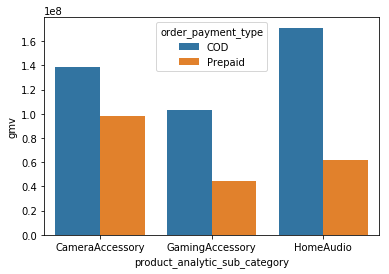

In [59]:
#gmv is our target variable
GMV_Pay = Consumer_df.groupby(["order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="order_payment_type", data=GMV_Pay)

1. Max revenue for COD order is from the class Home Audio followed by Camera Accessory, then Gaming Accessory
2. For prepaid orders, the maximum revenue is from Camera Accessory, followed by Home Audio and a slight decrease in the category of Gaming Accessories

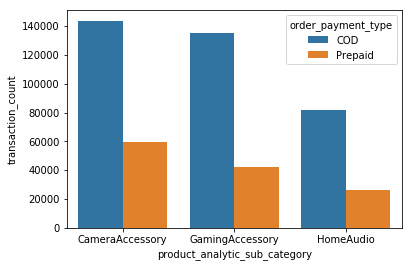

In [60]:
## Order Count vs Payment Type
OC_Payment = Consumer_df.groupby(["order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="order_payment_type", data=OC_Payment)

1. For Camera Accessory , maximum number of orders are by COD mode.
2. For Gaming Accesrsory , maximum orders are again from COD mode.
3. For Home Audio also, maimum orders are from COD mode.

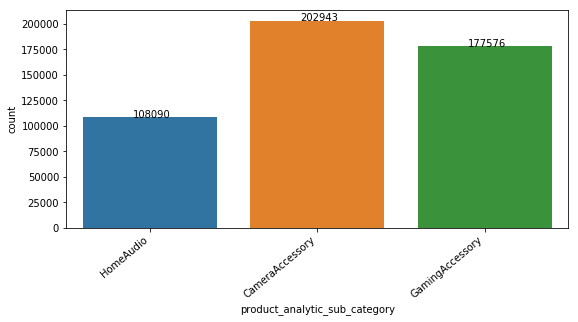

In [61]:
# No of transactions by Sub-Category

plt.figure(figsize = (9,4))
ax = sns.countplot(Consumer_df['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

Based on our analysis , maximum number of transaction were from Camera Accessory category, then Gaming Accessory , followed by Home Audio category

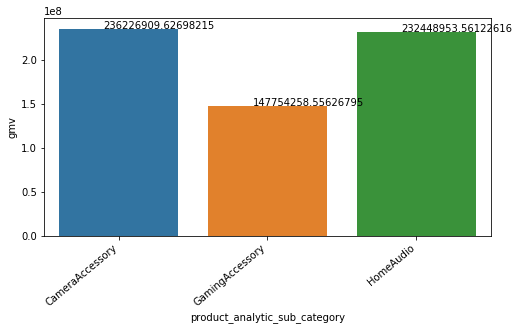

In [62]:
## Total GMV by Sub-Category
plot_gmv =Consumer_df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=plot_gmv)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

The most number of transactions are for Camera Accessory followed by Home Audio  & then Gamming Audio

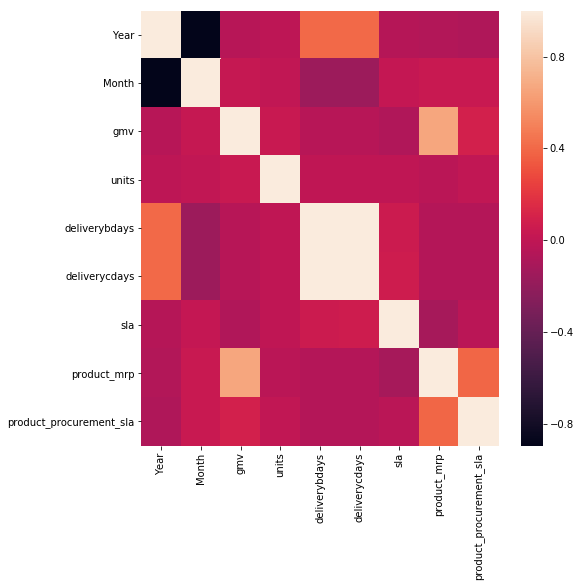

In [63]:
## checking the correlations
plt.figure(figsize = (8,8))
sns.heatmap(Consumer_df.corr())

As we can see above, Month & Year is highly correlated|

#### Generate Week Column

In [64]:
# Creating a new column into a specific position in a DataFrame
loc_index = Consumer_df.columns.get_loc('Month') + 1
Consumer_df.insert(loc=loc_index,column='Week',value=Consumer_df['order_date'].dt.strftime("%V"))

Consumer_df['Year'] = Consumer_df['Year'].astype('str')
Consumer_df.head()

order_date  Year  Month Week   order_id order_item_id     gmv  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  2015-05-19 13:42:09  2015      5   21  146499482     188485029  3149.0      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4
4  2015-06-26 17:27:12  2015      6   26  163409423     207711935   350.0      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3
5  2015-06-26 17:33:10  2015      6   26  163411313     207714163  2800.0      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3
8  2015-07-01 03:35:02  2015      7   27  165165918     209727476   385.0      1            0.0            0.0            Prepaid   10            GamingHardware               GamingAccessory               GamingMouse        699.0                        4
17 2015-07-01 08:19:18  2015      7   27  165181041     209744697  1999.0      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory                   GamePad       7999.0                        3

In [65]:

# Updating the year as 2015 for the week of 53 but belonging to 2016 in accordance with the other data sets
# Updating the month to 12 for consistency in the above rows
# Dropping rows (less in number) with week# 27 as it belongs to the weeks in June 2015
Consumer_df.loc[(Consumer_df.Year == '2016') & (Consumer_df.Week == '53'), 'Year'] = '2015'

Consumer_df.loc[(Consumer_df.Year == '2015') & (Consumer_df.Week == '53'), 'Month'] = 12
Consumer_df.drop(Consumer_df[Consumer_df['Week'] == '27'].index, inplace = True)

In [66]:
Consumer_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

Year Week  Month
0   2015   21      1
1   2015   26      2
2   2015   28   7815
3   2015   29   8182
4   2015   30   7691
5   2015   31   5348
6   2015   32      9
7   2015   33      4
8   2015   34      2
9   2015   35      2
10  2015   36   4332
11  2015   37   3062
12  2015   38   7240
13  2015   39   7849
14  2015   40   9167
15  2015   41   7123
16  2015   42  28537
17  2015   43   8323
18  2015   44  10938
19  2015   45  12415
20  2015   46   9652
21  2015   47   7239
22  2015   48   8711
23  2015   49   9095
24  2015   50  11271
25  2015   51   9091
26  2015   52  12733
27  2015   53  10375
28  2016   01  12741
29  2016   02   9793
30  2016   03  12803
31  2016   04   9090
32  2016   05  12572
33  2016   06  10010
34  2016   07  14802
35  2016   08  12915
36  2016   09  12249
37  2016   10  14109
38  2016   11   9978
39  2016   12   9596
40  2016   13  10145
41  2016   14   9881
42  2016   15   8162
43  2016   16   4794
44  2016   17  17408
45  2016   18  11300
46  2016   19  11861
47  2016   20  11114
48  2016   21  13340
49  2016   22  10946
50  2016   23  10834
51  2016   24   9657
52  2016   25   7698
53  2016   26   4391
54  2016   28      7



Drop Insignificant Columns

In [67]:
# Dropping Columns with Single Value or all Different Values

count_df = pd.DataFrame(Consumer_df.apply(lambda x: len(x.value_counts()), axis=0), columns=['Count'])

drop_columns = list(count_df.loc[(count_df['Count']==1) | (count_df['Count']==len(Consumer_df.index))].index)

print('Dropping these columns => {}'.format(drop_columns))

Consumer_df.drop(drop_columns, axis=1, inplace=True)

Dropping these columns => ['order_item_id']


In [68]:
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0   2015-05-19 13:42:09  2015      5   21  146499482  3149.0      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4
4   2015-06-26 17:27:12  2015      6   26  163409423   350.0      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3
5   2015-06-26 17:33:10  2015      6   26  163411313  2800.0      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3
293 2015-07-06 05:08:26  2015      7   28  167223837  5398.0      2            0.0            0.0                COD    2            GamingHardware               GamingAccessory                   GamePad       4495.0                        5
294 2015-07-06 08:15:22  2015      7   28  167234860  4340.0      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory               GamingMouse       5699.0                        2

### Feature Engineering

##### Create column List Price

List Price = GMV/Units

In [69]:
# Creating a new column into a specific position in a DataFrame
loc_indx = Consumer_df.columns.get_loc('gmv') + 1
Consumer_df.insert(loc=loc_indx,column='list_price',value = Consumer_df['gmv'] / Consumer_df['units'])
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0   2015-05-19 13:42:09  2015      5   21  146499482  3149.0      3149.0      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4
4   2015-06-26 17:27:12  2015      6   26  163409423   350.0       350.0      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3
5   2015-06-26 17:33:10  2015      6   26  163411313  2800.0      2800.0      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3
293 2015-07-06 05:08:26  2015      7   28  167223837  5398.0      2699.0      2            0.0            0.0                COD    2            GamingHardware               GamingAccessory                   GamePad       4495.0                        5
294 2015-07-06 08:15:22  2015      7   28  167234860  4340.0      4340.0      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory               GamingMouse       5699.0                        2

###### Displaying the column values for a few orders when units > 1

In [70]:
Consumer_df.loc[Consumer_df['units'] != 1][['gmv','list_price','product_mrp','units']].head()

gmv  list_price  product_mrp  units
293  5398.0      2699.0       4495.0      2
527   590.0       295.0        500.0      2
629   570.0       285.0        350.0      2
640   570.0       285.0        350.0      2
792   198.0        99.0        599.0      2

#### Create a Payday Flag for salary days 
If it's closer to pay day (1st and 15th of each month), we're flagging the column as 1 and 0

In [71]:
Consumer_df['payday_flag'] = Consumer_df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14','15','16','30','31','1','2') else 0)
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag
0   2015-05-19 13:42:09  2015      5   21  146499482  3149.0      3149.0      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4            0
4   2015-06-26 17:27:12  2015      6   26  163409423   350.0       350.0      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3            0
5   2015-06-26 17:33:10  2015      6   26  163411313  2800.0      2800.0      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3            0
293 2015-07-06 05:08:26  2015      7   28  167223837  5398.0      2699.0      2            0.0            0.0                COD    2            GamingHardware               GamingAccessory                   GamePad       4495.0                        5            0
294 2015-07-06 08:15:22  2015      7   28  167234860  4340.0      4340.0      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory               GamingMouse       5699.0                        2            0

### Create holiday_flag

If it's a holiday or occassion in Ontario, we're flagging the line as 1 and 0

In Reference to **reference link: https://www.statutoryholidays.com/ Extracted Holidays for speicified one Year Data

In [72]:
def holiday_fl(ord_date):
    if ord_date.strftime('%Y') == 2015:
        if ord_date.strftime('%m') == '07' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '08' and ord_date.strftime('%d') == '03':
            return 1
        elif ord_date.strftime('%m') == '09' and ord_date.strftime('%d') == '07':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '12':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '31':
            return 1
        elif ord_date.strftime('%m') == '11' and ord_date.strftime('%d') == '11':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '26':
            return 1
        else:
            return 0
    else:
        if ord_date.strftime('%m') == '01' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '15':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '14':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') =='29':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '17':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '28':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '08':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '23':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '19':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '21':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '24':
            return 1
        else:
            return 0

In [73]:
Consumer_df['hld_flag'] = Consumer_df['order_date'].apply(lambda x:holiday_fl(x))
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag
0   2015-05-19 13:42:09  2015      5   21  146499482  3149.0      3149.0      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4            0         0
4   2015-06-26 17:27:12  2015      6   26  163409423   350.0       350.0      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3            0         0
5   2015-06-26 17:33:10  2015      6   26  163411313  2800.0      2800.0      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3            0         0
293 2015-07-06 05:08:26  2015      7   28  167223837  5398.0      2699.0      2            0.0            0.0                COD    2            GamingHardware               GamingAccessory                   GamePad       4495.0                        5            0         0
294 2015-07-06 08:15:22  2015      7   28  167234860  4340.0      4340.0      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory               GamingMouse       5699.0                        2            0         0

#### Create a column Product Type (Premium_product / Mass_market)

If GMV value > 80 %, then we can Consider it as Premium_product, else mass_market

In [74]:
pd.DataFrame(Consumer_df['gmv']).describe(percentiles=[.70,.80,.90]).T

count         mean          std  min    50%     70%     80%     90%       max
gmv  488405.0  1261.584607  2357.945079  0.0  549.0  1150.0  1849.0  2750.0  148050.0

In [75]:
Consumer_df['gmv'].quantile(.8)

1849.0

In [76]:
Consumer_df['product_type'] = Consumer_df['gmv'].apply(lambda x:'Premium_product' if x >= 1849 else 'mass_market')
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type
0   2015-05-19 13:42:09  2015      5   21  146499482  3149.0      3149.0      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4            0         0  Premium_product
4   2015-06-26 17:27:12  2015      6   26  163409423   350.0       350.0      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3            0         0      mass_market
5   2015-06-26 17:33:10  2015      6   26  163411313  2800.0      2800.0      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3            0         0  Premium_product
293 2015-07-06 05:08:26  2015      7   28  167223837  5398.0      2699.0      2            0.0            0.0                COD    2            GamingHardware               GamingAccessory                   GamePad       4495.0                        5            0         0  Premium_product
294 2015-07-06 08:15:22  2015      7   28  167234860  4340.0      4340.0      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory               GamingMouse       5699.0                        2            0         0  Premium_product

##### Calculate Discount Percentage

Discount = (product_mrp - list_price) / product_mrp

In [77]:
# Create a new column 
column_loc = Consumer_df.columns.get_loc('list_price') + 1
Consumer_df.insert(loc=column_loc, column='Discount%', value = round(100*((Consumer_df['product_mrp'] - Consumer_df['list_price']) / Consumer_df['product_mrp']),2))
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%  units  deliverybdays  deliverycdays order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type
0   2015-05-19 13:42:09  2015      5   21  146499482  3149.0      3149.0      54.95      1            0.0            0.0                COD    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       6990.0                        4            0         0  Premium_product
4   2015-06-26 17:27:12  2015      6   26  163409423   350.0       350.0      12.28      1            0.0            0.0                COD    5           CameraAccessory               CameraAccessory           CameraAccessory        399.0                        3            0         0      mass_market
5   2015-06-26 17:33:10  2015      6   26  163411313  2800.0      2800.0       6.67      1            0.0            0.0                COD   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker       3000.0                        3            0         0  Premium_product
293 2015-07-06 05:08:26  2015      7   28  167223837  5398.0      2699.0      39.96      2            0.0            0.0                COD    2            GamingHardware               GamingAccessory                   GamePad       4495.0                        5            0         0  Premium_product
294 2015-07-06 08:15:22  2015      7   28  167234860  4340.0      4340.0      23.85      1            0.0            0.0            Prepaid    1            GamingHardware               GamingAccessory               GamingMouse       5699.0                        2            0         0  Premium_product

#### Working with mrp, gmv and units

In [78]:
#  Product mrp, gmv and units cannot be 0
Consumer_df = Consumer_df[(Consumer_df['product_mrp']>0) & (Consumer_df['gmv']>0) & (Consumer_df['units']>0)]

In [79]:
# mrp*units should be greater or equal to GMV 
# mrp*units >= GMV d

Consumer_df= Consumer_df[(Consumer_df.product_mrp*Consumer_df.units) >= Consumer_df.gmv]

In [80]:

pd.options.display.float_format = '{:.2f}'.format

#### Create Dummy Variables

In [81]:
#create dummy variables for order_payment_type
pay_dummy = pd.get_dummies(Consumer_df['order_payment_type'], drop_first = True, prefix = 'order_payment_type')

In [82]:

Consumer_df = pd.concat([Consumer_df, pay_dummy], axis = 1)
Consumer_df.drop(['order_payment_type'], axis = 1, inplace = True)
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type  order_payment_type_Prepaid
0   2015-05-19 13:42:09  2015      5   21  146499482 3149.00     3149.00      54.95      1           0.00           0.00    6        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker      6990.00                        4            0         0  Premium_product                           0
4   2015-06-26 17:27:12  2015      6   26  163409423  350.00      350.00      12.28      1           0.00           0.00    5           CameraAccessory               CameraAccessory           CameraAccessory       399.00                        3            0         0      mass_market                           0
5   2015-06-26 17:33:10  2015      6   26  163411313 2800.00     2800.00       6.67      1           0.00           0.00   11        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker      3000.00                        3            0         0  Premium_product                           0
293 2015-07-06 05:08:26  2015      7   28  167223837 5398.00     2699.00      39.96      2           0.00           0.00    2            GamingHardware               GamingAccessory                   GamePad      4495.00                        5            0         0  Premium_product                           0
294 2015-07-06 08:15:22  2015      7   28  167234860 4340.00     4340.00      23.85      1           0.00           0.00    1            GamingHardware               GamingAccessory               GamingMouse      5699.00                        2            0         0  Premium_product                           1

### Filtering the data from July 2015 to June 2016

In [83]:
Consumer_df = Consumer_df[(Consumer_df['order_date'] >="2015-07-01") & (Consumer_df['order_date'] <="2016-06-30")]

In [84]:
Consumer_df.shape

(487037, 21)

In [85]:
#Create Date column without timestamp
Consumer_df['Date'] = pd.to_datetime(Consumer_df['order_date'].dt.date)

In [86]:

Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type  order_payment_type_Prepaid       Date
293 2015-07-06 05:08:26  2015      7   28  167223837 5398.00     2699.00      39.96      2           0.00           0.00    2            GamingHardware               GamingAccessory                   GamePad      4495.00                        5            0         0  Premium_product                           0 2015-07-06
294 2015-07-06 08:15:22  2015      7   28  167234860 4340.00     4340.00      23.85      1           0.00           0.00    1            GamingHardware               GamingAccessory               GamingMouse      5699.00                        2            0         0  Premium_product                           1 2015-07-06
296 2015-07-06 09:00:55  2015      7   28  167241120  139.00      139.00      53.51      1           0.00           0.00    8            GamingHardware               GamingAccessory       TVOutCableAccessory       299.00                        4            0         0      mass_market                           1 2015-07-06
303 2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73      1           0.00           0.00    9           CameraAccessory               CameraAccessory                Binoculars      1500.00                        2            0         0      mass_market                           0 2015-07-07
306 2015-07-07 00:03:19  2015      7   28  167584146 4750.00     4750.00       4.98      1           0.00           0.00    6            GamingHardware               GamingAccessory          MotionController      4999.00                        2            0         0  Premium_product                           0 2015-07-07

In [87]:
# checking product_analytic_category
Consumer_df['product_analytic_category'].value_counts()

CameraAccessory       202380
GamingHardware        176819
EntertainmentSmall    107838
Name: product_analytic_category, dtype: int64

In [88]:
#checking product_analytic_sub_category
Consumer_df['product_analytic_sub_category'].value_counts()

CameraAccessory    202380
GamingAccessory    176819
HomeAudio          107838
Name: product_analytic_sub_category, dtype: int64

In [89]:


Consumer_df['product_analytic_vertical'].value_counts()

HomeAudioSpeaker         74622
GamingHeadset            58457
GamePad                  49107
Flash                    46956
GamingMouse              34087
CameraBattery            32317
CameraTripod             29815
Lens                     29392
FMRadio                  23816
CameraBag                14897
CameraBatteryCharger     13371
Binoculars               12913
Filter                    9660
GamingAccessoryKit        7251
TVOutCableAccessory       6329
GamingKeyboard            5900
GamingMemoryCard          5586
CameraRemoteControl       4929
VoiceRecorder             3310
GamingMousePad            3011
GamingAdapter             2988
JoystickGamingWheel       2577
BoomBox                   2353
CameraAccessory           1916
Dock                      1774
Telescope                 1646
CameraFilmRolls           1521
Strap                     1462
HiFiSystem                1353
CameraMount                987
MotionController           943
GamingSpeaker              492
DockingS

In [90]:

Total_gmv = sum(Consumer_df['gmv'])
Total_gmv 

614523550.7444761

In [91]:
Consumer_df.shape

(487037, 22)

In [92]:
gmv_sum = pd.DataFrame(Consumer_df.groupby('product_analytic_sub_category',as_index=False)['gmv'].sum())
gmv_sum

product_analytic_sub_category          gmv
0               CameraAccessory 235446843.63
1               GamingAccessory 147204910.56
2                     HomeAudio 231871796.56

#### Calculate GMV % to derive the marketing spend

In [93]:
# calculate GMV % to derive the marketing spend
gmv_sum['gmv'] = gmv_sum.gmv/Total_gmv
gmv_sum

product_analytic_sub_category  gmv
0               CameraAccessory 0.38
1               GamingAccessory 0.24
2                     HomeAudio 0.38

In [94]:
Consumer_df['product_analytic_sub_category'].value_counts()

CameraAccessory    202380
GamingAccessory    176819
HomeAudio          107838
Name: product_analytic_sub_category, dtype: int64

In [95]:
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type  order_payment_type_Prepaid       Date
293 2015-07-06 05:08:26  2015      7   28  167223837 5398.00     2699.00      39.96      2           0.00           0.00    2            GamingHardware               GamingAccessory                   GamePad      4495.00                        5            0         0  Premium_product                           0 2015-07-06
294 2015-07-06 08:15:22  2015      7   28  167234860 4340.00     4340.00      23.85      1           0.00           0.00    1            GamingHardware               GamingAccessory               GamingMouse      5699.00                        2            0         0  Premium_product                           1 2015-07-06
296 2015-07-06 09:00:55  2015      7   28  167241120  139.00      139.00      53.51      1           0.00           0.00    8            GamingHardware               GamingAccessory       TVOutCableAccessory       299.00                        4            0         0      mass_market                           1 2015-07-06
303 2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73      1           0.00           0.00    9           CameraAccessory               CameraAccessory                Binoculars      1500.00                        2            0         0      mass_market                           0 2015-07-07
306 2015-07-07 00:03:19  2015      7   28  167584146 4750.00     4750.00       4.98      1           0.00           0.00    6            GamingHardware               GamingAccessory          MotionController      4999.00                        2            0         0  Premium_product                           0 2015-07-07

### Reading product list

In [96]:
Product_list=pd.read_excel('Media data and other information.xlsx',skiprows=1,usecols='B:D')
Product_list.columns=['Products', 'Frequency', 'Percent']
Product_list.head()

Products  Frequency  Percent
0                 \N       5828     0.35
1  AmplifierReceiver       4056     0.25
2     AudioMP3Player     112892     6.85
3         Binoculars      14599     0.89
4            BoomBox       2879     0.17

In [97]:
#drop product with name \N
Product_list.drop(index = 0, inplace = True)
Product_list.head()

Products  Frequency  Percent
1  AmplifierReceiver       4056     0.25
2     AudioMP3Player     112892     6.85
3         Binoculars      14599     0.89
4            BoomBox       2879     0.17
5         Camcorders        987     0.06

### Making holiday information usable

In [98]:
event_day= pd.read_excel("Media data and other information.xlsx", sheet_name = 2,skiprows=1,usecols = 'B:C')
event_day.columns=["Year", "Event"]
event_day

Year                                      Event
0  2015.00                             (18-19th July)
1      nan                              (15-17th Aug)
2      nan                              (28-30th Aug)
3      nan                              (17-15th Oct)
4      nan                               (7-14th Nov)
5      nan                 (25th Dec'15 - 3rd Jan'16)
6  2016.00                                (20-22 Jan)
7      nan                                  (1-2 Feb)
8      nan                                (20-21 Feb)
9      nan                                (14-15 Feb)
10     nan                                  (7-9 Mar)
11     nan                                (25-27 May)
12     nan                                        NaN
13     nan  Pay days are 1st and 15th of every month.

In [99]:
#cleaning dataset
event_day = event_day.drop(event_day.index[-1])
#impute NAs with the previous observation
event_day= event_day.ffill()
#Changing datatype of year from float to int
event_day['Year']=event_day['Year'].astype(int)

In [100]:
#Replacing extra chars to ''
event_day['Event']=event_day['Event'].str.replace('th','')
event_day['Event']=event_day['Event'].str.replace('rd','')
event_day['Event']=event_day['Event'].str.replace(')','')
event_day['Event']=event_day['Event'].str.replace('(','')

In [101]:
event_day

Year                  Event
0   2015             18-19 July
1   2015              15-17 Aug
2   2015              28-30 Aug
3   2015              17-15 Oct
4   2015               7-14 Nov
5   2015   25 Dec'15 - 3 Jan'16
6   2016              20-22 Jan
7   2016                1-2 Feb
8   2016              20-21 Feb
9   2016              14-15 Feb
10  2016                7-9 Mar
11  2016              25-27 May
12  2016              25-27 May

In [102]:
#filtering rows  
#Getting start day and end day of sale
event_day[['start','end']] = event_day.Event.str.split("-",expand=True)

In [103]:
#Remove leading and trailing spaces
event_day['start']= event_day['start'].str.strip()
event_day['end']= event_day['end'].str.strip()

In [104]:
#Getting start and end month
event_day[['start','start_month']]=event_day.start.str.split(" ",expand=True)
event_day[['end','end_month']]=event_day.end.str.split(" ",expand=True)
event_day['start_month'] = np.where(event_day['start_month'].isna(), event_day['end_month'], event_day['start_month'])

In [105]:
#Dealing with exceptional columns
event_day['start_month']= event_day['start_month'].str.replace('\'15','')
event_day['end_month']= event_day['end_month'].str.replace('\'16','') 

###### Sale year

In [106]:
# sale year
event_day['end_year']= event_day['Year']
event_day['end_year']= np.where(event_day['end_month']=='Jan',2016,event_day['Year'])

In [107]:

# final sale start date and end date
event_day['start_date']=event_day['start']+'-'+ event_day['start_month']+'-'+ event_day['Year'].astype(str)
event_day['end_date']=event_day['end']+'-'+ event_day['end_month']+'-'+event_day['end_year'].astype(str)

In [108]:
#Convert to datetime format
event_day['start_date']=pd.to_datetime(event_day['start_date'])
event_day['end_date']=pd.to_datetime(event_day['end_date'])

In [109]:
# when start date > end date
event_day["start_date"], event_day["end_date"] = np.where(event_day['start_date']>event_day['end_date'], 
                                              [event_day['end_date'], event_day['start_date']], 
                                              [event_day['start_date'], event_day['end_date']])

days count for sale

In [110]:
#days count for sale
import datetime
event_day['NumDays']=event_day['end_date'] - event_day['start_date'] + datetime.timedelta(days=1)

In [111]:
event_day

Year                  Event start end start_month end_month  end_year start_date   end_date NumDays
0   2015             18-19 July    18  19        July      July      2015 2015-07-18 2015-07-19  2 days
1   2015              15-17 Aug    15  17         Aug       Aug      2015 2015-08-15 2015-08-17  3 days
2   2015              28-30 Aug    28  30         Aug       Aug      2015 2015-08-28 2015-08-30  3 days
3   2015              17-15 Oct    17  15         Oct       Oct      2015 2015-10-15 2015-10-17  3 days
4   2015               7-14 Nov     7  14         Nov       Nov      2015 2015-11-07 2015-11-14  8 days
5   2015   25 Dec'15 - 3 Jan'16    25   3         Dec       Jan      2016 2015-12-25 2016-01-03 10 days
6   2016              20-22 Jan    20  22         Jan       Jan      2016 2016-01-20 2016-01-22  3 days
7   2016                1-2 Feb     1   2         Feb       Feb      2016 2016-02-01 2016-02-02  2 days
8   2016              20-21 Feb    20  21         Feb       Feb      2016 2016-02-20 2016-02-21  2 days
9   2016              14-15 Feb    14  15         Feb       Feb      2016 2016-02-14 2016-02-15  2 days
10  2016                7-9 Mar     7   9         Mar       Mar      2016 2016-03-07 2016-03-09  3 days
11  2016              25-27 May    25  27         May       May      2016 2016-05-25 2016-05-27  3 days
12  2016              25-27 May    25  27         May       May      2016 2016-05-25 2016-05-27  3 days

###### Extarct sale dates

In [112]:
#Extarct sale dates
Extract_date=[]
for i in range(0,len(event_day)):
    for j in range(1,(event_day['NumDays'].dt.days)[i]+1):
        Extract_date.append(event_day['start_date'][i] + datetime.timedelta(days=j-1))

In [113]:
Extract_date=pd.DataFrame(Extract_date,columns=['EventDate'])

In [114]:
Extract_date.head()

EventDate
0 2015-07-18
1 2015-07-19
2 2015-08-15
3 2015-08-16
4 2015-08-17

In [115]:
Consumer_df = Consumer_df.merge(Extract_date, how='left',left_on = "Date", right_on = "EventDate")

In [116]:
Consumer_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type  order_payment_type_Prepaid       Date EventDate
0 2015-07-06 05:08:26  2015      7   28  167223837 5398.00     2699.00      39.96      2           0.00           0.00    2            GamingHardware               GamingAccessory                   GamePad      4495.00                        5            0         0  Premium_product                           0 2015-07-06       NaT
1 2015-07-06 08:15:22  2015      7   28  167234860 4340.00     4340.00      23.85      1           0.00           0.00    1            GamingHardware               GamingAccessory               GamingMouse      5699.00                        2            0         0  Premium_product                           1 2015-07-06       NaT
2 2015-07-06 09:00:55  2015      7   28  167241120  139.00      139.00      53.51      1           0.00           0.00    8            GamingHardware               GamingAccessory       TVOutCableAccessory       299.00                        4            0         0      mass_market                           1 2015-07-06       NaT
3 2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73      1           0.00           0.00    9           CameraAccessory               CameraAccessory                Binoculars      1500.00                        2            0         0      mass_market                           0 2015-07-07       NaT
4 2015-07-07 00:03:19  2015      7   28  167584146 4750.00     4750.00       4.98      1           0.00           0.00    6            GamingHardware               GamingAccessory          MotionController      4999.00                        2            0         0  Premium_product                           0 2015-07-07       NaT

In [117]:
#checking missing values
Consumer_df.isna().sum()

order_date                            0
Year                                  0
Month                                 0
Week                                  0
order_id                              0
gmv                                   0
list_price                            0
Discount%                             0
units                                 0
deliverybdays                         0
deliverycdays                         0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
payday_flag                           0
hld_flag                              0
product_type                          0
order_payment_type_Prepaid            0
Date                                  0
EventDate                        402387
dtype: int64

In [118]:
Consumer_df['special_sales'] = np.where(Consumer_df.EventDate.isna(),0,1)

In [119]:

Consumer_df=Consumer_df.drop('EventDate',axis=1)
Consumer_df.head() 

order_date  Year  Month Week   order_id     gmv  list_price  Discount%  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type  order_payment_type_Prepaid       Date  special_sales
0 2015-07-06 05:08:26  2015      7   28  167223837 5398.00     2699.00      39.96      2           0.00           0.00    2            GamingHardware               GamingAccessory                   GamePad      4495.00                        5            0         0  Premium_product                           0 2015-07-06              0
1 2015-07-06 08:15:22  2015      7   28  167234860 4340.00     4340.00      23.85      1           0.00           0.00    1            GamingHardware               GamingAccessory               GamingMouse      5699.00                        2            0         0  Premium_product                           1 2015-07-06              0
2 2015-07-06 09:00:55  2015      7   28  167241120  139.00      139.00      53.51      1           0.00           0.00    8            GamingHardware               GamingAccessory       TVOutCableAccessory       299.00                        4            0         0      mass_market                           1 2015-07-06              0
3 2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73      1           0.00           0.00    9           CameraAccessory               CameraAccessory                Binoculars      1500.00                        2            0         0      mass_market                           0 2015-07-07              0
4 2015-07-07 00:03:19  2015      7   28  167584146 4750.00     4750.00       4.98      1           0.00           0.00    6            GamingHardware               GamingAccessory          MotionController      4999.00                        2            0         0  Premium_product                           0 2015-07-07              0

###### Avearge sales 

In [120]:
#avearge sales 
Consumer_df[Consumer_df['special_sales']==1].gmv.mean()

1319.422664228015

In [121]:
Consumer_df[Consumer_df['special_sales']==0].gmv.mean()

1249.8533054086688

In [122]:
Consumer_df[Consumer_df['special_sales']==1].gmv.sum()

121212721.31729922

In [123]:
Consumer_df[Consumer_df['special_sales']==0].gmv.sum()

502924722.00347793

In [124]:
event_day['NumDays'].dt.days.sum()

47

Only about 47 days contribute. 24% of the total revenue generated

###### EDA for sales on special sales day

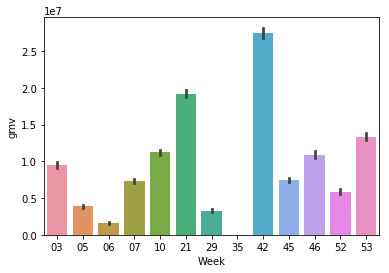

In [125]:
import seaborn as sns
sns.barplot(x = 'Week', y = 'gmv', data = Consumer_df[Consumer_df['special_sales']==1], estimator = np.sum)

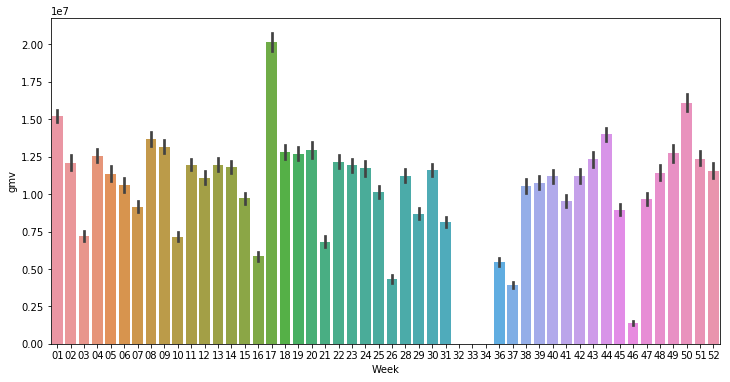

In [126]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Week', y = 'gmv', data = Consumer_df[Consumer_df['special_sales']==0], estimator = np.sum)

###### Mapping months to a month's number of weeks

In [127]:
import calendar

def Week_finder_from_Year(year):
        """ will return all the week from selected year """

        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == mont:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)
            
        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week

In [128]:
dict_number_2015, dict_name_2015 = Week_finder_from_Year(2015)
print(dict_number_2015)
print(dict_name_2015) 

{1: [2, 3, 4, 5], 2: [6, 7, 8, 9], 3: [10, 11, 12, 13, 14], 4: [15, 16, 17, 18], 5: [19, 20, 21, 22], 6: [23, 24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35, 36], 9: [37, 38, 39, 40], 10: [41, 42, 43, 44], 11: [45, 46, 47, 48, 49], 12: [50, 51, 52, 53]}
{'Jan': [2, 3, 4, 5], 'Feb': [6, 7, 8, 9], 'Mar': [10, 11, 12, 13, 14], 'Apr': [15, 16, 17, 18], 'May': [19, 20, 21, 22], 'Jun': [23, 24, 25, 26, 27], 'Jul': [28, 29, 30, 31], 'Aug': [32, 33, 34, 35, 36], 'Sep': [37, 38, 39, 40], 'Oct': [41, 42, 43, 44], 'Nov': [45, 46, 47, 48, 49], 'Dec': [50, 51, 52, 53]}


In [129]:
dict_number_2016, dict_name_2016 =Week_finder_from_Year(2016)
print(dict_number_2016)
print(dict_name_2016)

{1: [1, 2, 3, 4], 2: [5, 6, 7, 8, 9], 3: [10, 11, 12, 13], 4: [14, 15, 16, 17], 5: [18, 19, 20, 21, 22], 6: [23, 24, 25, 26], 7: [27, 28, 29, 30], 8: [31, 32, 33, 34, 35], 9: [36, 37, 38, 39], 10: [40, 41, 42, 43, 44], 11: [45, 46, 47, 48], 12: [49, 50, 51, 52]}
{'Jan': [1, 2, 3, 4], 'Feb': [5, 6, 7, 8, 9], 'Mar': [10, 11, 12, 13], 'Apr': [14, 15, 16, 17], 'May': [18, 19, 20, 21, 22], 'Jun': [23, 24, 25, 26], 'Jul': [27, 28, 29, 30], 'Aug': [31, 32, 33, 34, 35], 'Sep': [36, 37, 38, 39], 'Oct': [40, 41, 42, 43, 44], 'Nov': [45, 46, 47, 48], 'Dec': [49, 50, 51, 52]}


In [130]:
num_weeks_2015 = 0
num_weeks_2016 = 0

for i in dict_number_2015:
    if i >= 7:
        num_weeks_2015 += len(dict_number_2015[i])

for i in dict_number_2016:
    if i <= 6:
        num_weeks_2016 += len(dict_number_2016[i])

total_weeks = num_weeks_2015 + num_weeks_2016
total_weeks

52

There are total of 52 weeks in our dataset

### Media Investment

In [131]:
media_invest = pd.read_excel("Media data and other information.xlsx", sheet_name = 1,skiprows=2,usecols = 'B:M')

In [132]:
media_invest.head()

Year  Month  Total Investment   TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates   SEM  Radio  Other
0 2015.00   7.00             17.06 0.22     2.53         7.41               0.00              1.33         0.55  5.02    nan    nan
1 2015.00   8.00              5.06 0.01     1.28         1.06               0.00              0.13         0.07  2.51    nan    nan
2 2015.00   9.00             96.25 3.88     1.36        62.79               0.61             16.38         5.04  6.20    nan    nan
3 2015.00  10.00            170.16 6.14    12.62        84.67               3.44             24.37         6.97 31.93    nan    nan
4 2015.00  11.00             51.22 4.22     1.28        14.17               0.17             19.56         6.60  5.22    nan    nan

In [133]:
# Imputing nulls with 0

media_invest['Radio'].fillna(value=0, inplace=True)
media_invest['Other'].fillna(value=0, inplace=True)

media_invest.head()

Year  Month  Total Investment   TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates   SEM  Radio  Other
0 2015.00   7.00             17.06 0.22     2.53         7.41               0.00              1.33         0.55  5.02   0.00   0.00
1 2015.00   8.00              5.06 0.01     1.28         1.06               0.00              0.13         0.07  2.51   0.00   0.00
2 2015.00   9.00             96.25 3.88     1.36        62.79               0.61             16.38         5.04  6.20   0.00   0.00
3 2015.00  10.00            170.16 6.14    12.62        84.67               3.44             24.37         6.97 31.93   0.00   0.00
4 2015.00  11.00             51.22 4.22     1.28        14.17               0.17             19.56         6.60  5.22   0.00   0.00

In [134]:
# Temp DataFrame

temp_media_invest = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

temp_media_invest.head()

Year Month Week Total Investment   TV Digital Sponsorship Content Marketing Online marketing Affiliates  SEM Radio Other
0  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN              NaN        NaN  NaN   NaN   NaN
1  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN              NaN        NaN  NaN   NaN   NaN
2  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN              NaN        NaN  NaN   NaN   NaN
3  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN              NaN        NaN  NaN   NaN   NaN
4  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN              NaN        NaN  NaN   NaN   NaN

The monthly values are divided by the number of weeks in that month and taken as weekly data

In [135]:
i = 0

for index, row in media_invest.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_number_2015[row.Month])

        for week in dict_number_2015[row.Month]:
            
            temp_media_invest.iloc[i].Year = row.Year
            temp_media_invest.iloc[i].Month = row.Month
            temp_media_invest.iloc[i]['Week'] = week
            temp_media_invest.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_invest.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_invest.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

    elif row.Year == 2016:
        
        num_weeks = len(dict_number_2016[row.Month])

        for week in dict_number_2016[row.Month]:
            
            temp_media_invest.iloc[i].Year = row.Year
            temp_media_invest.iloc[i].Month = row.Month
            temp_media_invest.iloc[i]['Week'] = week
            temp_media_invest.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_invest.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_invest.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_invest.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

temp_media_invest.head()

Year Month Week Total Investment   TV Digital Sponsorship Content Marketing Online marketing Affiliates  SEM Radio Other
0 2015.00  7.00   28             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
1 2015.00  7.00   29             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
2 2015.00  7.00   30             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
3 2015.00  7.00   31             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
4 2015.00  8.00   32             1.01 0.00    0.26        0.21              0.00             0.03       0.01 0.50  0.00  0.00

In [136]:
temp_media_invest['Week'] = temp_media_invest['Week'].astype('str')

In [137]:
media_invest = temp_media_invest

media_invest.head()

Year Month Week Total Investment   TV Digital Sponsorship Content Marketing Online marketing Affiliates  SEM Radio Other
0 2015.00  7.00   28             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
1 2015.00  7.00   29             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
2 2015.00  7.00   30             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
3 2015.00  7.00   31             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
4 2015.00  8.00   32             1.01 0.00    0.26        0.21              0.00             0.03       0.01 0.50  0.00  0.00

In [138]:
# Check for duplicates
media_invest.duplicated('Week').value_counts()

False    52
dtype: int64

In [139]:
# Check for nulls
media_invest.isnull().values.any()

False

In [140]:
# Dropp Year and Month column 

del media_invest['Year']
del media_invest['Month']
media_invest.head()

Week Total Investment   TV Digital Sponsorship Content Marketing Online marketing Affiliates  SEM Radio Other
0   28             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
1   29             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
2   30             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
3   31             4.26 0.05    0.63        1.85              0.00             0.33       0.14 1.26  0.00  0.00
4   32             1.01 0.00    0.26        0.21              0.00             0.03       0.01 0.50  0.00  0.00

In [141]:
original_column = media_invest.columns[1:]
original_column

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], dtype='object')

#### Calculate 8-weeks Exponential Moving Average for all Advertising media channels

In [142]:
def Expo_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_EMA_'+np.str(n),value=df[i].ewm(span=n, adjust=False).mean())
    return df

In [143]:
media_invest = Expo_variables(media_invest,original_column,8) 
media_invest.head()

Week Total Investment  Total Investment_EMA_8   TV  TV_EMA_8 Digital  Digital_EMA_8 Sponsorship  Sponsorship_EMA_8 Content Marketing  Content Marketing_EMA_8 Online marketing  Online marketing_EMA_8 Affiliates  Affiliates_EMA_8  SEM  SEM_EMA_8 Radio  Radio_EMA_8 Other  Other_EMA_8
0   28             4.26                    4.26 0.05      0.05    0.63           0.63        1.85               1.85              0.00                     0.00             0.33                    0.33       0.14              0.14 1.26       1.26  0.00         0.00  0.00         0.00
1   29             4.26                    4.26 0.05      0.05    0.63           0.63        1.85               1.85              0.00                     0.00             0.33                    0.33       0.14              0.14 1.26       1.26  0.00         0.00  0.00         0.00
2   30             4.26                    4.26 0.05      0.05    0.63           0.63        1.85               1.85              0.00                     0.00             0.33                    0.33       0.14              0.14 1.26       1.26  0.00         0.00  0.00         0.00
3   31             4.26                    4.26 0.05      0.05    0.63           0.63        1.85               1.85              0.00                     0.00             0.33                    0.33       0.14              0.14 1.26       1.26  0.00         0.00  0.00         0.00
4   32             1.01                    3.54 0.00      0.04    0.26           0.55        0.21               1.49              0.00                     0.00             0.03                    0.26       0.01              0.11 0.50       1.09  0.00         0.00  0.00         0.00

##### Calculate 5-weeks Simple Moving Average for advertising media channels

In [144]:
def SMA_variable(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())
    return df


In [145]:
media_invest = SMA_variable(media_invest,original_column,5) 
media_invest.head()

Week Total Investment  Total Investment_SMA_5  Total Investment_EMA_8   TV  TV_SMA_5  TV_EMA_8 Digital  Digital_SMA_5  Digital_EMA_8 Sponsorship  Sponsorship_SMA_5  Sponsorship_EMA_8 Content Marketing  Content Marketing_SMA_5  Content Marketing_EMA_8 Online marketing  Online marketing_SMA_5  Online marketing_EMA_8 Affiliates  Affiliates_SMA_5  Affiliates_EMA_8  SEM  SEM_SMA_5  SEM_EMA_8 Radio  Radio_SMA_5  Radio_EMA_8 Other  Other_SMA_5  Other_EMA_8
0   28             4.26                     nan                    4.26 0.05       nan      0.05    0.63            nan           0.63        1.85                nan               1.85              0.00                      nan                     0.00             0.33                     nan                    0.33       0.14               nan              0.14 1.26        nan       1.26  0.00          nan         0.00  0.00          nan         0.00
1   29             4.26                     nan                    4.26 0.05       nan      0.05    0.63            nan           0.63        1.85                nan               1.85              0.00                      nan                     0.00             0.33                     nan                    0.33       0.14               nan              0.14 1.26        nan       1.26  0.00          nan         0.00  0.00          nan         0.00
2   30             4.26                     nan                    4.26 0.05       nan      0.05    0.63            nan           0.63        1.85                nan               1.85              0.00                      nan                     0.00             0.33                     nan                    0.33       0.14               nan              0.14 1.26        nan       1.26  0.00          nan         0.00  0.00          nan         0.00
3   31             4.26                     nan                    4.26 0.05       nan      0.05    0.63            nan           0.63        1.85                nan               1.85              0.00                      nan                     0.00             0.33                     nan                    0.33       0.14               nan              0.14 1.26        nan       1.26  0.00          nan         0.00  0.00          nan         0.00
4   32             1.01                    3.61                    3.54 0.00      0.04      0.04    0.26           0.56           0.55        0.21               1.53               1.49              0.00                     0.00                     0.00             0.03                    0.27                    0.26       0.01              0.11              0.11 0.50       1.11       1.09  0.00         0.00         0.00  0.00         0.00         0.00

###### Calculate 3-weeks Simple Moving Average for Advertising media channels

In [146]:
media_invest = SMA_variable(media_invest,original_column,3) 
media_invest.head()

Week Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8 Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8 Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8 Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8 Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8 Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  Affiliates_EMA_8  SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8 Radio  Radio_SMA_3  Radio_SMA_5  Radio_EMA_8 Other  Other_SMA_3  Other_SMA_5  Other_EMA_8
0   28             4.26                     nan                     nan                    4.26 0.05       nan       nan      0.05    0.63            nan            nan           0.63        1.85                nan                nan               1.85              0.00                      nan                      nan                     0.00             0.33                     nan                     nan                    0.33       0.14               nan               nan              0.14 1.26        nan        nan       1.26  0.00          nan          nan         0.00  0.00          nan          nan         0.00
1   29             4.26                     nan                     nan                    4.26 0.05       nan       nan      0.05    0.63            nan            nan           0.63        1.85                nan                nan               1.85              0.00                      nan                      nan                     0.00             0.33                     nan                     nan                    0.33       0.14               nan               nan              0.14 1.26        nan        nan       1.26  0.00          nan          nan         0.00  0.00          nan          nan         0.00
2   30             4.26                    4.26                     nan                    4.26 0.05      0.05       nan      0.05    0.63           0.63            nan           0.63        1.85               1.85                nan               1.85              0.00                     0.00                      nan                     0.00             0.33                    0.33                     nan                    0.33       0.14              0.14               nan              0.14 1.26       1.26        nan       1.26  0.00         0.00          nan         0.00  0.00         0.00          nan         0.00
3   31             4.26                    4.26                     nan                    4.26 0.05      0.05       nan      0.05    0.63           0.63            nan           0.63        1.85               1.85                nan               1.85              0.00                     0.00                      nan                     0.00             0.33                    0.33                     nan                    0.33       0.14              0.14               nan              0.14 1.26       1.26        nan       1.26  0.00         0.00          nan         0.00  0.00         0.00          nan         0.00
4   32             1.01                    3.18                    3.61                    3.54 0.00      0.04      0.04      0.04    0.26           0.51           0.56           0.55        0.21               1.31               1.53               1.49              0.00                     0.00                     0.00                     0.00             0.03                    0.23                    0.27                    0.26       0.01              0.10              0.11              0.11 0.50       1.00       1.11       1.09  0.00         0.00         0.00         0.00  0.00         0.00         0.00         0.00

### Calculating Ad Stock values

In [147]:
def calculating_ad_stocks(data, engagement_factor):
    
    """initialize ad stock vectors"""
    TV_ad_stock_vector = []                     
    Digital_ad_stock_vector = []
    Sponsorship_ad_stock_vector = []
    Content_Marketing_ad_stock_vector = []
    Online_marketing_ad_stock_vector = []
    Affiliates_ad_stock_vector = []
    SEM_ad_stock_vector = []
    Radio_ad_stock_vector = []
    Other_ad_stock_vector = []
    Total_Investment_ad_stock_vector = []
    
    """initialize ad_stock_value"""
    tv_ad_stock_value = 0 
    Digital_ad_stock_value = 0
    Sponsorship_ad_stock_value = 0
    Content_Marketing_ad_stock_value = 0
    Online_marketing_ad_stock_value = 0
    Affiliates_ad_stock_value = 0
    SEM_ad_stock_value = 0
    Radio_ad_stock_value = 0
    Other_ad_stock_value = 0
    Total_Investment_ad_stock_value = 0
    """"The formula for adstock is: At = Xt + adstock rate * At-1."""
    for index, row in data.iterrows():
        tv_ad_stock_value = row['TV'] + engagement_factor * tv_ad_stock_value
        TV_ad_stock_vector.append(tv_ad_stock_value)
        Digital_ad_stock_value = row['Digital'] + engagement_factor * Digital_ad_stock_value
        Digital_ad_stock_vector.append(Digital_ad_stock_value)
        Sponsorship_ad_stock_value = row['Sponsorship'] + engagement_factor * Sponsorship_ad_stock_value
        Sponsorship_ad_stock_vector.append(Sponsorship_ad_stock_value)
        Content_Marketing_ad_stock_value = row['Content Marketing'] + engagement_factor * Content_Marketing_ad_stock_value
        Content_Marketing_ad_stock_vector.append(Content_Marketing_ad_stock_value)    
        Online_marketing_ad_stock_value = row['Online marketing'] + engagement_factor * Online_marketing_ad_stock_value
        Online_marketing_ad_stock_vector.append(Online_marketing_ad_stock_value)
        Affiliates_ad_stock_value = row['Affiliates'] + engagement_factor * Affiliates_ad_stock_value
        Affiliates_ad_stock_vector.append(Affiliates_ad_stock_value)
        SEM_ad_stock_value = row['SEM'] + engagement_factor * SEM_ad_stock_value
        SEM_ad_stock_vector.append(SEM_ad_stock_value)
        Radio_ad_stock_value = row['Radio'] + engagement_factor * Radio_ad_stock_value
        Radio_ad_stock_vector.append(Radio_ad_stock_value)
        Other_ad_stock_value = row['Other'] + engagement_factor * Other_ad_stock_value
        Other_ad_stock_vector.append(Other_ad_stock_value)
        Total_Investment_ad_stock_value = row['Total Investment'] + engagement_factor * Total_Investment_ad_stock_value
        Total_Investment_ad_stock_vector.append(Total_Investment_ad_stock_value)
        
        
        """add ad stock vector to dataset"""
        loc_index = data.columns.get_loc('TV_EMA_8') + 1
    data.insert(loc=loc_index,column='TV_Ad_Stock',value=TV_ad_stock_vector)
    loc_index = data.columns.get_loc('Digital_EMA_8') + 1
    data.insert(loc=loc_index,column='Digital_Ad_Stock',value=Digital_ad_stock_vector)
    loc_index = data.columns.get_loc('Sponsorship_EMA_8') + 1
    data.insert(loc=loc_index,column='Sponsorship_Ad_Stock',value=Sponsorship_ad_stock_vector)
    loc_index = data.columns.get_loc('Content Marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Content_Marketing_Ad_Stock',value=Content_Marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Online marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Online_marketing_Ad_Stock',value=Online_marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Affiliates_EMA_8') + 1
    data.insert(loc=loc_index,column='Affiliates_Ad_Stock',value=Affiliates_ad_stock_vector)
    loc_index = data.columns.get_loc('SEM_EMA_8') + 1
    data.insert(loc=loc_index,column='SEM_Ad_Stock',value=SEM_ad_stock_vector)
    loc_index = data.columns.get_loc('Radio_EMA_8') + 1
    data.insert(loc=loc_index,column='Radio_Ad_Stock',value=Radio_ad_stock_vector)
    loc_index = data.columns.get_loc('Other_EMA_8') + 1
    data.insert(loc=loc_index,column='Other_Ad_Stock',value=Other_ad_stock_vector)
    loc_index = data.columns.get_loc('Total Investment_EMA_8') + 1
    data.insert(loc=loc_index,column='Total_Investment_Ad_Stock',value=Total_Investment_ad_stock_vector)
    
    return data

##### Assuming the value of Adstock rate(engagement factor)

In [148]:
media_invest = calculating_ad_stocks(data=media_invest, engagement_factor=0.6)
media_invest.head(10)

Week Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  Affiliates_EMA_8  Affiliates_Ad_Stock  SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8  SEM_Ad_Stock Radio  Radio_SMA_3  Radio_SMA_5  Radio_EMA_8  Radio_Ad_Stock Other  Other_SMA_3  Other_SMA_5  Other_EMA_8  Other_Ad_Stock
0   28             4.26                     nan                     nan                    4.26                       4.26 0.05       nan       nan      0.05         0.05    0.63            nan            nan           0.63              0.63        1.85                nan                nan               1.85                  1.85              0.00                      nan                      nan                     0.00                        0.00             0.33                     nan                     nan                    0.33                       0.33       0.14               nan               nan              0.14                 0.14 1.26        nan        nan       1.26          1.26  0.00          nan          nan         0.00            0.00  0.00          nan          nan         0.00            0.00
1   29             4.26                     nan                     nan                    4.26                       6.82 0.05       nan       nan      0.05         0.09    0.63            nan            nan           0.63              1.01        1.85                nan                nan               1.85                  2.97              0.00                      nan                      nan                     0.00                        0.00             0.33                     nan                     nan                    0.33                       0.53       0.14               nan               nan              0.14                 0.22 1.26        nan        nan       1.26          2.01  0.00          nan          nan         0.00            0.00  0.00          nan          nan         0.00            0.00
2   30             4.26                    4.26                     nan                    4.26                       8.36 0.05      0.05       nan      0.05         0.11    0.63           0.63            nan           0.63              1.24        1.85               1.85                nan               1.85                  3.63              0.00                     0.00                      nan                     0.00                        0.00             0.33                    0.33                     nan                    0.33                       0.65       0.14              0.14               nan              0.14                 0.27 1.26       1.26        nan       1.26          2.46  0.00         0.00          nan         0.00            0.00  0.00         0.00          nan         0.00            0.00
3   31             4.26                    4.26                     nan                    4.26                       9.28 0.05      0.05       nan      0.05         0.12    0.63           0.63            nan           0.63              1.38        1.85               1.85                nan               1.85                  4.03              0.00                     0.00                      nan                     0.00                        0.00             0.33                    0.33                     nan                    0.33                       0.72       0.14              0.14               nan              0.14                 0.30 1.26       1.26        nan

In [149]:
media_invest.fillna(value=0, inplace=True)
media_invest.head(10)

Week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  Affiliates_EMA_8  Affiliates_Ad_Stock  SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8  SEM_Ad_Stock  Radio  Radio_SMA_3  Radio_SMA_5  Radio_EMA_8  Radio_Ad_Stock  Other  Other_SMA_3  Other_SMA_5  Other_EMA_8  Other_Ad_Stock
0   28              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.33        0.14              0.00              0.00              0.14                 0.14 1.26       0.00       0.00       1.26          1.26   0.00         0.00         0.00         0.00            0.00   0.00         0.00         0.00         0.00            0.00
1   29              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.53        0.14              0.00              0.00              0.14                 0.22 1.26       0.00       0.00       1.26          2.01   0.00         0.00         0.00         0.00            0.00   0.00         0.00         0.00         0.00            0.00
2   30              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.65        0.14              0.14              0.00              0.14                 0.27 1.26       1.26       0.00       1.26          2.46   0.00         0.00         0.00         0.00            0.00   0.00         0.00         0.00         0.00            0.00
3   31              4.26                    4.26                    0.00                    4.26                       9.28 0.05      0.05      0.00      0.05         0.12     0.63           0.63           0.00           0.63              1.38         1.85               1.85               0.00               1.85                  4.03               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.72        0.14              0.14              0.00              0.14          

In [150]:
media_invest.shape

(52, 51)

### NPS-work as a proxy to ‘voice of the customer’ and Stock Index

In [151]:
net_promoter_scr = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', \
                              skiprows=0)
net_promoter_scr.columns.values[0]='score'
net_promoter_scr 

score  July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  Feb'16  Mar'16  Apr'16  May'16  June'16
0          NPS    54.60   59.99    46.93   44.40   47.00   45.80   47.09   50.33   49.02   51.83   47.31    50.52
1  Stock Index  1177.00 1206.00  1101.00 1210.00 1233.00 1038.00 1052.00 1222.00 1015.00 1242.00 1228.00  1194.00

###### Convert dataset into suitable format

In [152]:
# reset index
net_promoter_scr.reset_index(drop=True, inplace=True)

# Transpose the dataframe
net_promoter_scr = net_promoter_scr.T

# reset index
net_promoter_scr.reset_index(drop=False, inplace=True)

# renaming columns
net_promoter_scr.columns = ['Month', 'NPS', 'Stock Index']
net_promoter_scr.drop(net_promoter_scr.index[0], inplace=True)
net_promoter_scr 

Month   NPS Stock Index
1   July'15 54.60     1177.00
2    Aug'15 59.99     1206.00
3   Sept'15 46.93     1101.00
4    Oct'15 44.40     1210.00
5    Nov'15 47.00     1233.00
6    Dec'15 45.80     1038.00
7    Jan'16 47.09     1052.00
8    Feb'16 50.33     1222.00
9    Mar'16 49.02     1015.00
10   Apr'16 51.83     1242.00
11   May'16 47.31     1228.00
12  June'16 50.52     1194.00

For each week of a month, we use the same NPS Score and Stock Index values as the NPS Score and Stock Index for the whole month

In [153]:
# Temp DataFrame
temp_nps = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'NPS', 'Stock Index'])
temp_nps

Year Month Week  NPS Stock Index
0   NaN   NaN  NaN  NaN         NaN
1   NaN   NaN  NaN  NaN         NaN
2   NaN   NaN  NaN  NaN         NaN
3   NaN   NaN  NaN  NaN         NaN
4   NaN   NaN  NaN  NaN         NaN
5   NaN   NaN  NaN  NaN         NaN
6   NaN   NaN  NaN  NaN         NaN
7   NaN   NaN  NaN  NaN         NaN
8   NaN   NaN  NaN  NaN         NaN
9   NaN   NaN  NaN  NaN         NaN
10  NaN   NaN  NaN  NaN         NaN
11  NaN   NaN  NaN  NaN         NaN
12  NaN   NaN  NaN  NaN         NaN
13  NaN   NaN  NaN  NaN         NaN
14  NaN   NaN  NaN  NaN         NaN
15  NaN   NaN  NaN  NaN         NaN
16  NaN   NaN  NaN  NaN         NaN
17  NaN   NaN  NaN  NaN         NaN
18  NaN   NaN  NaN  NaN         NaN
19  NaN   NaN  NaN  NaN         NaN
20  NaN   NaN  NaN  NaN         NaN
21  NaN   NaN  NaN  NaN         NaN
22  NaN   NaN  NaN  NaN         NaN
23  NaN   NaN  NaN  NaN         NaN
24  NaN   NaN  NaN  NaN         NaN
25  NaN   NaN  NaN  NaN         NaN
26  NaN   NaN  NaN  NaN         NaN
27  NaN   NaN  NaN  NaN         NaN
28  NaN   NaN  NaN  NaN         NaN
29  NaN   NaN  NaN  NaN         NaN
30  NaN   NaN  NaN  NaN         NaN
31  NaN   NaN  NaN  NaN         NaN
32  NaN   NaN  NaN  NaN         NaN
33  NaN   NaN  NaN  NaN         NaN
34  NaN   NaN  NaN  NaN         NaN
35  NaN   NaN  NaN  NaN         NaN
36  NaN   NaN  NaN  NaN         NaN
37  NaN   NaN  NaN  NaN         NaN
38  NaN   NaN  NaN  NaN         NaN
39  NaN   NaN  NaN  NaN         NaN
40  NaN   NaN  NaN  NaN         NaN
41  NaN   NaN  NaN  NaN         NaN
42  NaN   NaN  NaN  NaN         NaN
43  NaN   NaN  NaN  NaN         NaN
44  NaN   NaN  NaN  NaN         NaN
45  NaN   NaN  NaN  NaN         NaN
46  NaN   NaN  NaN  NaN         NaN
47  NaN   NaN  NaN  NaN         NaN
48  NaN   NaN  NaN  NaN         NaN
49  NaN   NaN  NaN  NaN         NaN
50  NaN   NaN  NaN  NaN         NaN
51  NaN   NaN  NaN  NaN         NaN

In [154]:
import re
i = 0

for index, row in net_promoter_scr.iterrows():

    if '15' in row['Month']:
        
        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2015[month]:        
            
            temp_nps.iloc[i].Year = 2015
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1
        
    elif '16' in row['Month']:

        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2016[month]:        
            
            temp_nps.iloc[i].Year = 2016
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1

temp_nps.head()

Year Month Week   NPS Stock Index
0  2015   Jul   28 54.60     1177.00
1  2015   Jul   29 54.60     1177.00
2  2015   Jul   30 54.60     1177.00
3  2015   Jul   31 54.60     1177.00
4  2015   Aug   32 59.99     1206.00

In [155]:
temp_nps['Week'] = temp_nps['Week'].astype('str')

In [156]:
net_promoter_scr = temp_nps 
net_promoter_scr 

Year Month Week   NPS Stock Index
0   2015   Jul   28 54.60     1177.00
1   2015   Jul   29 54.60     1177.00
2   2015   Jul   30 54.60     1177.00
3   2015   Jul   31 54.60     1177.00
4   2015   Aug   32 59.99     1206.00
5   2015   Aug   33 59.99     1206.00
6   2015   Aug   34 59.99     1206.00
7   2015   Aug   35 59.99     1206.00
8   2015   Aug   36 59.99     1206.00
9   2015   Sep   37 46.93     1101.00
10  2015   Sep   38 46.93     1101.00
11  2015   Sep   39 46.93     1101.00
12  2015   Sep   40 46.93     1101.00
13  2015   Oct   41 44.40     1210.00
14  2015   Oct   42 44.40     1210.00
15  2015   Oct   43 44.40     1210.00
16  2015   Oct   44 44.40     1210.00
17  2015   Nov   45 47.00     1233.00
18  2015   Nov   46 47.00     1233.00
19  2015   Nov   47 47.00     1233.00
20  2015   Nov   48 47.00     1233.00
21  2015   Nov   49 47.00     1233.00
22  2015   Dec   50 45.80     1038.00
23  2015   Dec   51 45.80     1038.00
24  2015   Dec   52 45.80     1038.00
25  2015   Dec   53 45.80     1038.00
26  2016   Jan    1 47.09     1052.00
27  2016   Jan    2 47.09     1052.00
28  2016   Jan    3 47.09     1052.00
29  2016   Jan    4 47.09     1052.00
30  2016   Feb    5 50.33     1222.00
31  2016   Feb    6 50.33     1222.00
32  2016   Feb    7 50.33     1222.00
33  2016   Feb    8 50.33     1222.00
34  2016   Feb    9 50.33     1222.00
35  2016   Mar   10 49.02     1015.00
36  2016   Mar   11 49.02     1015.00
37  2016   Mar   12 49.02     1015.00
38  2016   Mar   13 49.02     1015.00
39  2016   Apr   14 51.83     1242.00
40  2016   Apr   15 51.83     1242.00
41  2016   Apr   16 51.83     1242.00
42  2016   Apr   17 51.83     1242.00
43  2016   May   18 47.31     1228.00
44  2016   May   19 47.31     1228.00
45  2016   May   20 47.31     1228.00
46  2016   May   21 47.31     1228.00
47  2016   May   22 47.31     1228.00
48  2016   Jun   23 50.52     1194.00
49  2016   Jun   24 50.52     1194.00
50  2016   Jun   25 50.52     1194.00
51  2016   Jun   26 50.52     1194.00

In [157]:
net_promoter_scr.duplicated('Week').value_counts()

False    52
dtype: int64

No duplicates

In [158]:
net_promoter_scr.isnull().values.any()

False

In [159]:
# Dropp Year and Month columns 

del net_promoter_scr['Year']
del net_promoter_scr['Month']

In [160]:
nps_original_col = net_promoter_scr.columns[1:]
nps_original_col

Index(['NPS', 'Stock Index'], dtype='object')

In [161]:

net_promoter_scr.head()

Week   NPS Stock Index
0   28 54.60     1177.00
1   29 54.60     1177.00
2   30 54.60     1177.00
3   31 54.60     1177.00
4   32 59.99     1206.00

###### Calculate 5-weeks Simple Moving Average for NPS and Stock_Index

In [162]:
net_promoter_scr = SMA_variable(net_promoter_scr,nps_original_col,5) 
net_promoter_scr.head()

Week   NPS  NPS_SMA_5 Stock Index  Stock Index_SMA_5
0   28 54.60        nan     1177.00                nan
1   29 54.60        nan     1177.00                nan
2   30 54.60        nan     1177.00                nan
3   31 54.60        nan     1177.00                nan
4   32 59.99      55.68     1206.00            1182.80

###### Calculate 3-weeks Simple Moving Average for NPS and Stock_Index

In [163]:
net_promoter_scr = SMA_variable(net_promoter_scr,nps_original_col,3) 
net_promoter_scr.head()

Week   NPS  NPS_SMA_3  NPS_SMA_5 Stock Index  Stock Index_SMA_3  Stock Index_SMA_5
0   28 54.60        nan        nan     1177.00                nan                nan
1   29 54.60        nan        nan     1177.00                nan                nan
2   30 54.60      54.60        nan     1177.00            1177.00                nan
3   31 54.60      54.60        nan     1177.00            1177.00                nan
4   32 59.99      56.40      55.68     1206.00            1186.67            1182.80

In [164]:
net_promoter_scr.fillna(value=0, inplace=True)
net_promoter_scr.head()

Week   NPS  NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  Stock Index_SMA_5
0   28 54.60       0.00       0.00      1177.00               0.00               0.00
1   29 54.60       0.00       0.00      1177.00               0.00               0.00
2   30 54.60      54.60       0.00      1177.00            1177.00               0.00
3   31 54.60      54.60       0.00      1177.00            1177.00               0.00
4   32 59.99      56.40      55.68      1206.00            1186.67            1182.80

##### Distribution of the numeric columns

#############
Month
#############


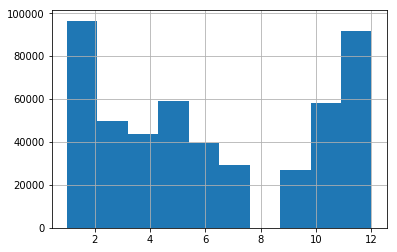

#############
gmv
#############


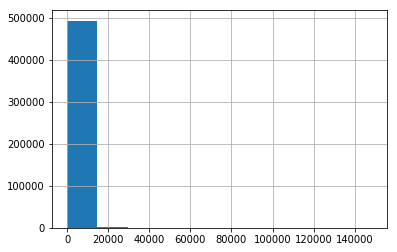

#############
list_price
#############


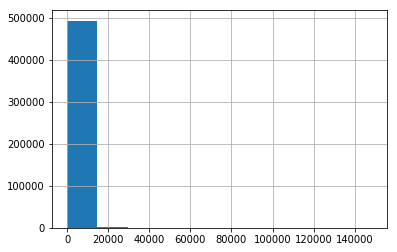

#############
Discount%
#############


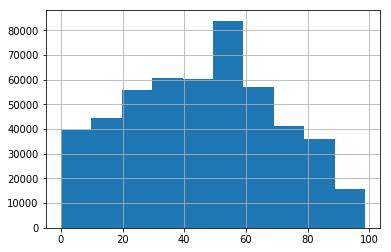

#############
units
#############


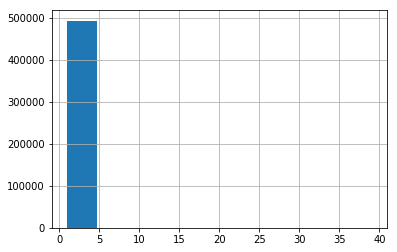

#############
deliverybdays
#############


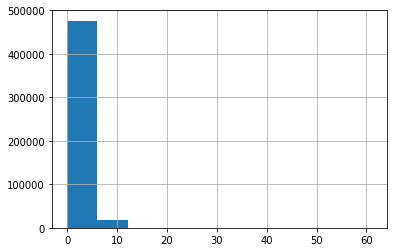

#############
deliverycdays
#############


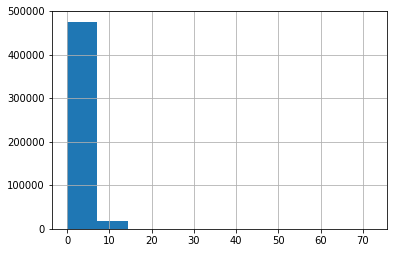

#############
sla
#############


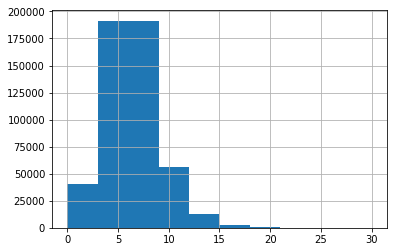

#############
product_mrp
#############


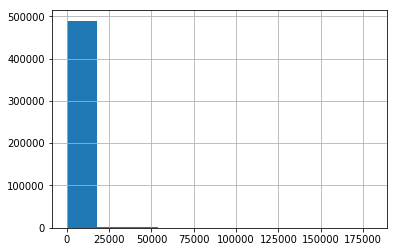

#############
product_procurement_sla
#############


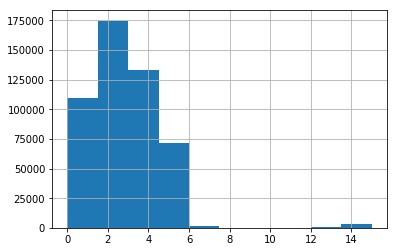

#############
payday_flag
#############


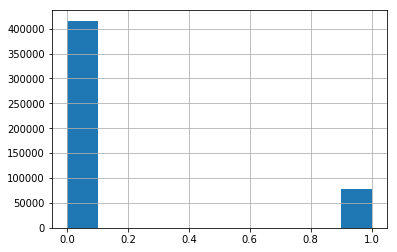

#############
hld_flag
#############


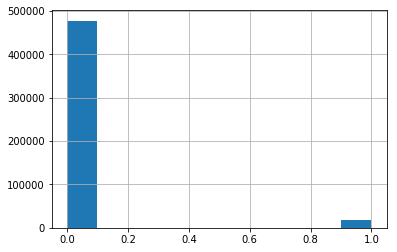

#############
order_payment_type_Prepaid
#############


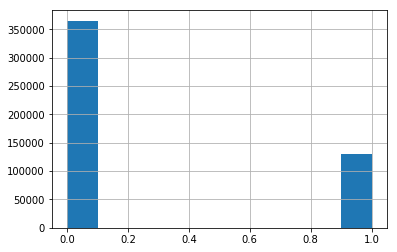

#############
special_sales
#############


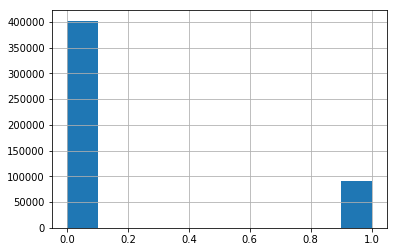

In [165]:
for col in Consumer_df.describe().columns:
    print('#############')
    print(col)
    print('#############')
    Consumer_df[col].hist()
    plt.show()

Categorical columns

In [166]:
cat_var = [cname for cname in Consumer_df.columns if 
                                Consumer_df[cname].dtype == "object"]

Consumer_df[cat_var].describe().T
 


count  unique               top    freq
Year                           494255       2              2016  288230
Week                           494255      52                42   28537
order_id                       494255  486271         171370369       6
product_analytic_category      494255       3   CameraAccessory  205688
product_analytic_sub_category  494255       3   CameraAccessory  205688
product_analytic_vertical      494255      50  HomeAudioSpeaker   75457
product_type                   494255       2       mass_market  395348

### EDA-part-2

###### Comparing Distribution of Discount% for product types  

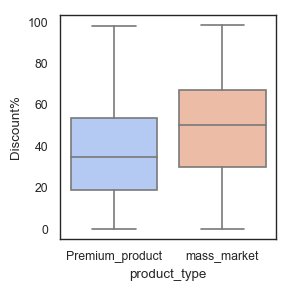

In [167]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(3, 3), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.boxplot(x='product_type', y='Discount%', palette='coolwarm', data=Consumer_df)
# plot legend

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

Relative to Mass Market Items, the average discount rate offered for premium_product is lower. 
This is a well-known phenomenon among premium_product or premium brands to offer limited or no discounts to maintain their products exclusivity.

##### Displaying trend of NPS and Stock Index 

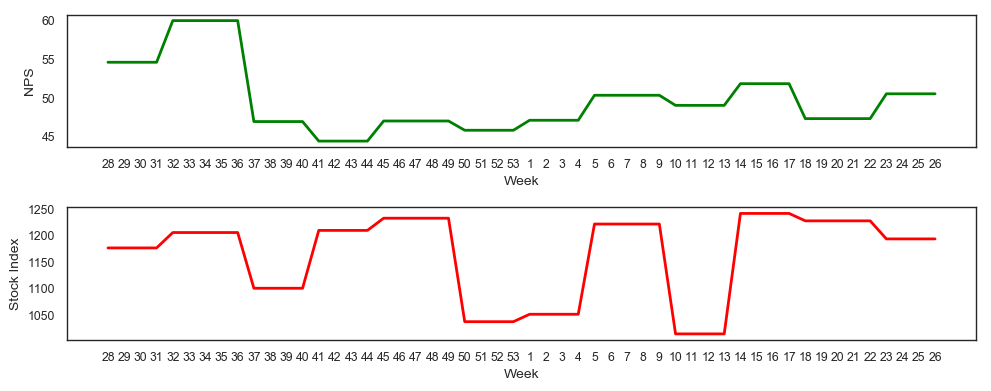

In [168]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(2, 1, 1)
plt.plot(net_promoter_scr.iloc[:,0], net_promoter_scr.iloc[:,1], 'g-', linewidth=2)
plt.xlabel('Week', fontsize=10);
plt.ylabel('NPS', fontsize=10);

# subplot 2
plt.subplot(2, 1, 2)
plt.plot(net_promoter_scr.iloc[:,0], net_promoter_scr.iloc[:,4], 'r-', linewidth=2)
plt.xlabel('Week', fontsize=10);
plt.ylabel('Stock Index', fontsize=10);

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()


In weeks 32 – 35 the product NPS rating was highest, which corresponds with the period when peak discounts are given.

#### Display  trend of Media Channel Investments by week

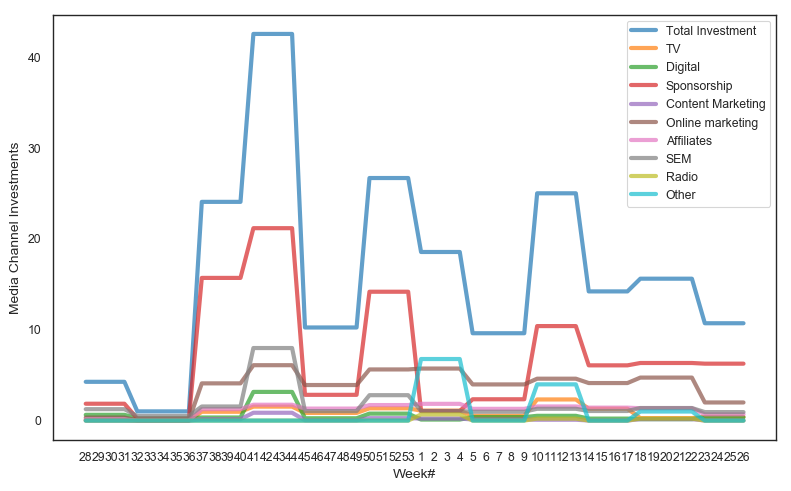

In [169]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 1, 1)
plt.plot(media_invest.iloc[:,0], media_invest.iloc[:,1::5], linewidth=3, alpha = 0.7)
plt.xlabel('Week#', fontsize=10)
plt.ylabel('Media Channel Investments', fontsize=10)
plt.legend(media_invest.iloc[:,1::5])
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

Most of the Ad Investment was made in sponsorships over the past year, followed by Online Marketing & Search Engine Marketing

##### Average Revenue from Holiday/Non-holiday days for product subcategories

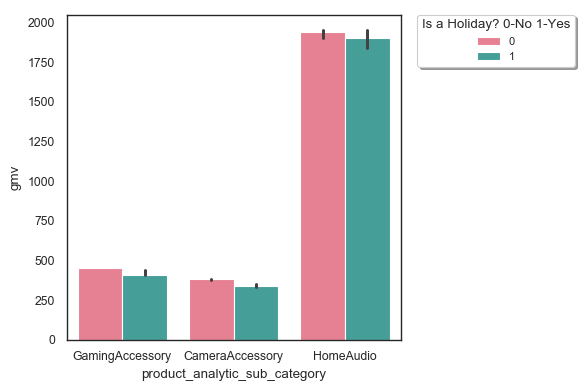

In [170]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.barplot(y='gmv', x='product_analytic_sub_category', hue ='hld_flag', \
            palette='husl', data=Consumer_df, estimator=np.median)

# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Is a Holiday? 0-No 1-Yes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

The average revenue from holiday and non-holiday days for 3 brand sub-categories is more or less equivalent.

###### Items(Premium_product/Mass-market) sold per product subcategories

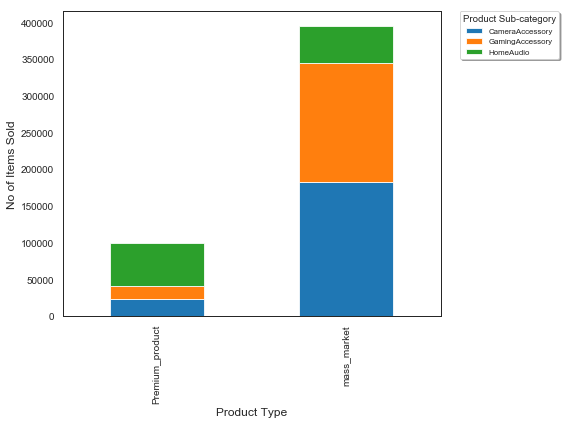

In [171]:
Consumer_df.groupby(["product_type", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                             fontsize = 10) 
# plot x axis label
plt.xlabel('Product Type', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

We have the following points from the chart above: 
* Most of the units sold belonged to the class of the mass market. Most of the products related to camera and gaming accessories were sold on the mass market. 
* Home audio products were among the best-selling products

##### Total items sold per 3 product subcategories per Month

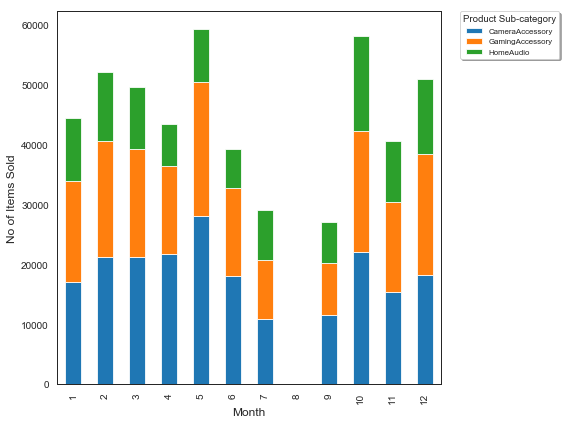

In [172]:

Consumer_df.groupby(["Month", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Month', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

##### Total items sold per 3 product subcategories per Week

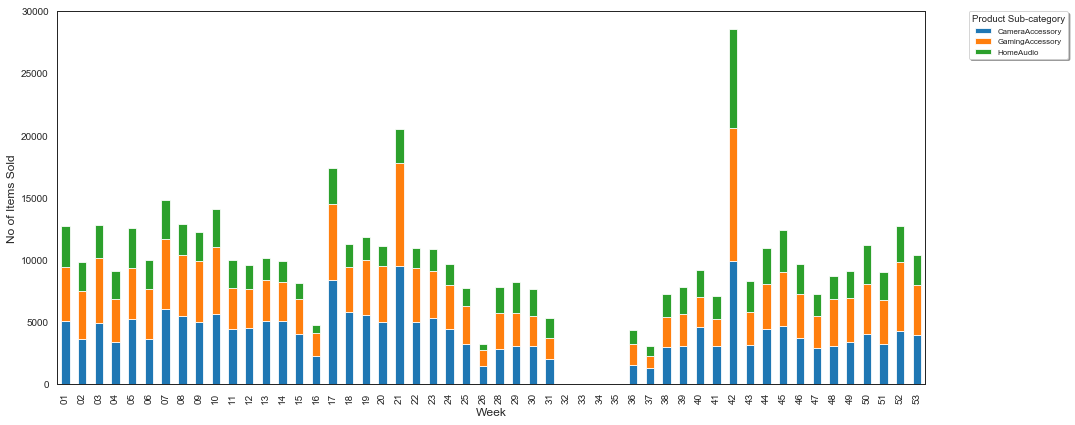

In [173]:
Consumer_df.groupby(["Week", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(15,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Week', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()


The sale on the 42nd week is maximum. Overall, October has seen most no of items being sold

##### Top 10 Product Verticals which brought the Maximum Revenue for 3 product sub-categories

In [174]:
highest_gmv = pd.DataFrame(Consumer_df.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum().sort_values(ascending=False).reset_index()).head(10)
highest_gmv['product_in_category'] = highest_gmv[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
highest_gmv.head(20)

product_analytic_sub_category product_analytic_vertical          gmv               product_in_category
0                     HomeAudio          HomeAudioSpeaker 184730787.56     HomeAudioSpeaker in HomeAudio
1               CameraAccessory                      Lens 102557340.00           Lens in CameraAccessory
2               GamingAccessory                   GamePad  58426251.71        GamePad in GamingAccessory
3               GamingAccessory             GamingHeadset  31476223.03  GamingHeadset in GamingAccessory
4               CameraAccessory                Binoculars  26126630.50     Binoculars in CameraAccessory
5               GamingAccessory               GamingMouse  25432602.82    GamingMouse in GamingAccessory
6               CameraAccessory             CameraBattery  21815154.76  CameraBattery in CameraAccessory
7               CameraAccessory                     Flash  21735182.00          Flash in CameraAccessory
8               CameraAccessory                 CameraBag  21596885.00      CameraBag in CameraAccessory
9                     HomeAudio                   FMRadio  21526757.00              FMRadio in HomeAudio

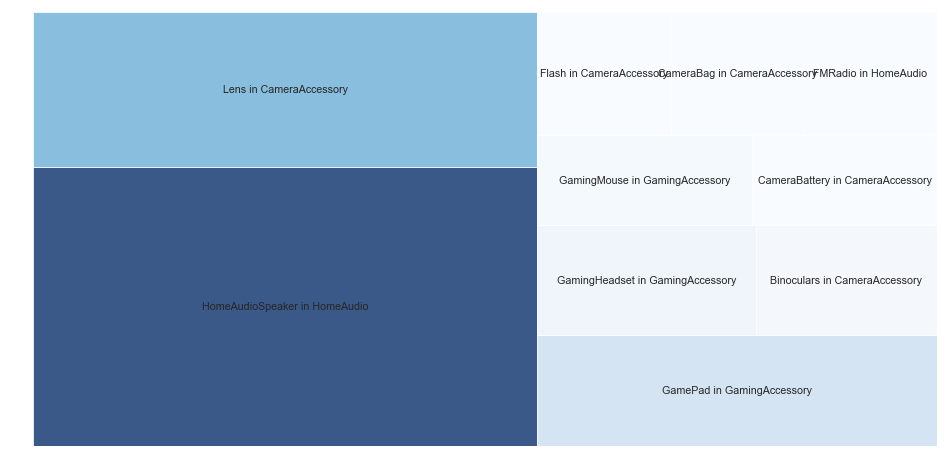

In [175]:
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
import matplotlib
my_values=list(highest_gmv['gmv'])
 
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=highest_gmv['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

The homeaudio speaker created the largest revenue followed by the camera accessory and gamepad lens in gaming accessories

#### Top 10 Product Verticals with most no of sales for 3 product sub-categories

In [176]:
large_sales = pd.DataFrame(Consumer_df.groupby(['product_analytic_sub_category','product_analytic_vertical'])['units'].count().sort_values(ascending=False).reset_index()).head(10)
large_sales['product_in_category'] = large_sales[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
large_sales.head(20)

product_analytic_sub_category product_analytic_vertical  units               product_in_category
0                     HomeAudio          HomeAudioSpeaker  75457     HomeAudioSpeaker in HomeAudio
1               GamingAccessory             GamingHeadset  59269  GamingHeadset in GamingAccessory
2               GamingAccessory                   GamePad  49983        GamePad in GamingAccessory
3               CameraAccessory                     Flash  47959          Flash in CameraAccessory
4               GamingAccessory               GamingMouse  34785    GamingMouse in GamingAccessory
5               CameraAccessory             CameraBattery  32695  CameraBattery in CameraAccessory
6               CameraAccessory              CameraTripod  30041   CameraTripod in CameraAccessory
7               CameraAccessory                      Lens  30015           Lens in CameraAccessory
8                     HomeAudio                   FMRadio  23923              FMRadio in HomeAudio
9               CameraAccessory                 CameraBag  15178      CameraBag in CameraAccessory

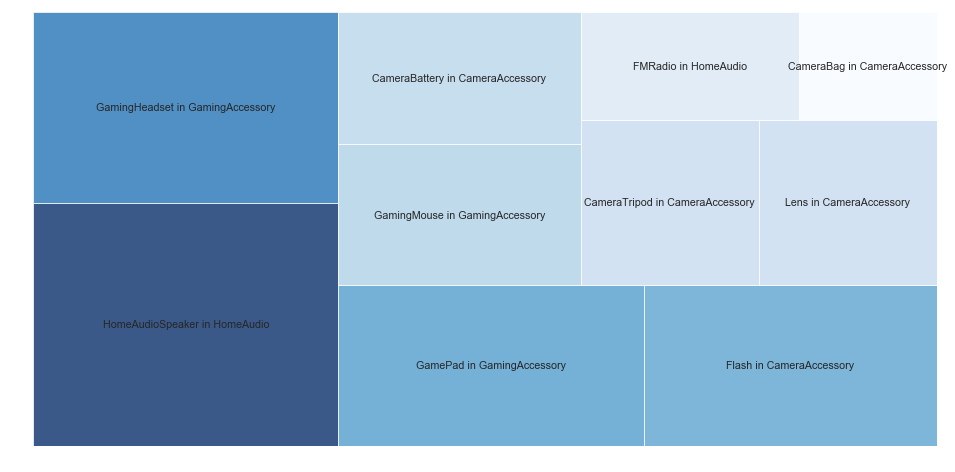

In [177]:
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(large_sales['units'])
 
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=large_sales['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

Most of the sales of homeaudio speakers followed by gamingheadset & gamepad in gaming accessories

##### Analyze Sales Amount and Revenue variation based on Discount%

In [178]:
# Segmenting the Discount% into various bins

def discount_binning(df,cut_points,label_names):
    column_index = df.columns.get_loc('Discount%') + 1
    df.insert(loc=column_index,column='Discount Bins',value=pd.cut(df['Discount%'],cut_points,labels=label_names, include_lowest=True))
    return df

cut_points = [0,10,20,30,40,50,60,70,80,90,100]
label_names = ["Below 10%","Between 10-20%","Between 20-30%","Between 30-40%","Between 40-50%","Between 50-60%", \
              "Between 60-70%","Between 70-80%","Between 80-90%","Between 90-100%"]

product_sub = discount_binning(Consumer_df,cut_points,label_names)
product_sub.head()
 

order_date  Year  Month Week   order_id     gmv  list_price  Discount%   Discount Bins  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  payday_flag  hld_flag     product_type  order_payment_type_Prepaid       Date  special_sales
0 2015-07-06 05:08:26  2015      7   28  167223837 5398.00     2699.00      39.96  Between 30-40%      2           0.00           0.00    2            GamingHardware               GamingAccessory                   GamePad      4495.00                        5            0         0  Premium_product                           0 2015-07-06              0
1 2015-07-06 08:15:22  2015      7   28  167234860 4340.00     4340.00      23.85  Between 20-30%      1           0.00           0.00    1            GamingHardware               GamingAccessory               GamingMouse      5699.00                        2            0         0  Premium_product                           1 2015-07-06              0
2 2015-07-06 09:00:55  2015      7   28  167241120  139.00      139.00      53.51  Between 50-60%      1           0.00           0.00    8            GamingHardware               GamingAccessory       TVOutCableAccessory       299.00                        4            0         0      mass_market                           1 2015-07-06              0
3 2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73  Between 30-40%      1           0.00           0.00    9           CameraAccessory               CameraAccessory                Binoculars      1500.00                        2            0         0      mass_market                           0 2015-07-07              0
4 2015-07-07 00:03:19  2015      7   28  167584146 4750.00     4750.00       4.98       Below 10%      1           0.00           0.00    6            GamingHardware               GamingAccessory          MotionController      4999.00                        2            0         0  Premium_product                           0 2015-07-07              0

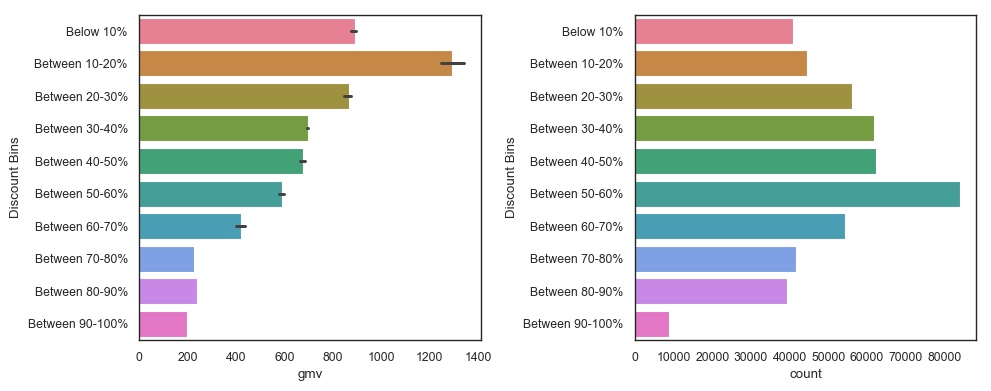

In [179]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x='gmv', y='Discount Bins', palette='husl', data=Consumer_df, estimator=np.median)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(y='Discount Bins', palette='husl', data=Consumer_df)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

* Median revenue is optimum if the average discount rate is between 10% and 20%. But beyond that, average revenue begins to decline slowly.
* On the other hand, sales show a steady rise with Discount percentage increase until it peaks at 50-60 percent after which it starts to decline again.

It shows that the revenue falls at a higher discount, even though the profits are strong, which means a loss to the company. An average 10-20 percent discount is the company's most profitable.

###### Percentage of items sold at different Discount% segments

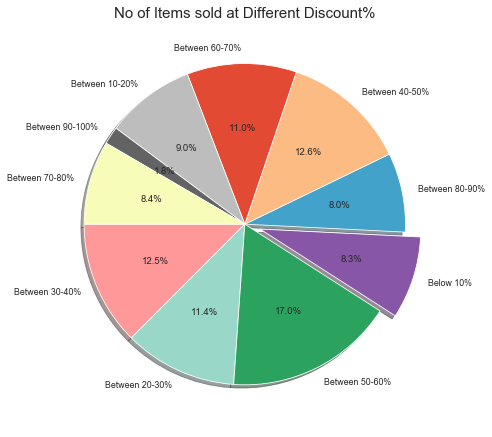

In [180]:
from collections import Counter

labels, values = zip(*Counter(Consumer_df["Discount Bins"]).items())
colors = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9"]
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6,6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=180,explode=(0,0,0,0.1,0,0,0,0,0,0),autopct="%1.1f%%", \
        shadow=True, colors=colors)
plt.tight_layout()
plt.title("No of Items sold at Different Discount%", fontsize=15)
plt.show()

The majority of sales occur when the discount percentage is between 50-60%.

##### Checking Outliers

In [181]:
Consumer_df.dtypes

order_date                       datetime64[ns]
Year                                     object
Month                                     int64
Week                                     object
order_id                                 object
gmv                                     float64
list_price                              float64
Discount%                               float64
Discount Bins                          category
units                                     int64
deliverybdays                           float64
deliverycdays                           float64
sla                                       int64
product_analytic_category                object
product_analytic_sub_category            object
product_analytic_vertical                object
product_mrp                             float64
product_procurement_sla                   int64
payday_flag                               int64
hld_flag                                  int64
product_type                            

In [182]:
# GMV
Consumer_df.gmv.describe() 

count   494255.00
mean      1262.78
std       2353.75
min         10.00
25%        295.00
50%        549.00
75%       1490.00
max     148050.00
Name: gmv, dtype: float64

GMV varies from 10 - 148050

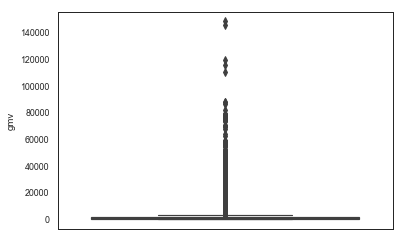

In [183]:
sns.boxplot(x='gmv', data = Consumer_df, orient = 'vertical')

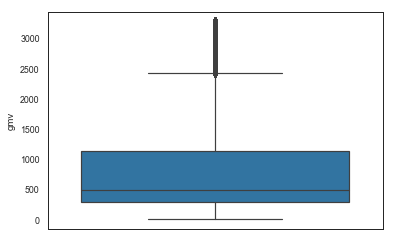

In [184]:
dummy = Consumer_df.copy()
q1 = dummy['gmv'].quantile(0.25)
q3 = dummy['gmv'].quantile(0.75)
iqr = q3 - q1
dummy = dummy[(dummy['gmv'] > q1 - 1.5*iqr) & (dummy['gmv'] < q3 + 1.5*iqr)]

sns.boxplot(x='gmv', data = dummy, orient = 'vertical')

In [185]:
quantile=[0,0.5,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
Consumer_df.gmv.quantile(quantile)

0.00       10.00
0.50      549.00
0.10      199.00
0.15      237.00
0.20      265.00
0.25      295.00
0.30      322.00
0.35      350.00
0.40      399.00
0.45      475.00
0.50      549.00
0.55      649.00
0.60      775.00
0.65      939.00
0.70     1150.00
0.75     1490.00
0.80     1849.00
0.85     2299.00
0.90     2750.00
0.95     4030.00
1.00   148050.00
Name: gmv, dtype: float64

50% Values below 645-Detected outliers

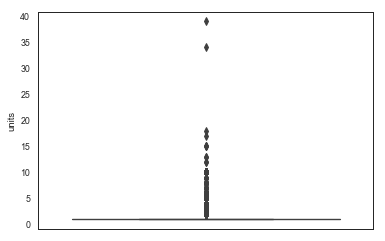

In [186]:
#Units
sns.boxplot(x='units', data = Consumer_df, orient = 'vertical')

In [187]:
Consumer_df['sla'].describe()

count   494255.00
mean         5.89
std          2.69
min          0.00
25%          4.00
50%          6.00
75%          7.00
max         30.00
Name: sla, dtype: float64

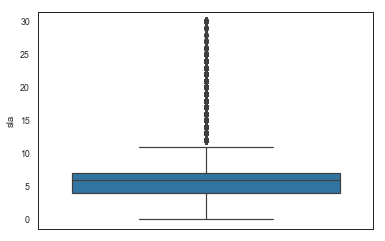

In [188]:
sns.boxplot(x='sla', data = Consumer_df, orient = 'vertical')

In [189]:

# Product MRP:
Consumer_df.product_mrp.describe()

count   494255.00
mean      2470.70
std       4654.30
min         79.00
25%        766.00
50%       1200.00
75%       2740.00
max     180000.00
Name: product_mrp, dtype: float64

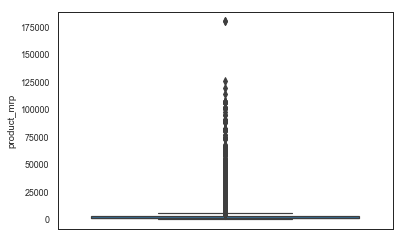

In [190]:
sns.boxplot(x='product_mrp', data =Consumer_df, orient = 'vertical')

In [191]:
Consumer_df.product_mrp.quantile(quantile)

0.00       79.00
0.50     1200.00
0.10      410.00
0.15      500.00
0.20      599.00
0.25      766.00
0.30      800.00
0.35      899.00
0.40      950.00
0.45     1000.00
0.50     1200.00
0.55     1399.00
0.60     1599.00
0.65     1990.00
0.70     1999.00
0.75     2740.00
0.80     3001.00
0.85     3999.00
0.90     5399.00
0.95     6990.00
1.00   180000.00
Name: product_mrp, dtype: float64

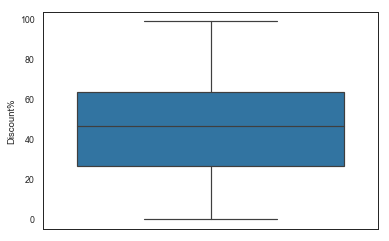

In [192]:
sns.boxplot(x='Discount%', data =Consumer_df, orient = 'vertical')

In [193]:
Consumer_df['Discount%'].quantile(quantile)

0.00    0.00
0.50   46.64
0.10   12.31
0.15   17.85
0.20   22.23
0.25   26.66
0.30   30.85
0.35   34.83
0.40   39.00
0.45   42.35
0.50   46.64
0.55   50.08
0.60   53.34
0.65   56.70
0.70   59.35
0.75   63.26
0.80   67.84
0.85   74.15
0.90   79.87
0.95   85.93
1.00   98.60
Name: Discount%, dtype: float64

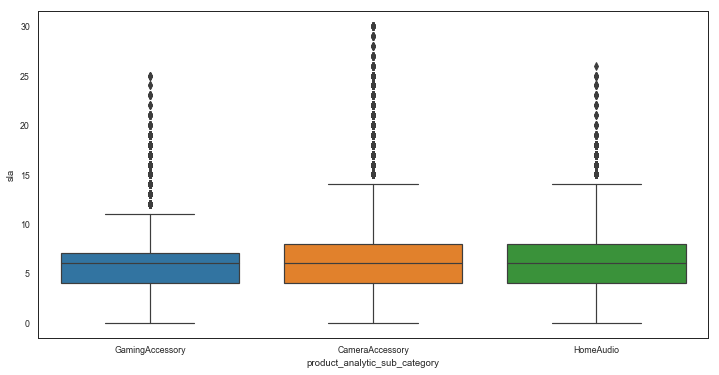

In [194]:
#SLA distribution of different sub-categories of products
plt.figure(figsize = (12,6))
b1 = sns.boxplot(data=Consumer_df, x = 'product_analytic_sub_category', y = 'sla')

In [195]:
Consumer_df.sla.mean()

5.892088092179138

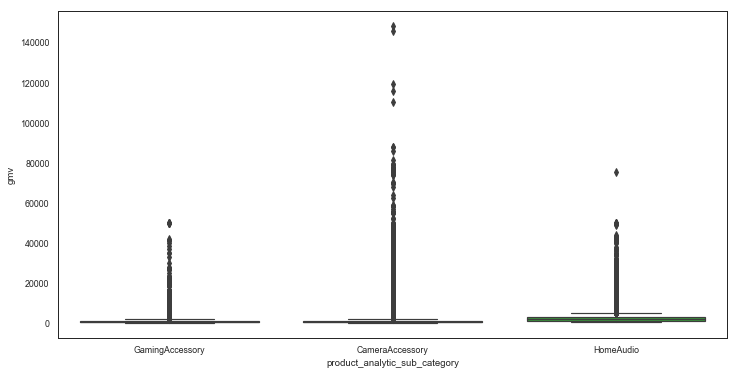

In [196]:
# GMV Distribution for product category
plt.figure(figsize = (12,6))
b2 = sns.boxplot(data=Consumer_df,x ='product_analytic_sub_category', y='gmv')

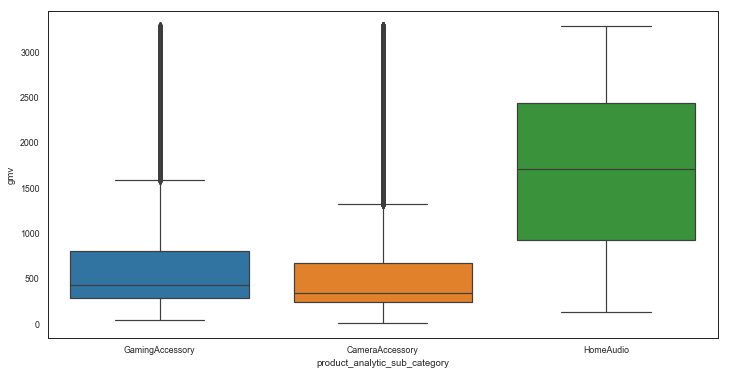

In [197]:
# GMV Distribution for product category
plt.figure(figsize = (12,6))
b2 = sns.boxplot(data=dummy,x ='product_analytic_sub_category', y='gmv')

Mean GMV values remained the same for all three sub-categories. We see a lot of outliers in the category CameraAccessory

In [198]:

C1 = Consumer_df[Consumer_df['product_analytic_sub_category'] == "CameraAccessory"].groupby('Week',as_index=False)[['Discount%']].mean()
C1['product_analytic_subtype'] = "CameraAccessory"
C1

Week  Discount% product_analytic_subtype
0    01      49.74          CameraAccessory
1    02      49.00          CameraAccessory
2    03      48.26          CameraAccessory
3    04      44.09          CameraAccessory
4    05      51.69          CameraAccessory
5    06      46.17          CameraAccessory
6    07      47.82          CameraAccessory
7    08      53.45          CameraAccessory
8    09      48.54          CameraAccessory
9    10      50.47          CameraAccessory
10   11      53.67          CameraAccessory
11   12      49.72          CameraAccessory
12   13      50.51          CameraAccessory
13   14      53.45          CameraAccessory
14   15      52.96          CameraAccessory
15   16      53.64          CameraAccessory
16   17      54.50          CameraAccessory
17   18      57.36          CameraAccessory
18   19      56.51          CameraAccessory
19   20      54.26          CameraAccessory
20   21      54.53          CameraAccessory
21   22      55.59          CameraAccessory
22   23      57.05          CameraAccessory
23   24      53.23          CameraAccessory
24   25      48.85          CameraAccessory
25   26      49.56          CameraAccessory
26   28      43.93          CameraAccessory
27   29      44.31          CameraAccessory
28   30      43.64          CameraAccessory
29   31      43.01          CameraAccessory
30   32      12.95          CameraAccessory
31   36      45.30          CameraAccessory
32   37      47.53          CameraAccessory
33   38      45.28          CameraAccessory
34   39      49.12          CameraAccessory
35   40      58.45          CameraAccessory
36   41      46.50          CameraAccessory
37   42      53.37          CameraAccessory
38   43      45.07          CameraAccessory
39   44      46.88          CameraAccessory
40   45      48.66          CameraAccessory
41   46      46.68          CameraAccessory
42   47      46.27          CameraAccessory
43   48      42.88          CameraAccessory
44   49      45.05          CameraAccessory
45   50      48.71          CameraAccessory
46   51      43.30          CameraAccessory
47   52      47.91          CameraAccessory
48   53      44.97          CameraAccessory

In [199]:
C2 = Consumer_df[Consumer_df['product_analytic_sub_category'] == "GamingAccessory"].groupby('Week',as_index=False)[['Discount%']].mean()
C2['product_analytic_subtype'] = "GamingAccessory"
C2

Week  Discount% product_analytic_subtype
0    01      47.10          GamingAccessory
1    02      44.62          GamingAccessory
2    03      45.51          GamingAccessory
3    04      43.66          GamingAccessory
4    05      44.51          GamingAccessory
5    06      47.10          GamingAccessory
6    07      50.14          GamingAccessory
7    08      49.69          GamingAccessory
8    09      47.82          GamingAccessory
9    10      47.10          GamingAccessory
10   11      40.74          GamingAccessory
11   12      40.93          GamingAccessory
12   13      41.21          GamingAccessory
13   14      40.66          GamingAccessory
14   15      43.09          GamingAccessory
15   16      44.61          GamingAccessory
16   17      45.52          GamingAccessory
17   18      45.61          GamingAccessory
18   19      49.60          GamingAccessory
19   20      50.49          GamingAccessory
20   21      47.75          GamingAccessory
21   22      44.86          GamingAccessory
22   23      44.87          GamingAccessory
23   24      44.54          GamingAccessory
24   25      42.28          GamingAccessory
25   26      41.21          GamingAccessory
26   28      40.14          GamingAccessory
27   29      42.56          GamingAccessory
28   30      37.12          GamingAccessory
29   31      42.88          GamingAccessory
30   32      62.94          GamingAccessory
31   33      38.60          GamingAccessory
32   34      50.37          GamingAccessory
33   35      41.89          GamingAccessory
34   36      38.83          GamingAccessory
35   37      38.96          GamingAccessory
36   38      38.92          GamingAccessory
37   39      40.21          GamingAccessory
38   40      39.02          GamingAccessory
39   41      37.03          GamingAccessory
40   42      52.73          GamingAccessory
41   43      39.57          GamingAccessory
42   44      44.07          GamingAccessory
43   45      45.53          GamingAccessory
44   46      41.87          GamingAccessory
45   47      41.63          GamingAccessory
46   48      44.45          GamingAccessory
47   49      41.31          GamingAccessory
48   50      44.56          GamingAccessory
49   51      45.68          GamingAccessory
50   52      51.63          GamingAccessory
51   53      47.59          GamingAccessory

In [200]:
C3 = Consumer_df[Consumer_df['product_analytic_sub_category'] == "HomeAudio"].groupby('Week',as_index=False)[['Discount%']].mean()
C3['product_analytic_subtype'] = "HomeAudio"
C3

Week  Discount% product_analytic_subtype
0    01      44.57                HomeAudio
1    02      39.07                HomeAudio
2    03      39.92                HomeAudio
3    04      37.74                HomeAudio
4    05      42.53                HomeAudio
5    06      38.39                HomeAudio
6    07      42.05                HomeAudio
7    08      36.60                HomeAudio
8    09      34.31                HomeAudio
9    10      40.11                HomeAudio
10   11      36.09                HomeAudio
11   12      34.56                HomeAudio
12   13      35.00                HomeAudio
13   14      33.50                HomeAudio
14   15      34.72                HomeAudio
15   16      33.62                HomeAudio
16   17      36.50                HomeAudio
17   18      36.33                HomeAudio
18   19      35.19                HomeAudio
19   20      34.00                HomeAudio
20   21      36.96                HomeAudio
21   22      33.30                HomeAudio
22   23      30.96                HomeAudio
23   24      29.74                HomeAudio
24   25      31.20                HomeAudio
25   26      30.89                HomeAudio
26   28      31.47                HomeAudio
27   29      32.92                HomeAudio
28   30      32.32                HomeAudio
29   31      32.22                HomeAudio
30   32      16.13                HomeAudio
31   36      37.33                HomeAudio
32   37      36.07                HomeAudio
33   38      35.34                HomeAudio
34   39      34.33                HomeAudio
35   40      33.70                HomeAudio
36   41      34.07                HomeAudio
37   42      41.82                HomeAudio
38   43      35.57                HomeAudio
39   44      35.29                HomeAudio
40   45      43.29                HomeAudio
41   46      36.44                HomeAudio
42   47      35.56                HomeAudio
43   48      33.49                HomeAudio
44   49      39.21                HomeAudio
45   50      46.05                HomeAudio
46   51      38.94                HomeAudio
47   52      41.23                HomeAudio
48   53      35.14                HomeAudio

In [201]:
# Compare  mean gmv for normal days vs days on which there are holiday promotions
Consumer_df.groupby('special_sales',as_index=False)[['gmv']].mean()

special_sales     gmv
0              0 1249.85
1              1 1319.42

### Outliear treatment  

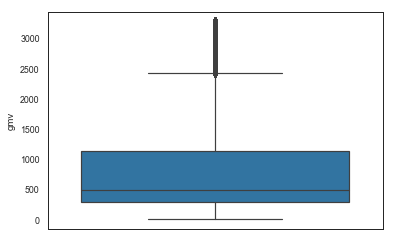

In [202]:
#outliear treatment for gmv values
q1 = Consumer_df['gmv'].quantile(0.25)
q3 = Consumer_df['gmv'].quantile(0.75)
iqr = q3 - q1
Consumer_df =Consumer_df[(Consumer_df['gmv'] > q1 - 1.5*iqr) & (Consumer_df['gmv'] < q3 + 1.5*iqr)]

sns.boxplot(x='gmv', data = Consumer_df, orient = 'vertical')

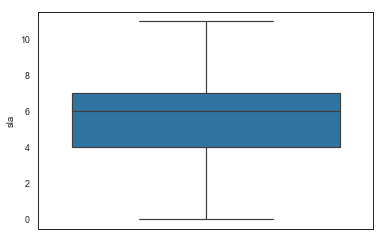

In [203]:
#outliear treatment for sla values
q1 = Consumer_df['sla'].quantile(0.25)
q3 = Consumer_df['sla'].quantile(0.75)
iqr = q3 - q1
Consumer_df= Consumer_df[(Consumer_df['sla'] > q1 - 1.5*iqr) & (Consumer_df['sla'] < q3 + 1.5*iqr)]

sns.boxplot(x='sla', data = Consumer_df, orient = 'vertical')

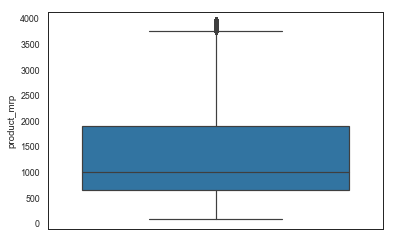

In [204]:
# product_mrp values
q1 = Consumer_df['product_mrp'].quantile(0.25)
q3 = Consumer_df['product_mrp'].quantile(0.75)
iqr = q3 - q1
Consumer_df = Consumer_df[(Consumer_df['product_mrp'] > q1 - 1.5*iqr) & (Consumer_df['product_mrp'] < q3 + 1.5*iqr)]

sns.boxplot(x='product_mrp', data = Consumer_df, orient = 'vertical')

In [205]:
numeric_column = Consumer_df.select_dtypes(exclude = ['object', 'datetime64[ns]']).columns
numeric_column

Index(['Month', 'gmv', 'list_price', 'Discount%', 'Discount Bins', 'units', 'deliverybdays', 'deliverycdays', 'sla', 'product_mrp', 'product_procurement_sla', 'payday_flag', 'hld_flag', 'order_payment_type_Prepaid', 'special_sales'], dtype='object')

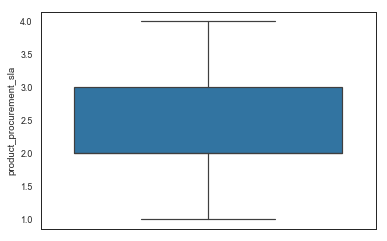

In [206]:
# product_procurement_sla value outlier treatment
q1 = Consumer_df['product_procurement_sla'].quantile(0.25)
q3 = Consumer_df['product_procurement_sla'].quantile(0.75)
iqr = q3 - q1
Consumer_df = Consumer_df[(Consumer_df['product_procurement_sla'] > q1 - 1.5*iqr) & (Consumer_df['product_procurement_sla'] < q3 + 1.5*iqr)]

sns.boxplot(x='product_procurement_sla', data = Consumer_df, orient = 'vertical')

## Climate Data

In [207]:
clim_data_2015 = pd.read_csv('ONTARIO-2015.csv', skiprows=24)

In [208]:
clim_data_2015.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag
0  2015-01-01  2015      1    1            †           0.00           NaN          -8.50           NaN           -4.30            NaN               22.30                NaN                0.00                NaN             0.00             NaN             0.00             NaN               0.00               NaN               0.00               NaN                        nan                   nan                     nan                   nan
1  2015-01-02  2015      1    2            †           3.00           NaN          -3.00           NaN            0.00            NaN               18.00                NaN                0.00                NaN             0.00             NaN             0.00             NaN               0.00               NaN               0.00               NaN                        nan                   nan                     nan                   nan
2  2015-01-03  2015      1    3            †           2.50           NaN          -4.00           NaN           -0.80            NaN               18.80                NaN                0.00                NaN            24.00             NaN             0.00             NaN              24.00               NaN               0.00               NaN                        nan                   nan                     nan                   nan
3  2015-01-04  2015      1    4            †           2.50           NaN           0.00           NaN            1.30            NaN               16.70                NaN                0.00                NaN             0.00             NaN             1.00             NaN               1.00               NaN               0.00               NaN                        nan                   nan                     nan                   nan
4  2015-01-05  2015      1    5            †         -10.00           NaN         -13.50           NaN          -11.80            NaN               29.80                NaN                0.00                NaN             0.00             NaN             3.00             NaN               3.00               NaN               1.00               NaN                        nan                   nan                     nan                   nan

In [209]:
clim_data_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], dtype='object')

In [210]:
# Dropping the columns with all nulls

clim_data_2015.dropna(axis=1, thresh=1, inplace=True)

clim_data_2015.reset_index(drop=True, inplace=True)

clim_data_2015.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag
0  2015-01-01  2015      1    1            †           0.00           NaN          -8.50           NaN           -4.30            NaN               22.30                NaN                0.00                NaN             0.00             NaN             0.00             NaN               0.00               NaN               0.00               NaN
1  2015-01-02  2015      1    2            †           3.00           NaN          -3.00           NaN            0.00            NaN               18.00                NaN                0.00                NaN             0.00             NaN             0.00             NaN               0.00               NaN               0.00               NaN
2  2015-01-03  2015      1    3            †           2.50           NaN          -4.00           NaN           -0.80            NaN               18.80                NaN                0.00                NaN            24.00             NaN             0.00             NaN              24.00               NaN               0.00               NaN
3  2015-01-04  2015      1    4            †           2.50           NaN           0.00           NaN            1.30            NaN               16.70                NaN                0.00                NaN             0.00             NaN             1.00             NaN               1.00               NaN               0.00               NaN
4  2015-01-05  2015      1    5            †         -10.00           NaN         -13.50           NaN          -11.80            NaN               29.80                NaN                0.00                NaN             0.00             NaN             3.00             NaN               3.00               NaN               1.00               NaN

In [211]:
clim_data_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag'], dtype='object')

In [212]:

drop_cols = []

for col in clim_data_2015.columns:
    if 'Flag' in col:
        print(clim_data_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

clim_data_2015.drop(drop_cols, axis=1, inplace=True)

print(clim_data_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')


In [213]:

# Formatting column names

clim_data_2015.columns = [col.replace(' (°C)','').strip() for col in clim_data_2015.columns]

clim_data_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')

In [214]:

clim_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
Date/Time            365 non-null object
Year                 365 non-null int64
Month                365 non-null int64
Day                  365 non-null int64
Max Temp             216 non-null float64
Min Temp             190 non-null float64
Mean Temp            190 non-null float64
Heat Deg Days        190 non-null float64
Cool Deg Days        190 non-null float64
Total Rain (mm)      229 non-null float64
Total Snow (cm)      229 non-null float64
Total Precip (mm)    229 non-null float64
Snow on Grnd (cm)    229 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 37.1+ KB


In [215]:
# Dropping rows where all the columns have nulls

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

clim_data_2015.dropna(subset=cols, inplace=True)

clim_data_2015.reset_index(drop=True, inplace=True)

clim_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
Date/Time            190 non-null object
Year                 190 non-null int64
Month                190 non-null int64
Day                  190 non-null int64
Max Temp             190 non-null float64
Min Temp             190 non-null float64
Mean Temp            190 non-null float64
Heat Deg Days        190 non-null float64
Cool Deg Days        190 non-null float64
Total Rain (mm)      190 non-null float64
Total Snow (cm)      190 non-null float64
Total Precip (mm)    190 non-null float64
Snow on Grnd (cm)    190 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 19.4+ KB


In [216]:
# Extract week from the date field 

clim_data_2015['Week'] = clim_data_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

clim_data_2015['Week'] = clim_data_2015['Week'].apply(lambda x: str(x).lstrip('0'))

clim_data_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm) Week
0  2015-01-01  2015      1    1      0.00     -8.50      -4.30          22.30           0.00             0.00             0.00               0.00               0.00    1
1  2015-01-02  2015      1    2      3.00     -3.00       0.00          18.00           0.00             0.00             0.00               0.00               0.00    1
2  2015-01-03  2015      1    3      2.50     -4.00      -0.80          18.80           0.00            24.00             0.00              24.00               0.00    1
3  2015-01-04  2015      1    4      2.50      0.00       1.30          16.70           0.00             0.00             1.00               1.00               0.00    1
4  2015-01-05  2015      1    5    -10.00    -13.50     -11.80          29.80           0.00             0.00             3.00               3.00               1.00    2

In [217]:
# Extracting data from July to Dec month

clim_data_2015 = clim_data_2015[clim_data_2015['Month'] >= 7]
clim_data_2015.reset_index(drop=True, inplace=True)

clim_data_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm) Week
0  2015-07-01  2015      7    1     24.50     17.00      20.80           0.00           2.80             0.00             0.00               0.00               0.00   27
1  2015-07-02  2015      7    2     24.00     14.00      19.00           0.00           1.00             0.00             0.00               0.00               0.00   27
2  2015-07-03  2015      7    3     25.00     10.00      17.50           0.50           0.00             0.00             0.00               0.00               0.00   27
3  2015-07-04  2015      7    4     26.00     11.00      18.50           0.00           0.50             0.00             0.00               0.00               0.00   27
4  2015-07-05  2015      7    5     28.00     14.00      21.00           0.00           3.00             0.00             0.00               0.00               0.00   27

In [218]:
clim_data_2015.sort_values(by=['Week'], ascending = True, inplace = True)

In [219]:
# week data
clim_data_2015 = clim_data_2015.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

clim_data_2015.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)
0   27     28.00     10.00      19.36           0.10           1.46             0.00             0.00               0.00               0.00
1   28     28.00     12.50      20.10           0.28           2.38             4.42             0.00               4.42               0.00
2   29     33.00     11.00      23.18           0.00           5.18             1.40             0.00               1.40               0.00
3   30     31.50     14.50      23.06           0.00           5.06             1.08             0.00               1.08               0.00
4   31     33.50     16.00      24.57           0.00           6.57             4.63             0.00               4.63               0.00

In [220]:
# Drop 27th week data -belonging to June 2015

clim_data_2015.drop(clim_data_2015[clim_data_2015['Week'] == '27'].index, inplace = True)

In [221]:

clim_data_2015.duplicated().any()

False

### Climate 2016

In [222]:
clim_2016 = pd.read_csv('ONTARIO-2016.csv', skiprows=24)

In [223]:
clim_2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag
0  2016-01-01  2016      1    1          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN                        nan                   nan                     nan                   nan
1  2016-01-02  2016      1    2          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN                        nan                   nan                     nan                   nan
2  2016-01-03  2016      1    3          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN                        nan                   nan                     nan                   nan
3  2016-01-04  2016      1    4          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN                        nan                   nan                     nan                   nan
4  2016-01-05  2016      1    5          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN                        nan                   nan                     nan                   nan

In [224]:
clim_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], dtype='object')

In [225]:
# Dropping the columns with all nulls

clim_2016.dropna(axis=1, thresh=1, inplace=True)

clim_2016.reset_index(drop=True, inplace=True)

clim_2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag
0  2016-01-01  2016      1    1          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN
1  2016-01-02  2016      1    2          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN
2  2016-01-03  2016      1    3          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN
3  2016-01-04  2016      1    4          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN
4  2016-01-05  2016      1    5          NaN            nan           NaN            nan           NaN             nan            NaN                 nan                NaN                 nan                NaN              nan             NaN              nan             NaN                nan               NaN                nan               NaN

In [226]:
clim_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag'], dtype='object')

In [227]:
# Dropping columns with only one distinct value

drop_cols = []

for col in clim_2016.columns:
    if 'Flag' in col:
        print(clim_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

clim_2016.drop(drop_cols, axis=1, inplace=True)

print(clim_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')


In [228]:
# Formatting column names

clim_2016.columns = [col.replace(' (°C)','').strip() for col in clim_2016.columns]
clim_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')

In [229]:
clim_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
Date/Time            366 non-null object
Year                 366 non-null int64
Month                366 non-null int64
Day                  366 non-null int64
Max Temp             226 non-null float64
Min Temp             219 non-null float64
Mean Temp            219 non-null float64
Heat Deg Days        219 non-null float64
Cool Deg Days        219 non-null float64
Total Rain (mm)      227 non-null float64
Total Snow (cm)      227 non-null float64
Total Precip (mm)    227 non-null float64
Snow on Grnd (cm)    227 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 37.2+ KB


In [230]:
# Dropping rows where all the columns have nulls

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

clim_2016.dropna(subset=cols, inplace=True)

clim_2016.reset_index(drop=True, inplace=True)

clim_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
Date/Time            219 non-null object
Year                 219 non-null int64
Month                219 non-null int64
Day                  219 non-null int64
Max Temp             219 non-null float64
Min Temp             219 non-null float64
Mean Temp            219 non-null float64
Heat Deg Days        219 non-null float64
Cool Deg Days        219 non-null float64
Total Rain (mm)      219 non-null float64
Total Snow (cm)      219 non-null float64
Total Precip (mm)    219 non-null float64
Snow on Grnd (cm)    219 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 22.3+ KB


In [231]:
# Extract week from date field  
clim_2016['Week'] = clim_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

clim_2016['Week'] = clim_2016['Week'].apply(lambda x: str(x).lstrip('0'))

clim_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm) Week
0  2016-01-08  2016      1    8      7.00    -14.00      -3.50          21.50           0.00             9.00             0.00               9.00               0.00    1
1  2016-01-09  2016      1    9     11.00      3.00       7.00          11.00           0.00            14.60             0.00              14.60               0.00    1
2  2016-01-10  2016      1   10     -1.50     -5.00      -3.30          21.30           0.00             0.00             7.00               7.00               0.00    1
3  2016-01-12  2016      1   12     -5.00    -12.00      -8.50          26.50           0.00             0.00             0.00               0.00              12.00    2
4  2016-01-14  2016      1   14      2.50    -10.50      -4.00          22.00           0.00             0.00             0.00               0.00              11.00    2

In [232]:
# Extract Jan to June month data
clim_2016 = clim_2016[clim_2016['Month'] <= 6]
clim_2016.reset_index(drop=True, inplace=True)

clim_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm) Week
0  2016-01-08  2016      1    8      7.00    -14.00      -3.50          21.50           0.00             9.00             0.00               9.00               0.00    1
1  2016-01-09  2016      1    9     11.00      3.00       7.00          11.00           0.00            14.60             0.00              14.60               0.00    1
2  2016-01-10  2016      1   10     -1.50     -5.00      -3.30          21.30           0.00             0.00             7.00               7.00               0.00    1
3  2016-01-12  2016      1   12     -5.00    -12.00      -8.50          26.50           0.00             0.00             0.00               0.00              12.00    2
4  2016-01-14  2016      1   14      2.50    -10.50      -4.00          22.00           0.00             0.00             0.00               0.00              11.00    2

In [233]:
clim_2016.sort_values(by=['Week'], ascending = True, inplace = True)

In [234]:
# Get week data

clim_2016 = clim_2016.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

clim_2016.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)
0    1     11.00    -14.00       0.07          17.93           0.00             7.87             2.33              10.20               0.00
1   10     20.00     -2.00      10.17           7.83           0.00             9.00             0.00               9.00               0.00
2   11     16.00     -2.50       8.90           9.10           0.00             0.50             0.00               0.50               0.00
3   12     20.50     -3.50       5.72          12.28           0.00            12.80             0.00              12.80               0.00
4   13     16.00     -5.00       6.87          11.13           0.00             2.83             0.54               3.37               0.00

In [235]:
clim_2016.duplicated().any()

False

### Merging 2015 and 2016 Climate data

In [236]:
clm_merge_df = pd.concat([clim_data_2015, clim_2016], axis = 0)

In [237]:
clm_merge_df.shape

(51, 10)

In [238]:
clm_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 24
Data columns (total 10 columns):
Week                 51 non-null object
Max Temp             51 non-null float64
Min Temp             51 non-null float64
Mean Temp            51 non-null float64
Heat Deg Days        51 non-null float64
Cool Deg Days        51 non-null float64
Total Rain (mm)      51 non-null float64
Total Snow (cm)      51 non-null float64
Total Precip (mm)    51 non-null float64
Snow on Grnd (cm)    51 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.4+ KB


In [239]:
clm_merge_df.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)
1   28     28.00     12.50      20.10           0.28           2.38             4.42             0.00               4.42               0.00
2   29     33.00     11.00      23.18           0.00           5.18             1.40             0.00               1.40               0.00
3   30     31.50     14.50      23.06           0.00           5.06             1.08             0.00               1.08               0.00
4   31     33.50     16.00      24.57           0.00           6.57             4.63             0.00               4.63               0.00
5   32     28.50     15.00      21.65           0.00           3.65             0.35             0.00               0.35               0.00

In [240]:
clm_merge_df.Week.unique()

array(['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '1', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25',
       '26', '4', '5', '6', '7', '8', '9'], dtype=object)

### Creating three separate dataframes for 3 product subcategories - camera accessory, home audio and gaming accessory

In [241]:
Camera_accessory_df = Consumer_df[Consumer_df.product_analytic_sub_category == "CameraAccessory"]
gaming_accessory_df = Consumer_df[Consumer_df.product_analytic_sub_category == "GamingAccessory"]
Home_audio_df = Consumer_df[Consumer_df.product_analytic_sub_category == "HomeAudio"]

print('No of rows in cameraaccessory_df: {}'.format(Camera_accessory_df.shape[0]))
print('No of rows in gamingaccessory_df: {}'.format(gaming_accessory_df.shape[0]))
print('No of rows in homeaudio_df: {}'.format(Home_audio_df.shape[0]))
 

No of rows in cameraaccessory_df: 152180
No of rows in gamingaccessory_df: 135554
No of rows in homeaudio_df: 48745


#### Categorical variable(product_analytic_vertical) with multiple levels, creating dummy features (one-hot encoded)

In [242]:
# Creating dummy variables for the remaining categorical variable
dummy1 = pd.get_dummies(Camera_accessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy2 = pd.get_dummies(gaming_accessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy3 = pd.get_dummies(Home_audio_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

# Adding the results to the original dataframes
Camera_accessory_df = pd.concat([Camera_accessory_df, dummy1], axis=1)
gaming_accessory_df = pd.concat([gaming_accessory_df, dummy2], axis=1)
Home_audio_df= pd.concat([Home_audio_df, dummy3], axis=1)

###### Drop the repeated variable

In [243]:
# removing columns
Camera_accessory_df = Camera_accessory_df.drop('product_analytic_vertical', axis=1)
gaming_accessory_df = gaming_accessory_df.drop('product_analytic_vertical', axis=1)
Home_audio_df = Home_audio_df.drop('product_analytic_vertical', axis=1)

print('Shape of cameraaccessory_df: {}'.format(Camera_accessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of homeaudio_df: {}'.format(Home_audio_df.shape))
 

Shape of cameraaccessory_df: (152180, 44)
Shape of gamingaccessory_df: (135554, 37)
Shape of homeaudio_df: (48745, 30)


###### Checking the no of unique values in the columns of the 3 new dataframes

In [244]:
# Unique value frequencies
unique_values = pd.DataFrame(Camera_accessory_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(Camera_accessory_df.dtypes)
unique_values.head()

Unique Value Count   dtype
product_analytic_sub_category                   1  object
product_analytic_category                       1  object
product_vertical_Telescope                      2   uint8
product_vertical_Strap                          2   uint8
special_sales                                   2   int32

In [245]:
# Unique value frequencies
unique_values = pd.DataFrame(gaming_accessory_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(gaming_accessory_df.dtypes)
unique_values.head()

Unique Value Count   dtype
product_analytic_sub_category                       1  object
product_analytic_category                           1  object
hld_flag                                            2   int64
special_sales                                       2   int32
product_vertical_GameControlMount                   2   uint8

In [246]:
# Unique value frequencies
unique_values = pd.DataFrame(Home_audio_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(Home_audio_df.dtypes)
unique_values.head()

Unique Value Count   dtype
product_analytic_sub_category                       1  object
product_analytic_category                           1  object
product_vertical_HomeAudioSpeaker                   2   uint8
product_vertical_HiFiSystem                         2   uint8
product_vertical_FMRadio                            2   uint8

Thus we see that in all 3 dataframes, columns 'product_analytic_category' & 'product_analytic_sub_category' have only 1 unique value. Hence we will drop these 2 columns from the 3 dataframes.

##### Checking null values exist in the 3 new dataframes

In [247]:
print('Null values in cameraaccessory_df: {}'.format(Camera_accessory_df.isnull().values.any()))
print('Null values in gamingaccessory_df: {}'.format(gaming_accessory_df.isnull().values.any()))
print('Null values in homeaudio_df: {}'.format(Home_audio_df.isnull().values.any()))

Null values in cameraaccessory_df: False
Null values in gamingaccessory_df: False
Null values in homeaudio_df: False


In [248]:
Camera_accessory_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%   Discount Bins  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category  product_mrp  product_procurement_sla  payday_flag  hld_flag product_type  order_payment_type_Prepaid       Date  special_sales  product_vertical_CameraAccessory  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope
3  2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73  Between 30-40%      1           0.00           0.00    9           CameraAccessory               CameraAccessory      1500.00                        2            0         0  mass_market                           0 2015-07-07              0                                 0                           0                               0                                      0                                   0                              0                                 0                               0                                  0                             0                                     0                              0                               0                        0                       0                                  0                      0                                   0                         0                       0                           0
5  2015-07-07 00:06:12  2015      7   28  167585915  985.00      985.00      50.50  Between 50-60%      1           0.00           0.00    8           CameraAccessory               CameraAccessory      1990.00                        1            0         0  mass_market                           0 2015-07-07              0                                 0                           0                               1                                      0                                   0                              0                                 0                               0                                  0                             0                                     0                              0                               0                        0                       0                                  0                      0                                   0                         0                       0                           0
10 2015-07-07 00:15:53  2015      7   28  167588327  388.00      388.00      61.16  Between 60-70%      1           0.00           0.00    9           CameraAccessory               CameraAccessory       999.00                        3            0         0  mass_market                           0 2015-07-07              0                                 0                           1                               0                                      0                                   0                              0                                 0                               0                                  0                             0                                     0                              0                               0                        0                       0                                  0                      0                                   0                         0                       0                           0
13 2015-07-07 00:23:11  2015      7   28  167582094  799.00      799.00      46.73  Between 40-50%  

###### Converting some binary variables to numeric format

In [249]:
Camera_accessory_df['is_mass_market'] = Camera_accessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
gaming_accessory_df['is_mass_market'] = gaming_accessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
Home_audio_df['is_mass_market'] = Home_audio_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)

 

In [250]:
Camera_accessory_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%   Discount Bins  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category  product_mrp  product_procurement_sla  payday_flag  hld_flag product_type  order_payment_type_Prepaid       Date  special_sales  product_vertical_CameraAccessory  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  is_mass_market
3  2015-07-07 00:02:01  2015      7   28  167584636  949.00      949.00      36.73  Between 30-40%      1           0.00           0.00    9           CameraAccessory               CameraAccessory      1500.00                        2            0         0  mass_market                           0 2015-07-07              0                                 0                           0                               0                                      0                                   0                              0                                 0                               0                                  0                             0                                     0                              0                               0                        0                       0                                  0                      0                                   0                         0                       0                           0               1
5  2015-07-07 00:06:12  2015      7   28  167585915  985.00      985.00      50.50  Between 50-60%      1           0.00           0.00    8           CameraAccessory               CameraAccessory      1990.00                        1            0         0  mass_market                           0 2015-07-07              0                                 0                           0                               1                                      0                                   0                              0                                 0                               0                                  0                             0                                     0                              0                               0                        0                       0                                  0                      0                                   0                         0                       0                           0               1
10 2015-07-07 00:15:53  2015      7   28  167588327  388.00      388.00      61.16  Between 60-70%      1           0.00           0.00    9           CameraAccessory               CameraAccessory       999.00                        3            0         0  mass_market                           0 2015-07-07              0                                 0                           1                               0                                      0                                   0                              0                                 0                               0                                  0                             0                                     0                              0                               0                        0                       0                                  0                      0                                   0                         0                       0                           0               1
13 2015-07-07 00:23:11  2015      7 

### Week level data

In [251]:
Camera_accessory_df = Camera_accessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': "mean", \
                                          'deliverycdays':'mean','sla':'mean', 'product_procurement_sla':'mean', \
                                          'payday_flag':'sum','product_mrp':"mean",'order_payment_type_Prepaid':"sum" , 'is_mass_market':'sum', \
                                          'product_vertical_CameraAccessory':'sum', 'hld_flag': "sum", 'special_sales': 'sum', \
                                          'product_vertical_CameraBag':'sum', 'product_vertical_CameraBattery':'sum', \
                                          'product_vertical_CameraBatteryCharger':'sum', 'product_vertical_CameraBatteryGrip': \
                                          'sum','product_vertical_CameraEyeCup':'sum','product_vertical_CameraFilmRolls':'sum', \
                                          'product_vertical_CameraHousing':'sum', \
                                          'product_vertical_CameraMicrophone':'sum','product_vertical_CameraMount':'sum', \
                                          'product_vertical_CameraRemoteControl':'sum', 'product_vertical_CameraTripod':'sum', \
                                          'product_vertical_ExtensionTube':'sum', 'product_vertical_Filter':'sum', \
                                          'product_vertical_Flash':'sum','product_vertical_FlashShoeAdapter':'sum', \
                                          'product_vertical_Lens':'sum','product_vertical_ReflectorUmbrella':'sum', \
                                          'product_vertical_Softbox':'sum','product_vertical_Strap':'sum', \
                                          'product_vertical_Telescope':'sum'}) \
.reset_index(drop=False)
Camera_accessory_df.shape

(49, 34)

In [252]:
gaming_accessory_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%   Discount Bins  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category  product_mrp  product_procurement_sla  payday_flag  hld_flag product_type  order_payment_type_Prepaid       Date  special_sales  product_vertical_GameControlMount  product_vertical_GamePad  product_vertical_GamingAccessoryKit  product_vertical_GamingAdapter  product_vertical_GamingChargingStation  product_vertical_GamingHeadset  product_vertical_GamingKeyboard  product_vertical_GamingMemoryCard  product_vertical_GamingMouse  product_vertical_GamingMousePad  product_vertical_GamingSpeaker  product_vertical_JoystickGamingWheel  product_vertical_MotionController  product_vertical_TVOutCableAccessory  is_mass_market
2  2015-07-06 09:00:55  2015      7   28  167241120  139.00      139.00      53.51  Between 50-60%      1           0.00           0.00    8            GamingHardware               GamingAccessory       299.00                        4            0         0  mass_market                           1 2015-07-06              0                                  0                         0                                    0                               0                                       0                               0                                0                                  0                             0                                0                               0                                     0                                  0                                     1               1
9  2015-07-07 00:13:12  2015      7   28  167588031  289.00      289.00      42.08  Between 40-50%      1           0.00           0.00    4            GamingHardware               GamingAccessory       499.00                        2            0         0  mass_market                           0 2015-07-07              0                                  0                         1                                    0                               0                                       0                               0                                0                                  0                             0                                0                               0                                     0                                  0                                     0               1
11 2015-07-07 00:17:42  2015      7   28  167588334  351.00      351.00      41.40  Between 40-50%      1           0.00           0.00    9            GamingHardware               GamingAccessory       599.00                        1            0         0  mass_market                           0 2015-07-07              0                                  0                         1                                    0                               0                                       0                               0                                0                                  0                             0                                0                               0                                     0                                  0                                     0               1
14 2015-07-07 00:30:55  2015      7   28  167590413 1610.00     1610.00      19.50  Between 10-20%      1           0.00           0.00    4            GamingHardware               GamingAccessory      2000.00                        3            0         0  mass_market                           1 2015-07-07              0                                  0                         0                                    0                               0                                       0                               1                                0                                  0                             0                                0                               0                                     0                 

In [253]:
gaming_accessory_df=gaming_accessory_df.groupby(['Week']).agg({'gmv':"sum", 'Discount%':"mean", 'deliverybdays':"mean", \
                                                               'deliverycdays':"mean",'sla':"mean",'product_procurement_sla': \
                                                                "mean", 'payday_flag':"sum", 'hld_flag':"sum", 'order_payment_type_Prepaid':"sum", \
                                                               'is_mass_market':"sum",'product_vertical_GameControlMount':"sum", \
                                                               'product_vertical_GamePad':"sum",'product_mrp':"mean", 'special_sales': 'sum', \
                                                               'product_vertical_GamingAccessoryKit':"sum",\
                                                               'product_vertical_GamingAdapter':"sum", \
                                                               'product_vertical_GamingChargingStation':"sum", \
                                                               'product_vertical_GamingHeadset':"sum", \
                                                               'product_vertical_GamingKeyboard':"sum", \
                                                               'product_vertical_GamingMemoryCard':"sum", \
                                                               'product_vertical_GamingMouse':"sum", \
                                                               'product_vertical_GamingMousePad':"sum", \
                                                               'product_vertical_GamingSpeaker':"sum",  \
                                                               'product_vertical_JoystickGamingWheel':"sum", \
                                                               'product_vertical_MotionController':"sum", \
                                                               'product_vertical_TVOutCableAccessory':"sum"})\
.reset_index(drop=False)
gaming_accessory_df.shape

(52, 27)

In [254]:
Home_audio_df.head()

order_date  Year  Month Week   order_id     gmv  list_price  Discount%   Discount Bins  units  deliverybdays  deliverycdays  sla product_analytic_category product_analytic_sub_category  product_mrp  product_procurement_sla  payday_flag  hld_flag product_type  order_payment_type_Prepaid       Date  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_vertical_SoundMixer  product_vertical_VoiceRecorder  is_mass_market
7  2015-07-07 00:07:25  2015      7   28  167584527 1555.00     1555.00      22.21  Between 20-30%      1           0.00           0.00    6        EntertainmentSmall                     HomeAudio      1999.00                        1            0         0  mass_market                           0 2015-07-07              0                      0                                0                         0                            0                                  1                            0                               0               1
17 2015-07-07 00:48:59  2015      7   28  167591429 1555.00     1555.00      22.21  Between 20-30%      1           0.00           0.00    9        EntertainmentSmall                     HomeAudio      1999.00                        1            0         0  mass_market                           0 2015-07-07              0                      0                                0                         0                            0                                  1                            0                               0               1
27 2015-07-07 00:59:51  2015      7   28  167594393 1750.00     1750.00      28.57  Between 20-30%      1           0.00           0.00   11        EntertainmentSmall                     HomeAudio      2450.00                        1            0         0  mass_market                           0 2015-07-07              0                      0                                0                         0                            0                                  1                            0                               0               1
31 2015-07-07 01:02:42  2015      7   28  167595380 1845.00     1845.00      51.18  Between 50-60%      1           0.00           0.00    6        EntertainmentSmall                     HomeAudio      3779.00                        1            0         0  mass_market                           1 2015-07-07              0                      0                                0                         0                            0                                  1                            0                               0               1
37 2015-07-07 01:16:51  2015      7   28  167597321 1299.00     1299.00      31.60  Between 30-40%      1           0.00           0.00    8        EntertainmentSmall                     HomeAudio      1899.00                        2            0         0  mass_market                           1 2015-07-07              0                      0                                0                         1                            0                                  0                            0                               0               1

In [255]:
Home_audio_df = Home_audio_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': \
                                                   'mean','deliverycdays':'mean','sla':'mean','product_procurement_sla':'mean',\
                                                   'payday_flag':'sum', 'hld_flag': "sum", 'order_payment_type_Prepaid':"sum", \
                                                   'is_mass_market':'sum', 'special_sales': 'sum', \
                                                   'product_vertical_Dock':'sum', 'product_vertical_DockingStation':'sum', \
                                                   'product_vertical_FMRadio':'sum', 'product_vertical_HiFiSystem':'sum', \
                                                   'product_vertical_HomeAudioSpeaker':'sum', 'product_mrp':"mean", \
                                                   'product_vertical_SoundMixer':'sum','product_vertical_VoiceRecorder':'sum'})\
.reset_index(drop=False)
Home_audio_df.shape

(49, 20)

##### Calculate Payday week & Holiday week

In [256]:
Camera_accessory_df['pay_week'] = Camera_accessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
gaming_accessory_df['payd_week'] = gaming_accessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
Home_audio_df['pay_week'] = Home_audio_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)

Camera_accessory_df['holiday_week'] = Camera_accessory_df['hld_flag'].apply(lambda x:1 if x > 0 else 0)
gaming_accessory_df['holiday_week'] = gaming_accessory_df['hld_flag'].apply(lambda x:1 if x > 0 else 0)
Home_audio_df['holiday_week'] = Home_audio_df['hld_flag'].apply(lambda x:1 if x > 0 else 0)

Camera_accessory_df.head()


Week        gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  payday_flag  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  hld_flag  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week
0   01 1745943.00      52.46           0.00           0.00 5.54                     2.33            0      1060.58                      611.00            3658                                37         0              0                      191.00                          310.00                                 193.00                                   1                              2                                27                               0                                  0                            14                                 57.00                         552.00                               1                   147.00                 1608.00                                  0                 371.00                                   0                         0                      20                          24         0             0
1   02 1351984.00      51.67           0.00           0.00 6.22                     2.13         1013      1130.48                      489.00            2620                                38         0              0                      177.00                          264.00                                 178.00                                   2                              2                                32                               0                                  0                            10                                 67.00                         429.00                               2                   153.00                  876.00                                  0                 272.00                                   0                         0                      26                          15         1             0
2   03 1790360.00      51.42           0.00           0.00 5.99                     2.36            0      1041.44                      752.00            3654                                35         0           2256                      195.00                          334.00                                 264.00                                   3                              1                                38                               0                                  0                            14                                 55.00                         294.00                               2                   165.00                 1725.00                                  0                 379.00                                   0                         0                      30                          27         0             0
3   04 1362635.00      46.26           0.00           0.00 6.37                     2.12          743      1116.21                      458.00            2347                                38         0              0                      231.00                          373.00                                 165.00                                   1                              0                                25                               0                                  0                            14                                 53.00      

In [257]:
drop_columns = ['payday_flag','hld_flag']
Camera_accessory_df = Camera_accessory_df.drop(drop_columns, axis=1)
gaming_accessory_df = gaming_accessory_df.drop(drop_columns, axis=1)
Home_audio_df = Home_audio_df.drop(drop_columns, axis=1)

Camera_accessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week
0   01 1745943.00      52.46           0.00           0.00 5.54                     2.33      1060.58                      611.00            3658                                37              0                      191.00                          310.00                                 193.00                                   1                              2                                27                               0                                  0                            14                                 57.00                         552.00                               1                   147.00                 1608.00                                  0                 371.00                                   0                         0                      20                          24         0             0
1   02 1351984.00      51.67           0.00           0.00 6.22                     2.13      1130.48                      489.00            2620                                38              0                      177.00                          264.00                                 178.00                                   2                              2                                32                               0                                  0                            10                                 67.00                         429.00                               2                   153.00                  876.00                                  0                 272.00                                   0                         0                      26                          15         1             0
2   03 1790360.00      51.42           0.00           0.00 5.99                     2.36      1041.44                      752.00            3654                                35           2256                      195.00                          334.00                                 264.00                                   3                              1                                38                               0                                  0                            14                                 55.00                         294.00                               2                   165.00                 1725.00                                  0                 379.00                                   0                         0                      30                          27         0             0
3   04 1362635.00      46.26           0.00           0.00 6.37                     2.12      1116.21                      458.00            2347                                38              0                      231.00                          373.00                                 165.00                                   1                              0                                25                               0                                  0                            14                                 53.00                         264.00                               2                   144.00                  536.00         

In [258]:
print('Shape of cameraaccessory_df: {}'.format(Camera_accessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of homeaudio_df: {}'.format(Home_audio_df.shape))

Shape of cameraaccessory_df: (49, 34)
Shape of gamingaccessory_df: (52, 27)
Shape of homeaudio_df: (49, 20)


#### Merging of dataFrames

In [259]:
# Formatting pre merge
Camera_accessory_df.Week = Camera_accessory_df.Week.apply(lambda x: x.lstrip('0'))
gaming_accessory_df.Week = gaming_accessory_df.Week.apply(lambda x: x.lstrip('0'))
Home_audio_df.Week = Home_audio_df.Week.apply(lambda x: x.lstrip('0'))


###### Merge with media investment 

In [260]:
# Taking an left join on Week column

Camera_accessory_df = pd.merge(Camera_accessory_df, media_invest, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, media_invest, how='left', on='Week')
Home_audio_df  = pd.merge(Home_audio_df, media_invest, how='left', on='Week')

print('Null values in Camera_accessory_df: {}'.format(Camera_accessory_df.isnull().values.any()))
print('Null values in gaming_accessory_df: {}'.format(gaming_accessory_df.isnull().values.any()))
print('Null values in Home_audio_df: {}'.format(Home_audio_df.isnull().values.any()))

Null values in Camera_accessory_df: False
Null values in gaming_accessory_df: False
Null values in Home_audio_df: False


In [261]:
print('Shape of Camera_accessory_df: {}'.format(Camera_accessory_df.shape))
print('Shape of gaming_accessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of Home_audio_df: {}'.format(Home_audio_df.shape))

Shape of Camera_accessory_df: (49, 84)
Shape of gaming_accessory_df: (52, 77)
Shape of Home_audio_df: (49, 70)


##### Merging Net Promoter Score Data Set

In [262]:
Camera_accessory_df = pd.merge(Camera_accessory_df, net_promoter_scr, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, net_promoter_scr, how='left', on='Week')
Homeaudio_df = pd.merge(Home_audio_df, net_promoter_scr, how='left', on='Week')

print('Null values in cameraaccessory_df: {}'.format(Camera_accessory_df.isnull().values.any()))
print('Null values in gamingaccessory_df: {}'.format(gaming_accessory_df.isnull().values.any()))
print('Null values in homeaudio_df: {}'.format(Home_audio_df.isnull().values.any()))

Null values in cameraaccessory_df: False
Null values in gamingaccessory_df: False
Null values in homeaudio_df: False


In [263]:
print('Shape of cameraaccessory_df: {}'.format(Camera_accessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of homeaudio_df: {}'.format(Homeaudio_df.shape))

Shape of cameraaccessory_df: (49, 90)
Shape of gamingaccessory_df: (52, 83)
Shape of homeaudio_df: (49, 76)


###### Merge Climate Data 

In [264]:
Camera_accessory_df = pd.merge(Camera_accessory_df, clm_merge_df, how='left', on='Week')
gaming_accessory_df = pd.merge(gaming_accessory_df, clm_merge_df, how='left', on='Week')
Homeaudio_df = pd.merge(Homeaudio_df, clm_merge_df, how='left', on='Week')

print('Null values in Camera_accessory_df: {}'.format(Camera_accessory_df.isnull().values.any()))
print('Null values in gaming_accessory_df : {}'.format(gaming_accessory_df.isnull().values.any()))
print('Null values in Homeaudio_df: {}'.format(Homeaudio_df.isnull().values.any()))

Null values in Camera_accessory_df: True
Null values in gaming_accessory_df : True
Null values in Homeaudio_df: True


In [265]:
print('No of rows with null values in cameraaccessory_df:{}'.format(Camera_accessory_df[Camera_accessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in gamingaccessory_df:{}'.format(gaming_accessory_df[gaming_accessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in homeaudio_df:{}'.format(Homeaudio_df[Homeaudio_df.isnull().any(axis=1)].shape))

No of rows with null values in cameraaccessory_df:(1, 99)
No of rows with null values in gamingaccessory_df:(1, 92)
No of rows with null values in homeaudio_df:(1, 85)


Since the number of rows with nulls is only 1, we will drop them

In [266]:
cols = ['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

Camera_accessory_df.dropna(subset=cols, inplace=True)
gaming_accessory_df.dropna(subset=cols, inplace=True)
Homeaudio_df.dropna(subset=cols, inplace=True)

In [267]:
print('Null values in cameraaccessory_df: {}'.format(Camera_accessory_df.isnull().values.any()))
print('Null values in gamingaccessory_df: {}'.format(gaming_accessory_df.isnull().values.any()))
print('Null values in homeaudio_df: {}'.format(Homeaudio_df.isnull().values.any()))

Null values in cameraaccessory_df: False
Null values in gamingaccessory_df: False
Null values in homeaudio_df: False


In [268]:
print('Shape of cameraaccessory_df: {}'.format(Camera_accessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of homeaudio_df: {}'.format(Homeaudio_df.shape))

Shape of cameraaccessory_df: (48, 99)
Shape of gamingaccessory_df: (51, 92)
Shape of homeaudio_df: (48, 85)


In [269]:
Camera_accessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
0    1 1745943.00      52.46           0.00           0.00 5.54                     2.33      1060.58                      611.00            3658                                37              0                      191.00                          310.00                                 193.00                                   1                              2                                27                               0                                  0                            14                                 57.00                         552.00                               1                   147.00                 1608.00                                  0                 371.00                                   0                         0                      20                          24         0             0             18.55                   23.97                   25.06                   22.03                      55.83 1.09      1.26      1.30      1.18   
1    2 1351984.00      51.67           0.00           0.00 6.22                     2.13      1130.48                      489.00            2620                                38              0                      177.00                          264.00                                 178.00                                   2                              2                                32                               0                                  0                            10                                 67.00                         429.00                               2                   153.00                  876.00                                  0                 272.00                                   0                         0                      26                          15         1             0             18.55                   21.26                   23.43                   21.25                      52.05 1.09      1.18      1.25      1.16   
3    4 1362635.00      46.26           0.00           0.00 6.37                     2.12      1116.21                      458.00            2347                                38              0                      231.00                          373.00                                 165.00                                   1                              0                                25                               0                                  0                            14                                 53.00                         264.00                               2                   144.00                  536.00                                  0                 348.00                                   0                         0                      24                          24         1             0             18.55                   18.55                   20.18                   20.19                      48.41 1.09      1.09      1.15      1.13   
4    5 1863865.00      53.76  

##### Sorting of Week-based data frames from July 2015 to June 2016

In [270]:
# String to Int

Camera_accessory_df['Week'] = Camera_accessory_df['Week'].astype('int64')
gaming_accessory_df['Week'] = gaming_accessory_df['Week'].astype('int64')
Homeaudio_df['Week'] = Homeaudio_df['Week'].astype('int64')

In [271]:
 cameraaccessory_df1 = Camera_accessory_df.loc[Camera_accessory_df['Week'] >= 28]
cameraaccessory_df2 = Camera_accessory_df.loc[Camera_accessory_df['Week'] < 28]

gamingaccessory_df1 = gaming_accessory_df.loc[gaming_accessory_df['Week'] >= 28]
gamingaccessory_df2 = gaming_accessory_df.loc[gaming_accessory_df['Week'] < 28]

homeaudio_df1 = Homeaudio_df.loc[Homeaudio_df['Week'] >= 28]
homeaudio_df2 = Homeaudio_df.loc[Homeaudio_df['Week'] < 28]

Camera_accessory_df = cameraaccessory_df1.append(cameraaccessory_df2)
gaming_accessory_df = gamingaccessory_df1.append(gamingaccessory_df2)
Homeaudio_df = homeaudio_df1.append(homeaudio_df2)

gaming_accessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  product_vertical_GameControlMount  product_vertical_GamePad  product_mrp  special_sales  product_vertical_GamingAccessoryKit  product_vertical_GamingAdapter  product_vertical_GamingChargingStation  product_vertical_GamingHeadset  product_vertical_GamingKeyboard  product_vertical_GamingMemoryCard  product_vertical_GamingMouse  product_vertical_GamingMousePad  product_vertical_GamingSpeaker  product_vertical_JoystickGamingWheel  product_vertical_MotionController  product_vertical_TVOutCableAccessory  payd_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
26    28 1019727.00      42.15           0.00           0.00 5.52                     2.48                      390.00            1431                                  0                    621.00      1169.77              0                                   81                              37                                       0                          108.00                           375.00                              26.00                        184.00                               40                               0                                     4                                 10                                    66          0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85   
27    29  968786.36      47.07           0.00           0.00 5.12                     2.46                      437.00            1775                                  0                   1235.00       860.06            512                                  120                              37                                       0                           95.00                           148.00                              24.00                        121.00                               29                               0                                     7                                  5                                    82          1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97   
28    30  936947.00      38.60           0.00           0.00 5.49                     2.25                      304.00            1341                                  0                    740.00      1047.04              0                                  143                              26                                       0                          104.00                           149.00                              24.00                        122.00                               42                               0                                     7                                  7                                    84          0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63   
29    31  711721.00 

In [272]:
Camera_accessory_df.fillna(value=0, inplace=True)
gaming_accessory_df.fillna(value=0, inplace=True)
Homeaudio_df.fillna(value=0, inplace=True)

Camera_accessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
26    28 1088715.00      45.59           0.00           0.00 6.36                     2.08      1143.14                      566.00            1734                                39              0                      260.00                          349.00                                 167.00                                   7                              0                                 0                               0                                  0                             3                                 70.00                         349.00                               0                   164.00                    8.00                                  0                 263.00                                   0                         0                      13                           4         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05   
27    29 1203752.00      47.02           0.00           0.00 6.06                     2.10      1197.19                      649.00            2005                                31            578                      284.00                          428.00                                 179.00                                   4                              0                                 0                               0                                  0                            10                                 85.00                         408.00                               0                   142.00                   11.00                                  0                 293.00                                   0                         0                      22                          15         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05   
28    30 1183338.00      44.83           0.00           0.00 6.17                     2.12      1162.70                      606.00            1991                                43              0                      223.00                          455.00                                 218.00                                   4                              0                                 0                               0                                  0                             7                                 68.00                         370.00                               0                   148.00                    7.00                                  0                 325.00                                   0                         0                      21                          23         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05   
29    31  813136.00     

In [273]:
print('Shape of cameraaccessory_df: {}'.format(Camera_accessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gaming_accessory_df.shape))
print('Shape of homeaudio_df: {}'.format(Homeaudio_df.shape))

Shape of cameraaccessory_df: (48, 99)
Shape of gamingaccessory_df: (51, 92)
Shape of homeaudio_df: (48, 85)


#### Relationship between Revenue and Advertisement Spends

C:\Users\JOJO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\JOJO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\JOJO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


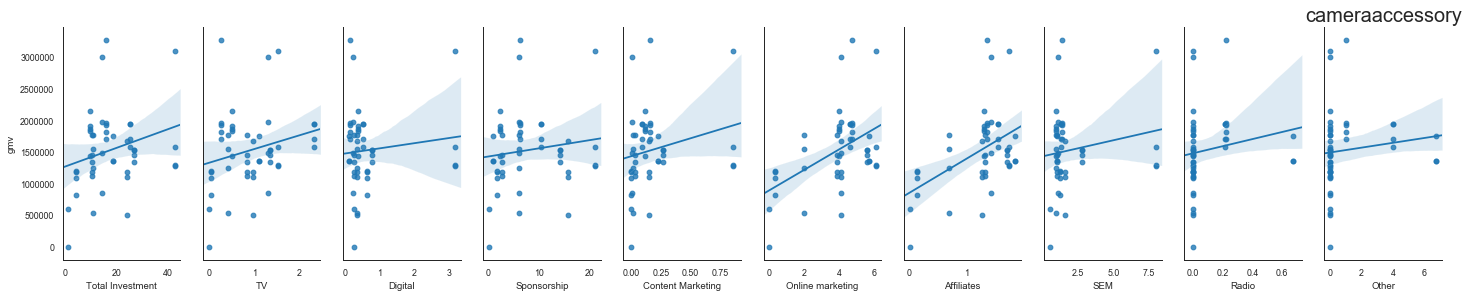

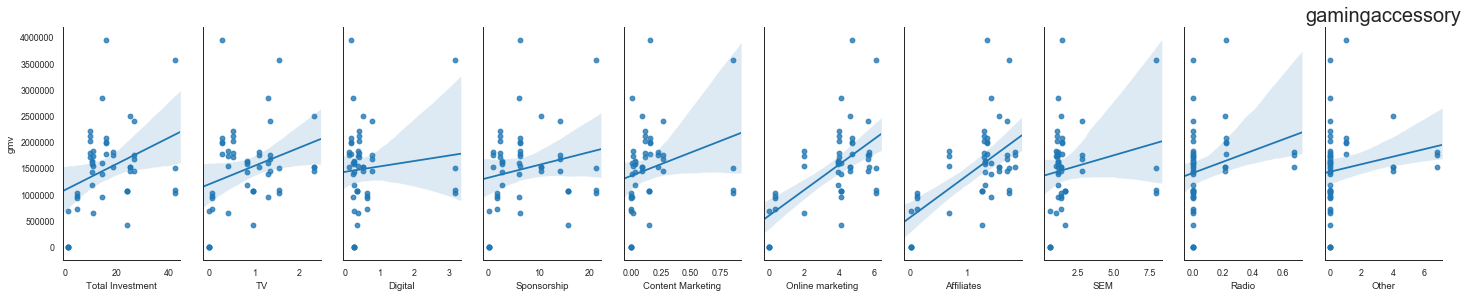

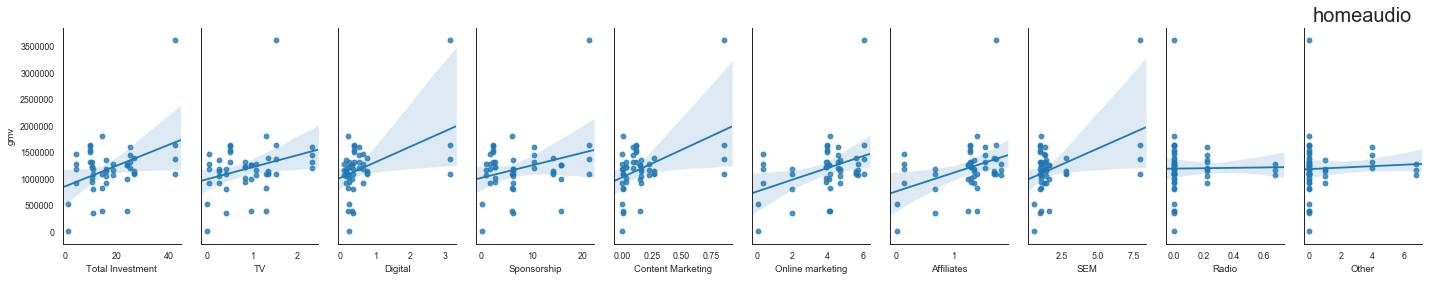

In [274]:
# Slightly alter the figure size to make it more horizontal.
#plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster


sns.pairplot(Camera_accessory_df, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', \
                                      'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], \
             y_vars='gmv',size=4, aspect=0.5, kind='reg')
plt.title('cameraaccessory', fontsize = 20)

sns.pairplot(gaming_accessory_df, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', \
                                      'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], \
             y_vars='gmv',size=4, aspect=0.5, kind='reg')
plt.title('gamingaccessory', fontsize = 20)

sns.pairplot(Homeaudio_df, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', \
                                      'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], \
             y_vars='gmv',size=4, aspect=0.5, kind='reg')
plt.title('homeaudio', fontsize = 20)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [275]:
Camera_accessory_df.drop(['Week'], axis = 1, inplace = True)
gaming_accessory_df.drop(['Week'], axis = 1, inplace = True)
Homeaudio_df.drop(['Week'], axis = 1, inplace = True)

In [276]:
Camera_accessory_org_df = Camera_accessory_df.copy()
gaming_accessory_org_df = gaming_accessory_df.copy()
Homeaudio_org_df = Homeaudio_df.copy() 

### Model Building

In [277]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = df_train[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

#### Building Linear Regression Model for HomeAudio

In [278]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split

In [279]:
np.random.seed(0)
df_train, df_test = train_test_split(Homeaudio_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [280]:
Homeaudio_df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
    

In [281]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
scaler = MinMaxScaler()

In [283]:
num_vars = ['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 
'product_vertical_Dock', 'product_vertical_DockingStation', 
'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 
'product_mrp', 'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder', 
'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 
'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 
'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 
'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 
'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 
'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 
'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 
'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 
'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 
'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 
'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 
'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 
'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 
'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3', 
'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 
'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
 'Total Precip (mm)', 'Snow on Grnd (cm)']

In [284]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [285]:
df_train.describe()

gmv  Discount%  deliverybdays  deliverycdays   sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock    TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
count 33.00      33.00          33.00          33.00 33.00                    33.00                       33.00           33.00          33.00                  33.00                            33.00                     33.00                        33.00                              33.00        33.00                        33.00                           33.00     33.00         33.00             33.00                   33.00                   33.00                   33.00                      33.00 33.00     33.00     33.00     33.00        33.00    33.00          33.00          33.00          33.00             33.00        33.00              33.00              33.00              33.00                 33.00              33.00                    33.00                    33.00                    33.00                       33.00             33.00                   33.00                   33.00                   33.00                      33.00       33.00             33.00   
mean   0.65       0.73           0.22           0.22  0.41                     0.56                        0.29            0.67           0.10                   0.50                             0.29                      0.62                         0.46                               0.68         0.14                         0.06                            0.32      0.45          0.27              0.41                    0.43                    0.46                    0.47                       0.41  0.40      0.42      0.44      0.51         0.44     0.17           0.21           0.24           0.23              0.18         0.37               0.39               0.40               0.39                  0.36               0.20                     0.21                     0.26                     0.30                        0.23              0.65                    0.66                    0.69                    0.67                       0.68        0.69              0.69   
std    0.19       0.18           0.37           0.37  0.17                     0.28                        0.20            0.19           0.25                   0.27                             0.25                      0.19                         0.21                               0.22         0.17                         0.24                            0.24      0.51          0.45              0.26                    0.24                    0.25                    0.24                       0.23  0.26      0.26      0.27      0.28         0.26     0.27           0.24           0.27           0.25              0.24         0.31               0.28               0.27               0.25                  0.26               0.28                     0.25                     0.27                     0.25                        0.24              0.30                    0.28                    0.30                    0.30                       0.29        0.29              0.28   
min    0.00       0.00           0.00           0.00

###### Dividing into X and Y sets for the model building

In [286]:
y_train = df_train.pop('gmv')
X_train = df_train

In [287]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics



##### Building the first model with all the features

In [288]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.07355795 -0.00454449 -0.00508778 -0.09256467 -0.02303661  0.06551841
  0.21031925 -0.00694752 -0.02994486 -0.03130106  0.16877673  0.1612696
  0.30369083  0.07243342  0.01121038  0.18663949  0.00182479  0.023426
  0.00173909 -0.00519555  0.0199293   0.00259286  0.00687919 -0.04803878
 -0.0598866  -0.02372213 -0.04897035 -0.04713585 -0.02571838  0.01931892
  0.02610554 -0.00664796  0.01296069  0.03547315  0.01212475  0.02388065
 -0.00363055  0.01607527 -0.01121853  0.02360941  0.05169128  0.02618273
  0.02887734  0.00056732 -0.02069538  0.03098229  0.01100352  0.00251929
 -0.01266835 -0.02650668  0.0248238   0.00633883 -0.00465693 -0.03341298
 -0.00934703  0.00632221 -0.02643528 -0.00895826 -0.02863806 -0.03266181
 -0.01172152  0.05271876 -0.00044296 -0.02670774 -0.02168743 -0.00312508
  0.05618734  0.00695006 -0.03421441 -0.03052202 -0.07022704 -0.05373268
  0.01207719 -0.03283986 -0.11454037 -0.00581836  0.04590916 -0.0569281
  0.00351142  0.00909827 -0.02163703  0.00328323  0.018

##### Model Building Using RFE

In [290]:
# Import RFE
from sklearn.feature_selection import RFE


lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  


[False False False False False  True False False False False False False
  True False False  True False False False False False False False  True
 False  True  True False  True False False False False  True False False
 False False False False  True False  True False  True  True False False
 False  True False False False  True False False  True False False False
 False False False False  True False  True False False False  True False
 False False False False  True  True False False False False False]
[10 53 44  2 32  1 13 38 21  8  7  9  1  3 37  1 61 17 62 49 24 57 47  1
 23  1  1 16  1 33 12 51 40  1 46 28 60 18 41 31  1 14  1 63  1  1 45 59
 43  1  4 52 55  1 39 50  1 35 25 15 29 20 64 34  1 56  1 48 36 19  1  5
 26 27  6 42  1  1 58 30 11 54 22]


In [291]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Discount%', False, 10),
 ('deliverybdays', False, 53),
 ('deliverycdays', False, 44),
 ('sla', False, 2),
 ('product_procurement_sla', False, 32),
 ('order_payment_type_Prepaid', True, 1),
 ('is_mass_market', False, 13),
 ('special_sales', False, 38),
 ('product_vertical_Dock', False, 21),
 ('product_vertical_DockingStation', False, 8),
 ('product_vertical_FMRadio', False, 7),
 ('product_vertical_HiFiSystem', False, 9),
 ('product_vertical_HomeAudioSpeaker', True, 1),
 ('product_mrp', False, 3),
 ('product_vertical_SoundMixer', False, 37),
 ('product_vertical_VoiceRecorder', True, 1),
 ('pay_week', False, 61),
 ('holiday_week', False, 17),
 ('Total Investment', False, 62),
 ('Total Investment_SMA_3', False, 49),
 ('Total Investment_SMA_5', False, 24),
 ('Total Investment_EMA_8', False, 57),
 ('Total_Investment_Ad_Stock', False, 47),
 ('TV', True, 1),
 ('TV_SMA_3', False, 23),
 ('TV_SMA_5', True, 1),
 ('TV_EMA_8', True, 1),
 ('TV_Ad_Stock', False, 16),
 ('Digital', True, 1),
 ('Digit

In [292]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'product_vertical_HomeAudioSpeaker', 'product_vertical_VoiceRecorder', 'TV', 'TV_SMA_5', 'TV_EMA_8', 'Digital', 'Sponsorship', 'Content Marketing_SMA_5', 'Content_Marketing_Ad_Stock', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Affiliates_SMA_3', 'SEM', 'SEM_EMA_8', 'Other_SMA_3', 'Other_EMA_8', 'NPS_SMA_5', 'Mean Temp', 'Heat Deg Days'], dtype='object')

In [293]:
X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_mrp', 'product_vertical_SoundMixer', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV_SMA_3', 'TV_Ad_Stock', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_EMA_8', 'Online marketing', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_5',
       

###### Building model using statsmodel, for the detailed statistic

In [294]:
# Import statsmodels
import statsmodels.api as sm  

In [295]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [296]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [297]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [298]:
lm.params

const                                1.14
order_payment_type_Prepaid           0.25
product_vertical_HomeAudioSpeaker    0.63
product_vertical_VoiceRecorder       0.12
TV                                  -0.13
TV_SMA_5                            -0.45
TV_EMA_8                             0.20
Digital                              0.19
Sponsorship                          0.26
Content Marketing_SMA_5              0.18
Content_Marketing_Ad_Stock           0.49
Online marketing_SMA_3              -1.20
Online marketing_SMA_5               0.31
Affiliates_SMA_3                     0.95
SEM                                 -0.44
SEM_EMA_8                           -0.38
Other_SMA_3                          0.17
Other_EMA_8                         -0.22
NPS_SMA_5                           -0.25
Mean Temp                           -0.99
Heat Deg Days                       -0.87
dtype: float64

In [299]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     731.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.51e-15
Time:                        18:43:06   Log-Likelihood:                 126.09
No. Observations:                  33   AIC:                            -210.2
Df Residuals:                      12   BIC:                            -178.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [300]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [301]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
0                               const 4519.38
13                   Affiliates_SMA_3  725.72
11             Online marketing_SMA_3  624.95
14                                SEM  459.24
7                             Digital  381.05
19                          Mean Temp  368.55
6                            TV_EMA_8  335.88
10         Content_Marketing_Ad_Stock  322.19
20                      Heat Deg Days  310.94
5                            TV_SMA_5  252.52
15                          SEM_EMA_8  246.26
9             Content Marketing_SMA_5  147.41
17                        Other_EMA_8  117.59
12             Online marketing_SMA_5   98.58
16                        Other_SMA_3   48.79
4                                  TV   25.70
8                         Sponsorship   18.04
3      product_vertical_VoiceRecorder   15.90
1          order_payment_type_Prepaid   14.51
18                          NPS_SMA_5   10.52
2   product_vertical_HomeAudioSpeaker    8.01

In [302]:
# drop Digital due to high p-value

X_train_rfe.drop('Digital', axis = 1, inplace = True)

In [303]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model with 9 variables
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                1.15
order_payment_type_Prepaid           0.25
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.13
TV                                  -0.09
TV_SMA_5                            -0.47
TV_EMA_8                             0.20
Sponsorship                          0.26
Content Marketing_SMA_5              0.24
Content_Marketing_Ad_Stock           0.48
Online marketing_SMA_3              -1.18
Online marketing_SMA_5               0.31
Affiliates_SMA_3                     0.87
SEM                                 -0.23
SEM_EMA_8                           -0.40
Other_SMA_3                          0.13
Other_EMA_8                         -0.17
NPS_SMA_5                           -0.27
Mean Temp                           -0.97
Heat Deg Days                       -0.84
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                

In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 4499.52
12                   Affiliates_SMA_3  663.34
10             Online marketing_SMA_3  618.02
18                          Mean Temp  366.16
6                            TV_EMA_8  335.88
9          Content_Marketing_Ad_Stock  321.99
19                      Heat Deg Days  302.56
5                            TV_SMA_5  249.43
14                          SEM_EMA_8  239.72
8             Content Marketing_SMA_5  118.25
16                        Other_EMA_8  100.61
11             Online marketing_SMA_5   98.57
13                                SEM   44.93
15                        Other_SMA_3   33.14
7                         Sponsorship   17.68
1          order_payment_type_Prepaid   14.50
3      product_vertical_VoiceRecorder   13.75
4                                  TV   12.93
17                          NPS_SMA_5    8.66
2   product_vertical_HomeAudioSpeaker    6.74

In [305]:
X_train_rfe.drop('TV_EMA_8', axis = 1, inplace = True)

In [306]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit()  
print(lm.params)
print(lm.summary())

const                                1.06
order_payment_type_Prepaid           0.21
product_vertical_HomeAudioSpeaker    0.64
product_vertical_VoiceRecorder       0.16
TV                                  -0.09
TV_SMA_5                            -0.30
Sponsorship                          0.27
Content Marketing_SMA_5              0.16
Content_Marketing_Ad_Stock           0.39
Online marketing_SMA_3              -1.18
Online marketing_SMA_5               0.31
Affiliates_SMA_3                     0.91
SEM                                 -0.23
SEM_EMA_8                           -0.26
Other_SMA_3                          0.09
Other_EMA_8                         -0.09
NPS_SMA_5                           -0.25
Mean Temp                           -0.90
Heat Deg Days                       -0.80
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                       

In [307]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 3601.04
11                   Affiliates_SMA_3  649.62
9              Online marketing_SMA_3  618.02
17                          Mean Temp  310.75
18                      Heat Deg Days  277.84
8          Content_Marketing_Ad_Stock  267.28
10             Online marketing_SMA_5   98.49
7             Content Marketing_SMA_5   77.10
13                          SEM_EMA_8   69.73
15                        Other_EMA_8   49.36
12                                SEM   44.93
5                            TV_SMA_5   27.28
14                        Other_SMA_3   19.35
6                         Sponsorship   17.06
4                                  TV   12.80
1          order_payment_type_Prepaid    8.33
3      product_vertical_VoiceRecorder    7.77
16                          NPS_SMA_5    7.19
2   product_vertical_HomeAudioSpeaker    4.60

In [308]:

X_train_rfe.drop('Other_EMA_8', axis = 1, inplace = True)

In [309]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.params)
print(lm.summary())

const                                1.07
order_payment_type_Prepaid           0.22
product_vertical_HomeAudioSpeaker    0.63
product_vertical_VoiceRecorder       0.15
TV                                  -0.08
TV_SMA_5                            -0.33
Sponsorship                          0.28
Content Marketing_SMA_5              0.19
Content_Marketing_Ad_Stock           0.25
Online marketing_SMA_3              -1.00
Online marketing_SMA_5               0.28
Affiliates_SMA_3                     0.77
SEM                                 -0.21
SEM_EMA_8                           -0.17
Other_SMA_3                          0.03
NPS_SMA_5                           -0.25
Mean Temp                           -0.91
Heat Deg Days                       -0.81
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                

In [310]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 3597.83
11                   Affiliates_SMA_3  522.83
9              Online marketing_SMA_3  419.15
16                          Mean Temp  309.78
17                      Heat Deg Days  276.68
8          Content_Marketing_Ad_Stock  177.35
10             Online marketing_SMA_5   91.76
7             Content Marketing_SMA_5   72.26
12                                SEM   42.22
13                          SEM_EMA_8   29.83
5                            TV_SMA_5   23.63
6                         Sponsorship   16.25
4                                  TV   12.59
1          order_payment_type_Prepaid    8.20
3      product_vertical_VoiceRecorder    7.44
15                          NPS_SMA_5    6.92
14                        Other_SMA_3    6.21
2   product_vertical_HomeAudioSpeaker    4.56

In [311]:
X_train_rfe.drop('Other_SMA_3', axis = 1, inplace = True)

In [312]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.params)
print(lm.summary())

const                                1.00
order_payment_type_Prepaid           0.21
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.16
TV                                  -0.06
TV_SMA_5                            -0.33
Sponsorship                          0.26
Content Marketing_SMA_5              0.20
Content_Marketing_Ad_Stock           0.29
Online marketing_SMA_3              -1.00
Online marketing_SMA_5               0.26
Affiliates_SMA_3                     0.80
SEM                                 -0.22
SEM_EMA_8                           -0.21
NPS_SMA_5                           -0.26
Mean Temp                           -0.83
Heat Deg Days                       -0.73
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squa

In [313]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 3160.52
11                   Affiliates_SMA_3  514.86
9              Online marketing_SMA_3  419.14
15                          Mean Temp  256.26
16                      Heat Deg Days  225.13
8          Content_Marketing_Ad_Stock  167.33
10             Online marketing_SMA_5   87.30
7             Content Marketing_SMA_5   72.01
12                                SEM   42.07
5                            TV_SMA_5   23.60
13                          SEM_EMA_8   22.14
6                         Sponsorship   13.66
4                                  TV    9.79
1          order_payment_type_Prepaid    8.13
3      product_vertical_VoiceRecorder    7.10
14                          NPS_SMA_5    6.42
2   product_vertical_HomeAudioSpeaker    3.77

In [314]:

X_train_rfe.drop('Affiliates_SMA_3', axis = 1, inplace = True)

In [315]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                1.24
order_payment_type_Prepaid           0.23
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.14
TV                                  -0.02
TV_SMA_5                            -0.30
Sponsorship                          0.25
Content Marketing_SMA_5              0.20
Content_Marketing_Ad_Stock           0.24
Online marketing_SMA_3              -0.34
Online marketing_SMA_5               0.36
SEM                                 -0.23
SEM_EMA_8                           -0.25
NPS_SMA_5                           -0.26
Mean Temp                           -1.06
Heat Deg Days                       -0.90
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     238

In [316]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 2539.19
14                          Mean Temp  208.48
15                      Heat Deg Days  195.31
8          Content_Marketing_Ad_Stock  165.89
10             Online marketing_SMA_5   77.34
9              Online marketing_SMA_3   76.41
7             Content Marketing_SMA_5   72.01
11                                SEM   41.96
5                            TV_SMA_5   23.16
12                          SEM_EMA_8   20.96
6                         Sponsorship   13.64
4                                  TV    8.65
1          order_payment_type_Prepaid    8.01
3      product_vertical_VoiceRecorder    6.94
13                          NPS_SMA_5    6.40
2   product_vertical_HomeAudioSpeaker    3.76

In [317]:

X_train_rfe.drop('TV', axis = 1, inplace = True)

In [318]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.params)
print(lm.summary())

const                                1.26
order_payment_type_Prepaid           0.24
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.14
TV_SMA_5                            -0.32
Sponsorship                          0.25
Content Marketing_SMA_5              0.19
Content_Marketing_Ad_Stock           0.25
Online marketing_SMA_3              -0.35
Online marketing_SMA_5               0.38
SEM                                 -0.23
SEM_EMA_8                           -0.25
NPS_SMA_5                           -0.26
Mean Temp                           -1.08
Heat Deg Days                       -0.92
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     266.6
Date:                Sun, 22 Dec 2019  

In [319]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 2419.89
13                          Mean Temp  196.85
14                      Heat Deg Days  180.25
7          Content_Marketing_Ad_Stock  162.39
8              Online marketing_SMA_3   75.34
9              Online marketing_SMA_5   71.18
6             Content Marketing_SMA_5   69.45
10                                SEM   41.81
11                          SEM_EMA_8   20.94
4                            TV_SMA_5   11.94
5                         Sponsorship   10.48
1          order_payment_type_Prepaid    6.43
12                          NPS_SMA_5    6.40
3      product_vertical_VoiceRecorder    5.50
2   product_vertical_HomeAudioSpeaker    3.75

In [320]:
 
X_train_rfe.drop('Content_Marketing_Ad_Stock', axis = 1, inplace = True)

In [321]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.params)
print(lm.summary())

const                                1.13
order_payment_type_Prepaid           0.22
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.15
TV_SMA_5                            -0.31
Sponsorship                          0.22
Content Marketing_SMA_5              0.32
Online marketing_SMA_3              -0.23
Online marketing_SMA_5               0.28
SEM                                 -0.13
SEM_EMA_8                           -0.22
NPS_SMA_5                           -0.24
Mean Temp                           -0.96
Heat Deg Days                       -0.81
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.19e-18
Ti

In [322]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                               const 1626.51
12                          Mean Temp  140.79
13                      Heat Deg Days  124.54
8              Online marketing_SMA_5   31.72
7              Online marketing_SMA_3   29.99
10                          SEM_EMA_8   18.51
6             Content Marketing_SMA_5   15.10
4                            TV_SMA_5   11.76
5                         Sponsorship    8.09
9                                 SEM    5.66
1          order_payment_type_Prepaid    5.64
11                          NPS_SMA_5    4.83
3      product_vertical_VoiceRecorder    4.70
2   product_vertical_HomeAudioSpeaker    3.67

In [323]:
X_train_rfe.drop('Mean Temp', axis = 1, inplace = True)

In [324]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit()  
print(lm.params)
print(lm.summary())

const                                0.20
order_payment_type_Prepaid           0.15
product_vertical_HomeAudioSpeaker    0.63
product_vertical_VoiceRecorder       0.22
TV_SMA_5                            -0.17
Sponsorship                          0.20
Content Marketing_SMA_5              0.29
Online marketing_SMA_3              -0.10
Online marketing_SMA_5               0.09
SEM                                 -0.11
SEM_EMA_8                           -0.11
NPS_SMA_5                           -0.16
Heat Deg Days                        0.04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     76.09
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.57e-14
Time:                        18:43:10   Log-

In [325]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 37.98
7              Online marketing_SMA_3 27.71
8              Online marketing_SMA_5 26.38
10                          SEM_EMA_8 16.96
6             Content Marketing_SMA_5 14.93
4                            TV_SMA_5  9.22
5                         Sponsorship  7.99
9                                 SEM  5.61
1          order_payment_type_Prepaid  5.30
3      product_vertical_VoiceRecorder  4.28
11                          NPS_SMA_5  4.00
2   product_vertical_HomeAudioSpeaker  3.66
12                      Heat Deg Days  3.34

In [326]:
X_train_rfe.drop('Online marketing_SMA_5', axis = 1, inplace = True)

In [327]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit()  
print(lm.params)
print(lm.summary())

const                                0.20
order_payment_type_Prepaid           0.14
product_vertical_HomeAudioSpeaker    0.63
product_vertical_VoiceRecorder       0.24
TV_SMA_5                            -0.17
Sponsorship                          0.18
Content Marketing_SMA_5              0.29
Online marketing_SMA_3              -0.02
SEM                                 -0.10
SEM_EMA_8                           -0.09
NPS_SMA_5                           -0.15
Heat Deg Days                        0.04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     83.70
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.69e-15
Time:                        18:43:11   Log-Likelihood:                 71.593
No. Obs

In [328]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 37.33
9                           SEM_EMA_8 16.38
6             Content Marketing_SMA_5 14.92
7              Online marketing_SMA_3 11.07
4                            TV_SMA_5  9.10
5                         Sponsorship  6.57
8                                 SEM  5.52
1          order_payment_type_Prepaid  5.16
10                          NPS_SMA_5  3.84
2   product_vertical_HomeAudioSpeaker  3.60
3      product_vertical_VoiceRecorder  3.49
11                      Heat Deg Days  3.31

In [329]:
  
X_train_rfe.drop('Online marketing_SMA_3', axis = 1, inplace = True)

In [330]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.20
order_payment_type_Prepaid           0.15
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.24
TV_SMA_5                            -0.18
Sponsorship                          0.17
Content Marketing_SMA_5              0.28
SEM                                 -0.10
SEM_EMA_8                           -0.09
NPS_SMA_5                           -0.15
Heat Deg Days                        0.04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     95.95
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.02e-16
Time:                        18:43:11   Log-Likelihood:                 71.508
No. Observations:                  33   AIC:     

In [331]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 35.57
8                           SEM_EMA_8 16.35
6             Content Marketing_SMA_5 14.40
5                         Sponsorship  6.13
4                            TV_SMA_5  5.52
7                                 SEM  5.52
1          order_payment_type_Prepaid  3.67
9                           NPS_SMA_5  3.22
3      product_vertical_VoiceRecorder  3.21
10                      Heat Deg Days  3.12
2   product_vertical_HomeAudioSpeaker  2.71

In [332]:
X_train_rfe.drop('SEM_EMA_8', axis = 1, inplace = True)

In [333]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit()  
print(lm.params)
print(lm.summary())

const                                0.20
order_payment_type_Prepaid           0.15
product_vertical_HomeAudioSpeaker    0.62
product_vertical_VoiceRecorder       0.25
TV_SMA_5                            -0.19
Sponsorship                          0.16
Content Marketing_SMA_5              0.21
SEM                                 -0.11
NPS_SMA_5                           -0.14
Heat Deg Days                        0.03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.38e-16
Time:                        18:43:11   Log-Likelihood:                 70.760
No. Observations:                  33   AIC:                            -121.5
Df Residuals

In [334]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                              const 34.69
5                        Sponsorship  5.97
4                           TV_SMA_5  5.42
7                                SEM  5.22
6            Content Marketing_SMA_5  3.77
1         order_payment_type_Prepaid  3.67
9                      Heat Deg Days  3.10
3     product_vertical_VoiceRecorder  3.02
8                          NPS_SMA_5  2.95
2  product_vertical_HomeAudioSpeaker  2.70

In [335]:

X_train_rfe.drop('Heat Deg Days', axis = 1, inplace = True)

In [336]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.params)
print(lm.summary())

const                                0.18
order_payment_type_Prepaid           0.13
product_vertical_HomeAudioSpeaker    0.65
product_vertical_VoiceRecorder       0.24
TV_SMA_5                            -0.15
Sponsorship                          0.14
Content Marketing_SMA_5              0.19
SEM                                 -0.10
NPS_SMA_5                           -0.13
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     119.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.00e-17
Time:                        18:43:12   Log-Likelihood:                 70.030
No. Observations:                  33   AIC:                            -122.1
Df Residuals:                      24   BIC:          

In [337]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                              const 29.58
7                                SEM  4.87
5                        Sponsorship  4.26
1         order_payment_type_Prepaid  3.03
4                           TV_SMA_5  2.95
3     product_vertical_VoiceRecorder  2.94
6            Content Marketing_SMA_5  2.92
8                          NPS_SMA_5  2.60
2  product_vertical_HomeAudioSpeaker  1.64

In [338]:
X_train_rfe.drop('SEM', axis = 1, inplace = True)

In [339]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 8 variables
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.params)
print(lm.summary())

const                                0.17
order_payment_type_Prepaid           0.14
product_vertical_HomeAudioSpeaker    0.66
product_vertical_VoiceRecorder       0.22
TV_SMA_5                            -0.15
Sponsorship                          0.07
Content Marketing_SMA_5              0.15
NPS_SMA_5                           -0.09
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.10e-17
Time:                        18:43:12   Log-Likelihood:                 67.470
No. Observations:                  33   AIC:                            -118.9
Df Residuals:                      25   BIC:                            -107.0
Df Model:        

In [340]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                              const 28.28
1         order_payment_type_Prepaid  2.99
4                           TV_SMA_5  2.95
3     product_vertical_VoiceRecorder  2.83
7                          NPS_SMA_5  2.11
6            Content Marketing_SMA_5  2.00
2  product_vertical_HomeAudioSpeaker  1.61
5                        Sponsorship  1.29

###### Elasticity

In [341]:
coefficients_df = pd.DataFrame(pd.DataFrame(lm.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

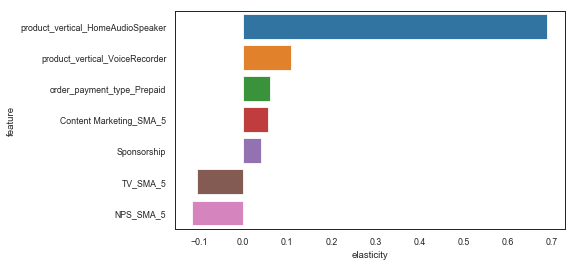

In [342]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

###### Model Evaluation

In [343]:
X_train_rfe.columns

Index(['const', 'order_payment_type_Prepaid', 'product_vertical_HomeAudioSpeaker', 'product_vertical_VoiceRecorder', 'TV_SMA_5', 'Sponsorship', 'Content Marketing_SMA_5', 'NPS_SMA_5'], dtype='object')

In [344]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['deliverybdays', 'special_sales', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'product_vertical_HiFiSystem', 'Digital_EMA_8', 'Total Investment_SMA_5', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'Radio', 'SEM_SMA_3', 'SEM', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'Affiliates_EMA_8', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'pay_week', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'Content Marketing_SMA_3', 'Mean Temp', 'Radio_EMA_8', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Content_Marketing_Ad_Stock', 'Total Snow (cm)', 'Online marketing', 'product_procurement_sla', 'TV', 'Min Temp', 'holiday_week', 'Online marketing_SMA_3', 'SEM_EMA_8', 'Digital_SMA_3', 'Radio_SMA_3', 'product_vertical_Dock', 'Other_SMA_3', 'product_vertical_DockingStation

In [345]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.84149764, 0.81909062, 0.9232128 , 0.96628141, 0.68598763,
       0.99496567, 0.64144049, 0.92497351, 0.03123245, 0.91394018])

In [346]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [347]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0018924972501512725
r_square_value : 0.9447679567735489


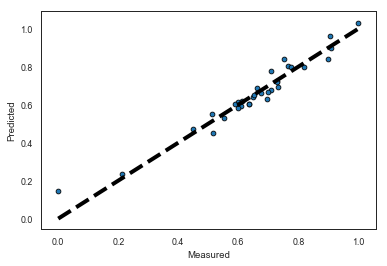

In [348]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Building Linear Regression Model for Camera Accessory 

In [349]:
np.random.seed(0)
df_train, df_test = train_test_split(Camera_accessory_df, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features

In [350]:
Camera_accessory_df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8',
    

In [351]:
from sklearn.preprocessing import MinMaxScaler

In [352]:
scaler = MinMaxScaler()

In [353]:
num_vars = ['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8',
       'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

In [354]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [355]:
df_train.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  \
13 0.60       0.87           0.97           0.98 0.35                     0.04         0.67                        1.00            0.55                              0.42           0.00                        0.39                            0.60                                   0.52                                0.25                           0.25                              0.33                            0.00                               0.80                          0.59                                  0.47                           0.29                            0.25                     0.44                    0.49                               0.00                   0.42                                0.00                      0.00                    0.54                        0.46      0.00          0.00              0.32                    0.50                    0.59                    0.53                       0.46 0.56      0.85      1.00      0.94         0.85   
11 0.52       0.77           0.07           0.07 0.25                     0.06         0.48                        0.27            0.49                              0.55           0.00                        0.34                            0.96                                   0.72                                0.75                           0.17                              0.28                            0.00                               0.40                          0.69                                  0.51                           0.20                            0.75                     0.40                    0.40                               0.00                   0.28                                0.00                      0.00                    0.59                        0.46      0.00          1.00              0.58                    0.59                    0.49                    0.53                       0.52 1.00      1.00      0.76      0.90         0.93   
33 0.36       0.62           0.00           0.00 0.59                     0.08         0.60                        0.13            0.26                              0.85           0.00                        0.37                            0.39                                   0.20                                0.00                           0.00                              0.12                            0.00                               0.00                          0.15                                  0.74                           0.20                            0.25                     0.52                    0.06                               0.00                   0.31                                0.00                      0.00                    0.21                        0.23      1.00          0.00              0.56                    0.39                    0.26                    0.24                       0.36 0.42      0.28      0.18      0.21         0.29   
23 0.47       0.87  

In [356]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [357]:
df_train.describe()


gmv  Discount%  deliverybdays  deliverycdays   sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock    TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
count 33.00      33.00          33.00          33.00 33.00                    33.00        33.00                       33.00           33.00                             33.00          33.00                       33.00                           33.00                                  33.00                               33.00                          33.00                             33.00                           33.00                              33.00                         33.00                                 33.00                          33.00                           33.00                    33.00                   33.00                              33.00                  33.00                               33.00                     33.00                   33.00                       33.00     33.00         33.00             33.00                   33.00                   33.00                   33.00                      33.00 33.00     33.00     33.00     33.00   
mean   0.47       0.73           0.24           0.25  0.43                     0.10         0.58                        0.22            0.41                              0.63           0.08                        0.40                            0.52                                   0.41                                0.31                           0.18                              0.28                            0.08                               0.11                          0.34                                  0.54                           0.24                            0.27                     0.51                    0.28                               0.06                   0.38                                0.00                      0.08                    0.40                        0.33      0.45          0.27              0.41                    0.43                    0.46                    0.47                       0.41  0.40      0.42      0.44      0.51   
std    0.18       0.17           0.41           0.41  0.18                     0.17         0.15                        0.21            0.19                              0.20           0.21                        0.16                            0.22                                   0.23                                0.28                           0.26                              0.22                            0.21                               0.24                          0.25                                  0.19                           0.16                            0.34                     0.18                    0.27                               0.24                   0.17                                0.00                      0.20                    0.17                        0.21      0.51          0.45              0.26                    0.24                    0.25                    0.24                       0.23  0.26      0.26      0.27      0.28   
min    0.00       0.00           0.00           0.00

##### Dividing into X and Y sets for the model building

In [358]:
y_train = df_train.pop('gmv')
X_train = df_train

In [359]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [360]:
#Building the first model with all the features
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [361]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)


[-0.0831925   0.03007499 -0.02648689 -0.11044136  0.03681288 -0.01264289
  0.09788652  0.1567073   0.02587076 -0.03145161  0.04097686  0.10761263
  0.07142447  0.02495674  0.00623904 -0.06726347  0.08829005  0.00764329
  0.05035731  0.0779449   0.11844973  0.02051761  0.04643565  0.13857307
 -0.07501194  0.08656748 -0.0049018  -0.01001054  0.09064687  0.03050619
  0.00718427 -0.02523366  0.00925777  0.01455321  0.01055066  0.01939342
  0.03871743 -0.01217497 -0.04807873  0.03411332 -0.06537229 -0.02335776
 -0.00807274  0.00708137  0.02239483 -0.02287342 -0.00421771 -0.08862807
 -0.0094336  -0.00198054  0.00657405  0.03800457  0.01614501  0.01615002
 -0.01802679 -0.00186675  0.02158287  0.07705149 -0.020628    0.03328675
  0.02818133 -0.02961249  0.02814484 -0.02143735 -0.0078776  -0.03184478
  0.07426293 -0.02940312  0.01323729 -0.00809341 -0.02537816  0.00270965
 -0.02063536 -0.03046826 -0.00761311  0.02336901  0.01789215 -0.00922896
 -0.05636386  0.00865315 -0.01350397 -0.00322554 -0

###### Model Building Using RFE

In [362]:
# Import RFE
from sklearn.feature_selection import RFE

In [363]:
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [364]:
# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  


[False False False False False False  True False False False  True  True
  True False False  True  True False  True False  True False  True  True
  True  True False  True  True False False  True False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False  True False False False  True
 False]
[33 56 64  4 17 45  1  9 18 51  1  1  1 32 73  1  1 15  1 24  1 25  1  1
  1  1 77  1  1 35 40  1 36 67 27 62 22 57 10 69 11 26  3 70 54 38 65  1
  6 47 66 23 53 48 20 55  2 14  7 34 28 50  5 61 30 46 60 52 71 42 43 41
 19 16 58 59 49 63 21 75 44  1  1 39 74 76 68 37 72 31 78  1 29 13 12  1
  8]


In [365]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Discount%', False, 33),
 ('deliverybdays', False, 56),
 ('deliverycdays', False, 64),
 ('sla', False, 4),
 ('product_procurement_sla', False, 17),
 ('product_mrp', False, 45),
 ('order_payment_type_Prepaid', True, 1),
 ('is_mass_market', False, 9),
 ('product_vertical_CameraAccessory', False, 18),
 ('special_sales', False, 51),
 ('product_vertical_CameraBag', True, 1),
 ('product_vertical_CameraBattery', True, 1),
 ('product_vertical_CameraBatteryCharger', True, 1),
 ('product_vertical_CameraBatteryGrip', False, 32),
 ('product_vertical_CameraEyeCup', False, 73),
 ('product_vertical_CameraFilmRolls', True, 1),
 ('product_vertical_CameraHousing', True, 1),
 ('product_vertical_CameraMicrophone', False, 15),
 ('product_vertical_CameraMount', True, 1),
 ('product_vertical_CameraRemoteControl', False, 24),
 ('product_vertical_CameraTripod', True, 1),
 ('product_vertical_ExtensionTube', False, 25),
 ('product_vertical_Filter', True, 1),
 ('product_vertical_Flash', True, 1),
 ('product_ver

In [366]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMount', 'product_vertical_CameraTripod', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_Softbox', 'product_vertical_Strap', 'holiday_week', 'Sponsorship', 'Other_Ad_Stock', 'NPS', 'Heat Deg Days', 'Total Precip (mm)'], dtype='object')

In [367]:

X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraMicrophone', 'product_vertical_CameraRemoteControl', 'product_vertical_ExtensionTube', 'product_vertical_ReflectorUmbrella', 'product_vertical_Telescope', 'pay_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
       

##### Building model using statsmodel, for the detailed statistic

In [368]:
import statsmodels.api as sm  


In [369]:
X_train_rfe = X_train[col]

In [370]:

X_train_rfe = sm.add_constant(X_train_rfe)


In [371]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [372]:
lm.params

const                                    0.16
order_payment_type_Prepaid               0.07
product_vertical_CameraBag               0.12
product_vertical_CameraBattery           0.20
product_vertical_CameraBatteryCharger    0.02
product_vertical_CameraFilmRolls        -0.14
product_vertical_CameraHousing           0.11
product_vertical_CameraMount             0.02
product_vertical_CameraTripod            0.21
product_vertical_Filter                  0.05
product_vertical_Flash                   0.33
product_vertical_FlashShoeAdapter       -0.03
product_vertical_Lens                    0.14
product_vertical_Softbox                -0.08
product_vertical_Strap                   0.04
holiday_week                            -0.02
Sponsorship                             -0.03
Other_Ad_Stock                          -0.04
NPS                                     -0.15
Heat Deg Days                            0.02
Total Precip (mm)                       -0.05
dtype: float64

In [373]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1542.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.73e-17
Time:                        18:43:33   Log-Likelihood:                 140.64
No. Observations:                  33   AIC:                            -239.3
Df Residuals:                      12   BIC:                            -207.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [374]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                   const 135.97
2              product_vertical_CameraBag  37.82
12                  product_vertical_Lens  31.19
5        product_vertical_CameraFilmRolls  28.07
3          product_vertical_CameraBattery  26.34
6          product_vertical_CameraHousing  25.33
4   product_vertical_CameraBatteryCharger  24.61
10                 product_vertical_Flash  20.04
9                 product_vertical_Filter  11.27
18                                    NPS   7.47
14                 product_vertical_Strap   6.97
16                            Sponsorship   6.10
7            product_vertical_CameraMount   5.97
19                          Heat Deg Days   5.71
15                           holiday_week   4.13
1              order_payment_type_Prepaid   4.03
13               product_vertical_Softbox   4.02
20                      Total Precip (mm)   3.81
17                         Other_Ad_Stock   3.07
8           product_vertical_CameraTripod   2.19
11      product_vertical_FlashShoeAdapter   2.05

In [375]:
X_train_rfe.drop('product_vertical_CameraBatteryCharger', axis = 1, inplace = True) 

In [376]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.16
order_payment_type_Prepaid           0.08
product_vertical_CameraBag           0.11
product_vertical_CameraBattery       0.22
product_vertical_CameraFilmRolls    -0.14
product_vertical_CameraHousing       0.12
product_vertical_CameraMount         0.02
product_vertical_CameraTripod        0.21
product_vertical_Filter              0.05
product_vertical_Flash               0.33
product_vertical_FlashShoeAdapter   -0.03
product_vertical_Lens                0.14
product_vertical_Softbox            -0.08
product_vertical_Strap               0.04
holiday_week                        -0.02
Sponsorship                         -0.03
Other_Ad_Stock                      -0.04
NPS                                 -0.16
Heat Deg Days                        0.02
Total Precip (mm)                   -0.05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                

In [377]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                               const 133.10
2          product_vertical_CameraBag  30.69
11              product_vertical_Lens  29.37
4    product_vertical_CameraFilmRolls  25.63
5      product_vertical_CameraHousing  21.29
9              product_vertical_Flash  17.57
8             product_vertical_Filter  11.19
3      product_vertical_CameraBattery  10.11
17                                NPS   7.28
13             product_vertical_Strap   6.58
6        product_vertical_CameraMount   5.97
15                        Sponsorship   5.93
18                      Heat Deg Days   5.58
14                       holiday_week   4.10
1          order_payment_type_Prepaid   3.97
12           product_vertical_Softbox   3.95
19                  Total Precip (mm)   3.74
16                     Other_Ad_Stock   3.06
7       product_vertical_CameraTripod   2.05
10  product_vertical_FlashShoeAdapter   1.93

In [378]:

X_train_rfe.drop('product_vertical_CameraMount', axis = 1, inplace = True)

In [379]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model with 9 variables
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.16
order_payment_type_Prepaid           0.07
product_vertical_CameraBag           0.12
product_vertical_CameraBattery       0.22
product_vertical_CameraFilmRolls    -0.16
product_vertical_CameraHousing       0.13
product_vertical_CameraTripod        0.21
product_vertical_Filter              0.05
product_vertical_Flash               0.35
product_vertical_FlashShoeAdapter   -0.02
product_vertical_Lens                0.13
product_vertical_Softbox            -0.09
product_vertical_Strap               0.05
holiday_week                        -0.02
Sponsorship                         -0.03
Other_Ad_Stock                      -0.05
NPS                                 -0.16
Heat Deg Days                        0.02
Total Precip (mm)                   -0.05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                       

In [380]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                               const 133.08
2          product_vertical_CameraBag  30.21
10              product_vertical_Lens  28.43
4    product_vertical_CameraFilmRolls  23.03
5      product_vertical_CameraHousing  20.02
8              product_vertical_Flash  13.21
7             product_vertical_Filter  11.18
3      product_vertical_CameraBattery   9.39
16                                NPS   7.26
12             product_vertical_Strap   6.55
14                        Sponsorship   5.79
17                      Heat Deg Days   4.60
13                       holiday_week   4.10
1          order_payment_type_Prepaid   3.93
11           product_vertical_Softbox   3.76
18                  Total Precip (mm)   3.73
15                     Other_Ad_Stock   2.81
6       product_vertical_CameraTripod   2.04
9   product_vertical_FlashShoeAdapter   1.73

In [381]:
X_train_rfe.drop('product_vertical_CameraBag', axis = 1, inplace = True)

In [382]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model with 9 variables
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.17
order_payment_type_Prepaid           0.07
product_vertical_CameraBattery       0.25
product_vertical_CameraFilmRolls    -0.20
product_vertical_CameraHousing       0.18
product_vertical_CameraTripod        0.20
product_vertical_Filter              0.07
product_vertical_Flash               0.34
product_vertical_FlashShoeAdapter   -0.03
product_vertical_Lens                0.20
product_vertical_Softbox            -0.07
product_vertical_Strap               0.06
holiday_week                        -0.03
Sponsorship                         -0.04
Other_Ad_Stock                      -0.05
NPS                                 -0.17
Heat Deg Days                        0.03
Total Precip (mm)                   -0.06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                

In [383]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                               const 115.81
9               product_vertical_Lens  17.34
3    product_vertical_CameraFilmRolls  14.25
7              product_vertical_Flash  13.14
4      product_vertical_CameraHousing  11.43
6             product_vertical_Filter  10.72
15                                NPS   6.95
2      product_vertical_CameraBattery   5.95
11             product_vertical_Strap   5.74
13                        Sponsorship   5.00
16                      Heat Deg Days   3.92
1          order_payment_type_Prepaid   3.72
17                  Total Precip (mm)   3.54
10           product_vertical_Softbox   2.97
14                     Other_Ad_Stock   2.79
12                       holiday_week   2.72
5       product_vertical_CameraTripod   1.56
8   product_vertical_FlashShoeAdapter   1.46

In [384]:
X_train_rfe.drop('product_vertical_Filter', axis = 1, inplace = True)

In [385]:

X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model  
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.19
order_payment_type_Prepaid           0.06
product_vertical_CameraBattery       0.28
product_vertical_CameraFilmRolls    -0.23
product_vertical_CameraHousing       0.19
product_vertical_CameraTripod        0.21
product_vertical_Flash               0.36
product_vertical_FlashShoeAdapter   -0.03
product_vertical_Lens                0.24
product_vertical_Softbox            -0.09
product_vertical_Strap               0.07
holiday_week                        -0.03
Sponsorship                         -0.05
Other_Ad_Stock                      -0.06
NPS                                 -0.19
Heat Deg Days                        0.04
Total Precip (mm)                   -0.07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squa

In [386]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 85.92
8               product_vertical_Lens 13.24
6              product_vertical_Flash 11.35
4      product_vertical_CameraHousing 11.18
3    product_vertical_CameraFilmRolls 10.98
10             product_vertical_Strap  5.57
14                                NPS  5.14
12                        Sponsorship  4.60
2      product_vertical_CameraBattery  3.90
15                      Heat Deg Days  3.80
1          order_payment_type_Prepaid  3.48
16                  Total Precip (mm)  2.73
9            product_vertical_Softbox  2.42
13                     Other_Ad_Stock  2.42
11                       holiday_week  2.34
7   product_vertical_FlashShoeAdapter  1.46
5       product_vertical_CameraTripod  1.45

In [387]:
X_train_rfe.drop('product_vertical_Lens', axis = 1, inplace = True)

In [388]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model  
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.26
order_payment_type_Prepaid           0.07
product_vertical_CameraBattery       0.31
product_vertical_CameraFilmRolls    -0.20
product_vertical_CameraHousing       0.28
product_vertical_CameraTripod        0.20
product_vertical_Flash               0.38
product_vertical_FlashShoeAdapter   -0.05
product_vertical_Softbox            -0.11
product_vertical_Strap               0.12
holiday_week                        -0.04
Sponsorship                         -0.07
Other_Ad_Stock                      -0.09
NPS                                 -0.24
Heat Deg Days                        0.03
Total Precip (mm)                   -0.10
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     204

In [389]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 50.97
6              product_vertical_Flash 11.07
3    product_vertical_CameraFilmRolls 10.70
4      product_vertical_CameraHousing  8.56
9              product_vertical_Strap  4.93
11                        Sponsorship  4.17
13                                NPS  3.86
14                      Heat Deg Days  3.79
2      product_vertical_CameraBattery  3.48
1          order_payment_type_Prepaid  3.40
15                  Total Precip (mm)  2.38
10                       holiday_week  2.30
8            product_vertical_Softbox  2.29
12                     Other_Ad_Stock  2.04
5       product_vertical_CameraTripod  1.45
7   product_vertical_FlashShoeAdapter  1.27

In [390]:
X_train_rfe.drop('Heat Deg Days', axis = 1, inplace = True)

In [391]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.27
order_payment_type_Prepaid           0.08
product_vertical_CameraBattery       0.31
product_vertical_CameraFilmRolls    -0.18
product_vertical_CameraHousing       0.24
product_vertical_CameraTripod        0.20
product_vertical_Flash               0.38
product_vertical_FlashShoeAdapter   -0.05
product_vertical_Softbox            -0.11
product_vertical_Strap               0.13
holiday_week                        -0.03
Sponsorship                         -0.09
Other_Ad_Stock                      -0.08
NPS                                 -0.26
Total Precip (mm)                   -0.09
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 22 Dec 2019  

In [392]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 43.07
6              product_vertical_Flash 11.06
3    product_vertical_CameraFilmRolls  9.89
4      product_vertical_CameraHousing  6.32
9              product_vertical_Strap  4.93
2      product_vertical_CameraBattery  3.47
11                        Sponsorship  3.40
1          order_payment_type_Prepaid  3.35
13                                NPS  3.14
14                  Total Precip (mm)  2.29
8            product_vertical_Softbox  2.20
10                       holiday_week  2.03
12                     Other_Ad_Stock  1.82
5       product_vertical_CameraTripod  1.45
7   product_vertical_FlashShoeAdapter  1.27

In [393]:
X_train_rfe.drop('product_vertical_Flash', axis = 1, inplace = True)

In [394]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.24
order_payment_type_Prepaid           0.17
product_vertical_CameraBattery       0.35
product_vertical_CameraFilmRolls     0.08
product_vertical_CameraHousing       0.24
product_vertical_CameraTripod        0.21
product_vertical_FlashShoeAdapter   -0.03
product_vertical_Softbox             0.01
product_vertical_Strap               0.17
holiday_week                        -0.04
Sponsorship                         -0.15
Other_Ad_Stock                      -0.06
NPS                                 -0.28
Total Precip (mm)                    0.01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     37.12
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.03e-10
Ti

In [395]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 42.36
3    product_vertical_CameraFilmRolls  6.48
4      product_vertical_CameraHousing  6.32
8              product_vertical_Strap  4.88
2      product_vertical_CameraBattery  3.38
12                                NPS  3.12
1          order_payment_type_Prepaid  2.98
10                        Sponsorship  2.96
9                        holiday_week  2.02
11                     Other_Ad_Stock  1.81
13                  Total Precip (mm)  1.70
7            product_vertical_Softbox  1.52
5       product_vertical_CameraTripod  1.45
6   product_vertical_FlashShoeAdapter  1.24

In [396]:
X_train_rfe.drop('Total Precip (mm)', axis = 1, inplace = True)

In [397]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())


const                                0.24
order_payment_type_Prepaid           0.17
product_vertical_CameraBattery       0.36
product_vertical_CameraFilmRolls     0.08
product_vertical_CameraHousing       0.23
product_vertical_CameraTripod        0.21
product_vertical_FlashShoeAdapter   -0.03
product_vertical_Softbox             0.01
product_vertical_Strap               0.17
holiday_week                        -0.04
Sponsorship                         -0.15
Other_Ad_Stock                      -0.06
NPS                                 -0.28
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     42.27
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.55e-11
Time:                        18:43:36   Log-

In [398]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 42.29
3    product_vertical_CameraFilmRolls  6.41
4      product_vertical_CameraHousing  5.63
8              product_vertical_Strap  4.64
2      product_vertical_CameraBattery  3.14
12                                NPS  3.12
1          order_payment_type_Prepaid  2.82
10                        Sponsorship  2.72
9                        holiday_week  2.01
11                     Other_Ad_Stock  1.81
7            product_vertical_Softbox  1.52
5       product_vertical_CameraTripod  1.44
6   product_vertical_FlashShoeAdapter  1.19

In [399]:

X_train_rfe.drop('product_vertical_Softbox', axis = 1, inplace = True)

In [400]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                0.24
order_payment_type_Prepaid           0.17
product_vertical_CameraBattery       0.36
product_vertical_CameraFilmRolls     0.09
product_vertical_CameraHousing       0.24
product_vertical_CameraTripod        0.21
product_vertical_FlashShoeAdapter   -0.03
product_vertical_Strap               0.17
holiday_week                        -0.04
Sponsorship                         -0.15
Other_Ad_Stock                      -0.06
NPS                                 -0.28
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     48.24
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.23e-12
Time:                        18:43:36   Log-Likelihood:                 65.009
No. Obs

In [401]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                               const 42.29
3    product_vertical_CameraFilmRolls  6.38
4      product_vertical_CameraHousing  5.57
7              product_vertical_Strap  4.59
11                                NPS  3.11
2      product_vertical_CameraBattery  3.10
1          order_payment_type_Prepaid  2.82
9                         Sponsorship  2.71
8                        holiday_week  1.89
10                     Other_Ad_Stock  1.80
5       product_vertical_CameraTripod  1.44
6   product_vertical_FlashShoeAdapter  1.18

In [402]:

X_train_rfe.drop('product_vertical_FlashShoeAdapter', axis = 1, inplace = True)

In [403]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                               0.24
order_payment_type_Prepaid          0.16
product_vertical_CameraBattery      0.36
product_vertical_CameraFilmRolls    0.09
product_vertical_CameraHousing      0.25
product_vertical_CameraTripod       0.21
product_vertical_Strap              0.16
holiday_week                       -0.04
Sponsorship                        -0.15
Other_Ad_Stock                     -0.06
NPS                                -0.28
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     53.67
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.16e-13
Time:                        18:43:37   Log-Likelihood:                 64.450
No. Observations:                  33   AIC:                

In [404]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                              const 41.85
3   product_vertical_CameraFilmRolls  6.38
4     product_vertical_CameraHousing  5.43
6             product_vertical_Strap  4.52
10                               NPS  3.11
2     product_vertical_CameraBattery  3.04
1         order_payment_type_Prepaid  2.78
8                        Sponsorship  2.67
7                       holiday_week  1.79
9                     Other_Ad_Stock  1.75
5      product_vertical_CameraTripod  1.42

In [405]:

X_train_rfe.drop('product_vertical_CameraFilmRolls', axis = 1, inplace = True)

In [406]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())


const                             0.26
order_payment_type_Prepaid        0.17
product_vertical_CameraBattery    0.36
product_vertical_CameraHousing    0.32
product_vertical_CameraTripod     0.20
product_vertical_Strap            0.19
holiday_week                     -0.04
Sponsorship                      -0.15
Other_Ad_Stock                   -0.05
NPS                              -0.31
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     59.50
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.42e-14
Time:                        18:43:37   Log-Likelihood:                 63.711
No. Observations:                  33   AIC:                            -107.4
Df Residuals:                      23   BI

In [407]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                           const 34.44
5          product_vertical_Strap  4.26
2  product_vertical_CameraBattery  2.99
7                     Sponsorship  2.66
1      order_payment_type_Prepaid  2.65
9                             NPS  2.58
6                    holiday_week  1.78
3  product_vertical_CameraHousing  1.74
8                  Other_Ad_Stock  1.71
4   product_vertical_CameraTripod  1.39

In [408]:

X_train_rfe.drop('Other_Ad_Stock', axis = 1, inplace = True)

In [409]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                             0.23
order_payment_type_Prepaid        0.15
product_vertical_CameraBattery    0.34
product_vertical_CameraHousing    0.32
product_vertical_CameraTripod     0.22
product_vertical_Strap            0.21
holiday_week                     -0.05
Sponsorship                      -0.12
NPS                              -0.27
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     64.50
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.38e-14
Time:                        18:43:37   Log-Likelihood:                 62.454
No. Observations:                  33   AIC:                            -106.9
Df Residuals:                      24   BIC:                            -93.44
Df

In [410]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                           const 26.52
5          product_vertical_Strap  4.03
2  product_vertical_CameraBattery  2.86
1      order_payment_type_Prepaid  2.38
8                             NPS  2.02
7                     Sponsorship  1.89
6                    holiday_week  1.75
3  product_vertical_CameraHousing  1.71
4   product_vertical_CameraTripod  1.35

#### Elasticity

In [411]:
coefficients_df = pd.DataFrame(pd.DataFrame(lm.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

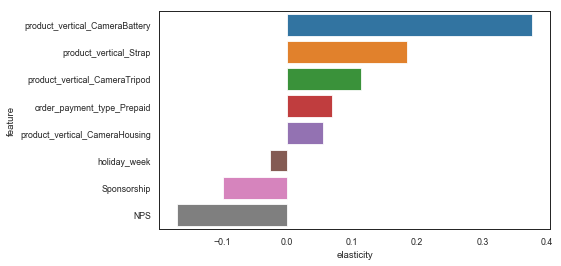

In [412]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

###### Model Evaluation

In [413]:
X_train_rfe.columns

Index(['const', 'order_payment_type_Prepaid', 'product_vertical_CameraBattery', 'product_vertical_CameraHousing', 'product_vertical_CameraTripod', 'product_vertical_Strap', 'holiday_week', 'Sponsorship', 'NPS'], dtype='object')

In [414]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_FlashShoeAdapter', 'deliverybdays', 'special_sales', 'product_vertical_CameraRemoteControl', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'product_vertical_CameraBatteryCharger', 'product_vertical_Telescope', 'Digital_EMA_8', 'Total Investment_SMA_5', 'product_vertical_ExtensionTube', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'Radio', 'SEM_SMA_3', 'SEM', 'product_vertical_CameraAccessory', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'product_vertical_CameraEyeCup', 'Affiliates_EMA_8', 'sla', 'is_mass_market', 'Other', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'pay_week', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'product_vertical_Filter', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'Content Marketing_SMA_3', 'Mean Temp', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Stock Index', 'Content_Marketing_Ad_Stock', 'To

In [415]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [416]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores


array([ 0.27936251,  0.96636311,  0.93586279,  0.97216443, -3.65409165,
        0.72779937, -0.01095782,  0.89902674, -2.74606978,  0.42733817])

In [417]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)


In [418]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.0037272176103488558
r_square_value : 0.875400422350475


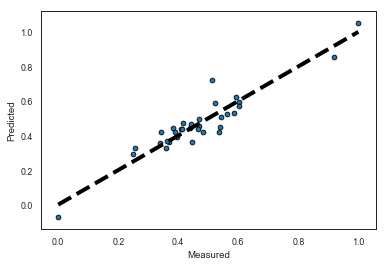

In [419]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Building Linear Regression Model for Gaming Accessory

In [420]:
np.random.seed(0)
df_train, df_test = train_test_split(gaming_accessory_df, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features

In [421]:
gaming_accessory_df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship',
       'Spo

In [422]:
from sklearn.preprocessing import MinMaxScaler


In [423]:
scaler = MinMaxScaler()

In [424]:
num_vars = ['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 
'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 
'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 
'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 
'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 
'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 
'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship','Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 
'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 
'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 
'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 
'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 
'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 
'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 
'Snow on Grnd (cm)']
 

In [425]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [426]:
df_train.head()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [427]:
df_train.describe()

gmv  Discount%  deliverybdays  deliverycdays   sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  product_vertical_GameControlMount  product_vertical_GamePad  product_mrp  special_sales  product_vertical_GamingAccessoryKit  product_vertical_GamingAdapter  product_vertical_GamingChargingStation  product_vertical_GamingHeadset  product_vertical_GamingKeyboard  product_vertical_GamingMemoryCard  product_vertical_GamingMouse  product_vertical_GamingMousePad  product_vertical_GamingSpeaker  product_vertical_JoystickGamingWheel  product_vertical_MotionController  product_vertical_TVOutCableAccessory  payd_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock    TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
count 35.00      35.00          35.00          35.00 35.00                    35.00                       35.00           35.00                              35.00                     35.00        35.00          35.00                                35.00                           35.00                                   35.00                           35.00                            35.00                              35.00                         35.00                            35.00                           35.00                                 35.00                              35.00                                 35.00      35.00         35.00             35.00                   35.00                   35.00                   35.00                      35.00 35.00     35.00     35.00     35.00        35.00    35.00          35.00          35.00          35.00             35.00        35.00              35.00              35.00              35.00                 35.00   
mean   0.39       0.39           0.26           0.26  0.49                     0.19                        0.23            0.39                               0.03                      0.44         0.60           0.09                                 0.53                            0.51                                    0.14                            0.38                             0.22                               0.17                          0.18                             0.25                            0.11                                  0.19                               0.37                                  0.51       0.51          0.17              0.40                    0.39                    0.41                    0.45                       0.40  0.37      0.36      0.43      0.52         0.42     0.19           0.20           0.21           0.22              0.18         0.37               0.35               0.35               0.39                  0.35   
std    0.21       0.23           0.41           0.41  0.18                     0.18                        0.21            0.22                               0.17                      0.20         0.19           0.23                                 0.23                            0.24                                    0.27                            0.27                             0.18                               0.21                          0.17                             0.18                            0.20                                  0.24                               0.26                                  0.22       0.51          0.38              0.29                    0.25                    0.26                    0.25                       0.25  0.28      0.25      0.29      0.31         0.27     0.30           0.25           0.26           0.25              0.26         0.32               0.29               0.28               0.25                  0.27   
min    0.00       0.00           0.00           

##### Dividing into X and Y sets for the model building

In [428]:
y_train = df_train.pop('gmv')
X_train = df_train

##### Building the first model with all the features

In [429]:
# Instantiate
lm = LinearRegression()

In [430]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [431]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.00307565 -0.01643747 -0.00752341 -0.01506108  0.03607579  0.0835356
  0.13067301 -0.02122502  0.0866989   0.04732584  0.13414333  0.10112358
  0.03774361  0.0261476   0.16356461  0.02891972  0.01169936  0.07858835
  0.04116486  0.0494107   0.08638032  0.00728755  0.07546837 -0.00393296
  0.01555991  0.00137995 -0.02069186 -0.00282279 -0.0020957   0.00628003
  0.02283629 -0.02453951 -0.0289009   0.01121488 -0.00498888  0.00720923
 -0.01528734  0.00475118 -0.00516223  0.00045017 -0.00706733  0.01009149
 -0.00185552  0.00146205 -0.00415938 -0.01014511 -0.00447331  0.02791213
  0.0010525   0.00830045 -0.03373077 -0.00978714  0.02264974  0.0169899
  0.01859713  0.01702092  0.0298371   0.01696391 -0.00722866  0.01589098
 -0.0048029  -0.01303554  0.00558216 -0.00248058  0.0053535   0.00711431
 -0.0167268  -0.00455524  0.01532201 -0.00144901  0.02898889 -0.03172055
 -0.02614308  0.00429096 -0.00158093 -0.00497538  0.00130961 -0.00040346
  0.01236237  0.03041785 -0.01370751 -0.03175845  0.0

##### Model Building Using RFE

In [432]:
# Import RFE
from sklearn.feature_selection import RFE

In [433]:
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [434]:
# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  

[False  True False False  True  True  True False False  True  True  True
 False False False False False  True False False  True False  True False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False  True False  True  True
 False False False False False False  True  True False False False False
 False  True False  True False False]
[55  1 31 14  1  1  1 16  2  1  1  1  5  4  8  7 17  1  3 11  1 58  1 66
  9 64 34 52 67 45  6  1 27 53 65 44 25 28 36 63 59 62 38 46 54 10 60 15
 70 35 19 61 37 30 24 51 33 23  1 18 41 32 56 48 47 40  1 42  1 68  1  1
 22 29 69 50 57 71  1  1 26 13 21 43 20  1 49  1 39 12]


In [435]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Discount%', False, 55),
 ('deliverybdays', True, 1),
 ('deliverycdays', False, 31),
 ('sla', False, 14),
 ('product_procurement_sla', True, 1),
 ('order_payment_type_Prepaid', True, 1),
 ('is_mass_market', True, 1),
 ('product_vertical_GameControlMount', False, 16),
 ('product_vertical_GamePad', False, 2),
 ('product_mrp', True, 1),
 ('special_sales', True, 1),
 ('product_vertical_GamingAccessoryKit', True, 1),
 ('product_vertical_GamingAdapter', False, 5),
 ('product_vertical_GamingChargingStation', False, 4),
 ('product_vertical_GamingHeadset', False, 8),
 ('product_vertical_GamingKeyboard', False, 7),
 ('product_vertical_GamingMemoryCard', False, 17),
 ('product_vertical_GamingMouse', True, 1),
 ('product_vertical_GamingMousePad', False, 3),
 ('product_vertical_GamingSpeaker', False, 11),
 ('product_vertical_JoystickGamingWheel', True, 1),
 ('product_vertical_MotionController', False, 58),
 ('product_vertical_TVOutCableAccessory', True, 1),
 ('payd_week', False, 66),
 ('holiday_w

In [436]:
col = X_train.columns[rfe.support_]
col

Index(['deliverybdays', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingMouse', 'product_vertical_JoystickGamingWheel', 'product_vertical_TVOutCableAccessory', 'TV_SMA_3', 'Affiliates_EMA_8', 'Radio_SMA_3', 'Radio_EMA_8', 'Other', 'Other_SMA_3', 'Stock Index', 'Stock Index_SMA_3', 'Cool Deg Days', 'Total Snow (cm)'], dtype='object')

In [437]:
X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverycdays', 'sla', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_MotionController', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
       'Online

###### Building model using statsmodel, for the detailed statistic

In [438]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [439]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [440]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [441]:
lm.params

const                                  -0.11
deliverybdays                          -0.04
product_procurement_sla                 0.04
order_payment_type_Prepaid              0.07
is_mass_market                          0.61
product_mrp                             0.06
special_sales                           0.14
product_vertical_GamingAccessoryKit     0.12
product_vertical_GamingMouse           -0.10
product_vertical_JoystickGamingWheel    0.09
product_vertical_TVOutCableAccessory    0.06
TV_SMA_3                               -0.05
Affiliates_EMA_8                        0.12
Radio_SMA_3                            -0.14
Radio_EMA_8                             0.05
Other                                   0.05
Other_SMA_3                             0.06
Stock Index                             0.02
Stock Index_SMA_3                       0.03
Cool Deg Days                           0.04
Total Snow (cm)                        -0.04
dtype: float64

In [442]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2828.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.49e-22
Time:                        18:43:57   Log-Likelihood:                 150.53
No. Observations:                  35   AIC:                            -259.1
Df Residuals:                      14   BIC:                            -226.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [443]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                  const 266.59
13                           Radio_SMA_3 159.43
16                           Other_SMA_3 137.98
14                           Radio_EMA_8  52.95
1                          deliverybdays  46.45
9   product_vertical_JoystickGamingWheel  36.58
4                         is_mass_market  36.45
12                      Affiliates_EMA_8  35.84
11                              TV_SMA_3  28.28
8           product_vertical_GamingMouse  19.33
6                          special_sales  17.33
7    product_vertical_GamingAccessoryKit  14.58
5                            product_mrp   9.35
19                         Cool Deg Days   9.09
2                product_procurement_sla   6.49
15                                 Other   5.75
17                           Stock Index   5.71
3             order_payment_type_Prepaid   5.36
10  product_vertical_TVOutCableAccessory   4.73
20                       Total Snow (cm)   2.42
18                     Stock Index_SMA_3   2.15

In [444]:
X_train_rfe.drop('Other_SMA_3', axis = 1, inplace = True)

In [445]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.11
deliverybdays                          -0.04
product_procurement_sla                 0.04
order_payment_type_Prepaid              0.07
is_mass_market                          0.61
product_mrp                             0.05
special_sales                           0.15
product_vertical_GamingAccessoryKit     0.13
product_vertical_GamingMouse           -0.11
product_vertical_JoystickGamingWheel    0.08
product_vertical_TVOutCableAccessory    0.06
TV_SMA_3                               -0.03
Affiliates_EMA_8                        0.10
Radio_SMA_3                            -0.09
Radio_EMA_8                             0.06
Other                                   0.05
Stock Index                             0.02
Stock Index_SMA_3                       0.03
Cool Deg Days                           0.05
Total Snow (cm)                        -0.03
dtype: float64
                            OLS Regression Results                            
Dep. V

In [446]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                  const 266.37
13                           Radio_SMA_3  52.45
14                           Radio_EMA_8  47.53
1                          deliverybdays  41.03
4                         is_mass_market  36.15
9   product_vertical_JoystickGamingWheel  26.96
12                      Affiliates_EMA_8  24.93
8           product_vertical_GamingMouse  16.99
6                          special_sales  15.55
7    product_vertical_GamingAccessoryKit  12.63
11                              TV_SMA_3   9.39
18                         Cool Deg Days   8.74
5                            product_mrp   8.33
2                product_procurement_sla   6.48
15                                 Other   5.75
3             order_payment_type_Prepaid   5.36
16                           Stock Index   4.79
10  product_vertical_TVOutCableAccessory   4.47
19                       Total Snow (cm)   2.14
17                     Stock Index_SMA_3   2.01

In [447]:

X_train_rfe.drop('Radio_SMA_3', axis = 1, inplace = True)

In [448]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.10
deliverybdays                          -0.00
product_procurement_sla                 0.02
order_payment_type_Prepaid              0.07
is_mass_market                          0.64
product_mrp                             0.03
special_sales                           0.18
product_vertical_GamingAccessoryKit     0.13
product_vertical_GamingMouse           -0.15
product_vertical_JoystickGamingWheel    0.03
product_vertical_TVOutCableAccessory    0.05
TV_SMA_3                               -0.02
Affiliates_EMA_8                        0.09
Radio_EMA_8                            -0.01
Other                                   0.04
Stock Index                             0.01
Stock Index_SMA_3                       0.04
Cool Deg Days                           0.04
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared: 

In [449]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                  const 237.05
4                         is_mass_market  32.59
12                      Affiliates_EMA_8  21.83
1                          deliverybdays  17.24
9   product_vertical_JoystickGamingWheel  15.63
7    product_vertical_GamingAccessoryKit  12.45
8           product_vertical_GamingMouse  12.01
6                          special_sales  10.56
11                              TV_SMA_3   8.71
17                         Cool Deg Days   8.18
13                           Radio_EMA_8   7.41
5                            product_mrp   6.51
2                product_procurement_sla   5.36
3             order_payment_type_Prepaid   5.30
14                                 Other   4.87
10  product_vertical_TVOutCableAccessory   4.23
15                           Stock Index   4.08
16                     Stock Index_SMA_3   1.64
18                       Total Snow (cm)   1.64

In [450]:
X_train_rfe.drop('deliverybdays', axis = 1, inplace = True)

In [451]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.09
product_procurement_sla                 0.02
order_payment_type_Prepaid              0.06
is_mass_market                          0.64
product_mrp                             0.03
special_sales                           0.18
product_vertical_GamingAccessoryKit     0.14
product_vertical_GamingMouse           -0.15
product_vertical_JoystickGamingWheel    0.03
product_vertical_TVOutCableAccessory    0.05
TV_SMA_3                               -0.02
Affiliates_EMA_8                        0.09
Radio_EMA_8                            -0.01
Other                                   0.04
Stock Index                             0.01
Stock Index_SMA_3                       0.05
Cool Deg Days                           0.04
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:           

In [452]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                  const 236.44
3                         is_mass_market  31.60
11                      Affiliates_EMA_8  20.17
6    product_vertical_GamingAccessoryKit  11.69
7           product_vertical_GamingMouse  11.32
5                          special_sales   8.92
10                              TV_SMA_3   8.62
16                         Cool Deg Days   7.73
12                           Radio_EMA_8   7.40
4                            product_mrp   6.19
1                product_procurement_sla   5.36
13                                 Other   4.76
8   product_vertical_JoystickGamingWheel   4.53
9   product_vertical_TVOutCableAccessory   4.13
14                           Stock Index   4.05
2             order_payment_type_Prepaid   3.18
17                       Total Snow (cm)   1.63
15                     Stock Index_SMA_3   1.60

In [453]:
X_train_rfe.drop('Radio_EMA_8', axis = 1, inplace = True)

In [454]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.09
product_procurement_sla                 0.02
order_payment_type_Prepaid              0.06
is_mass_market                          0.63
product_mrp                             0.03
special_sales                           0.18
product_vertical_GamingAccessoryKit     0.15
product_vertical_GamingMouse           -0.15
product_vertical_JoystickGamingWheel    0.03
product_vertical_TVOutCableAccessory    0.05
TV_SMA_3                               -0.02
Affiliates_EMA_8                        0.08
Other                                   0.03
Stock Index                             0.01
Stock Index_SMA_3                       0.05
Cool Deg Days                           0.04
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:       

In [455]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                  const 224.39
3                         is_mass_market  29.67
11                      Affiliates_EMA_8  14.64
7           product_vertical_GamingMouse  11.29
5                          special_sales   8.61
10                              TV_SMA_3   8.38
6    product_vertical_GamingAccessoryKit   7.69
15                         Cool Deg Days   6.71
4                            product_mrp   6.19
1                product_procurement_sla   5.25
8   product_vertical_JoystickGamingWheel   4.53
13                           Stock Index   3.35
9   product_vertical_TVOutCableAccessory   3.31
2             order_payment_type_Prepaid   3.15
12                                 Other   2.02
16                       Total Snow (cm)   1.61
14                     Stock Index_SMA_3   1.52

In [456]:
X_train_rfe.drop('product_procurement_sla', axis = 1, inplace = True)

In [457]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.08
order_payment_type_Prepaid              0.07
is_mass_market                          0.64
product_mrp                             0.02
special_sales                           0.19
product_vertical_GamingAccessoryKit     0.14
product_vertical_GamingMouse           -0.16
product_vertical_JoystickGamingWheel    0.03
product_vertical_TVOutCableAccessory    0.04
TV_SMA_3                               -0.02
Affiliates_EMA_8                        0.07
Other                                   0.03
Stock Index                             0.01
Stock Index_SMA_3                       0.05
Cool Deg Days                           0.03
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Leas

In [458]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  const 92.25
2                         is_mass_market 28.11
10                      Affiliates_EMA_8 13.00
6           product_vertical_GamingMouse  9.66
9                               TV_SMA_3  8.38
4                          special_sales  7.79
5    product_vertical_GamingAccessoryKit  7.15
14                         Cool Deg Days  5.41
7   product_vertical_JoystickGamingWheel  4.38
3                            product_mrp  4.04
12                           Stock Index  3.08
1             order_payment_type_Prepaid  2.97
8   product_vertical_TVOutCableAccessory  2.87
11                                 Other  2.02
15                       Total Snow (cm)  1.61
13                     Stock Index_SMA_3  1.48

In [459]:
X_train_rfe.drop('Stock Index', axis = 1, inplace = True)

In [460]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.07
order_payment_type_Prepaid              0.07
is_mass_market                          0.63
product_mrp                             0.02
special_sales                           0.19
product_vertical_GamingAccessoryKit     0.15
product_vertical_GamingMouse           -0.15
product_vertical_JoystickGamingWheel    0.04
product_vertical_TVOutCableAccessory    0.04
TV_SMA_3                               -0.03
Affiliates_EMA_8                        0.08
Other                                   0.03
Stock Index_SMA_3                       0.05
Cool Deg Days                           0.03
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     

In [461]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  const 72.13
2                         is_mass_market 25.15
10                      Affiliates_EMA_8 11.97
6           product_vertical_GamingMouse  8.73
4                          special_sales  7.79
9                               TV_SMA_3  7.77
5    product_vertical_GamingAccessoryKit  6.94
13                         Cool Deg Days  5.40
7   product_vertical_JoystickGamingWheel  3.94
3                            product_mrp  3.74
8   product_vertical_TVOutCableAccessory  2.76
1             order_payment_type_Prepaid  2.36
11                                 Other  1.54
14                       Total Snow (cm)  1.50
12                     Stock Index_SMA_3  1.47

In [462]:

X_train_rfe.drop('product_mrp', axis = 1, inplace = True)

In [463]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.07
order_payment_type_Prepaid              0.07
is_mass_market                          0.63
special_sales                           0.19
product_vertical_GamingAccessoryKit     0.15
product_vertical_GamingMouse           -0.16
product_vertical_JoystickGamingWheel    0.04
product_vertical_TVOutCableAccessory    0.04
TV_SMA_3                               -0.02
Affiliates_EMA_8                        0.08
Other                                   0.03
Stock Index_SMA_3                       0.05
Cool Deg Days                           0.03
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2473.
Date:                Sun, 22 Dec 2019  

In [464]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  const 72.10
2                         is_mass_market 24.43
9                       Affiliates_EMA_8 11.20
3                          special_sales  7.56
8                               TV_SMA_3  7.33
5           product_vertical_GamingMouse  6.85
4    product_vertical_GamingAccessoryKit  6.83
12                         Cool Deg Days  5.05
6   product_vertical_JoystickGamingWheel  3.69
7   product_vertical_TVOutCableAccessory  2.68
1             order_payment_type_Prepaid  2.31
10                                 Other  1.53
13                       Total Snow (cm)  1.50
11                     Stock Index_SMA_3  1.37

In [465]:

X_train_rfe.drop('TV_SMA_3', axis = 1, inplace = True)

In [466]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.07
order_payment_type_Prepaid              0.07
is_mass_market                          0.66
special_sales                           0.19
product_vertical_GamingAccessoryKit     0.14
product_vertical_GamingMouse           -0.17
product_vertical_JoystickGamingWheel    0.05
product_vertical_TVOutCableAccessory    0.04
Affiliates_EMA_8                        0.07
Other                                   0.02
Stock Index_SMA_3                       0.05
Cool Deg Days                           0.04
Total Snow (cm)                        -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2492.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.48e-31
Time:

In [467]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  const 69.82
2                         is_mass_market 16.61
8                       Affiliates_EMA_8  7.57
3                          special_sales  6.87
5           product_vertical_GamingMouse  6.58
4    product_vertical_GamingAccessoryKit  5.48
11                         Cool Deg Days  4.50
6   product_vertical_JoystickGamingWheel  3.07
7   product_vertical_TVOutCableAccessory  2.52
1             order_payment_type_Prepaid  1.84
9                                  Other  1.49
10                     Stock Index_SMA_3  1.37
12                       Total Snow (cm)  1.25

In [468]:
X_train_rfe.drop('is_mass_market', axis = 1, inplace = True)

In [469]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.05
order_payment_type_Prepaid              0.11
special_sales                           0.42
product_vertical_GamingAccessoryKit     0.31
product_vertical_GamingMouse           -0.06
product_vertical_JoystickGamingWheel    0.11
product_vertical_TVOutCableAccessory    0.07
Affiliates_EMA_8                        0.23
Other                                   0.04
Stock Index_SMA_3                       0.01
Cool Deg Days                           0.08
Total Snow (cm)                        -0.01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     70.73
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.80e-15
Time:                        18:44:00   Log-Likeli

In [470]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  const 69.59
4           product_vertical_GamingMouse  6.29
7                       Affiliates_EMA_8  5.53
2                          special_sales  4.54
10                         Cool Deg Days  4.36
3    product_vertical_GamingAccessoryKit  4.17
5   product_vertical_JoystickGamingWheel  2.87
6   product_vertical_TVOutCableAccessory  2.49
1             order_payment_type_Prepaid  1.78
8                                  Other  1.47
9                      Stock Index_SMA_3  1.32
11                       Total Snow (cm)  1.25

In [471]:

X_train_rfe.drop('Stock Index_SMA_3', axis = 1, inplace = True)

In [472]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.05
order_payment_type_Prepaid              0.11
special_sales                           0.42
product_vertical_GamingAccessoryKit     0.31
product_vertical_GamingMouse           -0.06
product_vertical_JoystickGamingWheel    0.11
product_vertical_TVOutCableAccessory    0.07
Affiliates_EMA_8                        0.23
Other                                   0.04
Cool Deg Days                           0.08
Total Snow (cm)                        -0.01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     81.12
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.18e-16
Time:                        18:44:01   Log-Likelihood:                 67.326
No. Observations

In [473]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  const 28.25
4           product_vertical_GamingMouse  5.97
7                       Affiliates_EMA_8  5.49
2                          special_sales  4.37
9                          Cool Deg Days  4.33
3    product_vertical_GamingAccessoryKit  3.81
5   product_vertical_JoystickGamingWheel  2.60
6   product_vertical_TVOutCableAccessory  2.44
1             order_payment_type_Prepaid  1.74
8                                  Other  1.44
10                       Total Snow (cm)  1.24

In [474]:

X_train_rfe.drop('Total Snow (cm)', axis = 1, inplace = True)

In [475]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.05
order_payment_type_Prepaid              0.11
special_sales                           0.42
product_vertical_GamingAccessoryKit     0.31
product_vertical_GamingMouse           -0.05
product_vertical_JoystickGamingWheel    0.12
product_vertical_TVOutCableAccessory    0.07
Affiliates_EMA_8                        0.22
Other                                   0.04
Cool Deg Days                           0.08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     93.56
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.36e-17
Time:                        18:44:01   Log-Likelihood:                 67.266
No. Observations:                  35   AIC:                 

In [476]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                 const 28.22
4          product_vertical_GamingMouse  5.65
7                      Affiliates_EMA_8  5.12
9                         Cool Deg Days  4.33
2                         special_sales  4.18
3   product_vertical_GamingAccessoryKit  3.79
5  product_vertical_JoystickGamingWheel  2.50
6  product_vertical_TVOutCableAccessory  2.44
1            order_payment_type_Prepaid  1.73
8                                 Other  1.32

In [477]:
X_train_rfe.drop('product_vertical_GamingMouse', axis = 1, inplace = True)

In [478]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.05
order_payment_type_Prepaid              0.11
special_sales                           0.39
product_vertical_GamingAccessoryKit     0.30
product_vertical_JoystickGamingWheel    0.11
product_vertical_TVOutCableAccessory    0.07
Affiliates_EMA_8                        0.22
Other                                   0.04
Cool Deg Days                           0.08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.60e-18
Time:                        18:44:01   Log-Likelihood:                 67.089
No. Observations:                  35   AIC:                            -116.2
Df Residuals:              

In [479]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                 const 27.26
6                      Affiliates_EMA_8  5.12
8                         Cool Deg Days  4.05
3   product_vertical_GamingAccessoryKit  3.31
4  product_vertical_JoystickGamingWheel  2.49
5  product_vertical_TVOutCableAccessory  2.35
1            order_payment_type_Prepaid  1.67
2                         special_sales  1.37
7                                 Other  1.30

In [480]:

X_train_rfe.drop('Other', axis = 1, inplace = True)

In [481]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.06
order_payment_type_Prepaid              0.10
special_sales                           0.40
product_vertical_GamingAccessoryKit     0.29
product_vertical_JoystickGamingWheel    0.11
product_vertical_TVOutCableAccessory    0.07
Affiliates_EMA_8                        0.25
Cool Deg Days                           0.09
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.26e-18
Time:                        18:44:02   Log-Likelihood:                 65.813
No. Observations:                  35   AIC:                            -115.6
Df Residuals:                      27   BIC:                            

In [482]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                 const 26.92
6                      Affiliates_EMA_8  4.29
7                         Cool Deg Days  3.95
3   product_vertical_GamingAccessoryKit  3.23
4  product_vertical_JoystickGamingWheel  2.47
5  product_vertical_TVOutCableAccessory  2.35
1            order_payment_type_Prepaid  1.65
2                         special_sales  1.35

In [483]:
X_train_rfe.drop('product_vertical_TVOutCableAccessory', axis = 1, inplace = True)


In [484]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.04
order_payment_type_Prepaid              0.12
special_sales                           0.40
product_vertical_GamingAccessoryKit     0.33
product_vertical_JoystickGamingWheel    0.10
Affiliates_EMA_8                        0.25
Cool Deg Days                           0.09
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.66e-19
Time:                        18:44:02   Log-Likelihood:                 64.574
No. Observations:                  35   AIC:                            -115.1
Df Residuals:                      28   BIC:                            -104.3
Df Model:                           6 

In [485]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                 const 25.29
5                      Affiliates_EMA_8  4.28
6                         Cool Deg Days  3.94
4  product_vertical_JoystickGamingWheel  2.46
3   product_vertical_GamingAccessoryKit  2.32
1            order_payment_type_Prepaid  1.51
2                         special_sales  1.33

In [486]:

X_train_rfe.drop('Cool Deg Days', axis = 1, inplace = True)

In [487]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())


const                                  0.02
order_payment_type_Prepaid             0.10
special_sales                          0.41
product_vertical_GamingAccessoryKit    0.33
product_vertical_JoystickGamingWheel   0.16
Affiliates_EMA_8                       0.17
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.56e-19
Time:                        18:44:02   Log-Likelihood:                 62.055
No. Observations:                  35   AIC:                            -112.1
Df Residuals:                      29   BIC:                            -102.8
Df Model:                           5                                         
Covariance

In [488]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                                 const 7.76
3   product_vertical_GamingAccessoryKit 2.32
5                      Affiliates_EMA_8 1.58
4  product_vertical_JoystickGamingWheel 1.56
1            order_payment_type_Prepaid 1.45
2                         special_sales 1.32

#### Elasticity

In [489]:
coefficients_df = pd.DataFrame(pd.DataFrame(lm.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)


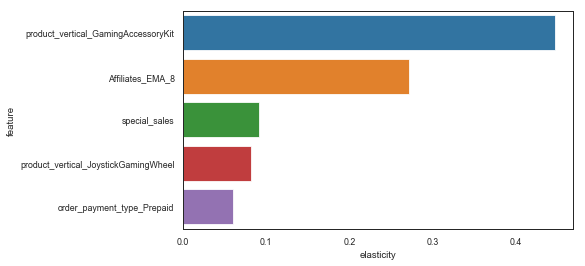

In [490]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

##### Model Evaluation

In [491]:
X_train_rfe.columns

Index(['const', 'order_payment_type_Prepaid', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_JoystickGamingWheel', 'Affiliates_EMA_8'], dtype='object')

In [492]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_MotionController', 'deliverybdays', 'Sponsorship', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'Digital_EMA_8', 'Total Investment_SMA_5', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'product_vertical_GamePad', 'product_vertical_GamingAdapter', 'Radio', 'SEM_SMA_3', 'SEM', 'product_vertical_GamingHeadset', 'product_vertical_GameControlMount', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'product_vertical_GamingMouse', 'Content Marketing_SMA_3', 'Mean Temp', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Content_Marketing_Ad_Stock', 'Total Snow (cm)', 'Online marketing', 'TV_SMA_5', 'product_procurement_sla', 'product_vertical_GamingMousePad', 'TV', 'M

In [493]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

In [494]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ 0.82040357,  0.96444278,  0.92195197,  0.96726063,  0.93826317,
        0.42793495,  0.83152823,  0.97948176,  0.83914454, -0.14567488])

In [495]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [496]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.0026309822027742722
r_square_value : 0.9394894703630638


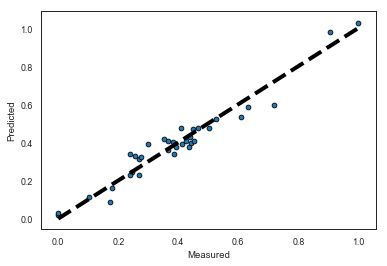

In [497]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## Multiplicative Model

In [498]:
# Making copy of dataframes from the original ones
cam_mul_df = Camera_accessory_org_df.copy()
gam_mul_df = gaming_accessory_org_df.copy()
home_mul_df = Homeaudio_org_df.copy()
home_mul_df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
26 1185712.00      30.67           0.00           0.00 7.00                     1.95                      213.00             793              0                     24                                1                    334.00                            8                             541.00      1958.61                            0                               2         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.33        0.14              0.00   
27 1471962.00      30.37           0.00           0.00 6.71                     1.78                      243.00             936            297                     36                                0                    374.00                           19                             657.00      2016.77                            0                               7         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.53        0.14              0.00   
28 1275392.00      28.88           0.00           0.00 6.82                     1.80                      191.00             909              0                     40                                0                    394.00                           16                             544.00      1896.30                            0                               1         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.65        0.14              0.14   
29  920394.00      28.04           0.00           0.00

In [499]:
# Checking for percentage of null values 

total = pd.DataFrame(home_mul_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(home_mul_df.isnull().sum()/home_mul_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

Total  Percentage
Snow on Grnd (cm)              0        0.00
Digital_SMA_3                  0        0.00
Total Investment_EMA_8         0        0.00
Total_Investment_Ad_Stock      0        0.00
TV                             0        0.00

###### Take the Logarithm of both the Dependent and the independent variables

After taking log, all 0 values will be transformed to inf. Retransforming these values to 0.

In [500]:
cam_mul_df = cam_mul_df.applymap(lambda x: np.log(x))
cam_mul_df = cam_mul_df.replace([np.inf, -np.inf], 0)
cam_mul_df = cam_mul_df.replace(np.nan, 0)

gam_mul_df = gam_mul_df.applymap(lambda x: np.log(x))
gam_mul_df = gam_mul_df.replace([np.inf, -np.inf], 0)
gam_mul_df = gam_mul_df.replace(np.nan, 0)

home_mul_df = home_mul_df.applymap(lambda x: np.log(x))
home_mul_df = home_mul_df.replace([np.inf, -np.inf], 0)
home_mul_df = home_mul_df.replace(np.nan, 0)


home_mul_df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock    TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
26 13.99       3.42           0.00           0.00 1.95                     0.67                        5.36            6.68           0.00                   3.18                             0.00                      5.81                         2.08                               6.29         7.58                         0.00                            0.69      0.00          0.00              1.45                    0.00                    0.00                    1.45                       1.45 -2.92      0.00      0.00     -2.92        -2.92    -0.46           0.00           0.00          -0.46             -0.46         0.62               0.00               0.00               0.62                  0.62               0.00                     0.00                     0.00                     0.00                        0.00             -1.10                    0.00                    0.00                   -1.10                      -1.10       -1.99              0.00   
27 14.20       3.41           0.00           0.00 1.90                     0.58                        5.49            6.84           5.69                   3.58                             0.00                      5.92                         2.94                               6.49         7.61                         0.00                            1.95      0.00          0.00              1.45                    0.00                    0.00                    1.45                       1.92 -2.92      0.00      0.00     -2.92        -2.45    -0.46           0.00           0.00          -0.46              0.01         0.62               0.00               0.00               0.62                  1.09               0.00                     0.00                     0.00                     0.00                        0.00             -1.10                    0.00                    0.00                   -1.10                      -0.63       -1.99              0.00   
28 14.06       3.36           0.00           0.00 1.92                     0.59                        5.25            6.81           0.00                   3.69                             0.00                      5.98                         2.77                               6.30         7.55                         0.00                            0.00      0.00          0.00              1.45                    1.45                    0.00                    1.45                       2.12 -2.92     -2.92      0.00     -2.92        -2.25    -0.46          -0.46           0.00          -0.46              0.22         0.62               0.62               0.00               0.62                  1.29               0.00                     0.00                     0.00                     0.00                        0.00             -1.10                   -1.10                    0.00                   -1.10                      -0.43       -1.99             -1.99   
29 13.73       3.33           0.00           0.00 1.92           

### Camera Accessory - Multiplicative model

##### Splitting the  Dataframe into Training and Testing Sets

In [501]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cam_mul_df, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features

In [502]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [503]:
cam_mul_df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8',
    

In [504]:
num_vars=['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8',
       'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [505]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [506]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [507]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Discount%', 'product_procurement_sla', 'product_mrp', 'is_mass_market', 'product_vertical_CameraBag', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraMicrophone', 'product_vertical_CameraRemoteControl', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Lens', 'Total Investment_EMA_8', 'Online marketing', 'Online marketing_EMA_8', 'Affiliates', 'Affiliates_SMA_5', 'SEM', 'Other_EMA_8', 'Min Temp', 'Mean Temp'], dtype='object')

In [508]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['deliverybdays', 'deliverycdays', 'sla', 'order_payment_type_Prepaid', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMount', 'product_vertical_CameraTripod', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_

In [509]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [510]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     7179.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.70e-21
Time:                        18:44:06   Log-Likelihood:                 168.87
No. Observations:                  33   AIC:                            -295.7
Df Residuals:                      12   BIC:                            -264.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
13                       Online marketing 2743.70
15                             Affiliates 2604.92
0                                   const 1868.73
4                          is_mass_market  733.91
11                  product_vertical_Lens  227.19
12                 Total Investment_EMA_8  167.97
5              product_vertical_CameraBag  141.77
6   product_vertical_CameraBatteryCharger  130.17
10                product_vertical_Filter  116.11
1                               Discount%  112.38
14                 Online marketing_EMA_8  100.17
8    product_vertical_CameraRemoteControl   62.38
16                       Affiliates_SMA_5   47.49
2                 product_procurement_sla   39.65
17                                    SEM   16.42
19                               Min Temp   15.20
3                             product_mrp   12.76
20                              Mean Temp   12.75
7       product_vertical_CameraMicrophone    8.09
9          product_vertical_ExtensionTube    6.33
18                            Other_EMA_8    5.51

In [511]:
X_train_rfe= X_train_rfe.drop(["Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8100.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.95e-23
Time:                        18:44:07   Log-Likelihood:                 168.69
No. Observations:                  33   AIC:                            -297.4
Df Residuals:                      13   BIC:                            -267.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
0                                   const 1781.48
4                          is_mass_market  728.76
11                  product_vertical_Lens  222.11
12                 Total Investment_EMA_8  159.59
5              product_vertical_CameraBag  137.55
6   product_vertical_CameraBatteryCharger  129.86
10                product_vertical_Filter  116.10
1                               Discount%  111.70
13                 Online marketing_EMA_8   85.15
14                             Affiliates   81.10
8    product_vertical_CameraRemoteControl   62.27
15                       Affiliates_SMA_5   40.82
2                 product_procurement_sla   37.75
18                               Min Temp   14.68
3                             product_mrp   12.66
19                              Mean Temp   12.60
16                                    SEM    7.82
7       product_vertical_CameraMicrophone    6.20
9          product_vertical_ExtensionTube    5.88
17                            Other_EMA_8    5.08

In [512]:
# Let's drop featuree with highest p-value
X_train_rfe = X_train_rfe.drop(["product_vertical_Filter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8736.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.85e-25
Time:                        18:44:07   Log-Likelihood:                 167.82
No. Observations:                  33   AIC:                            -297.6
Df Residuals:                      14   BIC:                            -269.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
0                                   const 1423.38
4                          is_mass_market  702.13
10                  product_vertical_Lens  160.10
11                 Total Investment_EMA_8  133.49
5              product_vertical_CameraBag  129.40
6   product_vertical_CameraBatteryCharger  121.12
1                               Discount%  109.87
12                 Online marketing_EMA_8   85.15
13                             Affiliates   60.41
8    product_vertical_CameraRemoteControl   45.57
14                       Affiliates_SMA_5   33.36
2                 product_procurement_sla   31.41
17                               Min Temp   13.07
3                             product_mrp   12.56
18                              Mean Temp   10.54
15                                    SEM    7.63
7       product_vertical_CameraMicrophone    6.19
9          product_vertical_ExtensionTube    5.88
16                            Other_EMA_8    5.02

In [513]:
# Let's drop feature  with highest p-value
X_train_rfe = X_train_rfe.drop(["product_vertical_CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9406.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.10e-27
Time:                        18:44:07   Log-Likelihood:                 166.96
No. Observations:                  33   AIC:                            -297.9
Df Residuals:                      15   BIC:                            -271.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
0                                   const 1419.05
4                          is_mass_market  403.21
10                 Total Investment_EMA_8  122.50
6   product_vertical_CameraBatteryCharger  119.17
5              product_vertical_CameraBag  117.42
9                   product_vertical_Lens  117.30
11                 Online marketing_EMA_8   84.50
1                               Discount%   70.43
12                             Affiliates   57.99
2                 product_procurement_sla   30.77
13                       Affiliates_SMA_5   27.60
16                               Min Temp   13.06
3                             product_mrp   11.01
17                              Mean Temp    9.97
14                                    SEM    7.58
7       product_vertical_CameraMicrophone    6.10
8          product_vertical_ExtensionTube    5.84
15                            Other_EMA_8    4.94

In [514]:
# Let's remove feature with highest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9616.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.79e-29
Time:                        18:44:07   Log-Likelihood:                 165.26
No. Observations:                  33   AIC:                            -296.5
Df Residuals:                      16   BIC:                            -271.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 1390.04
4                      is_mass_market  223.68
5          product_vertical_CameraBag  117.09
8               product_vertical_Lens  114.43
9              Total Investment_EMA_8   75.26
10             Online marketing_EMA_8   68.80
1                           Discount%   64.39
11                         Affiliates   54.41
2             product_procurement_sla   30.77
12                   Affiliates_SMA_5   18.40
15                           Min Temp   12.97
3                         product_mrp    7.74
16                          Mean Temp    6.88
13                                SEM    6.21
7      product_vertical_ExtensionTube    5.43
14                        Other_EMA_8    4.67
6   product_vertical_CameraMicrophone    2.99

In [515]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9218.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.38e-30
Time:                        18:44:07   Log-Likelihood:                 162.50
No. Observations:                  33   AIC:                            -293.0
Df Residuals:                      17   BIC:                            -269.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 1386.50
4                      is_mass_market  164.29
8              Total Investment_EMA_8   74.22
7               product_vertical_Lens   69.43
9              Online marketing_EMA_8   68.79
10                         Affiliates   54.26
1                           Discount%   46.30
2             product_procurement_sla   30.12
11                   Affiliates_SMA_5   17.59
14                           Min Temp   12.95
3                         product_mrp    7.68
15                          Mean Temp    6.72
12                                SEM    6.04
6      product_vertical_ExtensionTube    5.40
13                        Other_EMA_8    4.29
5   product_vertical_CameraMicrophone    2.58

In [516]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     291.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.97e-18
Time:                        18:44:07   Log-Likelihood:                 103.50
No. Observations:                  33   AIC:                            -177.0
Df Residuals:                      18   BIC:                            -154.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 1386.13
7              Total Investment_EMA_8   73.61
8              Online marketing_EMA_8   50.85
9                          Affiliates   40.11
2             product_procurement_sla   30.07
1                           Discount%   20.23
6               product_vertical_Lens   18.08
10                   Affiliates_SMA_5   16.83
13                           Min Temp   12.93
3                         product_mrp    6.80
14                          Mean Temp    6.59
11                                SEM    5.98
5      product_vertical_ExtensionTube    4.90
12                        Other_EMA_8    4.25
4   product_vertical_CameraMicrophone    2.18

In [517]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_mrp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     326.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.83e-19
Time:                        18:44:07   Log-Likelihood:                 103.24
No. Observations:                  33   AIC:                            -178.5
Df Residuals:                      19   BIC:                            -157.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 1347.43
6              Total Investment_EMA_8   70.62
7              Online marketing_EMA_8   34.70
8                          Affiliates   32.71
2             product_procurement_sla   29.11
1                           Discount%   17.19
9                    Affiliates_SMA_5   16.83
5               product_vertical_Lens   16.73
12                           Min Temp   12.65
13                          Mean Temp    6.45
10                                SEM    5.95
4      product_vertical_ExtensionTube    4.90
11                        Other_EMA_8    4.04
3   product_vertical_CameraMicrophone    2.13

In [518]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     356.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.39e-20
Time:                        18:44:08   Log-Likelihood:                 102.56
No. Observations:                  33   AIC:                            -179.1
Df Residuals:                      20   BIC:                            -159.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 100.39
5              Total Investment_EMA_8  37.34
6              Online marketing_EMA_8  30.44
7                          Affiliates  25.16
8                    Affiliates_SMA_5  16.31
4               product_vertical_Lens  14.45
1                           Discount%  12.00
11                           Min Temp   7.83
9                                 SEM   3.57
12                          Mean Temp   3.56
10                        Other_EMA_8   3.49
3      product_vertical_ExtensionTube   3.34
2   product_vertical_CameraMicrophone   1.83

In [519]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Min Temp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     403.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.56e-22
Time:                        18:44:08   Log-Likelihood:                 102.35
No. Observations:                  33   AIC:                            -180.7
Df Residuals:                      21   BIC:                            -162.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                               const 94.65
5              Total Investment_EMA_8 36.92
6              Online marketing_EMA_8 30.31
7                          Affiliates 24.53
4               product_vertical_Lens 13.57
8                    Affiliates_SMA_5 12.72
1                           Discount% 11.26
10                        Other_EMA_8  3.26
9                                 SEM  3.19
11                          Mean Temp  2.79
3      product_vertical_ExtensionTube  2.48
2   product_vertical_CameraMicrophone  1.50

In [520]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Investment_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     444.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.55e-23
Time:                        18:44:08   Log-Likelihood:                 101.61
No. Observations:                  33   AIC:                            -181.2
Df Residuals:                      22   BIC:                            -164.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                               const 88.33
6                          Affiliates 20.07
4               product_vertical_Lens 11.89
5              Online marketing_EMA_8 11.69
1                           Discount%  8.98
7                    Affiliates_SMA_5  8.25
9                         Other_EMA_8  3.25
8                                 SEM  2.72
10                          Mean Temp  2.39
2   product_vertical_CameraMicrophone  1.47
3      product_vertical_ExtensionTube  1.42

In [521]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Mean Temp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     496.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.65e-24
Time:                        18:44:08   Log-Likelihood:                 100.97
No. Observations:                  33   AIC:                            -181.9
Df Residuals:                      23   BIC:                            -167.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 38.58
6                         Affiliates 19.26
4              product_vertical_Lens 11.71
5             Online marketing_EMA_8 11.67
1                          Discount%  8.39
7                   Affiliates_SMA_5  7.10
9                        Other_EMA_8  3.16
8                                SEM  2.37
2  product_vertical_CameraMicrophone  1.46
3     product_vertical_ExtensionTube  1.40

In [522]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Other_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     559.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.39e-25
Time:                        18:44:08   Log-Likelihood:                 100.28
No. Observations:                  33   AIC:                            -182.6
Df Residuals:                      24   BIC:                            -169.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 32.20
6                         Affiliates 14.21
4              product_vertical_Lens  9.35
5             Online marketing_EMA_8  9.04
1                          Discount%  8.24
7                   Affiliates_SMA_5  4.72
8                                SEM  1.80
3     product_vertical_ExtensionTube  1.28
2  product_vertical_CameraMicrophone  1.13

In [523]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     601.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.14e-26
Time:                        18:44:08   Log-Likelihood:                 98.608
No. Observations:                  33   AIC:                            -181.2
Df Residuals:                      25   BIC:                            -169.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 32.13
6                         Affiliates 10.66
4              product_vertical_Lens  9.23
5             Online marketing_EMA_8  7.66
1                          Discount%  7.01
7                   Affiliates_SMA_5  4.56
3     product_vertical_ExtensionTube  1.24
2  product_vertical_CameraMicrophone  1.11

In [524]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     239.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.82e-21
Time:                        18:44:08   Log-Likelihood:                 80.414
No. Observations:                  33   AIC:                            -146.8
Df Residuals:                      26   BIC:                            -136.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 30.91
4              product_vertical_Lens  8.24
1                          Discount%  6.99
6                   Affiliates_SMA_5  4.52
5             Online marketing_EMA_8  2.09
3     product_vertical_ExtensionTube  1.24
2  product_vertical_CameraMicrophone  1.11

In [525]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.19e-22
Time:                        18:44:09   Log-Likelihood:                 78.981
No. Observations:                  33   AIC:                            -146.0
Df Residuals:                      27   BIC:                            -137.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features   VIF
0                           const 30.87
3           product_vertical_Lens  8.03
1                       Discount%  6.66
5                Affiliates_SMA_5  4.52
4          Online marketing_EMA_8  2.08
2  product_vertical_ExtensionTube  1.21

In [526]:
 
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     314.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.85e-23
Time:                        18:44:09   Log-Likelihood:                 77.090
No. Observations:                  33   AIC:                            -144.2
Df Residuals:                      28   BIC:                            -136.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features   VIF
0                           const 30.29
3           product_vertical_Lens  7.95
1                       Discount%  6.51
4                Affiliates_SMA_5  3.74
2  product_vertical_ExtensionTube  1.16

In [527]:
 
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_ExtensionTube"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     382.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.09e-23
Time:                        18:44:09   Log-Likelihood:                 75.035
No. Observations:                  33   AIC:                            -142.1
Df Residuals:                      29   BIC:                            -136.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

Features   VIF
0                  const 30.28
2  product_vertical_Lens  7.67
1              Discount%  6.51
3       Affiliates_SMA_5  3.25

In [528]:
X_train_rfe.columns

Index(['Discount%', 'product_vertical_Lens', 'Affiliates_SMA_5'], dtype='object')

In [529]:
X_train_rfe.columns

Index(['Discount%', 'product_vertical_Lens', 'Affiliates_SMA_5'], dtype='object')

In [530]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_FlashShoeAdapter', 'deliverybdays', 'special_sales', 'Sponsorship', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'product_vertical_CameraBatteryCharger', 'product_vertical_Telescope', 'Digital_EMA_8', 'Total Investment_SMA_5', 'product_vertical_ExtensionTube', 'TV_SMA_3', 'Total Precip (mm)', 'product_vertical_CameraBattery', 'Total Investment', 'Cool Deg Days', 'Radio', 'SEM_SMA_3', 'SEM', 'product_vertical_CameraAccessory', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'product_vertical_CameraEyeCup', 'Affiliates_EMA_8', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'pay_week', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'product_vertical_Filter', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'Content Marketing_SMA_3', 'Mean Temp', 'SEM_Ad_Stock

In [531]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ -0.87982885,   0.84685814,   0.24226332,   0.9662466 ,
        -6.57255034,  -2.3273354 ,  -1.88837593,   0.7289597 ,
        -0.03191363, -12.68724606])

In [532]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [533]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004832480829266627
r_square_value : 0.807945532821132


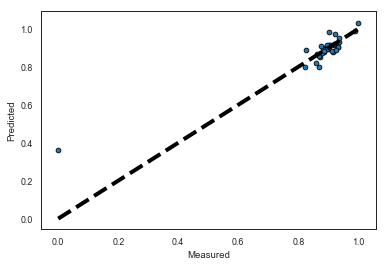

In [534]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Elasticity Analysis

In [535]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

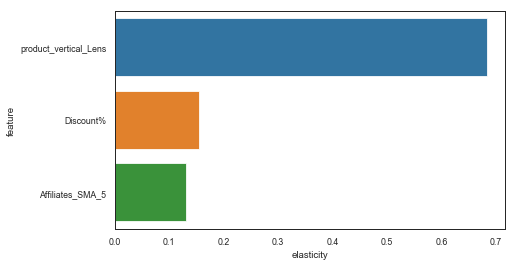

In [536]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
 

### Gaming Accessory - Multiplicative model

###### Splitting the Dataframe into Training and Testing Sets

In [537]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(gam_mul_df, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features

In [538]:
from sklearn.preprocessing import MinMaxScaler

In [539]:
scaler = MinMaxScaler()

In [540]:
gam_mul_df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship',
       'Spo

In [541]:
num_vars=['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 
'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 
'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 
'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 
'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 
'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 
'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 
'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 
'Snow on Grnd (cm)']

In [542]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [543]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [544]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [545]:
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [546]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['deliverybdays', 'sla', 'product_procurement_sla', 'is_mass_market', 'product_mrp', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_TVOutCableAccessory', 'Total Investment_SMA_5', 'TV_SMA_5', 'Digital', 'Digital_SMA_3', 'Content Marketing_EMA_8', 'Online marketing', 'Online_marketing_Ad_Stock', 'Radio', 'Min Temp', 'Heat Deg Days'], dtype='object')

In [547]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverycdays', 'order_payment_type_Prepaid', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'special_sales', 'product_vertical_GamingChargingStation', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content_Marketing_Ad_Stock', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8',
      

In [548]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [549]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1954.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.61e-21
Time:                        18:44:14   Log-Likelihood:                 145.25
No. Observations:                  35   AIC:                            -248.5
Df Residuals:                      14   BIC:                            -215.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 611.56
4                         is_mass_market 261.12
17             Online_marketing_Ad_Stock 234.65
16                      Online marketing 115.98
6    product_vertical_GamingAccessoryKit  95.27
8         product_vertical_GamingHeadset  82.94
11                Total Investment_SMA_5  66.18
7         product_vertical_GamingAdapter  49.40
10  product_vertical_TVOutCableAccessory  48.09
12                              TV_SMA_5  38.40
9        product_vertical_GamingKeyboard  21.57
20                         Heat Deg Days  15.05
19                              Min Temp  12.65
14                         Digital_SMA_3  11.06
13                               Digital   8.28
3                product_procurement_sla   8.02
15               Content Marketing_EMA_8   6.64
5                            product_mrp   5.66
2                                    sla   3.82
1                          deliverybdays   3.20
18                                 Radio   2.59

In [550]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Min Temp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2158.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.08e-22
Time:                        18:44:14   Log-Likelihood:                 144.88
No. Observations:                  35   AIC:                            -249.8
Df Residuals:                      15   BIC:                            -218.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 473.31
4                         is_mass_market 245.28
17             Online_marketing_Ad_Stock 210.15
16                      Online marketing 111.38
6    product_vertical_GamingAccessoryKit  94.70
8         product_vertical_GamingHeadset  80.91
11                Total Investment_SMA_5  61.42
7         product_vertical_GamingAdapter  48.64
10  product_vertical_TVOutCableAccessory  47.04
12                              TV_SMA_5  38.22
9        product_vertical_GamingKeyboard  21.57
14                         Digital_SMA_3  11.06
13                               Digital   8.17
3                product_procurement_sla   7.54
15               Content Marketing_EMA_8   6.64
19                         Heat Deg Days   5.90
5                            product_mrp   5.64
2                                    sla   3.51
1                          deliverybdays   3.11
18                                 Radio   2.59

In [551]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2375.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.93e-24
Time:                        18:44:15   Log-Likelihood:                 144.48
No. Observations:                  35   AIC:                            -251.0
Df Residuals:                      16   BIC:                            -221.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 408.36
4                         is_mass_market 196.90
16             Online_marketing_Ad_Stock 186.63
15                      Online marketing 108.59
7         product_vertical_GamingHeadset  77.62
10                Total Investment_SMA_5  59.18
6         product_vertical_GamingAdapter  46.13
9   product_vertical_TVOutCableAccessory  43.20
11                              TV_SMA_5  29.90
8        product_vertical_GamingKeyboard  16.89
13                         Digital_SMA_3  10.56
12                               Digital   7.79
3                product_procurement_sla   7.29
14               Content Marketing_EMA_8   5.98
5                            product_mrp   5.41
18                         Heat Deg Days   3.67
2                                    sla   3.12
1                          deliverybdays   2.70
17                                 Radio   2.48

In [552]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2640.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.03e-25
Time:                        18:44:15   Log-Likelihood:                 144.27
No. Observations:                  35   AIC:                            -252.5
Df Residuals:                      17   BIC:                            -224.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 330.45
15             Online_marketing_Ad_Stock 183.90
4                         is_mass_market 166.53
14                      Online marketing  82.90
7         product_vertical_GamingHeadset  76.38
9                 Total Investment_SMA_5  51.29
6         product_vertical_GamingAdapter  43.21
8   product_vertical_TVOutCableAccessory  41.59
10                              TV_SMA_5  17.62
12                         Digital_SMA_3   9.31
11                               Digital   6.60
3                product_procurement_sla   6.29
13               Content Marketing_EMA_8   5.56
5                            product_mrp   5.21
2                                    sla   3.10
17                         Heat Deg Days   3.07
1                          deliverybdays   2.44
16                                 Radio   2.07

In [553]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2847.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.67e-27
Time:                        18:44:15   Log-Likelihood:                 143.54
No. Observations:                  35   AIC:                            -253.1
Df Residuals:                      18   BIC:                            -226.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 299.05
4                         is_mass_market 161.99
14             Online_marketing_Ad_Stock 117.80
7         product_vertical_GamingHeadset  74.98
9                 Total Investment_SMA_5  50.89
6         product_vertical_GamingAdapter  40.28
8   product_vertical_TVOutCableAccessory  35.64
10                              TV_SMA_5  16.59
12                         Digital_SMA_3   9.29
11                               Digital   6.54
3                product_procurement_sla   5.34
13               Content Marketing_EMA_8   5.04
5                            product_mrp   5.01
16                         Heat Deg Days   3.07
2                                    sla   3.06
1                          deliverybdays   2.43
15                                 Radio   1.87

In [554]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Digital_SMA_3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2955.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.93e-29
Time:                        18:44:15   Log-Likelihood:                 142.11
No. Observations:                  35   AIC:                            -252.2
Df Residuals:                      19   BIC:                            -227.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 290.04
4                         is_mass_market 151.29
13             Online_marketing_Ad_Stock  83.32
7         product_vertical_GamingHeadset  74.98
8   product_vertical_TVOutCableAccessory  35.59
6         product_vertical_GamingAdapter  32.26
9                 Total Investment_SMA_5  30.67
10                              TV_SMA_5  11.42
3                product_procurement_sla   5.12
12               Content Marketing_EMA_8   4.84
5                            product_mrp   4.63
15                         Heat Deg Days   3.04
2                                    sla   2.95
11                               Digital   2.90
1                          deliverybdays   2.37
14                                 Radio   1.73

In [555]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3190.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.58e-30
Time:                        18:44:15   Log-Likelihood:                 141.34
No. Observations:                  35   AIC:                            -252.7
Df Residuals:                      20   BIC:                            -229.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 277.90
4                         is_mass_market 146.09
7         product_vertical_GamingHeadset  44.07
8   product_vertical_TVOutCableAccessory  32.90
12             Online_marketing_Ad_Stock  28.74
6         product_vertical_GamingAdapter  21.24
9                 Total Investment_SMA_5  17.51
3                product_procurement_sla   5.11
5                            product_mrp   4.59
11               Content Marketing_EMA_8   4.44
2                                    sla   2.91
10                               Digital   2.90
14                         Heat Deg Days   2.84
1                          deliverybdays   2.34
13                                 Radio   1.59

In [556]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online_marketing_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3587.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.41e-32
Time:                        18:44:16   Log-Likelihood:                 141.25
No. Observations:                  35   AIC:                            -254.5
Df Residuals:                      21   BIC:                            -232.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 277.87
4                         is_mass_market 118.08
7         product_vertical_GamingHeadset  40.14
8   product_vertical_TVOutCableAccessory  31.39
6         product_vertical_GamingAdapter  20.05
3                product_procurement_sla   5.10
9                 Total Investment_SMA_5   4.47
5                            product_mrp   4.44
11               Content Marketing_EMA_8   3.36
10                               Digital   2.85
2                                    sla   2.45
13                         Heat Deg Days   2.42
1                          deliverybdays   2.29
12                                 Radio   1.51

In [557]:

# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3896.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.09e-33
Time:                        18:44:16   Log-Likelihood:                 140.48
No. Observations:                  35   AIC:                            -255.0
Df Residuals:                      22   BIC:                            -234.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 262.79
4                         is_mass_market 100.76
6         product_vertical_GamingHeadset  39.66
7   product_vertical_TVOutCableAccessory  31.13
3                product_procurement_sla   5.09
5                            product_mrp   4.43
8                 Total Investment_SMA_5   4.15
10               Content Marketing_EMA_8   3.31
9                                Digital   2.77
12                         Heat Deg Days   2.41
2                                    sla   2.32
1                          deliverybdays   2.14
11                                 Radio   1.42

In [558]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4133.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.62e-35
Time:                        18:44:16   Log-Likelihood:                 139.21
No. Observations:                  35   AIC:                            -254.4
Df Residuals:                      23   BIC:                            -235.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 222.53
3                         is_mass_market  59.09
5         product_vertical_GamingHeadset  32.80
6   product_vertical_TVOutCableAccessory  22.95
2                product_procurement_sla   5.02
7                 Total Investment_SMA_5   4.14
4                            product_mrp   4.08
9                Content Marketing_EMA_8   3.06
8                                Digital   2.76
11                         Heat Deg Days   2.32
1                          deliverybdays   2.12
10                                 Radio   1.40

In [559]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Investment_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4447.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.10e-36
Time:                        18:44:16   Log-Likelihood:                 138.08
No. Observations:                  35   AIC:                            -254.2
Df Residuals:                      24   BIC:                            -237.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                  const 168.32
3                         is_mass_market  51.41
5         product_vertical_GamingHeadset  23.48
6   product_vertical_TVOutCableAccessory  22.90
2                product_procurement_sla   4.32
4                            product_mrp   4.04
8                Content Marketing_EMA_8   2.61
7                                Digital   2.35
1                          deliverybdays   2.08
10                         Heat Deg Days   1.97
9                                  Radio   1.40

In [560]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Heat Deg Days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4886.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.84e-38
Time:                        18:44:16   Log-Likelihood:                 137.17
No. Observations:                  35   AIC:                            -254.3
Df Residuals:                      25   BIC:                            -238.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                 const 156.06
3                        is_mass_market  51.07
6  product_vertical_TVOutCableAccessory  22.58
5        product_vertical_GamingHeadset  17.67
4                           product_mrp   4.00
2               product_procurement_sla   3.56
8               Content Marketing_EMA_8   2.58
7                               Digital   2.32
1                         deliverybdays   2.07
9                                 Radio   1.38

In [561]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4926.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.49e-39
Time:                        18:44:17   Log-Likelihood:                 134.57
No. Observations:                  35   AIC:                            -251.1
Df Residuals:                      26   BIC:                            -237.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                 const 142.02
3                        is_mass_market  50.75
6  product_vertical_TVOutCableAccessory  22.57
5        product_vertical_GamingHeadset  17.47
4                           product_mrp   3.71
2               product_procurement_sla   3.56
8               Content Marketing_EMA_8   2.56
7                               Digital   2.15
1                         deliverybdays   2.06

In [562]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     210.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.45e-22
Time:                        18:44:17   Log-Likelihood:                 76.670
No. Observations:                  35   AIC:                            -137.3
Df Residuals:                      27   BIC:                            -124.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                 const 140.90
4        product_vertical_GamingHeadset   8.01
5  product_vertical_TVOutCableAccessory   6.44
3                           product_mrp   3.55
2               product_procurement_sla   3.47
6                               Digital   2.15
1                         deliverybdays   1.98
7               Content Marketing_EMA_8   1.91

In [563]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["deliverybdays"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     252.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.82e-23
Time:                        18:44:17   Log-Likelihood:                 76.567
No. Observations:                  35   AIC:                            -139.1
Df Residuals:                      28   BIC:                            -128.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                 const 114.79
3        product_vertical_GamingHeadset   7.96
4  product_vertical_TVOutCableAccessory   6.17
2                           product_mrp   3.53
1               product_procurement_sla   3.31
6               Content Marketing_EMA_8   1.88
5                               Digital   1.40

In [564]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     301.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.58e-24
Time:                        18:44:17   Log-Likelihood:                 75.865
No. Observations:                  35   AIC:                            -139.7
Df Residuals:                      29   BIC:                            -130.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                 const 114.34
3        product_vertical_GamingHeadset   7.85
4  product_vertical_TVOutCableAccessory   5.54
2                           product_mrp   3.51
1               product_procurement_sla   3.31
5               Content Marketing_EMA_8   1.57

In [565]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     347.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.15e-24
Time:                        18:44:17   Log-Likelihood:                 73.913
No. Observations:                  35   AIC:                            -137.8
Df Residuals:                      30   BIC:                            -130.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 47.17
2        product_vertical_GamingHeadset  7.62
3  product_vertical_TVOutCableAccessory  5.40
1                           product_mrp  2.89
4               Content Marketing_EMA_8  1.57

In [566]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingHeadset"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     292.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.25e-23
Time:                        18:44:18   Log-Likelihood:                 65.494
No. Observations:                  35   AIC:                            -123.0
Df Residuals:                      31   BIC:                            -116.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 45.79
1                           product_mrp  2.06
2  product_vertical_TVOutCableAccessory  1.68
3               Content Marketing_EMA_8  1.57

In [567]:
X_train_rfe.columns

Index(['product_mrp', 'product_vertical_TVOutCableAccessory', 'Content Marketing_EMA_8'], dtype='object')

In [568]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)


['product_vertical_MotionController', 'deliverybdays', 'special_sales', 'Sponsorship', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'Digital_EMA_8', 'Total Investment_SMA_5', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'product_vertical_GamePad', 'product_vertical_GamingAdapter', 'Radio', 'SEM_SMA_3', 'SEM', 'product_vertical_GamingHeadset', 'product_vertical_GameControlMount', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'Affiliates_EMA_8', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'Total_Investment_Ad_Stock', 'product_vertical_GamingMouse', 'Content Marketing_SMA_3', 'Mean Temp', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Content_Marketing_Ad_Stock', 'Total Snow (cm)', 'Online marketing', 'TV_SMA_5', 'product_procurement_sla', 'product_vertical_GamingMousePad'

In [569]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ 0.61155455,  0.76629506,  0.17148762,  0.969443  ,  0.97378159,
       -4.61277277, -1.17718627,  0.81485756,  0.74768691, -3.1802096 ])

In [570]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [571]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0019085100448902373
r_square_value : 0.9530332296271867


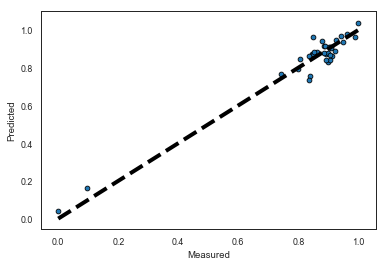

In [572]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Elasticity Analysis

In [573]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

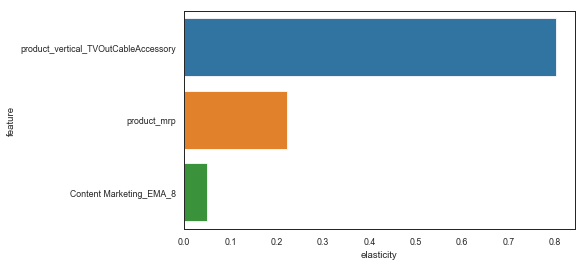

In [574]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Home Audio - Multiplicative model

###### Splitting the Dataframe into Training and Testing Sets

In [575]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(home_mul_df, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features

In [576]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [577]:
home_mul_df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
    

In [578]:
num_vars=['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'product_vertical_SoundMixer', 
'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week', 'Total Investment', 
'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 
'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 
'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship',
 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 
 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 
 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 
 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 
 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 
 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 
 'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 
 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 
 'Snow on Grnd (cm)']

In [579]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [580]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train


In [581]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [582]:
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [583]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'Total Investment', 'Digital_SMA_3', 'Sponsorship_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing_SMA_5', 'Affiliates_SMA_5', 'SEM_Ad_Stock', 'Radio_EMA_8', 'Other_Ad_Stock', 'Stock Index', 'Stock Index_SMA_5', 'Max Temp'], dtype='object')

In [584]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverybdays', 'deliverycdays', 'product_procurement_sla', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'NPS', 'NPS_SMA_3',
       'N

In [585]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [586]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [587]:
lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8513.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.13e-22
Time:                        18:44:22   Log-Likelihood:                 170.33
No. Observations:                  33   AIC:                            -298.7
Df Residuals:                      12   BIC:                            -267.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features      VIF
0                               const 18122.13
3                      is_mass_market  4017.33
13             Online marketing_SMA_5  3127.05
14                   Affiliates_SMA_5  1543.48
6   product_vertical_HomeAudioSpeaker   928.81
19                  Stock Index_SMA_5   926.25
4            product_vertical_FMRadio   718.99
11            Content Marketing_EMA_8   171.54
15                       SEM_Ad_Stock    86.42
12         Content_Marketing_Ad_Stock    85.63
2          order_payment_type_Prepaid    68.84
8                    Total Investment    39.69
7                         product_mrp    34.91
10                  Sponsorship_SMA_5    28.90
16                        Radio_EMA_8    18.20
18                        Stock Index    13.33
9                       Digital_SMA_3    11.97
5         product_vertical_HiFiSystem    11.94
1                                 sla    10.46
17                     Other_Ad_Stock     9.45
20                           Max Temp     4.69

In [588]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9700.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.05e-24
Time:                        18:44:22   Log-Likelihood:                 170.31
No. Observations:                  33   AIC:                            -300.6
Df Residuals:                      13   BIC:                            -270.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 7735.90
12             Online marketing_SMA_5 1618.05
13                   Affiliates_SMA_5  857.99
18                  Stock Index_SMA_5  419.72
10            Content Marketing_EMA_8  159.31
5   product_vertical_HomeAudioSpeaker  138.61
3            product_vertical_FMRadio   95.69
14                       SEM_Ad_Stock   85.60
11         Content_Marketing_Ad_Stock   83.44
2          order_payment_type_Prepaid   63.20
7                    Total Investment   39.53
6                         product_mrp   27.68
9                   Sponsorship_SMA_5   23.57
15                        Radio_EMA_8   14.47
17                        Stock Index   11.97
8                       Digital_SMA_3   11.94
4         product_vertical_HiFiSystem   11.65
16                     Other_Ad_Stock    9.33
1                                 sla    7.42
19                           Max Temp    4.60

In [589]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Content_Marketing_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.16e-26
Time:                        18:44:23   Log-Likelihood:                 169.42
No. Observations:                  33   AIC:                            -300.8
Df Residuals:                      14   BIC:                            -272.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 7672.49
11             Online marketing_SMA_5 1519.19
12                   Affiliates_SMA_5  791.78
17                  Stock Index_SMA_5  408.70
5   product_vertical_HomeAudioSpeaker  110.85
3            product_vertical_FMRadio   95.67
10            Content Marketing_EMA_8   92.40
13                       SEM_Ad_Stock   78.81
2          order_payment_type_Prepaid   42.54
6                         product_mrp   27.37
7                    Total Investment   26.81
9                   Sponsorship_SMA_5   22.68
4         product_vertical_HiFiSystem   11.18
14                        Radio_EMA_8   10.64
8                       Digital_SMA_3   10.36
16                        Stock Index    8.00
1                                 sla    7.01
15                     Other_Ad_Stock    6.12
18                           Max Temp    4.44

In [590]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.10e-27
Time:                        18:44:23   Log-Likelihood:                 168.51
No. Observations:                  33   AIC:                            -301.0
Df Residuals:                      15   BIC:                            -274.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 5143.92
11             Online marketing_SMA_5 1413.04
12                   Affiliates_SMA_5  707.85
16                  Stock Index_SMA_5  349.46
5   product_vertical_HomeAudioSpeaker   98.45
3            product_vertical_FMRadio   85.02
10            Content Marketing_EMA_8   49.93
2          order_payment_type_Prepaid   42.52
6                         product_mrp   23.36
9                   Sponsorship_SMA_5   13.41
13                        Radio_EMA_8   10.60
8                       Digital_SMA_3    9.80
7                    Total Investment    9.73
4         product_vertical_HiFiSystem    9.54
1                                 sla    6.37
14                     Other_Ad_Stock    4.49
17                           Max Temp    4.21
15                        Stock Index    4.11

In [591]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Content Marketing_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.210e+04
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.40e-29
Time:                        18:44:23   Log-Likelihood:                 167.70
No. Observations:                  33   AIC:                            -301.4
Df Residuals:                      16   BIC:                            -276.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 4684.11
10             Online marketing_SMA_5 1269.72
11                   Affiliates_SMA_5  685.76
15                  Stock Index_SMA_5  287.86
5   product_vertical_HomeAudioSpeaker   96.83
3            product_vertical_FMRadio   83.11
2          order_payment_type_Prepaid   22.58
6                         product_mrp   19.07
9                   Sponsorship_SMA_5   13.03
4         product_vertical_HiFiSystem    8.63
7                    Total Investment    7.69
12                        Radio_EMA_8    6.11
1                                 sla    6.02
14                        Stock Index    4.07
16                           Max Temp    3.91
8                       Digital_SMA_3    3.13
13                     Other_Ad_Stock    2.86

In [592]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Investment"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.20e-31
Time:                        18:44:23   Log-Likelihood:                 166.45
No. Observations:                  33   AIC:                            -300.9
Df Residuals:                      17   BIC:                            -277.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 4667.36
9              Online marketing_SMA_5 1258.29
10                   Affiliates_SMA_5  678.22
14                  Stock Index_SMA_5  287.42
5   product_vertical_HomeAudioSpeaker   94.95
3            product_vertical_FMRadio   79.14
2          order_payment_type_Prepaid   22.44
6                         product_mrp   18.85
8                   Sponsorship_SMA_5   12.52
4         product_vertical_HiFiSystem    8.04
11                        Radio_EMA_8    5.94
1                                 sla    5.59
15                           Max Temp    3.91
7                       Digital_SMA_3    3.05
13                        Stock Index    3.01
12                     Other_Ad_Stock    2.86

In [593]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.354e+04
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.14e-33
Time:                        18:44:23   Log-Likelihood:                 165.41
No. Observations:                  33   AIC:                            -300.8
Df Residuals:                      18   BIC:                            -278.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 2781.91
8              Online marketing_SMA_5  937.79
9                    Affiliates_SMA_5  498.36
13                  Stock Index_SMA_5  204.11
3            product_vertical_FMRadio   68.02
4   product_vertical_HomeAudioSpeaker   45.06
2          order_payment_type_Prepaid   22.24
5                         product_mrp   18.69
7                   Sponsorship_SMA_5   11.93
1                                 sla    5.18
10                        Radio_EMA_8    4.98
14                           Max Temp    3.88
6                       Digital_SMA_3    2.89
11                     Other_Ad_Stock    2.79
12                        Stock Index    2.07

In [594]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3155.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.42e-29
Time:                        18:44:23   Log-Likelihood:                 139.26
No. Observations:                  33   AIC:                            -250.5
Df Residuals:                      19   BIC:                            -229.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 1028.94
3            product_vertical_FMRadio   65.11
4   product_vertical_HomeAudioSpeaker   38.34
5                         product_mrp   18.06
2          order_payment_type_Prepaid   11.40
7                   Sponsorship_SMA_5    8.66
8                    Affiliates_SMA_5    7.74
12                  Stock Index_SMA_5    7.12
9                         Radio_EMA_8    4.91
1                                 sla    4.48
13                           Max Temp    3.84
6                       Digital_SMA_3    2.85
10                     Other_Ad_Stock    2.42
11                        Stock Index    1.80

In [595]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3586.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.40e-30
Time:                        18:44:23   Log-Likelihood:                 139.21
No. Observations:                  33   AIC:                            -252.4
Df Residuals:                      20   BIC:                            -233.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
0                               const 1028.17
3            product_vertical_FMRadio   60.98
4   product_vertical_HomeAudioSpeaker   34.37
5                         product_mrp   17.43
2          order_payment_type_Prepaid   11.40
7                   Sponsorship_SMA_5    8.59
8                    Affiliates_SMA_5    7.40
11                  Stock Index_SMA_5    7.10
9                         Radio_EMA_8    4.71
1                                 sla    4.42
12                           Max Temp    3.84
6                       Digital_SMA_3    2.81
10                     Other_Ad_Stock    1.97

In [596]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Affiliates_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4097.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.17e-32
Time:                        18:44:23   Log-Likelihood:                 139.17
No. Observations:                  33   AIC:                            -254.3
Df Residuals:                      21   BIC:                            -236.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 909.35
3            product_vertical_FMRadio  60.67
4   product_vertical_HomeAudioSpeaker  34.02
5                         product_mrp  17.37
2          order_payment_type_Prepaid  11.38
7                   Sponsorship_SMA_5   7.86
10                  Stock Index_SMA_5   6.71
8                         Radio_EMA_8   4.69
1                                 sla   3.92
11                           Max Temp   3.03
6                       Digital_SMA_3   2.74
9                      Other_Ad_Stock   1.80

In [597]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["order_payment_type_Prepaid"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4568.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.38e-34
Time:                        18:44:24   Log-Likelihood:                 138.63
No. Observations:                  33   AIC:                            -255.3
Df Residuals:                      22   BIC:                            -238.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 909.05
2            product_vertical_FMRadio  45.43
3   product_vertical_HomeAudioSpeaker  33.79
4                         product_mrp  16.32
6                   Sponsorship_SMA_5   6.48
9                   Stock Index_SMA_5   6.07
7                         Radio_EMA_8   4.13
1                                 sla   3.88
10                           Max Temp   2.98
5                       Digital_SMA_3   2.69
8                      Other_Ad_Stock   1.72

In [598]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Sponsorship_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5063.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.92e-36
Time:                        18:44:24   Log-Likelihood:                 137.85
No. Observations:                  33   AIC:                            -255.7
Df Residuals:                      23   BIC:                            -240.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 903.66
2           product_vertical_FMRadio  44.31
3  product_vertical_HomeAudioSpeaker  33.29
4                        product_mrp  14.42
6                        Radio_EMA_8   4.06
1                                sla   3.88
8                  Stock Index_SMA_5   2.92
9                           Max Temp   2.34
5                      Digital_SMA_3   1.66
7                     Other_Ad_Stock   1.63

In [599]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Digital_SMA_3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5779.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.73e-37
Time:                        18:44:24   Log-Likelihood:                 137.39
No. Observations:                  33   AIC:                            -256.8
Df Residuals:                      24   BIC:                            -243.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 848.82
2           product_vertical_FMRadio  43.99
3  product_vertical_HomeAudioSpeaker  33.04
4                        product_mrp  13.49
1                                sla   3.88
5                        Radio_EMA_8   3.38
7                  Stock Index_SMA_5   2.78
8                           Max Temp   2.31
6                     Other_Ad_Stock   1.62

In [600]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Radio_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5980.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.15e-38
Time:                        18:44:24   Log-Likelihood:                 135.08
No. Observations:                  33   AIC:                            -254.2
Df Residuals:                      25   BIC:                            -242.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 757.34
2           product_vertical_FMRadio  39.08
3  product_vertical_HomeAudioSpeaker  31.84
4                        product_mrp  10.31
6                  Stock Index_SMA_5   2.30
7                           Max Temp   2.30
1                                sla   1.71
5                     Other_Ad_Stock   1.32

In [601]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Other_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6877.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.57e-40
Time:                        18:44:24   Log-Likelihood:                 134.19
No. Observations:                  33   AIC:                            -254.4
Df Residuals:                      26   BIC:                            -243.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 706.33
2           product_vertical_FMRadio  38.83
3  product_vertical_HomeAudioSpeaker  31.83
4                        product_mrp  10.17
5                  Stock Index_SMA_5   2.29
6                           Max Temp   1.97
1                                sla   1.66

In [602]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7882.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.09e-42
Time:                        18:44:24   Log-Likelihood:                 132.81
No. Observations:                  33   AIC:                            -253.6
Df Residuals:                      27   BIC:                            -244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 256.03
2           product_vertical_FMRadio  38.75
3  product_vertical_HomeAudioSpeaker  28.80
4                        product_mrp   6.42
1                                sla   1.57
5                           Max Temp   1.47

In [603]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Max Temp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9570.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.86e-43
Time:                        18:44:25   Log-Likelihood:                 131.73
No. Observations:                  33   AIC:                            -253.5
Df Residuals:                      28   BIC:                            -246.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 230.14
2           product_vertical_FMRadio  30.77
3  product_vertical_HomeAudioSpeaker  20.97
4                        product_mrp   6.17
1                                sla   1.33

In [604]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1473.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.91e-32
Time:                        18:44:25   Log-Likelihood:                 95.624
No. Observations:                  33   AIC:                            -183.2
Df Residuals:                      29   BIC:                            -177.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 161.45
3                        product_mrp   3.63
2  product_vertical_HomeAudioSpeaker   3.61
1                                sla   1.24

In [605]:
X_train_rfe.columns

Index(['sla', 'product_vertical_HomeAudioSpeaker', 'product_mrp'], dtype='object')

In [606]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['deliverybdays', 'special_sales', 'Sponsorship', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'product_vertical_HiFiSystem', 'Digital_EMA_8', 'Total Investment_SMA_5', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'Radio', 'SEM_SMA_3', 'SEM', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'Affiliates_EMA_8', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'pay_week', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'Content Marketing_EMA_8', 'product_vertical_VoiceRecorder', 'Total_Investment_Ad_Stock', 'Content Marketing_SMA_3', 'Mean Temp', 'Radio_EMA_8', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Content_Marketing_Ad_Stock', 'Total Snow (cm)', 'Online marketing', 'TV_SMA_5', 'product_procurement_sla', 'TV', 'Min Temp', 'holiday_week', 'Online marketing_SMA_3', 'SEM_EMA_8', 'Digital_SMA_3', 'Radio_SMA_3', 'product_vertical_

In [607]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ 0.27181642,  0.12338534,  0.81116529,  0.84574728,  0.75275641,
        0.38031694,  0.1799935 ,  0.833717  , -0.61921653,  0.51849539])

In [608]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [609]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.002825555671366571
r_square_value : 0.8965377741778603


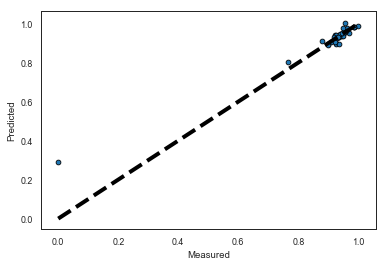

In [610]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Elasticity Analysis

In [611]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

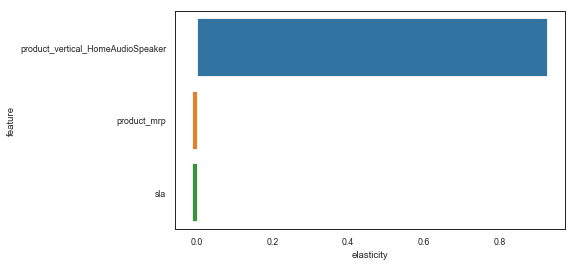

In [612]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## Koyck Model

In [613]:
# Making copy of dataframes from the original ones
cam_koy_df = Camera_accessory_org_df.copy()
gam_koy_df = gaming_accessory_org_df.copy()
home_koy_df = Homeaudio_org_df.copy()
home_koy_df.head() 

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
26 1185712.00      30.67           0.00           0.00 7.00                     1.95                      213.00             793              0                     24                                1                    334.00                            8                             541.00      1958.61                            0                               2         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.33        0.14              0.00   
27 1471962.00      30.37           0.00           0.00 6.71                     1.78                      243.00             936            297                     36                                0                    374.00                           19                             657.00      2016.77                            0                               7         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.53        0.14              0.00   
28 1275392.00      28.88           0.00           0.00 6.82                     1.80                      191.00             909              0                     40                                0                    394.00                           16                             544.00      1896.30                            0                               1         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.65        0.14              0.14   
29  920394.00      28.04           0.00           0.00

In [614]:
def createKyockKPI(df):
    df['gmv_lag'] = df['gmv'].shift(1)
    return df.fillna(0)

###### Camera Accessory - Kyock's Model

In [615]:
# adding lag variable in the camera data set
df = createKyockKPI(cam_koy_df)
df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
26 1088715.00      45.59           0.00           0.00 6.36                     2.08      1143.14                      566.00            1734                                39              0                      260.00                          349.00                                 167.00                                   7                              0                                 0                               0                                  0                             3                                 70.00                         349.00                               0                   164.00                    8.00                                  0                 263.00                                   0                         0                      13                           4         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05   
27 1203752.00      47.02           0.00           0.00 6.06                     2.10      1197.19                      649.00            2005                                31            578                      284.00                          428.00                                 179.00                                   4                              0                                 0                               0                                  0                            10                                 85.00                         408.00                               0                   142.00                   11.00                                  0                 293.00                                   0                         0                      22                          15         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05   
28 1183338.00      44.83           0.00           0.00 6.17                     2.12      1162.70                      606.00            1991                                43              0                      223.00                          455.00                                 218.00                                   4                              0                                 0                               0                                  0                             7                                 68.00                         370.00                               0                   148.00                    7.00                                  0                 325.00                                   0                         0                      21                          23         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05   
29  813136.00      44.89           0.00           0.00

In [616]:
df.shape

(48, 99)

In [617]:
df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
26 1088715.00      45.59           0.00           0.00 6.36                     2.08      1143.14                      566.00            1734                                39              0                      260.00                          349.00                                 167.00                                   7                              0                                 0                               0                                  0                             3                                 70.00                         349.00                               0                   164.00                    8.00                                  0                 263.00                                   0                         0                      13                           4         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05   
27 1203752.00      47.02           0.00           0.00 6.06                     2.10      1197.19                      649.00            2005                                31            578                      284.00                          428.00                                 179.00                                   4                              0                                 0                               0                                  0                            10                                 85.00                         408.00                               0                   142.00                   11.00                                  0                 293.00                                   0                         0                      22                          15         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05   
28 1183338.00      44.83           0.00           0.00 6.17                     2.12      1162.70                      606.00            1991                                43              0                      223.00                          455.00                                 218.00                                   4                              0                                 0                               0                                  0                             7                                 68.00                         370.00                               0                   148.00                    7.00                                  0                 325.00                                   0                         0                      21                          23         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05   
29  813136.00      44.89           0.00           0.00

In [618]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [619]:
scaler = MinMaxScaler()

In [620]:
df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8',
    

In [621]:
num_vars=['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8',
       'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [622]:
y_train = df_train.pop('gmv')
X_train = df_train

In [623]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [624]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraBatteryCharger', 'product_vertical_CameraFilmRolls', 'product_vertical_CameraMicrophone', 'product_vertical_CameraMount', 'product_vertical_CameraTripod', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter', 'TV_EMA_8', 'TV_Ad_Stock', 'Online marketing', 'Affiliates', 'SEM_SMA_3', 'NPS', 'gmv_lag'], dtype='object')

In [625]:
# negelecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverybdays', 'deliverycdays', 'product_procurement_sla', 'product_vertical_CameraAccessory', 'special_sales', 'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup', 'product_vertical_CameraHousing', 'product_vertical_CameraRemoteControl', 'product_vertical_ExtensionTube', 'product_vertical_Filter', 'product_vertical_Lens', 'product_vertical_ReflectorUmbrella', 'product_vertical_Softbox', 'product_vertical_Strap', 'product_vertical_Telescope', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock',
       'Onli

In [626]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [627]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.31e-17
Time:                        18:44:47   Log-Likelihood:                 141.40
No. Observations:                  33   AIC:                            -240.8
Df Residuals:                      12   BIC:                            -209.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
4                          is_mass_market 2441.86
0                                   const 2358.37
12                 product_vertical_Flash  635.48
17                             Affiliates  195.81
11          product_vertical_CameraTripod  194.42
16                       Online marketing  168.16
15                            TV_Ad_Stock  118.19
19                                    NPS  105.73
3              order_payment_type_Prepaid   84.93
5              product_vertical_CameraBag   74.58
7   product_vertical_CameraBatteryCharger   72.91
14                               TV_EMA_8   67.48
6          product_vertical_CameraBattery   49.52
2                             product_mrp   26.92
9       product_vertical_CameraMicrophone   25.85
8        product_vertical_CameraFilmRolls   20.23
18                              SEM_SMA_3    9.95
10           product_vertical_CameraMount    8.82
1                                     sla    6.70
13      product_vertical_FlashShoeAdapter    5.19
20                                gmv_lag    4.05

In [628]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     996.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.59e-17
Time:                        18:44:47   Log-Likelihood:                 131.28
No. Observations:                  33   AIC:                            -222.6
Df Residuals:                      13   BIC:                            -192.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
0                                   const 1219.23
16                             Affiliates  195.21
15                       Online marketing  147.32
14                            TV_Ad_Stock   96.93
13                               TV_EMA_8   63.60
18                                    NPS   50.34
3              order_payment_type_Prepaid   28.07
6   product_vertical_CameraBatteryCharger   25.40
8       product_vertical_CameraMicrophone   20.03
5          product_vertical_CameraBattery   19.51
2                             product_mrp   18.57
11                 product_vertical_Flash   17.74
4              product_vertical_CameraBag   14.13
7        product_vertical_CameraFilmRolls    8.54
9            product_vertical_CameraMount    7.43
1                                     sla    6.63
17                              SEM_SMA_3    5.92
10          product_vertical_CameraTripod    5.36
12      product_vertical_FlashShoeAdapter    5.15
19                                gmv_lag    3.99

In [629]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraFilmRolls"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.69e-19
Time:                        18:44:48   Log-Likelihood:                 131.22
No. Observations:                  33   AIC:                            -224.4
Df Residuals:                      14   BIC:                            -196.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features     VIF
0                                   const 1005.15
15                             Affiliates  195.21
14                       Online marketing  145.39
13                            TV_Ad_Stock   94.11
12                               TV_EMA_8   62.76
17                                    NPS   40.17
6   product_vertical_CameraBatteryCharger   23.36
3              order_payment_type_Prepaid   21.15
5          product_vertical_CameraBattery   19.17
2                             product_mrp   16.79
10                 product_vertical_Flash   15.72
7       product_vertical_CameraMicrophone   14.60
4              product_vertical_CameraBag   12.90
1                                     sla    6.59
8            product_vertical_CameraMount    6.03
16                              SEM_SMA_3    5.53
9           product_vertical_CameraTripod    5.36
11      product_vertical_FlashShoeAdapter    5.14
18                                gmv_lag    3.59

In [630]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraMount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.42e-20
Time:                        18:44:48   Log-Likelihood:                 127.65
No. Observations:                  33   AIC:                            -219.3
Df Residuals:                      15   BIC:                            -192.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features    VIF
0                                   const 982.24
14                             Affiliates 170.35
13                       Online marketing 131.52
12                            TV_Ad_Stock  93.35
11                               TV_EMA_8  62.18
16                                    NPS  40.16
6   product_vertical_CameraBatteryCharger  21.09
3              order_payment_type_Prepaid  21.05
2                             product_mrp  16.57
9                  product_vertical_Flash  14.57
7       product_vertical_CameraMicrophone  14.54
5          product_vertical_CameraBattery  13.15
4              product_vertical_CameraBag  12.90
1                                     sla   6.07
15                              SEM_SMA_3   5.50
8           product_vertical_CameraTripod   5.00
10      product_vertical_FlashShoeAdapter   4.45
17                                gmv_lag   3.21

In [631]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.01e-21
Time:                        18:44:48   Log-Likelihood:                 125.19
No. Observations:                  33   AIC:                            -216.4
Df Residuals:                      16   BIC:                            -190.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features    VIF
0                                   const 857.37
13                             Affiliates 168.66
12                       Online marketing 130.58
11                            TV_Ad_Stock  69.99
10                               TV_EMA_8  57.75
15                                    NPS  40.07
5   product_vertical_CameraBatteryCharger  20.17
2              order_payment_type_Prepaid  19.15
6       product_vertical_CameraMicrophone  14.54
1                             product_mrp  14.34
4          product_vertical_CameraBattery  13.14
3              product_vertical_CameraBag  12.32
8                  product_vertical_Flash   8.93
7           product_vertical_CameraTripod   4.97
14                              SEM_SMA_3   4.26
16                                gmv_lag   3.19
9       product_vertical_FlashShoeAdapter   2.51

In [632]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     430.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.74e-19
Time:                        18:44:48   Log-Likelihood:                 109.11
No. Observations:                  33   AIC:                            -186.2
Df Residuals:                      17   BIC:                            -162.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features    VIF
0                                   const 766.92
11                            TV_Ad_Stock  69.82
10                               TV_EMA_8  51.57
14                                    NPS  37.04
12                       Online marketing  25.18
2              order_payment_type_Prepaid  18.98
5   product_vertical_CameraBatteryCharger  17.01
6       product_vertical_CameraMicrophone  14.54
1                             product_mrp  14.07
3              product_vertical_CameraBag  12.23
4          product_vertical_CameraBattery  11.89
8                  product_vertical_Flash   8.34
7           product_vertical_CameraTripod   4.95
13                              SEM_SMA_3   3.71
15                                gmv_lag   2.99
9       product_vertical_FlashShoeAdapter   2.23

In [633]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_FlashShoeAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     481.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.31e-20
Time:                        18:44:48   Log-Likelihood:                 108.91
No. Observations:                  33   AIC:                            -187.8
Df Residuals:                      18   BIC:                            -165.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Features    VIF
0                                   const 693.77
10                            TV_Ad_Stock  59.87
9                                TV_EMA_8  45.70
13                                    NPS  32.77
11                       Online marketing  20.96
2              order_payment_type_Prepaid  18.05
6       product_vertical_CameraMicrophone  14.14
5   product_vertical_CameraBatteryCharger  12.98
1                             product_mrp  11.66
4          product_vertical_CameraBattery  11.23
3              product_vertical_CameraBag  11.06
8                  product_vertical_Flash   8.30
7           product_vertical_CameraTripod   4.13
12                              SEM_SMA_3   3.29
14                                gmv_lag   2.77

In [634]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     497.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.42e-21
Time:                        18:44:48   Log-Likelihood:                 107.31
No. Observations:                  33   AIC:                            -186.6
Df Residuals:                      19   BIC:                            -165.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 686.33
9                         TV_Ad_Stock  58.79
8                            TV_EMA_8  45.61
12                                NPS  32.27
10                   Online marketing  20.89
2          order_payment_type_Prepaid  18.02
5   product_vertical_CameraMicrophone  12.97
1                         product_mrp  11.60
3          product_vertical_CameraBag  11.01
4      product_vertical_CameraBattery   7.36
7              product_vertical_Flash   6.98
6       product_vertical_CameraTripod   4.13
11                          SEM_SMA_3   3.26
13                            gmv_lag   2.76

In [635]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     250.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.59e-19
Time:                        18:44:48   Log-Likelihood:                 93.913
No. Observations:                  33   AIC:                            -161.8
Df Residuals:                      20   BIC:                            -142.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 553.29
11                                NPS  25.64
9                    Online marketing  19.38
2          order_payment_type_Prepaid  16.41
5   product_vertical_CameraMicrophone  12.79
1                         product_mrp  10.78
3          product_vertical_CameraBag   8.97
8                            TV_EMA_8   6.59
4      product_vertical_CameraBattery   6.27
7              product_vertical_Flash   5.77
6       product_vertical_CameraTripod   4.03
10                          SEM_SMA_3   2.85
12                            gmv_lag   2.55

In [636]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.57e-20
Time:                        18:44:48   Log-Likelihood:                 93.423
No. Observations:                  33   AIC:                            -162.8
Df Residuals:                      21   BIC:                            -144.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 551.56
10                                NPS  25.56
8                    Online marketing  15.93
2          order_payment_type_Prepaid  15.89
5   product_vertical_CameraMicrophone  12.62
1                         product_mrp  10.49
3          product_vertical_CameraBag   8.33
4      product_vertical_CameraBattery   6.23
7              product_vertical_Flash   5.32
6       product_vertical_CameraTripod   3.59
9                           SEM_SMA_3   2.77
11                            gmv_lag   2.55

In [637]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["gmv_lag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     298.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.26e-21
Time:                        18:44:49   Log-Likelihood:                 92.227
No. Observations:                  33   AIC:                            -162.5
Df Residuals:                      22   BIC:                            -146.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 434.77
10                                NPS  19.66
8                    Online marketing  12.33
2          order_payment_type_Prepaid   9.43
5   product_vertical_CameraMicrophone   8.54
3          product_vertical_CameraBag   7.57
1                         product_mrp   7.10
4      product_vertical_CameraBattery   5.46
7              product_vertical_Flash   4.04
6       product_vertical_CameraTripod   2.97
9                           SEM_SMA_3   1.92

In [638]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM_SMA_3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     332.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.61e-22
Time:                        18:44:49   Log-Likelihood:                 91.516
No. Observations:                  33   AIC:                            -163.0
Df Residuals:                      23   BIC:                            -148.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 336.91
9                                NPS  15.63
8                   Online marketing  11.66
2         order_payment_type_Prepaid   8.47
5  product_vertical_CameraMicrophone   8.37
3         product_vertical_CameraBag   7.57
1                        product_mrp   5.79
4     product_vertical_CameraBattery   5.45
7             product_vertical_Flash   3.64
6      product_vertical_CameraTripod   2.81

In [639]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.34e-19
Time:                        18:44:49   Log-Likelihood:                 77.927
No. Observations:                  33   AIC:                            -137.9
Df Residuals:                      24   BIC:                            -124.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 27.62
5  product_vertical_CameraMicrophone  7.31
3         product_vertical_CameraBag  6.35
4     product_vertical_CameraBattery  4.98
2         order_payment_type_Prepaid  4.47
7             product_vertical_Flash  3.64
1                        product_mrp  3.27
6      product_vertical_CameraTripod  2.63
8                   Online marketing  1.29

In [640]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_mrp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     201.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.29e-20
Time:                        18:44:49   Log-Likelihood:                 77.901
No. Observations:                  33   AIC:                            -139.8
Df Residuals:                      25   BIC:                            -127.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 14.21
4  product_vertical_CameraMicrophone  7.31
2         product_vertical_CameraBag  5.48
3     product_vertical_CameraBattery  4.91
1         order_payment_type_Prepaid  4.26
6             product_vertical_Flash  2.65
5      product_vertical_CameraTripod  1.31
7                   Online marketing  1.19

In [641]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.15e-21
Time:                        18:44:49   Log-Likelihood:                 76.859
No. Observations:                  33   AIC:                            -139.7
Df Residuals:                      26   BIC:                            -129.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features   VIF
0                           const 14.14
5          product_vertical_Flash  2.35
2      product_vertical_CameraBag  2.33
3  product_vertical_CameraBattery  2.20
1      order_payment_type_Prepaid  1.66
4   product_vertical_CameraTripod  1.18
6                Online marketing  1.17

In [642]:
X_train_rfe.columns

Index(['order_payment_type_Prepaid', 'product_vertical_CameraBag', 'product_vertical_CameraBattery', 'product_vertical_CameraTripod', 'product_vertical_Flash', 'Online marketing'], dtype='object')

In [643]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_FlashShoeAdapter', 'deliverybdays', 'special_sales', 'Sponsorship', 'product_vertical_CameraRemoteControl', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'product_vertical_CameraBatteryCharger', 'product_vertical_Telescope', 'Digital_EMA_8', 'Total Investment_SMA_5', 'product_vertical_ExtensionTube', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'Radio', 'SEM_SMA_3', 'SEM', 'product_vertical_CameraAccessory', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'product_vertical_CameraEyeCup', 'Affiliates_EMA_8', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'pay_week', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'product_vertical_Filter', 'gmv_lag', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'Content Marketing_SMA_3', 'Mean Temp', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Stock Index', 

In [644]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.60380504, 0.99471582, 0.80924363, 0.98643025, 0.59443917,
       0.91282941, 0.84049156, 0.94583817, 0.32494979, 0.88023045])

In [645]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [646]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0011160964059556931
r_square_value : 0.9626892885427164


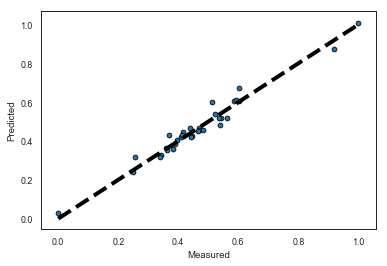

In [647]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Elasticity Analysis

In [648]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)


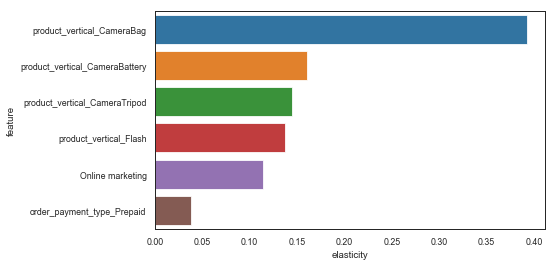

In [649]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Gaming Accessory - Kyock's Model

In [650]:
# adding lag variable in the camera data set
df = createKyockKPI(gam_koy_df)
df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  product_vertical_GameControlMount  product_vertical_GamePad  product_mrp  special_sales  product_vertical_GamingAccessoryKit  product_vertical_GamingAdapter  product_vertical_GamingChargingStation  product_vertical_GamingHeadset  product_vertical_GamingKeyboard  product_vertical_GamingMemoryCard  product_vertical_GamingMouse  product_vertical_GamingMousePad  product_vertical_GamingSpeaker  product_vertical_JoystickGamingWheel  product_vertical_MotionController  product_vertical_TVOutCableAccessory  payd_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
26 1019727.00      42.15           0.00           0.00 5.52                     2.48                      390.00            1431                                  0                    621.00      1169.77              0                                   81                              37                                       0                          108.00                           375.00                              26.00                        184.00                               40                               0                                     4                                 10                                    66          0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85   
27  968786.36      47.07           0.00           0.00 5.12                     2.46                      437.00            1775                                  0                   1235.00       860.06            512                                  120                              37                                       0                           95.00                           148.00                              24.00                        121.00                               29                               0                                     7                                  5                                    82          1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97   
28  936947.00      38.60           0.00           0.00 5.49                     2.25                      304.00            1341                                  0                    740.00      1047.04              0                                  143                              26                                       0                          104.00                           149.00                              24.00                        122.00                               42                               0                                     7                                  7                                    84          0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63   
29  711721.00      38.72           0.01           

In [651]:
df.shape

(51, 92)

In [652]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [653]:
scaler = MinMaxScaler()

In [654]:
df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship',
       'Spo

In [655]:
num_vars=['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship',
       'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [656]:
y_train = df_train.pop('gmv')
X_train = df_train

In [657]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [658]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GameControlMount', 'product_vertical_GamePad', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter', 'product_vertical_GamingKeyboard', 'Total Investment_SMA_5', 'TV_SMA_5', 'Content Marketing', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing_SMA_5', 'Online_marketing_Ad_Stock', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'Stock Index_SMA_3', 'Max Temp', 'Cool Deg Days'], dtype='object')

In [659]:
# negelecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'product_mrp', 'product_vertical_GamingChargingStation', 'product_vertical_GamingHeadset', 'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController', 'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_EMA_8', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3',
       

In [660]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [661]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     882.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.23e-18
Time:                        18:45:09   Log-Likelihood:                 130.17
No. Observations:                  35   AIC:                            -218.3
Df Residuals:                      14   BIC:                            -185.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features     VIF
17                  Affiliates_Ad_Stock 1684.46
15            Online_marketing_Ad_Stock 1417.64
14               Online marketing_SMA_5  448.21
16                     Affiliates_EMA_8  389.64
13           Content_Marketing_Ad_Stock  246.57
9                Total Investment_SMA_5  205.88
0                                 const  178.96
12              Content Marketing_EMA_8  118.22
10                             TV_SMA_5   48.20
2                        is_mass_market   38.80
4              product_vertical_GamePad   24.69
6   product_vertical_GamingAccessoryKit   19.72
11                    Content Marketing   19.52
19                             Max Temp   13.35
20                        Cool Deg Days   10.10
7        product_vertical_GamingAdapter    9.44
5                         special_sales    9.35
1            order_payment_type_Prepaid    8.20
8       product_vertical_GamingKeyboard    6.64
18                    Stock Index_SMA_3    3.84
3     product_vertical_GameControlMount    1.76

In [662]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Affiliates_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     932.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.12e-19
Time:                        18:45:09   Log-Likelihood:                 129.02
No. Observations:                  35   AIC:                            -218.0
Df Residuals:                      15   BIC:                            -186.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features    VIF
14               Online marketing_SMA_5 389.43
16                     Affiliates_EMA_8 304.96
13           Content_Marketing_Ad_Stock 195.22
9                Total Investment_SMA_5 185.36
0                                 const 158.72
12              Content Marketing_EMA_8 110.16
15            Online_marketing_Ad_Stock 101.23
10                             TV_SMA_5  48.08
2                        is_mass_market  33.68
4              product_vertical_GamePad  22.98
6   product_vertical_GamingAccessoryKit  19.19
11                    Content Marketing  18.99
18                             Max Temp   9.37
7        product_vertical_GamingAdapter   9.33
5                         special_sales   9.28
19                        Cool Deg Days   9.22
1            order_payment_type_Prepaid   8.02
8       product_vertical_GamingKeyboard   5.62
17                    Stock Index_SMA_3   3.60
3     product_vertical_GameControlMount   1.39

In [663]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Investment_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     898.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.16e-20
Time:                        18:45:09   Log-Likelihood:                 126.30
No. Observations:                  35   AIC:                            -214.6
Df Residuals:                      16   BIC:                            -185.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features    VIF
12           Content_Marketing_Ad_Stock 167.96
0                                 const 158.57
15                     Affiliates_EMA_8 113.86
11              Content Marketing_EMA_8 110.01
13               Online marketing_SMA_5 101.41
14            Online_marketing_Ad_Stock  92.61
2                        is_mass_market  33.68
4              product_vertical_GamePad  18.17
9                              TV_SMA_5  17.02
6   product_vertical_GamingAccessoryKit  16.87
10                    Content Marketing  16.31
7        product_vertical_GamingAdapter   9.28
5                         special_sales   9.24
1            order_payment_type_Prepaid   7.98
18                        Cool Deg Days   7.98
17                             Max Temp   6.02
8       product_vertical_GamingKeyboard   5.55
16                    Stock Index_SMA_3   3.17
3     product_vertical_GameControlMount   1.29

In [664]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     844.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.64e-21
Time:                        18:45:09   Log-Likelihood:                 123.15
No. Observations:                  35   AIC:                            -210.3
Df Residuals:                      17   BIC:                            -182.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features    VIF
11           Content_Marketing_Ad_Stock 167.16
14                     Affiliates_EMA_8 110.98
10              Content Marketing_EMA_8 109.07
0                                 const 104.10
13            Online_marketing_Ad_Stock  86.15
12               Online marketing_SMA_5  86.04
2                        is_mass_market  32.54
8                              TV_SMA_5  16.91
9                     Content Marketing  16.30
5   product_vertical_GamingAccessoryKit  12.61
6        product_vertical_GamingAdapter   8.86
4                         special_sales   8.79
1            order_payment_type_Prepaid   7.13
17                        Cool Deg Days   6.86
16                             Max Temp   5.99
7       product_vertical_GamingKeyboard   5.05
15                    Stock Index_SMA_3   1.30
3     product_vertical_GameControlMount   1.27

In [665]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GameControlMount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     762.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.73e-22
Time:                        18:45:09   Log-Likelihood:                 119.30
No. Observations:                  35   AIC:                            -204.6
Df Residuals:                      18   BIC:                            -178.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features    VIF
10           Content_Marketing_Ad_Stock 167.16
13                     Affiliates_EMA_8 110.56
9               Content Marketing_EMA_8 109.07
0                                 const 103.82
12            Online_marketing_Ad_Stock  84.16
11               Online marketing_SMA_5  83.21
2                        is_mass_market  32.42
7                              TV_SMA_5  16.91
8                     Content Marketing  16.30
4   product_vertical_GamingAccessoryKit  12.51
3                         special_sales   8.79
5        product_vertical_GamingAdapter   8.67
1            order_payment_type_Prepaid   7.13
16                        Cool Deg Days   6.73
15                             Max Temp   5.70
6       product_vertical_GamingKeyboard   5.01
14                    Stock Index_SMA_3   1.29

In [666]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Max Temp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     732.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.51e-23
Time:                        18:45:10   Log-Likelihood:                 116.54
No. Observations:                  35   AIC:                            -201.1
Df Residuals:                      19   BIC:                            -176.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features    VIF
10           Content_Marketing_Ad_Stock 115.49
13                     Affiliates_EMA_8 109.96
11               Online marketing_SMA_5  81.00
12            Online_marketing_Ad_Stock  80.56
0                                 const  76.53
9               Content Marketing_EMA_8  68.47
2                        is_mass_market  27.75
7                              TV_SMA_5  16.73
8                     Content Marketing  13.25
4   product_vertical_GamingAccessoryKit  10.04
5        product_vertical_GamingAdapter   8.67
3                         special_sales   7.73
1            order_payment_type_Prepaid   6.86
15                        Cool Deg Days   6.44
6       product_vertical_GamingKeyboard   4.91
14                    Stock Index_SMA_3   1.28

In [667]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     748.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.01e-24
Time:                        18:45:10   Log-Likelihood:                 114.81
No. Observations:                  35   AIC:                            -199.6
Df Residuals:                      20   BIC:                            -176.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features    VIF
12                     Affiliates_EMA_8 104.59
11            Online_marketing_Ad_Stock  77.70
0                                 const  75.70
10               Online marketing_SMA_5  70.22
9            Content_Marketing_Ad_Stock  48.91
8               Content Marketing_EMA_8  40.36
2                        is_mass_market  27.04
7                              TV_SMA_5  16.49
4   product_vertical_GamingAccessoryKit   9.82
5        product_vertical_GamingAdapter   8.67
3                         special_sales   7.64
1            order_payment_type_Prepaid   6.80
14                        Cool Deg Days   6.02
6       product_vertical_GamingKeyboard   4.90
13                    Stock Index_SMA_3   1.28

In [668]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Content_Marketing_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     822.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.23e-25
Time:                        18:45:10   Log-Likelihood:                 114.32
No. Observations:                  35   AIC:                            -200.6
Df Residuals:                      21   BIC:                            -178.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features   VIF
0                                 const 70.79
9                Online marketing_SMA_5 67.97
11                     Affiliates_EMA_8 46.73
10            Online_marketing_Ad_Stock 41.49
2                        is_mass_market 26.33
7                              TV_SMA_5 16.49
4   product_vertical_GamingAccessoryKit  7.57
5        product_vertical_GamingAdapter  7.52
3                         special_sales  7.01
8               Content Marketing_EMA_8  6.93
1            order_payment_type_Prepaid  6.79
13                        Cool Deg Days  5.62
6       product_vertical_GamingKeyboard  4.32
12                    Stock Index_SMA_3  1.26

In [669]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Content Marketing_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     819.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.96e-26
Time:                        18:45:10   Log-Likelihood:                 112.04
No. Observations:                  35   AIC:                            -198.1
Df Residuals:                      22   BIC:                            -177.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features   VIF
0                                 const 70.78
8                Online marketing_SMA_5 45.89
9             Online_marketing_Ad_Stock 41.46
10                     Affiliates_EMA_8 27.39
2                        is_mass_market 25.87
7                              TV_SMA_5 14.06
4   product_vertical_GamingAccessoryKit  7.42
5        product_vertical_GamingAdapter  7.32
3                         special_sales  7.01
12                        Cool Deg Days  5.61
1            order_payment_type_Prepaid  5.49
6       product_vertical_GamingKeyboard  4.28
11                    Stock Index_SMA_3  1.26

In [670]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     573.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.52e-25
Time:                        18:45:10   Log-Likelihood:                 103.52
No. Observations:                  35   AIC:                            -183.0
Df Residuals:                      23   BIC:                            -164.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features   VIF
0                                 const 62.14
2                        is_mass_market 25.68
8             Online_marketing_Ad_Stock 22.46
9                      Affiliates_EMA_8 19.51
7                              TV_SMA_5 13.83
4   product_vertical_GamingAccessoryKit  7.35
5        product_vertical_GamingAdapter  7.27
3                         special_sales  6.99
1            order_payment_type_Prepaid  5.30
11                        Cool Deg Days  5.25
6       product_vertical_GamingKeyboard  4.16
10                    Stock Index_SMA_3  1.22

In [671]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index_SMA_3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     619.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.97e-26
Time:                        18:45:10   Log-Likelihood:                 102.45
No. Observations:                  35   AIC:                            -182.9
Df Residuals:                      24   BIC:                            -165.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features   VIF
0                                 const 28.35
2                        is_mass_market 25.34
8             Online_marketing_Ad_Stock 22.07
9                      Affiliates_EMA_8 19.48
7                              TV_SMA_5 13.63
4   product_vertical_GamingAccessoryKit  7.33
5        product_vertical_GamingAdapter  7.27
3                         special_sales  6.79
10                        Cool Deg Days  5.24
1            order_payment_type_Prepaid  4.99
6       product_vertical_GamingKeyboard  3.81

In [672]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online_marketing_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     658.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.04e-27
Time:                        18:45:10   Log-Likelihood:                 100.97
No. Observations:                  35   AIC:                            -181.9
Df Residuals:                      25   BIC:                            -166.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features   VIF
0                                const 27.32
2                       is_mass_market 24.92
7                             TV_SMA_5 11.17
8                     Affiliates_EMA_8 10.74
5       product_vertical_GamingAdapter  6.81
3                        special_sales  6.68
4  product_vertical_GamingAccessoryKit  6.62
9                        Cool Deg Days  5.10
1           order_payment_type_Prepaid  3.95
6      product_vertical_GamingKeyboard  3.80

In [673]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.73e-21
Time:                        18:45:10   Log-Likelihood:                 75.835
No. Observations:                  35   AIC:                            -133.7
Df Residuals:                      26   BIC:                            -119.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features   VIF
0                                const 26.22
4       product_vertical_GamingAdapter  6.77
6                             TV_SMA_5  6.70
8                        Cool Deg Days  4.81
7                     Affiliates_EMA_8  4.30
3  product_vertical_GamingAccessoryKit  4.03
5      product_vertical_GamingKeyboard  3.76
1           order_payment_type_Prepaid  2.86
2                        special_sales  2.27

In [674]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Cool Deg Days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.62e-22
Time:                        18:45:11   Log-Likelihood:                 75.640
No. Observations:                  35   AIC:                            -135.3
Df Residuals:                      27   BIC:                            -122.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features  VIF
0                                const 8.18
4       product_vertical_GamingAdapter 6.76
3  product_vertical_GamingAccessoryKit 4.02
7                     Affiliates_EMA_8 3.97
5      product_vertical_GamingKeyboard 3.71
6                             TV_SMA_5 3.59
1           order_payment_type_Prepaid 2.68
2                        special_sales 2.23

In [675]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.79e-23
Time:                        18:45:11   Log-Likelihood:                 74.495
No. Observations:                  35   AIC:                            -135.0
Df Residuals:                      28   BIC:                            -124.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features  VIF
0                                const 7.53
4       product_vertical_GamingAdapter 6.55
3  product_vertical_GamingAccessoryKit 3.98
6                     Affiliates_EMA_8 3.79
5                             TV_SMA_5 3.56
1           order_payment_type_Prepaid 2.09
2                        special_sales 1.39

In [676]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     279.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.38e-23
Time:                        18:45:11   Log-Likelihood:                 73.350
No. Observations:                  35   AIC:                            -134.7
Df Residuals:                      29   BIC:                            -125.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features  VIF
0                                const 7.50
5                     Affiliates_EMA_8 3.54
4                             TV_SMA_5 3.45
3  product_vertical_GamingAccessoryKit 1.99
1           order_payment_type_Prepaid 1.81
2                        special_sales 1.35

In [677]:
X_train_rfe.columns

Index(['order_payment_type_Prepaid', 'special_sales', 'product_vertical_GamingAccessoryKit', 'TV_SMA_5', 'Affiliates_EMA_8'], dtype='object')

In [678]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_MotionController', 'deliverybdays', 'Sponsorship', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'Digital_EMA_8', 'Total Investment_SMA_5', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'product_vertical_GamePad', 'product_vertical_GamingAdapter', 'Radio', 'SEM_SMA_3', 'SEM', 'product_vertical_GamingHeadset', 'product_vertical_GameControlMount', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'gmv_lag', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'product_vertical_GamingMouse', 'Content Marketing_SMA_3', 'Mean Temp', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Content_Marketing_Ad_Stock', 'Total Snow (cm)', 'Online marketing', 'product_procurement_sla', 'product_vertical_GamingMousePad', 'TV', 'Mi

In [679]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.87870536, 0.95368525, 0.90144041, 0.98097586, 0.98107467,
       0.81485523, 0.94333586, 0.99530128, 0.97144844, 0.34851965])

In [680]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [681]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0012190836034930007
r_square_value : 0.9719620321105626


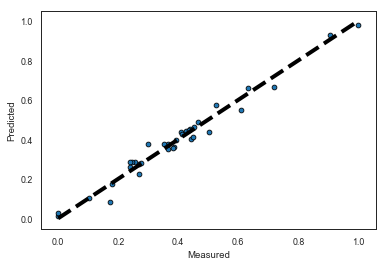

In [682]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Elasticity Analysis

In [683]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

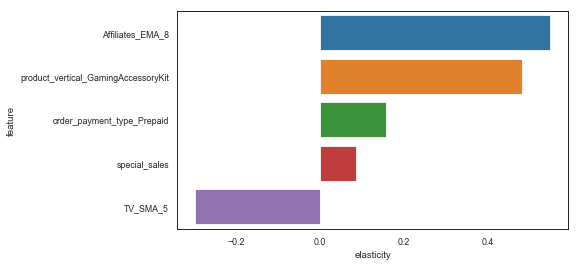

In [684]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Home Audio - Kyock's Model

In [685]:
# adding lag variable in the camera data set
df = createKyockKPI(home_koy_df)
df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
26 1185712.00      30.67           0.00           0.00 7.00                     1.95                      213.00             793              0                     24                                1                    334.00                            8                             541.00      1958.61                            0                               2         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.33        0.14              0.00   
27 1471962.00      30.37           0.00           0.00 6.71                     1.78                      243.00             936            297                     36                                0                    374.00                           19                             657.00      2016.77                            0                               7         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.53        0.14              0.00   
28 1275392.00      28.88           0.00           0.00 6.82                     1.80                      191.00             909              0                     40                                0                    394.00                           16                             544.00      1896.30                            0                               1         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.65        0.14              0.14   
29  920394.00      28.04           0.00           0.00

In [686]:
df.shape

(48, 85)

In [687]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [688]:
scaler = MinMaxScaler()

In [689]:
df.columns

Index(['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
    

In [690]:
num_vars=['gmv', 'Discount%', 'deliverybdays', 'deliverycdays', 'sla', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
       'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', 'Other_Ad_Stock', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [691]:
y_train = df_train.pop('gmv')
X_train = df_train

In [692]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [693]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Discount%', 'sla', 'product_vertical_DockingStation', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_mrp', 'product_vertical_VoiceRecorder', 'TV_SMA_3', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital_SMA_5', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Affiliates', 'SEM', 'SEM_EMA_8', 'Other_EMA_8', 'NPS', 'Stock Index'], dtype='object')

In [694]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['deliverybdays', 'deliverycdays', 'product_procurement_sla', 'order_payment_type_Prepaid', 'is_mass_market', 'special_sales', 'product_vertical_Dock', 'product_vertical_SoundMixer', 'pay_week', 'holiday_week', 'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_5', 'Digital', 'Digital_SMA_3', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', 'Content Marketing_SMA_3', 'Content Marketing_SMA_5', 'Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', 'Online marketing', 'Online marketing_EMA_8', 'Online_marketing_Ad_Stock', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', 'Affiliates_Ad_Stock', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_Ad_Stock',
       'NP

In [695]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [696]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.99e-12
Time:                        18:45:29   Log-Likelihood:                 105.18
No. Observations:                  33   AIC:                            -168.4
Df Residuals:                      12   BIC:                            -136.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
11                        TV_Ad_Stock 1430.80
0                               const  775.58
10                           TV_EMA_8  387.43
9                            TV_SMA_3  369.70
17                          SEM_EMA_8  276.37
12                      Digital_SMA_5  259.18
14             Online marketing_SMA_5  146.72
19                                NPS  108.81
13             Online marketing_SMA_3   91.22
15                         Affiliates   82.87
20                        Stock Index   81.90
16                                SEM   55.18
1                           Discount%   34.48
7                         product_mrp   23.65
8      product_vertical_VoiceRecorder   21.66
6   product_vertical_HomeAudioSpeaker   18.71
4            product_vertical_FMRadio   16.47
18                        Other_EMA_8   12.29
5         product_vertical_HiFiSystem   10.08
2                                 sla    9.55
3     product_vertical_DockingStation    8.37

In [697]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_mrp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     227.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.30e-13
Time:                        18:45:29   Log-Likelihood:                 104.68
No. Observations:                  33   AIC:                            -169.4
Df Residuals:                      13   BIC:                            -139.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
10                        TV_Ad_Stock 1120.50
0                               const  756.69
8                            TV_SMA_3  349.81
9                            TV_EMA_8  259.43
16                          SEM_EMA_8  160.25
11                      Digital_SMA_5  148.24
13             Online marketing_SMA_5  136.60
12             Online marketing_SMA_3   85.36
18                                NPS   83.75
14                         Affiliates   82.76
19                        Stock Index   60.23
1                           Discount%   32.46
15                                SEM   28.26
7      product_vertical_VoiceRecorder   20.06
6   product_vertical_HomeAudioSpeaker   18.53
4            product_vertical_FMRadio   13.65
17                        Other_EMA_8   10.87
5         product_vertical_HiFiSystem    9.83
3     product_vertical_DockingStation    7.21
2                                 sla    5.03

In [698]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.06e-14
Time:                        18:45:30   Log-Likelihood:                 103.74
No. Observations:                  33   AIC:                            -169.5
Df Residuals:                      14   BIC:                            -141.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
9                         TV_Ad_Stock 914.84
0                               const 678.98
7                            TV_SMA_3 297.71
8                            TV_EMA_8 251.05
15                          SEM_EMA_8 157.49
12             Online marketing_SMA_5 136.15
10                      Digital_SMA_5 132.24
11             Online marketing_SMA_3  85.02
13                         Affiliates  64.63
17                                NPS  51.45
18                        Stock Index  48.46
1                           Discount%  29.55
14                                SEM  27.05
6      product_vertical_VoiceRecorder  19.78
5   product_vertical_HomeAudioSpeaker  13.01
3            product_vertical_FMRadio  12.63
16                        Other_EMA_8   9.47
4         product_vertical_HiFiSystem   8.85
2     product_vertical_DockingStation   6.81

In [699]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     255.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.20e-15
Time:                        18:45:30   Log-Likelihood:                 102.41
No. Observations:                  33   AIC:                            -168.8
Df Residuals:                      15   BIC:                            -141.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
8                         TV_Ad_Stock 858.58
0                               const 636.08
6                            TV_SMA_3 278.12
7                            TV_EMA_8 248.93
14                          SEM_EMA_8 154.50
11             Online marketing_SMA_5 134.51
9                       Digital_SMA_5 126.21
10             Online marketing_SMA_3  80.84
16                                NPS  50.75
12                         Affiliates  48.20
17                        Stock Index  43.99
1                           Discount%  27.67
13                                SEM  26.28
5      product_vertical_VoiceRecorder  19.53
3            product_vertical_FMRadio  11.38
15                        Other_EMA_8   9.45
2     product_vertical_DockingStation   6.79
4   product_vertical_HomeAudioSpeaker   6.13

In [700]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_SMA_3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     265.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.45e-16
Time:                        18:45:30   Log-Likelihood:                 101.02
No. Observations:                  33   AIC:                            -168.0
Df Residuals:                      16   BIC:                            -142.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
8                         TV_Ad_Stock 486.02
0                               const 369.61
7                            TV_EMA_8 227.60
6                            TV_SMA_3 149.84
13                          SEM_EMA_8 127.13
9                       Digital_SMA_5  97.55
10             Online marketing_SMA_5  45.48
15                                NPS  29.27
16                        Stock Index  28.55
11                         Affiliates  27.36
12                                SEM  20.53
1                           Discount%  16.84
5      product_vertical_VoiceRecorder  16.28
3            product_vertical_FMRadio  10.93
14                        Other_EMA_8   5.72
2     product_vertical_DockingStation   4.55
4   product_vertical_HomeAudioSpeaker   4.45

In [701]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     281.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.43e-17
Time:                        18:45:30   Log-Likelihood:                 99.899
No. Observations:                  33   AIC:                            -167.8
Df Residuals:                      17   BIC:                            -143.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
8                         TV_Ad_Stock 340.49
0                               const 315.31
6                            TV_SMA_3 149.56
7                            TV_EMA_8  88.93
10             Online marketing_SMA_5  38.33
11                         Affiliates  23.83
14                                NPS  21.63
9                       Digital_SMA_5  20.93
12                          SEM_EMA_8  18.30
1                           Discount%  14.48
5      product_vertical_VoiceRecorder   8.65
3            product_vertical_FMRadio   8.08
15                        Stock Index   6.95
13                        Other_EMA_8   5.22
2     product_vertical_DockingStation   4.39
4   product_vertical_HomeAudioSpeaker   4.18

In [702]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.81e-18
Time:                        18:45:30   Log-Likelihood:                 99.310
No. Observations:                  33   AIC:                            -168.6
Df Residuals:                      18   BIC:                            -146.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
8                         TV_Ad_Stock 331.44
0                               const 193.29
6                            TV_SMA_3 148.15
7                            TV_EMA_8  49.73
9                       Digital_SMA_5  20.86
10                         Affiliates  20.42
11                          SEM_EMA_8  16.96
13                                NPS  14.46
1                           Discount%   9.00
5      product_vertical_VoiceRecorder   8.28
3            product_vertical_FMRadio   7.65
14                        Stock Index   5.75
2     product_vertical_DockingStation   4.06
4   product_vertical_HomeAudioSpeaker   4.02
12                        Other_EMA_8   3.17

In [703]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     314.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.60e-19
Time:                        18:45:30   Log-Likelihood:                 97.535
No. Observations:                  33   AIC:                            -167.1
Df Residuals:                      19   BIC:                            -146.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
8                         TV_Ad_Stock 326.91
0                               const 192.33
6                            TV_SMA_3 140.33
7                            TV_EMA_8  49.27
10                         Affiliates  20.38
12                                NPS  14.29
1                           Discount%   9.00
9                       Digital_SMA_5   8.00
5      product_vertical_VoiceRecorder   7.90
3            product_vertical_FMRadio   7.63
13                        Stock Index   5.26
2     product_vertical_DockingStation   4.06
4   product_vertical_HomeAudioSpeaker   3.86
11                        Other_EMA_8   3.08

In [704]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     325.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.46e-20
Time:                        18:45:30   Log-Likelihood:                 95.952
No. Observations:                  33   AIC:                            -165.9
Df Residuals:                      20   BIC:                            -146.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 179.93
7                         TV_Ad_Stock 148.25
6                            TV_SMA_3  99.90
9                          Affiliates  19.95
11                                NPS  13.37
1                           Discount%   8.67
8                       Digital_SMA_5   7.87
5      product_vertical_VoiceRecorder   7.48
3            product_vertical_FMRadio   6.96
12                        Stock Index   4.60
2     product_vertical_DockingStation   4.04
4   product_vertical_HomeAudioSpeaker   3.23
10                        Other_EMA_8   2.91

In [705]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Discount%"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     333.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.61e-21
Time:                        18:45:30   Log-Likelihood:                 94.100
No. Observations:                  33   AIC:                            -164.2
Df Residuals:                      21   BIC:                            -146.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 162.78
6                         TV_Ad_Stock  97.89
5                            TV_SMA_3  80.85
8                          Affiliates  18.76
10                                NPS  11.99
4      product_vertical_VoiceRecorder   5.46
2            product_vertical_FMRadio   4.11
1     product_vertical_DockingStation   3.92
7                       Digital_SMA_5   2.93
11                        Stock Index   2.88
9                         Other_EMA_8   2.67
3   product_vertical_HomeAudioSpeaker   2.26

In [706]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Digital_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     372.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.77e-22
Time:                        18:45:31   Log-Likelihood:                 93.631
No. Observations:                  33   AIC:                            -165.3
Df Residuals:                      22   BIC:                            -148.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 161.90
6                         TV_Ad_Stock  97.55
5                            TV_SMA_3  80.46
7                          Affiliates  18.42
9                                 NPS  11.18
4      product_vertical_VoiceRecorder   5.22
2            product_vertical_FMRadio   4.11
1     product_vertical_DockingStation   3.86
8                         Other_EMA_8   2.65
3   product_vertical_HomeAudioSpeaker   2.22
10                        Stock Index   1.96

In [707]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     391.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.60e-23
Time:                        18:45:31   Log-Likelihood:                 91.952
No. Observations:                  33   AIC:                            -163.9
Df Residuals:                      23   BIC:                            -148.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 161.54
6                        TV_Ad_Stock  89.31
5                           TV_SMA_3  72.17
7                         Affiliates  18.41
9                                NPS  10.39
4     product_vertical_VoiceRecorder   4.72
2           product_vertical_FMRadio   3.46
1    product_vertical_DockingStation   3.37
8                        Other_EMA_8   2.60
3  product_vertical_HomeAudioSpeaker   2.16

In [708]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Other_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     408.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.02e-23
Time:                        18:45:31   Log-Likelihood:                 90.022
No. Observations:                  33   AIC:                            -162.0
Df Residuals:                      24   BIC:                            -148.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 141.39
6                        TV_Ad_Stock  79.45
5                           TV_SMA_3  63.69
7                         Affiliates  14.84
8                                NPS   8.54
4     product_vertical_VoiceRecorder   4.50
2           product_vertical_FMRadio   3.33
1    product_vertical_DockingStation   3.25
3  product_vertical_HomeAudioSpeaker   2.16

In [709]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     431.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.93e-24
Time:                        18:45:31   Log-Likelihood:                 88.069
No. Observations:                  33   AIC:                            -160.1
Df Residuals:                      25   BIC:                            -148.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 125.80
5                        TV_Ad_Stock  68.64
4                           TV_SMA_3  52.26
6                         Affiliates  14.10
7                                NPS   7.67
1           product_vertical_FMRadio   3.12
2  product_vertical_HomeAudioSpeaker   2.13
3     product_vertical_VoiceRecorder   1.92

In [710]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     466.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.55e-25
Time:                        18:45:31   Log-Likelihood:                 86.179
No. Observations:                  33   AIC:                            -158.4
Df Residuals:                      26   BIC:                            -147.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
5                        TV_Ad_Stock 63.13
4                           TV_SMA_3 50.51
0                              const 14.79
6                         Affiliates  4.17
1           product_vertical_FMRadio  2.03
2  product_vertical_HomeAudioSpeaker  2.00
3     product_vertical_VoiceRecorder  1.45

In [711]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     489.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.37e-25
Time:                        18:45:31   Log-Likelihood:                 83.375
No. Observations:                  33   AIC:                            -154.7
Df Residuals:                      27   BIC:                            -145.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 14.51
5                         Affiliates  2.69
4                           TV_SMA_3  2.63
2  product_vertical_HomeAudioSpeaker  1.96
1           product_vertical_FMRadio  1.93
3     product_vertical_VoiceRecorder  1.27

In [712]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_SMA_3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     596.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.18e-26
Time:                        18:45:31   Log-Likelihood:                 82.381
No. Observations:                  33   AIC:                            -154.8
Df Residuals:                      28   BIC:                            -147.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 14.46
1           product_vertical_FMRadio  1.84
2  product_vertical_HomeAudioSpeaker  1.78
4                         Affiliates  1.24
3     product_vertical_VoiceRecorder  1.21

In [713]:
X_train_rfe.columns

Index(['product_vertical_FMRadio', 'product_vertical_HomeAudioSpeaker', 'product_vertical_VoiceRecorder', 'Affiliates'], dtype='object')

In [714]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['deliverybdays', 'special_sales', 'Sponsorship', 'Online marketing_SMA_5', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Content Marketing', 'Radio_Ad_Stock', 'NPS_SMA_3', 'product_vertical_HiFiSystem', 'Digital_EMA_8', 'Total Investment_SMA_5', 'TV_SMA_3', 'Total Precip (mm)', 'Total Investment', 'Cool Deg Days', 'Radio', 'SEM_SMA_3', 'SEM', 'Total Rain (mm)', 'SEM_SMA_5', 'Digital', 'Affiliates_EMA_8', 'sla', 'is_mass_market', 'Other', 'NPS', 'Total Investment_SMA_3', 'TV_Ad_Stock', 'gmv', 'pay_week', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'deliverycdays', 'gmv_lag', 'Content Marketing_EMA_8', 'Total_Investment_Ad_Stock', 'Content Marketing_SMA_3', 'Mean Temp', 'Radio_EMA_8', 'SEM_Ad_Stock', 'Digital_Ad_Stock', 'Other_Ad_Stock', 'Content_Marketing_Ad_Stock', 'Total Snow (cm)', 'Online marketing', 'TV_SMA_5', 'product_procurement_sla', 'TV', 'Min Temp', 'holiday_week', 'Online marketing_SMA_3', 'SEM_EMA_8', 'Digital_SMA_3', 'Radio_SMA_3', 'product_vertical_Dock', 'Other_SM

In [715]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.89118341, 0.99247119, 0.97539165, 0.98731765, 0.76460883,
       0.96114407, 0.89147737, 0.9774375 , 0.9917183 , 0.97584785])

In [716]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [717]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0006061374020961226
r_square_value : 0.9823100365450645


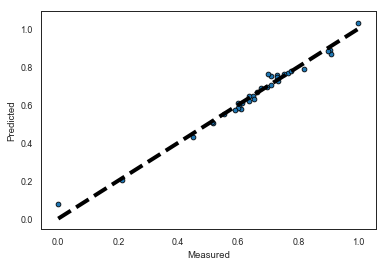

In [718]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Elasticity Analysis

In [719]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

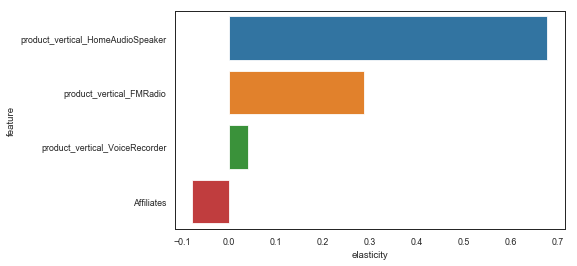

In [720]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## Distributed Lag Model (Additive)

The Distributive Lag Model(Additive) helped us capture the not only the current, but also the carry-over effect of all the variables(depedent and independent).

Yt = α+ µ1Yt-1 + µ2Yt-2 + µ3Yt-3 + ....

    + β1X1t + β1X1t-1 + β1X1t-2 + ....

    + β2X2t + β2X2t-1 + β2X2t-2 + ....

    + β3X3t + β3X3t-1 + β3X3t-2 + ....

    + β4X4t + β4X4t-1 + β4X4t-2 + ....

    + β5X5t + β5X5t-1 + β5X5t-2 + ....

    + ϵ

In [721]:
# Making copy of dataframes from the original ones
cam_dis_df = Camera_accessory_org_df.copy()
gam_dis_df = gaming_accessory_org_df.copy()
home_dis_df = Homeaudio_org_df.copy()
home_dis_df.head() 

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
26 1185712.00      30.67           0.00           0.00 7.00                     1.95                      213.00             793              0                     24                                1                    334.00                            8                             541.00      1958.61                            0                               2         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.33        0.14              0.00   
27 1471962.00      30.37           0.00           0.00 6.71                     1.78                      243.00             936            297                     36                                0                    374.00                           19                             657.00      2016.77                            0                               7         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.53        0.14              0.00   
28 1275392.00      28.88           0.00           0.00 6.82                     1.80                      191.00             909              0                     40                                0                    394.00                           16                             544.00      1896.30                            0                               1         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.65        0.14              0.14   
29  920394.00      28.04           0.00           0.00

In [722]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(home_dis_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(home_dis_df.isnull().sum()/home_dis_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

Total  Percentage
Snow on Grnd (cm)              0        0.00
Digital_SMA_3                  0        0.00
Total Investment_EMA_8         0        0.00
Total_Investment_Ad_Stock      0        0.00
TV                             0        0.00

In [723]:
cam_dis_df.head()

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  product_mrp  order_payment_type_Prepaid  is_mass_market  product_vertical_CameraAccessory  special_sales  product_vertical_CameraBag  product_vertical_CameraBattery  product_vertical_CameraBatteryCharger  product_vertical_CameraBatteryGrip  product_vertical_CameraEyeCup  product_vertical_CameraFilmRolls  product_vertical_CameraHousing  product_vertical_CameraMicrophone  product_vertical_CameraMount  product_vertical_CameraRemoteControl  product_vertical_CameraTripod  product_vertical_ExtensionTube  product_vertical_Filter  product_vertical_Flash  product_vertical_FlashShoeAdapter  product_vertical_Lens  product_vertical_ReflectorUmbrella  product_vertical_Softbox  product_vertical_Strap  product_vertical_Telescope  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
26 1088715.00      45.59           0.00           0.00 6.36                     2.08      1143.14                      566.00            1734                                39              0                      260.00                          349.00                                 167.00                                   7                              0                                 0                               0                                  0                             3                                 70.00                         349.00                               0                   164.00                    8.00                                  0                 263.00                                   0                         0                      13                           4         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05   
27 1203752.00      47.02           0.00           0.00 6.06                     2.10      1197.19                      649.00            2005                                31            578                      284.00                          428.00                                 179.00                                   4                              0                                 0                               0                                  0                            10                                 85.00                         408.00                               0                   142.00                   11.00                                  0                 293.00                                   0                         0                      22                          15         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05   
28 1183338.00      44.83           0.00           0.00 6.17                     2.12      1162.70                      606.00            1991                                43              0                      223.00                          455.00                                 218.00                                   4                              0                                 0                               0                                  0                             7                                 68.00                         370.00                               0                   148.00                    7.00                                  0                 325.00                                   0                         0                      21                          23         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05   
29  813136.00      44.89           0.00           0.00

###### Create a new variable which is the Lag of 1 week 

In [724]:
GMV_Lag = ['gmv']

In [725]:
def lag_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_lag'+np.str(n),value=df[i].shift(n))
    return df

###### Create a new lag(Lag of 3 weeks) variables for the dependent variable (GMV) as well as independent variables

In [726]:
cam_dis_df_columns = cam_dis_df.columns
gam_dis_df_columns = gam_dis_df.columns
home_dis_df_columns = home_dis_df.columns

In [727]:
cam_dis_df = lag_variables(cam_dis_df,cam_dis_df_columns,3)
gam_dis_df = lag_variables(gam_dis_df,gam_dis_df_columns,3)
home_dis_df = lag_variables(home_dis_df,home_dis_df_columns,3)
home_dis_df.head()

gmv   gmv_lag3  Discount%  Discount%_lag3  deliverybdays  deliverybdays_lag3  deliverycdays  deliverycdays_lag3  sla  sla_lag3  product_procurement_sla  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag3  special_sales  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag3  product_vertical_HiFiSystem  product_vertical_HiFiSystem_lag3  product_vertical_HomeAudioSpeaker  product_vertical_HomeAudioSpeaker_lag3  product_mrp  product_mrp_lag3  product_vertical_SoundMixer  product_vertical_SoundMixer_lag3  product_vertical_VoiceRecorder  product_vertical_VoiceRecorder_lag3  pay_week  pay_week_lag3  holiday_week  holiday_week_lag3  Total Investment  Total Investment_lag3  Total Investment_SMA_3  Total Investment_SMA_3_lag3  Total Investment_SMA_5  \
26 1185712.00        nan      30.67             nan           0.00                 nan           0.00                 nan 7.00       nan                     1.95                           nan                      213.00                              nan             793                  nan              0                 nan                     24                         nan                                1                                   nan                    334.00                            nan                            8                               nan                             541.00                                     nan      1958.61               nan                            0                               nan                               2                                  nan         0            nan             0                nan              4.26                    nan                    0.00                          nan                    0.00   
27 1471962.00        nan      30.37             nan           0.00                 nan           0.00                 nan 6.71       nan                     1.78                           nan                      243.00                              nan             936                  nan            297                 nan                     36                         nan                                0                                   nan                    374.00                            nan                           19                               nan                             657.00                                     nan      2016.77               nan                            0                               nan                               7                                  nan         1            nan             0                nan              4.26                    nan                    0.00                          nan                    0.00   
28 1275392.00        nan      28.88             nan           0.00                 nan           0.00                 nan 6.82       nan                     1.80                           nan                      191.00                              nan             909                  nan              0                 nan                     40                         nan                                0                                   nan                    394.00                            nan                           16                               nan                             544.00                                     nan      1896.30               nan                            0                               nan                               1                                  nan         0            nan             0                nan              4.26                    nan                    4.26                          nan                    0.00   
29  920394.00 1185712.00      28.04           30.67           0.00        

###### Create a new lag(Lag of 2 weeks) variables for the dependent variable (GMV) as well as independent variables

In [728]:
cam_dis_df = lag_variables(cam_dis_df,cam_dis_df_columns,2)
gam_dis_df = lag_variables(gam_dis_df,gam_dis_df_columns,2)
home_dis_df = lag_variables(home_dis_df,home_dis_df_columns,2)
home_dis_df.head()

gmv   gmv_lag2   gmv_lag3  Discount%  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag2  product_vertical_FMRadio_lag3  product_vertical_HiFiSystem  product_vertical_HiFiSystem_lag2  product_vertical_HiFiSystem_lag3  product_vertical_HomeAudioSpeaker  product_vertical_HomeAudioSpeaker_lag2  product_vertical_HomeAudioSpeaker_lag3  \
26 1185712.00        nan        nan      30.67             nan             nan           0.00                 nan                 nan           0.00                 nan                 nan 7.00       nan       nan                     1.95                           nan                           nan                      213.00                              nan                              nan             793                  nan                  nan              0                 nan                 nan                     24                         nan                         nan                                1                                   nan                                   nan                    334.00                            nan                            nan                            8                               nan                               nan                             541.00                                     nan                                     nan   
27 1471962.00        nan        nan      30.37             nan             nan           0.00                 nan                 nan           0.00                 nan                 nan 6.71       nan       nan                     1.78                           nan                           nan                      243.00                              nan                              nan             936                  nan                  nan            297                 nan                 nan                     36                         nan                         nan                                0                                   nan                                   nan                    374.00                            nan                            nan                           19                               nan                               nan                             657.00                                     nan                                     nan   
28 1275392.00 1185712.00        nan      28.88           30.67             nan           0.00                0.00                 nan           0.00                0.00                 nan 6.82      7.00       nan                     1.80                          1.95                           nan                      191.00                           213.00                              nan             909               793.00                  nan              0                0.00                 nan                     40                       24.00                         nan                                0                                  1.00                                   nan                    394.00                         334.00                            nan                           16                              8.00                               nan                             544.00                                  541.00                                     nan   
29  920394.00 1471962.

##### Create new lag(Lag of 1 week) variables 

In [729]:
cam_dis_df = lag_variables(cam_dis_df,cam_dis_df_columns,1)
gam_dis_df = lag_variables(gam_dis_df,gam_dis_df_columns,1)
home_dis_df = lag_variables(home_dis_df,home_dis_df_columns,1)
home_dis_df.head()

gmv   gmv_lag1   gmv_lag2   gmv_lag3  Discount%  Discount%_lag1  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag1  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag1  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag1  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag1  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag1  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag1  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag1  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag1  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag1  \
26 1185712.00        nan        nan        nan      30.67             nan             nan             nan           0.00                 nan                 nan                 nan           0.00                 nan                 nan                 nan 7.00       nan       nan       nan                     1.95                           nan                           nan                           nan                      213.00                              nan                              nan                              nan             793                  nan                  nan                  nan              0                 nan                 nan                 nan                     24                         nan                         nan                         nan                                1                                   nan                                   nan                                   nan                    334.00                            nan   
27 1471962.00 1185712.00        nan        nan      30.37           30.67             nan             nan           0.00                0.00                 nan                 nan           0.00                0.00                 nan                 nan 6.71      7.00       nan       nan                     1.78                          1.95                           nan                           nan                      243.00                           213.00                              nan                              nan             936               793.00                  nan                  nan            297                0.00                 nan                 nan                     36                       24.00                         nan                         nan                                0                                  1.00                                   nan                                   nan                    374.00                         334.00   
28 1275392.00 1471962.00 1185712.00        nan      28.88           30.37           30.67             nan           0.00                0.00                0.00                 nan           0.00                0.00                0.00                 nan 6.82      6.71      7.00       nan                     1.80                          1.78                          1.95                           nan                      191.00                           243.00                           213.00                              nan             909               936.00               793.00                  nan              0              297.00                0.00                 nan                     40                       36.00                       24.00                         nan                                0                                  0.00                                  1.00                                   nan                    394.00                         374.00   
29  92

###### Impute null values with 0

In [730]:
# Imputing all null values with 0
cam_dis_df.fillna(value=0, inplace=True)
gam_dis_df.fillna(value=0, inplace=True)
home_dis_df.fillna(value=0, inplace=True)
home_dis_df.head(10)

gmv   gmv_lag1   gmv_lag2   gmv_lag3  Discount%  Discount%_lag1  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag1  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag1  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag1  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag1  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag1  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag1  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag1  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag1  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag1  \
26 1185712.00       0.00       0.00       0.00      30.67            0.00            0.00            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 7.00      0.00      0.00      0.00                     1.95                          0.00                          0.00                          0.00                      213.00                             0.00                             0.00                             0.00             793                 0.00                 0.00                 0.00              0                0.00                0.00                0.00                     24                        0.00                        0.00                        0.00                                1                                  0.00                                  0.00                                  0.00                    334.00                           0.00   
27 1471962.00 1185712.00       0.00       0.00      30.37           30.67            0.00            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 6.71      7.00      0.00      0.00                     1.78                          1.95                          0.00                          0.00                      243.00                           213.00                             0.00                             0.00             936               793.00                 0.00                 0.00            297                0.00                0.00                0.00                     36                       24.00                        0.00                        0.00                                0                                  1.00                                  0.00                                  0.00                    374.00                         334.00   
28 1275392.00 1471962.00 1185712.00       0.00      28.88           30.37           30.67            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 6.82      6.71      7.00      0.00                     1.80                          1.78                          1.95                          0.00                      191.00                           243.00                           213.00                             0.00             909               936.00               793.00                 0.00              0              297.00                0.00                0.00                     40                       36.00                       24.00                        0.00                                0                                  0.00                                  1.00                                  0.00                    394.00                         374.00   
29  92

### Distributed Lag Model for Camera Accessory

##### Splitting the Dataframe into Training and Testing Set

In [731]:

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(cam_dis_df, train_size = 0.7, test_size = 0.3, random_state = 100)
                                                                           
                                                                           

##### Rescaling the Features

In [732]:
scaler = MinMaxScaler()

In [733]:
num_vars=cam_dis_df.columns

In [734]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [735]:
y_train = df_train.pop('gmv')
X_train = df_train

In [736]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [737]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['product_procurement_sla_lag1', 'product_mrp', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraAccessory', 'special_sales_lag2', 'product_vertical_CameraBag_lag3', 'product_vertical_CameraBattery_lag3', 'product_vertical_CameraRemoteControl', 'product_vertical_ExtensionTube_lag2', 'product_vertical_Flash', 'product_vertical_FlashShoeAdapter_lag1', 'product_vertical_Lens', 'product_vertical_Lens_lag1', 'product_vertical_Telescope', 'Content Marketing_lag1', 'Max Temp_lag1', 'Cool Deg Days_lag2', 'Cool Deg Days_lag3', 'Snow on Grnd (cm)'], dtype='object')

In [738]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]


Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'Discount%', 'Discount%_lag1', 'Discount%_lag2', 'Discount%_lag3', 'deliverybdays', 'deliverybdays_lag1', 'deliverybdays_lag2',
       ...
       'Total Snow (cm)_lag1', 'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3', 'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2', 'Total Precip (mm)_lag3', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'], dtype='object', length=371)

In [739]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [740]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     730.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.52e-15
Time:                        18:46:48   Log-Likelihood:                 128.32
No. Observations:                  33   AIC:                            -214.6
Df Residuals:                      12   BIC:                            -183.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features   VIF
0                                    const 86.41
4                           is_mass_market 40.13
11                  product_vertical_Flash 23.45
15              product_vertical_Telescope 15.63
13                   product_vertical_Lens  9.52
8      product_vertical_CameraBattery_lag3  7.40
7          product_vertical_CameraBag_lag3  7.32
18                      Cool Deg Days_lag2  7.05
9     product_vertical_CameraRemoteControl  5.70
17                           Max Temp_lag1  4.40
10     product_vertical_ExtensionTube_lag2  3.93
2                              product_mrp  3.71
14              product_vertical_Lens_lag1  3.55
19                      Cool Deg Days_lag3  3.54
5         product_vertical_CameraAccessory  3.36
16                  Content Marketing_lag1  3.36
3               order_payment_type_Prepaid  3.18
1             product_procurement_sla_lag1  3.13
20                       Snow on Grnd (cm)  3.01
6                       special_sales_lag2  2.13
12  product_vertical_FlashShoeAdapter_lag1  1.81

In [741]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Cool Deg Days_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     656.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.39e-16
Time:                        18:46:48   Log-Likelihood:                 124.40
No. Observations:                  33   AIC:                            -208.8
Df Residuals:                      13   BIC:                            -178.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features   VIF
0                                    const 84.88
4                           is_mass_market 38.02
11                  product_vertical_Flash 21.96
15              product_vertical_Telescope 14.34
13                   product_vertical_Lens  8.99
8      product_vertical_CameraBattery_lag3  6.83
7          product_vertical_CameraBag_lag3  6.72
9     product_vertical_CameraRemoteControl  5.07
10     product_vertical_ExtensionTube_lag2  3.90
2                              product_mrp  3.61
16                  Content Marketing_lag1  3.28
3               order_payment_type_Prepaid  3.17
1             product_procurement_sla_lag1  2.96
14              product_vertical_Lens_lag1  2.83
17                           Max Temp_lag1  2.77
5         product_vertical_CameraAccessory  2.65
18                      Cool Deg Days_lag3  2.65
19                       Snow on Grnd (cm)  2.65
12  product_vertical_FlashShoeAdapter_lag1  1.80
6                       special_sales_lag2  1.74

In [742]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_mrp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     624.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.93e-17
Time:                        18:46:48   Log-Likelihood:                 121.47
No. Observations:                  33   AIC:                            -204.9
Df Residuals:                      14   BIC:                            -176.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features   VIF
0                                    const 69.29
3                           is_mass_market 27.37
10                  product_vertical_Flash 14.54
14              product_vertical_Telescope 12.36
12                   product_vertical_Lens  8.99
7      product_vertical_CameraBattery_lag3  6.79
6          product_vertical_CameraBag_lag3  6.71
8     product_vertical_CameraRemoteControl  4.84
9      product_vertical_ExtensionTube_lag2  3.87
2               order_payment_type_Prepaid  2.95
1             product_procurement_sla_lag1  2.93
16                           Max Temp_lag1  2.74
15                  Content Marketing_lag1  2.66
4         product_vertical_CameraAccessory  2.64
18                       Snow on Grnd (cm)  2.63
17                      Cool Deg Days_lag3  2.59
13              product_vertical_Lens_lag1  2.26
11  product_vertical_FlashShoeAdapter_lag1  1.80
5                       special_sales_lag2  1.67

In [743]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_FlashShoeAdapter_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     552.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.84e-18
Time:                        18:46:48   Log-Likelihood:                 117.37
No. Observations:                  33   AIC:                            -198.7
Df Residuals:                      15   BIC:                            -171.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 67.32
3                         is_mass_market 27.36
10                product_vertical_Flash 14.35
13            product_vertical_Telescope 12.18
11                 product_vertical_Lens  8.90
7    product_vertical_CameraBattery_lag3  6.70
6        product_vertical_CameraBag_lag3  6.63
8   product_vertical_CameraRemoteControl  4.83
9    product_vertical_ExtensionTube_lag2  3.60
1           product_procurement_sla_lag1  2.90
2             order_payment_type_Prepaid  2.81
14                Content Marketing_lag1  2.63
4       product_vertical_CameraAccessory  2.62
15                         Max Temp_lag1  2.62
16                    Cool Deg Days_lag3  2.58
17                     Snow on Grnd (cm)  2.52
12            product_vertical_Lens_lag1  2.20
5                     special_sales_lag2  1.66

In [744]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     525.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.08e-18
Time:                        18:46:49   Log-Likelihood:                 114.46
No. Observations:                  33   AIC:                            -194.9
Df Residuals:                      16   BIC:                            -169.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 44.44
3                         is_mass_market 26.05
9                 product_vertical_Flash 14.35
12            product_vertical_Telescope 11.29
10                 product_vertical_Lens  8.34
5        product_vertical_CameraBag_lag3  6.55
6    product_vertical_CameraBattery_lag3  6.38
7   product_vertical_CameraRemoteControl  4.76
8    product_vertical_ExtensionTube_lag2  3.57
1           product_procurement_sla_lag1  2.63
13                Content Marketing_lag1  2.59
14                         Max Temp_lag1  2.55
15                    Cool Deg Days_lag3  2.47
2             order_payment_type_Prepaid  2.40
16                     Snow on Grnd (cm)  2.24
11            product_vertical_Lens_lag1  2.13
4                     special_sales_lag2  1.65

In [745]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_Lens_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     474.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.92e-19
Time:                        18:46:49   Log-Likelihood:                 110.74
No. Observations:                  33   AIC:                            -189.5
Df Residuals:                      17   BIC:                            -165.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 44.37
3                         is_mass_market 25.99
9                 product_vertical_Flash 14.34
11            product_vertical_Telescope 10.31
10                 product_vertical_Lens  8.32
5        product_vertical_CameraBag_lag3  6.29
6    product_vertical_CameraBattery_lag3  5.82
7   product_vertical_CameraRemoteControl  4.27
8    product_vertical_ExtensionTube_lag2  3.29
14                    Cool Deg Days_lag3  2.47
13                         Max Temp_lag1  2.38
1           product_procurement_sla_lag1  2.35
2             order_payment_type_Prepaid  2.28
15                     Snow on Grnd (cm)  2.24
12                Content Marketing_lag1  1.94
4                     special_sales_lag2  1.60

In [746]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     464.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.55e-20
Time:                        18:46:49   Log-Likelihood:                 108.32
No. Observations:                  33   AIC:                            -186.6
Df Residuals:                      18   BIC:                            -164.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 42.58
3                         is_mass_market 25.63
9                 product_vertical_Flash 12.22
10                 product_vertical_Lens  6.14
6    product_vertical_CameraBattery_lag3  5.77
5        product_vertical_CameraBag_lag3  5.44
7   product_vertical_CameraRemoteControl  4.23
8    product_vertical_ExtensionTube_lag2  3.26
13                    Cool Deg Days_lag3  2.45
12                         Max Temp_lag1  2.38
1           product_procurement_sla_lag1  2.31
2             order_payment_type_Prepaid  2.28
14                     Snow on Grnd (cm)  2.17
11                Content Marketing_lag1  1.85
4                     special_sales_lag2  1.59

In [747]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.10
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.10e-12
Time:                        18:46:49   Log-Likelihood:                 71.977
No. Observations:                  33   AIC:                            -116.0
Df Residuals:                      19   BIC:                            -95.00
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 33.15
5    product_vertical_CameraBattery_lag3  5.58
4        product_vertical_CameraBag_lag3  5.42
8                 product_vertical_Flash  5.30
9                  product_vertical_Lens  4.40
7    product_vertical_ExtensionTube_lag2  2.68
6   product_vertical_CameraRemoteControl  2.50
12                    Cool Deg Days_lag3  2.38
11                         Max Temp_lag1  2.31
2             order_payment_type_Prepaid  2.21
13                     Snow on Grnd (cm)  2.07
1           product_procurement_sla_lag1  1.98
10                Content Marketing_lag1  1.85
3                     special_sales_lag2  1.52

In [748]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Content Marketing_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     63.90
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.01e-13
Time:                        18:46:49   Log-Likelihood:                 71.673
No. Observations:                  33   AIC:                            -117.3
Df Residuals:                      20   BIC:                            -97.89
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 32.82
4        product_vertical_CameraBag_lag3  5.39
5    product_vertical_CameraBattery_lag3  5.37
8                 product_vertical_Flash  5.08
9                  product_vertical_Lens  4.37
7    product_vertical_ExtensionTube_lag2  2.64
11                    Cool Deg Days_lag3  2.38
2             order_payment_type_Prepaid  2.21
10                         Max Temp_lag1  2.11
12                     Snow on Grnd (cm)  1.97
1           product_procurement_sla_lag1  1.96
6   product_vertical_CameraRemoteControl  1.96
3                     special_sales_lag2  1.37

In [749]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBag_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     68.89
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.27e-14
Time:                        18:46:49   Log-Likelihood:                 70.698
No. Observations:                  33   AIC:                            -117.4
Df Residuals:                      21   BIC:                            -99.44
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 32.71
7                 product_vertical_Flash  5.00
8                  product_vertical_Lens  3.97
6    product_vertical_ExtensionTube_lag2  2.34
2             order_payment_type_Prepaid  2.11
9                          Max Temp_lag1  2.10
10                    Cool Deg Days_lag3  2.09
11                     Snow on Grnd (cm)  1.97
1           product_procurement_sla_lag1  1.93
5   product_vertical_CameraRemoteControl  1.89
4    product_vertical_CameraBattery_lag3  1.65
3                     special_sales_lag2  1.37

In [750]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBattery_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     71.73
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.98e-14
Time:                        18:46:49   Log-Likelihood:                 69.073
No. Observations:                  33   AIC:                            -116.1
Df Residuals:                      22   BIC:                            -99.68
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                  const 21.05
6                 product_vertical_Flash  4.37
7                  product_vertical_Lens  3.95
5    product_vertical_ExtensionTube_lag2  2.33
2             order_payment_type_Prepaid  2.11
8                          Max Temp_lag1  2.06
9                     Cool Deg Days_lag3  2.06
10                     Snow on Grnd (cm)  1.97
1           product_procurement_sla_lag1  1.93
4   product_vertical_CameraRemoteControl  1.76
3                     special_sales_lag2  1.36

In [751]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["order_payment_type_Prepaid"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     76.33
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.48e-15
Time:                        18:46:50   Log-Likelihood:                 67.672
No. Observations:                  33   AIC:                            -115.3
Df Residuals:                      23   BIC:                            -100.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 21.03
5                product_vertical_Flash  4.36
6                 product_vertical_Lens  3.90
9                     Snow on Grnd (cm)  1.94
8                    Cool Deg Days_lag3  1.93
7                         Max Temp_lag1  1.89
1          product_procurement_sla_lag1  1.82
4   product_vertical_ExtensionTube_lag2  1.81
3  product_vertical_CameraRemoteControl  1.74
2                    special_sales_lag2  1.29

In [752]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Max Temp_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     77.40
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.98e-15
Time:                        18:46:50   Log-Likelihood:                 65.340
No. Observations:                  33   AIC:                            -112.7
Df Residuals:                      24   BIC:                            -99.21
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 16.51
5                product_vertical_Flash  4.34
6                 product_vertical_Lens  3.89
1          product_procurement_sla_lag1  1.80
8                     Snow on Grnd (cm)  1.77
3  product_vertical_CameraRemoteControl  1.74
4   product_vertical_ExtensionTube_lag2  1.74
7                    Cool Deg Days_lag3  1.35
2                    special_sales_lag2  1.26

In [753]:
X_train_rfe.columns

Index(['product_procurement_sla_lag1', 'special_sales_lag2', 'product_vertical_CameraRemoteControl', 'product_vertical_ExtensionTube_lag2', 'product_vertical_Flash', 'product_vertical_Lens', 'Cool Deg Days_lag3', 'Snow on Grnd (cm)'], dtype='object')

In [754]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_FlashShoeAdapter', 'Digital_SMA_3_lag3', 'deliverybdays', 'Sponsorship', 'Cool Deg Days_lag2', 'holiday_week_lag3', 'Total Investment_EMA_8', 'product_vertical_CameraTripod_lag2', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Sponsorship_SMA_5_lag2', 'Online marketing_EMA_8_lag1', 'product_vertical_Filter_lag2', 'special_sales_lag3', 'TV_SMA_3', 'product_vertical_Lens_lag2', 'product_vertical_CameraBattery_lag3', 'SEM_EMA_8_lag2', 'Snow on Grnd (cm)_lag3', 'product_vertical_CameraMicrophone_lag3', 'NPS_SMA_5_lag2', 'NPS_lag2', 'Total Rain (mm)', 'product_vertical_Telescope_lag3', 'deliverycdays_lag1', 'SEM_SMA_5', 'Affiliates_EMA_8', 'Other', 'product_vertical_CameraBattery_lag1', 'pay_week_lag2', 'Digital_lag1', 'Sponsorship_SMA_3_lag2', 'TV_Ad_Stock', 'Affiliates_SMA_5_lag3', 'product_vertical_CameraTripod_lag3', 'pay_week_lag1', 'pay_week', 'Digital_EMA_8_lag3', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'Total Precip (mm)_lag1', 'Content Marketing_EMA_8', 'Digital_Ad_Stock_lag1', '

In [755]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ 0.68557351,  0.9931087 ,  0.70135914,  0.9959731 ,  0.19844695,
       -0.35902024,  0.82210296,  0.94928484, -0.39016495, -0.27094292])

In [756]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [757]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.002344402152320104
r_square_value : 0.9216274581852543


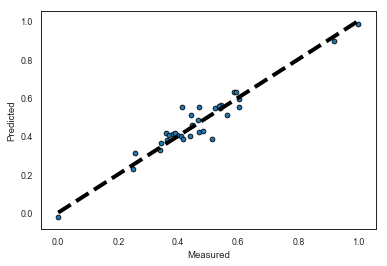

In [758]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Elasticity

In [759]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

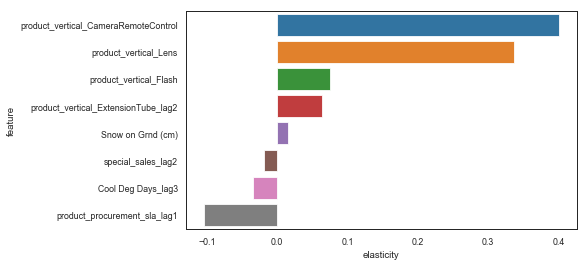

In [760]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Distributed Lag Model for Gaming Accessory

##### Splitting the Dataframe into Training and Testing Set

In [761]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(gam_dis_df, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features

In [762]:
scaler = MinMaxScaler()

In [763]:
num_vars=gam_dis_df.columns

In [764]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [765]:
y_train = df_train.pop('gmv')
X_train = df_train

In [766]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [767]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_GamePad', 'product_mrp', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAccessoryKit_lag2', 'product_vertical_GamingAdapter', 'product_vertical_GamingHeadset', 'product_vertical_GamingMouse', 'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker', 'product_vertical_GamingSpeaker_lag3', 'product_vertical_JoystickGamingWheel', 'product_vertical_MotionController_lag2', 'TV_lag2', 'Online marketing_lag3', 'Online_marketing_Ad_Stock', 'Max Temp_lag1', 'Cool Deg Days'], dtype='object')

In [768]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'Discount%', 'Discount%_lag1', 'Discount%_lag2', 'Discount%_lag3', 'deliverybdays', 'deliverybdays_lag1', 'deliverybdays_lag2',
       ...
       'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3', 'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2', 'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'], dtype='object', length=343)

In [769]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [770]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1051.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.61e-19
Time:                        18:48:00   Log-Likelihood:                 133.21
No. Observations:                  35   AIC:                            -224.4
Df Residuals:                      14   BIC:                            -191.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features    VIF
2                             is_mass_market 748.80
9             product_vertical_GamingHeadset 158.09
0                                      const 117.77
10              product_vertical_GamingMouse  81.76
3                   product_vertical_GamePad  39.93
18                 Online_marketing_Ad_Stock  29.51
14      product_vertical_JoystickGamingWheel  26.59
12            product_vertical_GamingSpeaker  21.79
6        product_vertical_GamingAccessoryKit  19.77
5                              special_sales  19.17
17                     Online marketing_lag3  15.73
8             product_vertical_GamingAdapter  14.87
20                             Cool Deg Days  14.18
11           product_vertical_GamingMousePad  12.76
19                             Max Temp_lag1  11.43
16                                   TV_lag2   8.61
4                                product_mrp   5.89
7   product_vertical_GamingAccessoryKit_lag2   4.66
1                 order_payment_type_Prepaid   4.57
13       product_vertical_GamingSpeaker_lag3   4.55
15    product_vertical_MotionController_lag2   3.07

In [771]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1182.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.90e-20
Time:                        18:48:00   Log-Likelihood:                 133.17
No. Observations:                  35   AIC:                            -226.3
Df Residuals:                      15   BIC:                            -195.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features    VIF
2                             is_mass_market 229.49
0                                      const 117.75
8             product_vertical_GamingHeadset  49.66
9               product_vertical_GamingMouse  31.46
17                 Online_marketing_Ad_Stock  28.59
13      product_vertical_JoystickGamingWheel  25.82
5        product_vertical_GamingAccessoryKit  19.20
4                              special_sales  19.17
11            product_vertical_GamingSpeaker  18.35
16                     Online marketing_lag3  14.77
19                             Cool Deg Days  14.14
7             product_vertical_GamingAdapter  13.98
18                             Max Temp_lag1  11.38
10           product_vertical_GamingMousePad   9.57
15                                   TV_lag2   8.24
3                                product_mrp   5.76
1                 order_payment_type_Prepaid   4.45
6   product_vertical_GamingAccessoryKit_lag2   4.30
12       product_vertical_GamingSpeaker_lag3   3.87
14    product_vertical_MotionController_lag2   2.76

In [772]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1317.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.50e-22
Time:                        18:48:01   Log-Likelihood:                 132.98
No. Observations:                  35   AIC:                            -228.0
Df Residuals:                      16   BIC:                            -198.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features    VIF
2                             is_mass_market 155.42
0                                      const 117.68
8             product_vertical_GamingHeadset  41.49
9               product_vertical_GamingMouse  29.37
16                 Online_marketing_Ad_Stock  26.67
12      product_vertical_JoystickGamingWheel  24.84
10            product_vertical_GamingSpeaker  18.02
15                     Online marketing_lag3  14.76
5        product_vertical_GamingAccessoryKit  13.81
18                             Cool Deg Days  13.25
7             product_vertical_GamingAdapter  12.38
17                             Max Temp_lag1  11.30
4                              special_sales  10.28
14                                   TV_lag2   6.95
3                                product_mrp   5.57
1                 order_payment_type_Prepaid   4.30
6   product_vertical_GamingAccessoryKit_lag2   4.21
11       product_vertical_GamingSpeaker_lag3   3.80
13    product_vertical_MotionController_lag2   2.76

In [773]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.55e-23
Time:                        18:48:01   Log-Likelihood:                 132.76
No. Observations:                  35   AIC:                            -229.5
Df Residuals:                      17   BIC:                            -201.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features    VIF
2                             is_mass_market 154.51
0                                      const 113.73
8             product_vertical_GamingHeadset  41.25
9               product_vertical_GamingMouse  25.15
15                 Online_marketing_Ad_Stock  19.58
14                     Online marketing_lag3  14.73
5        product_vertical_GamingAccessoryKit  13.62
7             product_vertical_GamingAdapter  11.26
17                             Cool Deg Days   9.35
16                             Max Temp_lag1   8.87
4                              special_sales   7.93
13                                   TV_lag2   6.72
11      product_vertical_JoystickGamingWheel   5.08
6   product_vertical_GamingAccessoryKit_lag2   4.14
3                                product_mrp   4.03
1                 order_payment_type_Prepaid   3.35
10       product_vertical_GamingSpeaker_lag3   3.21
12    product_vertical_MotionController_lag2   2.75

In [774]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.99e-24
Time:                        18:48:01   Log-Likelihood:                 126.78
No. Observations:                  35   AIC:                            -219.6
Df Residuals:                      18   BIC:                            -193.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 91.77
14                 Online_marketing_Ad_Stock 14.72
6             product_vertical_GamingAdapter 10.85
13                     Online marketing_lag3  9.20
8               product_vertical_GamingMouse  8.75
3                              special_sales  7.92
4        product_vertical_GamingAccessoryKit  7.78
16                             Cool Deg Days  7.06
7             product_vertical_GamingHeadset  6.88
12                                   TV_lag2  6.38
15                             Max Temp_lag1  5.29
10      product_vertical_JoystickGamingWheel  4.74
2                                product_mrp  4.03
5   product_vertical_GamingAccessoryKit_lag2  4.02
9        product_vertical_GamingSpeaker_lag3  2.92
11    product_vertical_MotionController_lag2  2.75
1                 order_payment_type_Prepaid  2.69

In [775]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online_marketing_Ad_Stock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     316.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.56e-19
Time:                        18:48:01   Log-Likelihood:                 101.88
No. Observations:                  35   AIC:                            -171.8
Df Residuals:                      19   BIC:                            -146.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 80.43
6             product_vertical_GamingAdapter 10.83
8               product_vertical_GamingMouse  8.46
3                              special_sales  7.92
4        product_vertical_GamingAccessoryKit  7.78
7             product_vertical_GamingHeadset  6.87
13                     Online marketing_lag3  6.41
12                                   TV_lag2  6.36
14                             Max Temp_lag1  5.24
10      product_vertical_JoystickGamingWheel  4.67
15                             Cool Deg Days  4.55
5   product_vertical_GamingAccessoryKit_lag2  3.92
2                                product_mrp  3.47
9        product_vertical_GamingSpeaker_lag3  2.90
11    product_vertical_MotionController_lag2  2.65
1                 order_payment_type_Prepaid  2.35

In [776]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     338.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.34e-20
Time:                        18:48:01   Log-Likelihood:                 100.97
No. Observations:                  35   AIC:                            -171.9
Df Residuals:                      20   BIC:                            -148.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 63.62
6             product_vertical_GamingAdapter 10.34
8               product_vertical_GamingMouse  8.35
3                              special_sales  7.88
4        product_vertical_GamingAccessoryKit  7.37
7             product_vertical_GamingHeadset  6.80
12                                   TV_lag2  5.47
13                             Max Temp_lag1  4.49
10      product_vertical_JoystickGamingWheel  4.32
14                             Cool Deg Days  4.27
5   product_vertical_GamingAccessoryKit_lag2  3.59
2                                product_mrp  3.34
11    product_vertical_MotionController_lag2  2.64
1                 order_payment_type_Prepaid  2.32
9        product_vertical_GamingSpeaker_lag3  2.20

In [777]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingSpeaker_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     352.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.59e-21
Time:                        18:48:01   Log-Likelihood:                 99.515
No. Observations:                  35   AIC:                            -171.0
Df Residuals:                      21   BIC:                            -149.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 57.16
6             product_vertical_GamingAdapter 10.17
8               product_vertical_GamingMouse  7.96
4        product_vertical_GamingAccessoryKit  7.28
3                              special_sales  6.91
7             product_vertical_GamingHeadset  6.28
11                                   TV_lag2  5.39
9       product_vertical_JoystickGamingWheel  4.32
12                             Max Temp_lag1  4.28
13                             Cool Deg Days  3.85
2                                product_mrp  3.33
5   product_vertical_GamingAccessoryKit_lag2  3.20
10    product_vertical_MotionController_lag2  2.37
1                 order_payment_type_Prepaid  2.30

In [778]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     291.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.40e-21
Time:                        18:48:01   Log-Likelihood:                 94.034
No. Observations:                  35   AIC:                            -162.1
Df Residuals:                      22   BIC:                            -141.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 56.54
7               product_vertical_GamingMouse  7.31
6             product_vertical_GamingHeadset  6.23
3                              special_sales  6.08
11                             Max Temp_lag1  4.25
8       product_vertical_JoystickGamingWheel  4.08
10                                   TV_lag2  4.07
12                             Cool Deg Days  3.82
4        product_vertical_GamingAccessoryKit  3.33
2                                product_mrp  3.27
5   product_vertical_GamingAccessoryKit_lag2  3.05
1                 order_payment_type_Prepaid  2.09
9     product_vertical_MotionController_lag2  2.00

In [779]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     316.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.22e-22
Time:                        18:48:02   Log-Likelihood:                 93.181
No. Observations:                  35   AIC:                            -162.4
Df Residuals:                      23   BIC:                            -143.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 47.46
7               product_vertical_GamingMouse  7.02
3                              special_sales  5.83
6             product_vertical_GamingHeadset  5.56
8       product_vertical_JoystickGamingWheel  4.07
10                             Max Temp_lag1  3.77
4        product_vertical_GamingAccessoryKit  3.31
2                                product_mrp  3.20
11                             Cool Deg Days  3.08
5   product_vertical_GamingAccessoryKit_lag2  2.91
9     product_vertical_MotionController_lag2  1.98
1                 order_payment_type_Prepaid  1.85

In [780]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_MotionController_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     341.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.39e-23
Time:                        18:48:02   Log-Likelihood:                 92.077
No. Observations:                  35   AIC:                            -162.2
Df Residuals:                      24   BIC:                            -145.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                      const 47.45
7               product_vertical_GamingMouse  7.01
3                              special_sales  5.77
6             product_vertical_GamingHeadset  5.43
8       product_vertical_JoystickGamingWheel  4.06
9                              Max Temp_lag1  3.75
2                                product_mrp  3.12
10                             Cool Deg Days  3.07
4        product_vertical_GamingAccessoryKit  3.00
5   product_vertical_GamingAccessoryKit_lag2  2.00
1                 order_payment_type_Prepaid  1.83

In [781]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMouse"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     294.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.32e-23
Time:                        18:48:02   Log-Likelihood:                 87.001
No. Observations:                  35   AIC:                            -154.0
Df Residuals:                      25   BIC:                            -138.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
0                                     const 46.80
6            product_vertical_GamingHeadset  5.39
7      product_vertical_JoystickGamingWheel  4.04
8                             Max Temp_lag1  3.63
2                               product_mrp  2.83
4       product_vertical_GamingAccessoryKit  2.53
9                             Cool Deg Days  2.48
3                             special_sales  1.94
5  product_vertical_GamingAccessoryKit_lag2  1.81
1                order_payment_type_Prepaid  1.68

In [782]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAccessoryKit_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     328.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.22e-24
Time:                        18:48:02   Log-Likelihood:                 86.143
No. Observations:                  35   AIC:                            -154.3
Df Residuals:                      26   BIC:                            -140.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 46.16
5        product_vertical_GamingHeadset  5.34
6  product_vertical_JoystickGamingWheel  4.00
7                         Max Temp_lag1  3.62
2                           product_mrp  2.58
4   product_vertical_GamingAccessoryKit  2.48
8                         Cool Deg Days  2.33
3                         special_sales  1.90
1            order_payment_type_Prepaid  1.56

In [783]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_mrp"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     372.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.70e-25
Time:                        18:48:02   Log-Likelihood:                 85.373
No. Observations:                  35   AIC:                            -154.7
Df Residuals:                      27   BIC:                            -142.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 27.25
4        product_vertical_GamingHeadset  5.29
5  product_vertical_JoystickGamingWheel  3.31
6                         Max Temp_lag1  3.30
3   product_vertical_GamingAccessoryKit  2.41
7                         Cool Deg Days  2.33
2                         special_sales  1.78
1            order_payment_type_Prepaid  1.51

In [784]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Cool Deg Days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.94e-26
Time:                        18:48:02   Log-Likelihood:                 83.409
No. Observations:                  35   AIC:                            -152.8
Df Residuals:                      28   BIC:                            -141.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 26.90
4        product_vertical_GamingHeadset  5.20
5  product_vertical_JoystickGamingWheel  3.10
6                         Max Temp_lag1  2.73
3   product_vertical_GamingAccessoryKit  2.34
2                         special_sales  1.64
1            order_payment_type_Prepaid  1.41

In [785]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingHeadset"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.83e-20
Time:                        18:48:02   Log-Likelihood:                 64.647
No. Observations:                  35   AIC:                            -117.3
Df Residuals:                      29   BIC:                            -108.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 17.05
3   product_vertical_GamingAccessoryKit  2.07
4  product_vertical_JoystickGamingWheel  2.03
1            order_payment_type_Prepaid  1.41
5                         Max Temp_lag1  1.41
2                         special_sales  1.31

In [786]:
X_train_rfe.columns


Index(['order_payment_type_Prepaid', 'special_sales', 'product_vertical_GamingAccessoryKit', 'product_vertical_JoystickGamingWheel', 'Max Temp_lag1'], dtype='object')

In [787]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)


['product_vertical_MotionController', 'Digital_SMA_3_lag3', 'deliverybdays', 'Sponsorship', 'Cool Deg Days_lag3', 'Cool Deg Days_lag2', 'holiday_week_lag3', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'product_vertical_GamePad_lag3', 'Sponsorship_SMA_5_lag2', 'product_vertical_GamePad_lag1', 'Online marketing_EMA_8_lag1', 'special_sales_lag3', 'TV_SMA_3', 'product_vertical_GamePad', 'SEM_EMA_8_lag2', 'Snow on Grnd (cm)_lag3', 'NPS_SMA_5_lag2', 'NPS_lag2', 'product_vertical_GamingHeadset_lag1', 'Total Rain (mm)', 'deliverycdays_lag1', 'SEM_SMA_5', 'Affiliates_EMA_8', 'Other', 'Digital_lag1', 'Sponsorship_SMA_3_lag2', 'TV_Ad_Stock', 'Affiliates_SMA_5_lag3', 'Digital_EMA_8_lag3', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'Total Precip (mm)_lag1', 'Content Marketing_EMA_8', 'Digital_Ad_Stock_lag1', 'Radio_EMA_8', 'TV_SMA_5_lag1', 'Radio_EMA_8_lag2', 'special_sales_lag2', 'product_vertical_GameControlMount_lag3', 'TV_SMA_5', 'Total Snow (cm)_lag1', 'product_vertical_JoystickGamingW

In [788]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.78497111, 0.96202626, 0.90540851, 0.94222915, 0.95024194,
       0.83481573, 0.705016  , 0.94883233, 0.907589  , 0.02676638])

In [789]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [790]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0025529934814557806
r_square_value : 0.9412831498595321


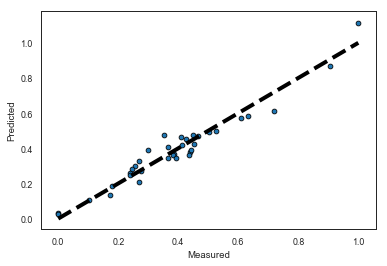

In [791]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Elasticity Analysis

In [792]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

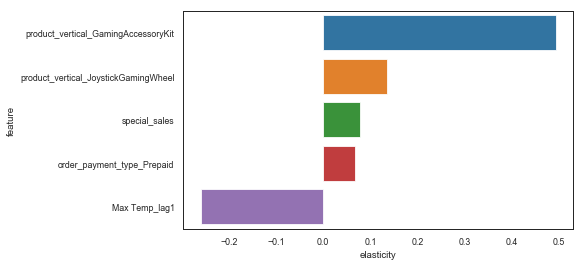

In [793]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Distributed Lag Model for Home Audio

###### Splitting the Dataframe into Training and Testing Set

In [794]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(home_dis_df, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features

In [795]:
scaler = MinMaxScaler()

In [796]:
num_vars=home_dis_df.columns

In [797]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [798]:
y_train = df_train.pop('gmv')
X_train = df_train

In [799]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [800]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['deliverybdays_lag3', 'order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_Dock', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HiFiSystem_lag1', 'product_vertical_HomeAudioSpeaker', 'product_vertical_VoiceRecorder', 'holiday_week', 'holiday_week_lag2', 'Total Investment_lag2', 'Sponsorship_lag2', 'Sponsorship_SMA_3_lag3', 'SEM_lag1', 'NPS', 'NPS_SMA_3_lag1', 'NPS_SMA_3_lag2', 'Cool Deg Days_lag1', 'Snow on Grnd (cm)_lag2'], dtype='object')

In [801]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'Discount%', 'Discount%_lag1', 'Discount%_lag2', 'Discount%_lag3', 'deliverybdays', 'deliverybdays_lag1', 'deliverybdays_lag2',
       ...
       'Total Snow (cm)_lag1', 'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3', 'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2', 'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag3'], dtype='object', length=315)

In [802]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [803]:

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     904.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.23e-16
Time:                        18:49:12   Log-Likelihood:                 129.60
No. Observations:                  33   AIC:                            -217.2
Df Residuals:                      12   BIC:                            -185.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 276.49
3                      is_mass_market 207.25
8   product_vertical_HomeAudioSpeaker  90.78
12              Total Investment_lag2  44.97
5            product_vertical_FMRadio  30.70
13                   Sponsorship_lag2  25.07
9      product_vertical_VoiceRecorder  15.54
6         product_vertical_HiFiSystem  13.75
19                 Cool Deg Days_lag1  13.07
4               product_vertical_Dock  11.62
16                                NPS  10.24
2          order_payment_type_Prepaid   8.73
18                     NPS_SMA_3_lag2   5.66
14             Sponsorship_SMA_3_lag3   5.47
20             Snow on Grnd (cm)_lag2   5.06
1                  deliverybdays_lag3   4.58
17                     NPS_SMA_3_lag1   3.99
15                           SEM_lag1   3.91
11                  holiday_week_lag2   3.54
10                       holiday_week   3.19
7    product_vertical_HiFiSystem_lag1   2.94

In [804]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Cool Deg Days_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     983.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.74e-17
Time:                        18:49:12   Log-Likelihood:                 128.82
No. Observations:                  33   AIC:                            -217.6
Df Residuals:                      13   BIC:                            -187.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 275.12
3                      is_mass_market 179.71
8   product_vertical_HomeAudioSpeaker  74.96
12              Total Investment_lag2  40.22
5            product_vertical_FMRadio  29.74
13                   Sponsorship_lag2  22.02
9      product_vertical_VoiceRecorder  13.97
6         product_vertical_HiFiSystem  13.38
4               product_vertical_Dock  11.43
2          order_payment_type_Prepaid   7.87
18                     NPS_SMA_3_lag2   5.65
14             Sponsorship_SMA_3_lag3   5.23
16                                NPS   5.06
19             Snow on Grnd (cm)_lag2   5.04
17                     NPS_SMA_3_lag1   3.93
1                  deliverybdays_lag3   3.78
15                           SEM_lag1   3.48
11                  holiday_week_lag2   3.37
10                       holiday_week   3.04
7    product_vertical_HiFiSystem_lag1   2.44

In [805]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Sponsorship_SMA_3_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     975.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.31e-18
Time:                        18:49:12   Log-Likelihood:                 126.56
No. Observations:                  33   AIC:                            -215.1
Df Residuals:                      14   BIC:                            -186.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 239.59
3                      is_mass_market 165.77
8   product_vertical_HomeAudioSpeaker  74.93
5            product_vertical_FMRadio  28.52
12              Total Investment_lag2  18.37
13                   Sponsorship_lag2  15.67
9      product_vertical_VoiceRecorder  13.45
4               product_vertical_Dock  10.41
6         product_vertical_HiFiSystem   9.88
2          order_payment_type_Prepaid   6.33
17                     NPS_SMA_3_lag2   4.92
18             Snow on Grnd (cm)_lag2   4.71
15                                NPS   4.52
16                     NPS_SMA_3_lag1   3.93
14                           SEM_lag1   3.47
1                  deliverybdays_lag3   3.46
11                  holiday_week_lag2   3.08
10                       holiday_week   3.03
7    product_vertical_HiFiSystem_lag1   2.23

In [806]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["order_payment_type_Prepaid"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     935.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.33e-19
Time:                        18:49:12   Log-Likelihood:                 123.80
No. Observations:                  33   AIC:                            -211.6
Df Residuals:                      15   BIC:                            -184.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 238.57
2                      is_mass_market 150.75
7   product_vertical_HomeAudioSpeaker  73.02
4            product_vertical_FMRadio  26.19
11              Total Investment_lag2  18.28
12                   Sponsorship_lag2  15.55
8      product_vertical_VoiceRecorder   9.86
3               product_vertical_Dock   9.83
5         product_vertical_HiFiSystem   6.50
16                     NPS_SMA_3_lag2   4.64
14                                NPS   4.17
15                     NPS_SMA_3_lag1   3.81
13                           SEM_lag1   3.41
1                  deliverybdays_lag3   3.10
9                        holiday_week   2.96
17             Snow on Grnd (cm)_lag2   2.79
10                  holiday_week_lag2   2.61
6    product_vertical_HiFiSystem_lag1   2.08

In [807]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.93e-21
Time:                        18:49:12   Log-Likelihood:                 122.97
No. Observations:                  33   AIC:                            -211.9
Df Residuals:                      16   BIC:                            -186.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 235.59
2                      is_mass_market 100.54
6   product_vertical_HomeAudioSpeaker  37.27
4            product_vertical_FMRadio  20.98
10              Total Investment_lag2  17.22
11                   Sponsorship_lag2  14.08
7      product_vertical_VoiceRecorder   8.51
3               product_vertical_Dock   7.91
15                     NPS_SMA_3_lag2   4.34
13                                NPS   4.17
14                     NPS_SMA_3_lag1   3.23
12                           SEM_lag1   3.04
1                  deliverybdays_lag3   2.97
16             Snow on Grnd (cm)_lag2   2.79
9                   holiday_week_lag2   2.59
8                        holiday_week   2.40
5    product_vertical_HiFiSystem_lag1   1.93

In [808]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     881.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.54e-21
Time:                        18:49:12   Log-Likelihood:                 118.69
No. Observations:                  33   AIC:                            -205.4
Df Residuals:                      17   BIC:                            -181.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 207.84
9               Total Investment_lag2  16.83
10                   Sponsorship_lag2  13.96
2               product_vertical_Dock   7.19
6      product_vertical_VoiceRecorder   6.65
3            product_vertical_FMRadio   6.58
5   product_vertical_HomeAudioSpeaker   5.43
12                                NPS   3.94
14                     NPS_SMA_3_lag2   3.89
13                     NPS_SMA_3_lag1   3.19
11                           SEM_lag1   3.02
15             Snow on Grnd (cm)_lag2   2.64
8                   holiday_week_lag2   2.58
1                  deliverybdays_lag3   2.42
7                        holiday_week   2.39
4    product_vertical_HiFiSystem_lag1   1.93

In [809]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Investment_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     788.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.97e-22
Time:                        18:49:13   Log-Likelihood:                 114.78
No. Observations:                  33   AIC:                            -199.6
Df Residuals:                      18   BIC:                            -177.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 205.78
6      product_vertical_VoiceRecorder   6.54
3            product_vertical_FMRadio   6.17
2               product_vertical_Dock   5.60
5   product_vertical_HomeAudioSpeaker   5.05
11                                NPS   3.92
13                     NPS_SMA_3_lag2   3.89
12                     NPS_SMA_3_lag1   3.03
10                           SEM_lag1   2.86
8                   holiday_week_lag2   2.55
9                    Sponsorship_lag2   2.54
14             Snow on Grnd (cm)_lag2   2.54
7                        holiday_week   2.37
1                  deliverybdays_lag3   2.01
4    product_vertical_HiFiSystem_lag1   1.86

In [810]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     455.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.79e-21
Time:                        18:49:13   Log-Likelihood:                 103.64
No. Observations:                  33   AIC:                            -179.3
Df Residuals:                      19   BIC:                            -158.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 110.92
2               product_vertical_Dock   4.28
3            product_vertical_FMRadio   3.68
5   product_vertical_HomeAudioSpeaker   3.46
12                     NPS_SMA_3_lag2   3.40
10                                NPS   2.83
11                     NPS_SMA_3_lag1   2.66
8                    Sponsorship_lag2   2.54
9                            SEM_lag1   2.48
13             Snow on Grnd (cm)_lag2   2.23
6                        holiday_week   2.20
7                   holiday_week_lag2   2.04
4    product_vertical_HiFiSystem_lag1   1.71
1                  deliverybdays_lag3   1.46

In [811]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     513.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.74e-22
Time:                        18:49:13   Log-Likelihood:                 103.43
No. Observations:                  33   AIC:                            -180.9
Df Residuals:                      20   BIC:                            -161.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                               const 108.69
4   product_vertical_HomeAudioSpeaker   3.33
11                     NPS_SMA_3_lag2   3.24
9                                 NPS   2.75
10                     NPS_SMA_3_lag1   2.56
7                    Sponsorship_lag2   2.41
8                            SEM_lag1   2.34
2            product_vertical_FMRadio   2.23
12             Snow on Grnd (cm)_lag2   2.19
5                        holiday_week   1.65
3    product_vertical_HiFiSystem_lag1   1.57
6                   holiday_week_lag2   1.57
1                  deliverybdays_lag3   1.39

In [812]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     582.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.64e-23
Time:                        18:49:13   Log-Likelihood:                 103.28
No. Observations:                  33   AIC:                            -182.6
Df Residuals:                      21   BIC:                            -164.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                               const 42.95
4   product_vertical_HomeAudioSpeaker  2.81
10                     NPS_SMA_3_lag2  2.67
9                      NPS_SMA_3_lag1  2.54
8                            SEM_lag1  2.33
7                    Sponsorship_lag2  2.29
2            product_vertical_FMRadio  2.20
11             Snow on Grnd (cm)_lag2  2.07
5                        holiday_week  1.63
6                   holiday_week_lag2  1.52
3    product_vertical_HiFiSystem_lag1  1.48
1                  deliverybdays_lag3  1.35

In [813]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_3_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     615.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.58e-24
Time:                        18:49:13   Log-Likelihood:                 101.85
No. Observations:                  33   AIC:                            -181.7
Df Residuals:                      22   BIC:                            -165.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                               const 30.87
4   product_vertical_HomeAudioSpeaker  2.68
8                            SEM_lag1  2.33
7                    Sponsorship_lag2  2.28
2            product_vertical_FMRadio  2.20
10             Snow on Grnd (cm)_lag2  2.03
5                        holiday_week  1.62
6                   holiday_week_lag2  1.52
3    product_vertical_HiFiSystem_lag1  1.47
9                      NPS_SMA_3_lag2  1.43
1                  deliverybdays_lag3  1.35

In [814]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Sponsorship_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     625.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.62e-25
Time:                        18:49:13   Log-Likelihood:                 99.663
No. Observations:                  33   AIC:                            -179.3
Df Residuals:                      23   BIC:                            -164.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 30.21
4  product_vertical_HomeAudioSpeaker  2.65
2           product_vertical_FMRadio  2.16
9             Snow on Grnd (cm)_lag2  1.78
7                           SEM_lag1  1.73
5                       holiday_week  1.62
3   product_vertical_HiFiSystem_lag1  1.47
6                  holiday_week_lag2  1.47
1                 deliverybdays_lag3  1.32
8                     NPS_SMA_3_lag2  1.27

In [815]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     667.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.91e-26
Time:                        18:49:13   Log-Likelihood:                 98.085
No. Observations:                  33   AIC:                            -178.2
Df Residuals:                      24   BIC:                            -164.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 26.59
4  product_vertical_HomeAudioSpeaker  2.46
2           product_vertical_FMRadio  2.16
8             Snow on Grnd (cm)_lag2  1.72
5                       holiday_week  1.45
6                  holiday_week_lag2  1.44
1                 deliverybdays_lag3  1.31
7                     NPS_SMA_3_lag2  1.20
3   product_vertical_HiFiSystem_lag1  1.16

In [816]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["holiday_week"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     702.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.58e-27
Time:                        18:49:14   Log-Likelihood:                 96.059
No. Observations:                  33   AIC:                            -176.1
Df Residuals:                      25   BIC:                            -164.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 25.87
4  product_vertical_HomeAudioSpeaker  2.17
2           product_vertical_FMRadio  1.93
7             Snow on Grnd (cm)_lag2  1.72
5                  holiday_week_lag2  1.43
6                     NPS_SMA_3_lag2  1.13
3   product_vertical_HiFiSystem_lag1  1.10
1                 deliverybdays_lag3  1.08

In [817]:
X_train_rfe.columns

Index(['deliverybdays_lag3', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem_lag1', 'product_vertical_HomeAudioSpeaker', 'holiday_week_lag2', 'NPS_SMA_3_lag2', 'Snow on Grnd (cm)_lag2'], dtype='object')

In [818]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Digital_SMA_3_lag3', 'deliverybdays', 'Sponsorship', 'Cool Deg Days_lag3', 'Cool Deg Days_lag2', 'holiday_week_lag3', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'product_vertical_HiFiSystem', 'Sponsorship_SMA_5_lag2', 'Online marketing_EMA_8_lag1', 'product_vertical_FMRadio_lag1', 'special_sales_lag3', 'TV_SMA_3', 'SEM_EMA_8_lag2', 'Snow on Grnd (cm)_lag3', 'NPS_SMA_5_lag2', 'NPS_lag2', 'Total Rain (mm)', 'deliverycdays_lag1', 'SEM_SMA_5', 'Affiliates_EMA_8', 'Other', 'pay_week_lag2', 'Digital_lag1', 'Sponsorship_SMA_3_lag2', 'TV_Ad_Stock', 'Affiliates_SMA_5_lag3', 'product_vertical_HiFiSystem_lag3', 'pay_week_lag1', 'pay_week', 'Digital_EMA_8_lag3', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'product_vertical_VoiceRecorder_lag3', 'Total Precip (mm)_lag1', 'Content Marketing_EMA_8', 'Digital_Ad_Stock_lag1', 'Radio_EMA_8', 'TV_SMA_5_lag1', 'product_vertical_DockingStation_lag1', 'Radio_EMA_8_lag2', 'special_sales_lag2', 'TV_SMA_5', 'Total Snow (cm)_lag1', 'Content Marketing_E

In [819]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.92918426, 0.9761733 , 0.98574548, 0.99591078, 0.80077631,
       0.99400275, 0.97265484, 0.99888616, 0.99160822, 0.96687159])

In [820]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [821]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0002892305791592612
r_square_value : 0.9915588802841014


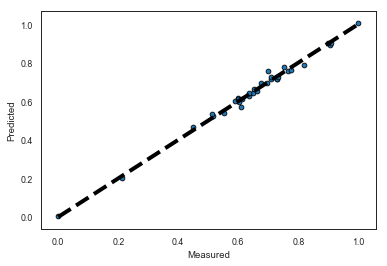

In [822]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

###### Elasticity Analysis

In [823]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

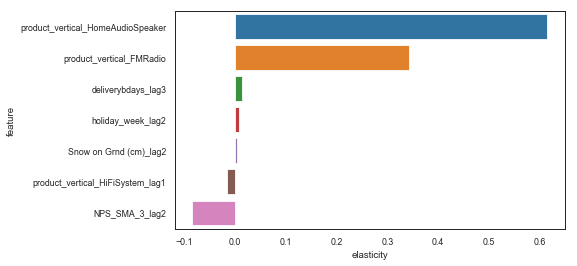

In [824]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## Distributed Lag Model (Multiplicative)

The Distributive Lag Model(Multiplicative) will now help us capture current-to-current interactions and carry over KPIs effects. 

Take data logarithms (on both sides of the model) to fit a multiplicative model, then analyze the log data as before.


Yt = α+ µ1ln(Yt-1) + µ2ln(Yt-2) + µ3ln(Yt-3) + ....

    + β1ln(X1t) + β1ln(X1t-1) + β1ln(X1t-2) + ....

    + β2ln(X2t) + β2ln(X2t-1) + β2ln(X2t-2) + ....

    + β3ln(X3t) + β3ln(X3t-1) + β3ln(X3t-2) + ....

    + β4ln(X4t) + β4ln(X4t-1) + β4ln(X4t-2) + ....

    + β5ln(X5t) + β5ln(X5t-1) + β5ln(X5t-2) + ....

    + ϵ'

In [825]:
# Making copy of dataframes from the original ones
cam_dis_mul_df = Camera_accessory_org_df.copy()
gam_dis_mul_df = gaming_accessory_org_df.copy()
home_dis_mul_df = Homeaudio_org_df.copy()
home_dis_mul_df.head() 

gmv  Discount%  deliverybdays  deliverycdays  sla  product_procurement_sla  order_payment_type_Prepaid  is_mass_market  special_sales  product_vertical_Dock  product_vertical_DockingStation  product_vertical_FMRadio  product_vertical_HiFiSystem  product_vertical_HomeAudioSpeaker  product_mrp  product_vertical_SoundMixer  product_vertical_VoiceRecorder  pay_week  holiday_week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock   TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  \
26 1185712.00      30.67           0.00           0.00 7.00                     1.95                      213.00             793              0                     24                                1                    334.00                            8                             541.00      1958.61                            0                               2         0             0              4.26                    0.00                    0.00                    4.26                       4.26 0.05      0.00      0.00      0.05         0.05     0.63           0.00           0.00           0.63              0.63         1.85               0.00               0.00               1.85                  1.85               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.33        0.14              0.00   
27 1471962.00      30.37           0.00           0.00 6.71                     1.78                      243.00             936            297                     36                                0                    374.00                           19                             657.00      2016.77                            0                               7         1             0              4.26                    0.00                    0.00                    4.26                       6.82 0.05      0.00      0.00      0.05         0.09     0.63           0.00           0.00           0.63              1.01         1.85               0.00               0.00               1.85                  2.97               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.00                    0.00                    0.33                       0.53        0.14              0.00   
28 1275392.00      28.88           0.00           0.00 6.82                     1.80                      191.00             909              0                     40                                0                    394.00                           16                             544.00      1896.30                            0                               1         0             0              4.26                    4.26                    0.00                    4.26                       8.36 0.05      0.05      0.00      0.05         0.11     0.63           0.63           0.00           0.63              1.24         1.85               1.85               0.00               1.85                  3.63               0.00                     0.00                     0.00                     0.00                        0.00              0.33                    0.33                    0.00                    0.33                       0.65        0.14              0.14   
29  920394.00      28.04           0.00           0.00

In [826]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(home_dis_mul_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(home_dis_mul_df.isnull().sum()/home_dis_mul_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

Total  Percentage
Snow on Grnd (cm)              0        0.00
Digital_SMA_3                  0        0.00
Total Investment_EMA_8         0        0.00
Total_Investment_Ad_Stock      0        0.00
TV                             0        0.00

###### Create new lag(Lag of 3 weeks) variables for the dependent variable (GMV) as well as independent variables

In [827]:
cam_dis_mul_df_columns = cam_dis_mul_df.columns
gam_dis_mul_df_columns = gam_dis_mul_df.columns
home_dis_mul_df_columns = home_dis_mul_df.columns

In [828]:
cam_dis_mul_df = lag_variables(cam_dis_mul_df,cam_dis_mul_df_columns,3)
gam_dis_mul_df = lag_variables(gam_dis_mul_df,gam_dis_mul_df_columns,3)
home_dis_mul_df = lag_variables(home_dis_mul_df,home_dis_mul_df_columns,3)
home_dis_mul_df.head()

gmv   gmv_lag3  Discount%  Discount%_lag3  deliverybdays  deliverybdays_lag3  deliverycdays  deliverycdays_lag3  sla  sla_lag3  product_procurement_sla  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag3  special_sales  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag3  product_vertical_HiFiSystem  product_vertical_HiFiSystem_lag3  product_vertical_HomeAudioSpeaker  product_vertical_HomeAudioSpeaker_lag3  product_mrp  product_mrp_lag3  product_vertical_SoundMixer  product_vertical_SoundMixer_lag3  product_vertical_VoiceRecorder  product_vertical_VoiceRecorder_lag3  pay_week  pay_week_lag3  holiday_week  holiday_week_lag3  Total Investment  Total Investment_lag3  Total Investment_SMA_3  Total Investment_SMA_3_lag3  Total Investment_SMA_5  \
26 1185712.00        nan      30.67             nan           0.00                 nan           0.00                 nan 7.00       nan                     1.95                           nan                      213.00                              nan             793                  nan              0                 nan                     24                         nan                                1                                   nan                    334.00                            nan                            8                               nan                             541.00                                     nan      1958.61               nan                            0                               nan                               2                                  nan         0            nan             0                nan              4.26                    nan                    0.00                          nan                    0.00   
27 1471962.00        nan      30.37             nan           0.00                 nan           0.00                 nan 6.71       nan                     1.78                           nan                      243.00                              nan             936                  nan            297                 nan                     36                         nan                                0                                   nan                    374.00                            nan                           19                               nan                             657.00                                     nan      2016.77               nan                            0                               nan                               7                                  nan         1            nan             0                nan              4.26                    nan                    0.00                          nan                    0.00   
28 1275392.00        nan      28.88             nan           0.00                 nan           0.00                 nan 6.82       nan                     1.80                           nan                      191.00                              nan             909                  nan              0                 nan                     40                         nan                                0                                   nan                    394.00                            nan                           16                               nan                             544.00                                     nan      1896.30               nan                            0                               nan                               1                                  nan         0            nan             0                nan              4.26                    nan                    4.26                          nan                    0.00   
29  920394.00 1185712.00      28.04           30.67           0.00        

###### Create new lag(Lag of 2 weeks) variables for the dependent variable (GMV) as well as independent variables

In [829]:
cam_dis_mul_df = lag_variables(cam_dis_mul_df,cam_dis_mul_df_columns,2)
gam_dis_mul_df = lag_variables(gam_dis_mul_df,gam_dis_mul_df_columns,2)
home_dis_mul_df = lag_variables(home_dis_mul_df,home_dis_mul_df_columns,2)
home_dis_mul_df.head()

gmv   gmv_lag2   gmv_lag3  Discount%  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag2  product_vertical_FMRadio_lag3  product_vertical_HiFiSystem  product_vertical_HiFiSystem_lag2  product_vertical_HiFiSystem_lag3  product_vertical_HomeAudioSpeaker  product_vertical_HomeAudioSpeaker_lag2  product_vertical_HomeAudioSpeaker_lag3  \
26 1185712.00        nan        nan      30.67             nan             nan           0.00                 nan                 nan           0.00                 nan                 nan 7.00       nan       nan                     1.95                           nan                           nan                      213.00                              nan                              nan             793                  nan                  nan              0                 nan                 nan                     24                         nan                         nan                                1                                   nan                                   nan                    334.00                            nan                            nan                            8                               nan                               nan                             541.00                                     nan                                     nan   
27 1471962.00        nan        nan      30.37             nan             nan           0.00                 nan                 nan           0.00                 nan                 nan 6.71       nan       nan                     1.78                           nan                           nan                      243.00                              nan                              nan             936                  nan                  nan            297                 nan                 nan                     36                         nan                         nan                                0                                   nan                                   nan                    374.00                            nan                            nan                           19                               nan                               nan                             657.00                                     nan                                     nan   
28 1275392.00 1185712.00        nan      28.88           30.67             nan           0.00                0.00                 nan           0.00                0.00                 nan 6.82      7.00       nan                     1.80                          1.95                           nan                      191.00                           213.00                              nan             909               793.00                  nan              0                0.00                 nan                     40                       24.00                         nan                                0                                  1.00                                   nan                    394.00                         334.00                            nan                           16                              8.00                               nan                             544.00                                  541.00                                     nan   
29  920394.00 1471962.

###### Create new lag(Lag of 1 week) variables for the dependent variable (GMV) as well as independent variables

In [830]:
cam_dis_mul_df = lag_variables(cam_dis_mul_df,cam_dis_mul_df_columns,1)
gam_dis_mul_df = lag_variables(gam_dis_mul_df,gam_dis_mul_df_columns,1)
home_dis_mul_df = lag_variables(home_dis_mul_df,home_dis_mul_df_columns,1)
home_dis_mul_df.head()

gmv   gmv_lag1   gmv_lag2   gmv_lag3  Discount%  Discount%_lag1  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag1  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag1  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag1  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag1  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag1  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag1  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag1  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag1  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag1  \
26 1185712.00        nan        nan        nan      30.67             nan             nan             nan           0.00                 nan                 nan                 nan           0.00                 nan                 nan                 nan 7.00       nan       nan       nan                     1.95                           nan                           nan                           nan                      213.00                              nan                              nan                              nan             793                  nan                  nan                  nan              0                 nan                 nan                 nan                     24                         nan                         nan                         nan                                1                                   nan                                   nan                                   nan                    334.00                            nan   
27 1471962.00 1185712.00        nan        nan      30.37           30.67             nan             nan           0.00                0.00                 nan                 nan           0.00                0.00                 nan                 nan 6.71      7.00       nan       nan                     1.78                          1.95                           nan                           nan                      243.00                           213.00                              nan                              nan             936               793.00                  nan                  nan            297                0.00                 nan                 nan                     36                       24.00                         nan                         nan                                0                                  1.00                                   nan                                   nan                    374.00                         334.00   
28 1275392.00 1471962.00 1185712.00        nan      28.88           30.37           30.67             nan           0.00                0.00                0.00                 nan           0.00                0.00                0.00                 nan 6.82      6.71      7.00       nan                     1.80                          1.78                          1.95                           nan                      191.00                           243.00                           213.00                              nan             909               936.00               793.00                  nan              0              297.00                0.00                 nan                     40                       36.00                       24.00                         nan                                0                                  0.00                                  1.00                                   nan                    394.00                         374.00   
29  92

###### Imputing all null values with 0

In [831]:
# Imputing all null values with 0
cam_dis_mul_df.fillna(value=0, inplace=True)
gam_dis_mul_df.fillna(value=0, inplace=True)
home_dis_mul_df.fillna(value=0, inplace=True)
home_dis_mul_df.head(10)

gmv   gmv_lag1   gmv_lag2   gmv_lag3  Discount%  Discount%_lag1  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag1  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag1  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag1  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag1  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag1  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag1  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag1  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag1  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag1  \
26 1185712.00       0.00       0.00       0.00      30.67            0.00            0.00            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 7.00      0.00      0.00      0.00                     1.95                          0.00                          0.00                          0.00                      213.00                             0.00                             0.00                             0.00             793                 0.00                 0.00                 0.00              0                0.00                0.00                0.00                     24                        0.00                        0.00                        0.00                                1                                  0.00                                  0.00                                  0.00                    334.00                           0.00   
27 1471962.00 1185712.00       0.00       0.00      30.37           30.67            0.00            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 6.71      7.00      0.00      0.00                     1.78                          1.95                          0.00                          0.00                      243.00                           213.00                             0.00                             0.00             936               793.00                 0.00                 0.00            297                0.00                0.00                0.00                     36                       24.00                        0.00                        0.00                                0                                  1.00                                  0.00                                  0.00                    374.00                         334.00   
28 1275392.00 1471962.00 1185712.00       0.00      28.88           30.37           30.67            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 6.82      6.71      7.00      0.00                     1.80                          1.78                          1.95                          0.00                      191.00                           243.00                           213.00                             0.00             909               936.00               793.00                 0.00              0              297.00                0.00                0.00                     40                       36.00                       24.00                        0.00                                0                                  0.00                                  1.00                                  0.00                    394.00                         374.00   
29  92

##### Taking Logarithm of both the Dependent and the independent variables

After taking log, all 0 values will be transformed to inf. Retransforming these values to 0.

In [832]:
cam_dis_mul_df = cam_dis_mul_df.applymap(lambda x: np.log(x))
cam_dis_mul_df = cam_dis_mul_df.replace([np.inf, -np.inf], 0)
cam_dis_mul_df = cam_dis_mul_df.replace(np.nan, 0)

gam_dis_mul_df = gam_dis_mul_df.applymap(lambda x: np.log(x))
gam_dis_mul_df = gam_dis_mul_df.replace([np.inf, -np.inf], 0)
gam_dis_mul_df = gam_dis_mul_df.replace(np.nan, 0)

home_dis_mul_df = home_dis_mul_df.applymap(lambda x: np.log(x))
home_dis_mul_df = home_dis_mul_df.replace([np.inf, -np.inf], 0)
home_dis_mul_df = home_dis_mul_df.replace(np.nan, 0)

home_dis_mul_df.head()

gmv  gmv_lag1  gmv_lag2  gmv_lag3  Discount%  Discount%_lag1  Discount%_lag2  Discount%_lag3  deliverybdays  deliverybdays_lag1  deliverybdays_lag2  deliverybdays_lag3  deliverycdays  deliverycdays_lag1  deliverycdays_lag2  deliverycdays_lag3  sla  sla_lag1  sla_lag2  sla_lag3  product_procurement_sla  product_procurement_sla_lag1  product_procurement_sla_lag2  product_procurement_sla_lag3  order_payment_type_Prepaid  order_payment_type_Prepaid_lag1  order_payment_type_Prepaid_lag2  order_payment_type_Prepaid_lag3  is_mass_market  is_mass_market_lag1  is_mass_market_lag2  is_mass_market_lag3  special_sales  special_sales_lag1  special_sales_lag2  special_sales_lag3  product_vertical_Dock  product_vertical_Dock_lag1  product_vertical_Dock_lag2  product_vertical_Dock_lag3  product_vertical_DockingStation  product_vertical_DockingStation_lag1  product_vertical_DockingStation_lag2  product_vertical_DockingStation_lag3  product_vertical_FMRadio  product_vertical_FMRadio_lag1  \
26 13.99      0.00      0.00      0.00       3.42            0.00            0.00            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 1.95      0.00      0.00      0.00                     0.67                          0.00                          0.00                          0.00                        5.36                             0.00                             0.00                             0.00            6.68                 0.00                 0.00                 0.00           0.00                0.00                0.00                0.00                   3.18                        0.00                        0.00                        0.00                             0.00                                  0.00                                  0.00                                  0.00                      5.81                           0.00   
27 14.20     13.99      0.00      0.00       3.41            3.42            0.00            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 1.90      1.95      0.00      0.00                     0.58                          0.67                          0.00                          0.00                        5.49                             5.36                             0.00                             0.00            6.84                 6.68                 0.00                 0.00           5.69                0.00                0.00                0.00                   3.58                        3.18                        0.00                        0.00                             0.00                                  0.00                                  0.00                                  0.00                      5.92                           5.81   
28 14.06     14.20     13.99      0.00       3.36            3.41            3.42            0.00           0.00                0.00                0.00                0.00           0.00                0.00                0.00                0.00 1.92      1.90      1.95      0.00                     0.59                          0.58                          0.67                          0.00                        5.25                             5.49                             5.36                             0.00            6.81                 6.84                 6.68                 0.00           0.00                5.69                0.00                0.00                   3.69                        3.58                        3.18                        0.00                             0.00                                  0.00                                  0.00                                  0.00                      5.98                           5.92   
29 13.73     14.06     14.20     

In [833]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(home_dis_mul_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(home_dis_mul_df.isnull().sum()/home_dis_mul_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

Total  Percentage
Snow on Grnd (cm)_lag3      0        0.00
TV_Ad_Stock_lag2            0        0.00
TV_SMA_5_lag2               0        0.00
TV_SMA_5_lag3               0        0.00
TV_EMA_8                    0        0.00

### Distributed Lag Model(Multiplicative) for Camera Accessory

###### Splitting the Dataframe into Training and Testing Set

In [834]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(cam_dis_mul_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [835]:
scaler = MinMaxScaler()

In [836]:
num_vars =cam_dis_mul_df.columns

In [837]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [838]:
y_train = df_train.pop('gmv')
X_train = df_train

In [839]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [840]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type_Prepaid', 'is_mass_market', 'product_vertical_CameraBag', 'product_vertical_CameraFilmRolls_lag3', 'product_vertical_CameraMicrophone_lag2', 'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod', 'product_vertical_Filter', 'Total Investment', 'TV_SMA_5', 'TV_EMA_8', 'Online marketing_SMA_5', 'Affiliates_SMA_5', 'NPS_SMA_3_lag2', 'NPS_SMA_5_lag1', 'NPS_SMA_5_lag2', 'Stock Index_SMA_3_lag2', 'Stock Index_SMA_5_lag1', 'Stock Index_SMA_5_lag2', 'Total Precip (mm)_lag1'], dtype='object')

In [841]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'Discount%', 'Discount%_lag1', 'Discount%_lag2', 'Discount%_lag3', 'deliverybdays', 'deliverybdays_lag1', 'deliverybdays_lag2',
       ...
       'Total Snow (cm)_lag1', 'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3', 'Total Precip (mm)', 'Total Precip (mm)_lag2', 'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'], dtype='object', length=371)

In [842]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [843]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2176.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.19e-18
Time:                        21:03:01   Log-Likelihood:                 149.18
No. Observations:                  33   AIC:                            -256.4
Df Residuals:                      12   BIC:                            -224.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features       VIF
15                          NPS_SMA_5_lag1 200521.27
18                  Stock Index_SMA_5_lag1  89803.52
0                                    const  73045.08
16                          NPS_SMA_5_lag2  72978.50
14                          NPS_SMA_3_lag2  32367.40
19                  Stock Index_SMA_5_lag2  24168.80
17                  Stock Index_SMA_3_lag2  20825.03
11                                TV_EMA_8   4473.09
12                  Online marketing_SMA_5   4125.83
13                        Affiliates_SMA_5   3333.90
10                                TV_SMA_5    755.51
2                           is_mass_market    560.41
7            product_vertical_CameraTripod    144.87
3               product_vertical_CameraBag    132.43
8                  product_vertical_Filter     87.19
1               order_payment_type_Prepaid     54.81
6     product_vertical_CameraRemoteControl     51.27
4    product_vertical_CameraFilmRolls_lag3     37.48
9                         Total Investment     35.28
5   product_vertical_CameraMicrophone_lag2     11.24
20                  Total Precip (mm)_lag1      4.49

In [844]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index_SMA_5_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2472.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.36e-20
Time:                        21:03:38   Log-Likelihood:                 149.11
No. Observations:                  33   AIC:                            -258.2
Df Residuals:                      13   BIC:                            -228.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
0                                    const 55377.44
15                          NPS_SMA_5_lag1 52741.79
16                          NPS_SMA_5_lag2 45695.10
18                  Stock Index_SMA_5_lag2 18975.25
14                          NPS_SMA_3_lag2  9322.27
17                  Stock Index_SMA_3_lag2  6864.40
11                                TV_EMA_8  3593.58
12                  Online marketing_SMA_5  2560.41
13                        Affiliates_SMA_5  2218.53
10                                TV_SMA_5   589.96
2                           is_mass_market   467.07
7            product_vertical_CameraTripod   131.97
3               product_vertical_CameraBag   130.95
8                  product_vertical_Filter    86.64
1               order_payment_type_Prepaid    51.45
6     product_vertical_CameraRemoteControl    43.17
4    product_vertical_CameraFilmRolls_lag3    35.69
9                         Total Investment    31.10
5   product_vertical_CameraMicrophone_lag2    11.16
19                  Total Precip (mm)_lag1     4.28

In [845]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Investment"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2804.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.09e-22
Time:                        21:04:20   Log-Likelihood:                 149.08
No. Observations:                  33   AIC:                            -260.2
Df Residuals:                      14   BIC:                            -231.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
14                          NPS_SMA_5_lag1 50356.86
15                          NPS_SMA_5_lag2 29301.75
0                                    const 17933.27
17                  Stock Index_SMA_5_lag2 13089.25
13                          NPS_SMA_3_lag2  8163.53
16                  Stock Index_SMA_3_lag2  6486.93
11                  Online marketing_SMA_5  1819.50
12                        Affiliates_SMA_5  1369.57
10                                TV_EMA_8   995.78
9                                 TV_SMA_5   214.81
2                           is_mass_market   194.58
3               product_vertical_CameraBag   125.81
8                  product_vertical_Filter    79.86
7            product_vertical_CameraTripod    56.53
1               order_payment_type_Prepaid    51.33
6     product_vertical_CameraRemoteControl    42.68
4    product_vertical_CameraFilmRolls_lag3    24.35
5   product_vertical_CameraMicrophone_lag2     8.18
18                  Total Precip (mm)_lag1     2.88

In [846]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3164.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.45e-23
Time:                        21:04:51   Log-Likelihood:                 148.99
No. Observations:                  33   AIC:                            -262.0
Df Residuals:                      15   BIC:                            -235.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
13                          NPS_SMA_5_lag1 40259.07
14                          NPS_SMA_5_lag2 27317.20
16                  Stock Index_SMA_5_lag2  9612.09
12                          NPS_SMA_3_lag2  7212.51
15                  Stock Index_SMA_3_lag2  6486.72
0                                    const  5113.92
10                  Online marketing_SMA_5  1341.31
11                        Affiliates_SMA_5  1034.87
3               product_vertical_CameraBag   122.58
2                           is_mass_market   114.84
9                                 TV_EMA_8   103.64
8                  product_vertical_Filter    77.73
1               order_payment_type_Prepaid    44.82
7            product_vertical_CameraTripod    42.57
6     product_vertical_CameraRemoteControl    35.88
4    product_vertical_CameraFilmRolls_lag3    24.00
5   product_vertical_CameraMicrophone_lag2     7.67
17                  Total Precip (mm)_lag1     2.74

In [847]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV_EMA_8"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3583.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.36e-25
Time:                        21:05:24   Log-Likelihood:                 148.98
No. Observations:                  33   AIC:                            -264.0
Df Residuals:                      16   BIC:                            -238.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
12                          NPS_SMA_5_lag1 36770.26
13                          NPS_SMA_5_lag2 27071.67
15                  Stock Index_SMA_5_lag2  7465.95
14                  Stock Index_SMA_3_lag2  5780.82
11                          NPS_SMA_3_lag2  5677.41
0                                    const  2849.00
9                   Online marketing_SMA_5  1108.54
10                        Affiliates_SMA_5   684.03
3               product_vertical_CameraBag   122.16
2                           is_mass_market    97.71
8                  product_vertical_Filter    75.65
7            product_vertical_CameraTripod    42.48
1               order_payment_type_Prepaid    40.54
6     product_vertical_CameraRemoteControl    30.86
4    product_vertical_CameraFilmRolls_lag3    23.78
5   product_vertical_CameraMicrophone_lag2     7.44
16                  Total Precip (mm)_lag1     2.74

In [848]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_3_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3738.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.25e-27
Time:                        21:06:11   Log-Likelihood:                 147.61
No. Observations:                  33   AIC:                            -263.2
Df Residuals:                      17   BIC:                            -239.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
11                          NPS_SMA_5_lag1 31802.69
12                          NPS_SMA_5_lag2 27043.14
0                                    const  2757.36
14                  Stock Index_SMA_5_lag2  1865.10
9                   Online marketing_SMA_5  1104.69
10                        Affiliates_SMA_5   681.09
13                  Stock Index_SMA_3_lag2   224.17
3               product_vertical_CameraBag   122.10
2                           is_mass_market    97.57
8                  product_vertical_Filter    75.64
7            product_vertical_CameraTripod    40.32
1               order_payment_type_Prepaid    32.88
6     product_vertical_CameraRemoteControl    27.79
4    product_vertical_CameraFilmRolls_lag3    21.18
5   product_vertical_CameraMicrophone_lag2     6.60
15                  Total Precip (mm)_lag1     2.73

In [849]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraFilmRolls_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3924.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.17e-28
Time:                        21:06:46   Log-Likelihood:                 146.33
No. Observations:                  33   AIC:                            -262.7
Df Residuals:                      18   BIC:                            -240.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
10                          NPS_SMA_5_lag1 29921.94
11                          NPS_SMA_5_lag2 23745.73
0                                    const  2726.71
13                  Stock Index_SMA_5_lag2  1741.23
8                   Online marketing_SMA_5  1050.73
9                         Affiliates_SMA_5   666.60
12                  Stock Index_SMA_3_lag2   222.70
3               product_vertical_CameraBag   118.51
2                           is_mass_market    76.33
7                  product_vertical_Filter    72.99
1               order_payment_type_Prepaid    32.87
6            product_vertical_CameraTripod    28.49
5     product_vertical_CameraRemoteControl    27.74
4   product_vertical_CameraMicrophone_lag2     6.50
14                  Total Precip (mm)_lag1     2.58

In [850]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4164.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.04e-30
Time:                        21:08:55   Log-Likelihood:                 145.19
No. Observations:                  33   AIC:                            -262.4
Df Residuals:                      19   BIC:                            -241.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
9                           NPS_SMA_5_lag1 28015.12
10                          NPS_SMA_5_lag2 22514.09
0                                    const  2681.80
12                  Stock Index_SMA_5_lag2  1673.69
7                   Online marketing_SMA_5  1017.44
8                         Affiliates_SMA_5   634.96
11                  Stock Index_SMA_3_lag2   218.25
3               product_vertical_CameraBag   105.86
2                           is_mass_market    73.73
6                  product_vertical_Filter    69.90
1               order_payment_type_Prepaid    32.71
5            product_vertical_CameraTripod    24.10
4   product_vertical_CameraMicrophone_lag2     6.48
13                  Total Precip (mm)_lag1     2.54

In [851]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_5_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4085.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.82e-31
Time:                        21:09:50   Log-Likelihood:                 142.71
No. Observations:                  33   AIC:                            -259.4
Df Residuals:                      20   BIC:                            -240.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features     VIF
11                  Stock Index_SMA_5_lag2 1486.53
9                           NPS_SMA_5_lag1 1250.14
0                                    const 1179.00
7                   Online marketing_SMA_5  542.76
8                         Affiliates_SMA_5  322.01
10                  Stock Index_SMA_3_lag2  104.34
3               product_vertical_CameraBag   97.03
2                           is_mass_market   72.67
6                  product_vertical_Filter   69.89
1               order_payment_type_Prepaid   26.27
5            product_vertical_CameraTripod   22.50
4   product_vertical_CameraMicrophone_lag2    5.94
12                  Total Precip (mm)_lag1    2.31

In [852]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_5_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4451.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.10e-33
Time:                        21:10:40   Log-Likelihood:                 141.89
No. Observations:                  33   AIC:                            -259.8
Df Residuals:                      21   BIC:                            -241.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features     VIF
0                                    const 1177.77
7                   Online marketing_SMA_5  534.21
8                         Affiliates_SMA_5  322.01
9                   Stock Index_SMA_3_lag2  104.34
3               product_vertical_CameraBag   95.81
10                  Stock Index_SMA_5_lag2   83.74
2                           is_mass_market   72.42
6                  product_vertical_Filter   68.68
1               order_payment_type_Prepaid   26.18
5            product_vertical_CameraTripod   20.79
4   product_vertical_CameraMicrophone_lag2    5.53
11                  Total Precip (mm)_lag1    2.18

In [853]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4725.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.02e-34
Time:                        21:11:05   Log-Likelihood:                 140.53
No. Observations:                  33   AIC:                            -259.1
Df Residuals:                      22   BIC:                            -242.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features     VIF
0                                    const 1177.67
6                   Online marketing_SMA_5  465.18
7                         Affiliates_SMA_5  276.82
8                   Stock Index_SMA_3_lag2  103.76
9                   Stock Index_SMA_5_lag2   76.92
2                           is_mass_market   47.89
5                  product_vertical_Filter   29.20
1               order_payment_type_Prepaid   25.78
4            product_vertical_CameraTripod    7.46
3   product_vertical_CameraMicrophone_lag2    4.58
10                  Total Precip (mm)_lag1    1.40

In [854]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraTripod"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4880.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.51e-35
Time:                        21:11:40   Log-Likelihood:                 138.60
No. Observations:                  33   AIC:                            -257.2
Df Residuals:                      23   BIC:                            -242.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features     VIF
0                                   const 1172.85
5                  Online marketing_SMA_5  446.48
6                        Affiliates_SMA_5  264.74
7                  Stock Index_SMA_3_lag2  103.22
8                  Stock Index_SMA_5_lag2   74.37
2                          is_mass_market   47.86
1              order_payment_type_Prepaid   25.76
4                 product_vertical_Filter   25.65
3  product_vertical_CameraMicrophone_lag2    4.51
9                  Total Precip (mm)_lag1    1.38

In [855]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4399.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.56e-36
Time:                        21:12:25   Log-Likelihood:                 134.24
No. Observations:                  33   AIC:                            -250.5
Df Residuals:                      24   BIC:                            -237.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features    VIF
0                                   const 496.98
7                  Stock Index_SMA_5_lag2  63.84
2                          is_mass_market  47.39
6                  Stock Index_SMA_3_lag2  42.90
1              order_payment_type_Prepaid  24.90
4                 product_vertical_Filter  24.55
5                        Affiliates_SMA_5   4.66
3  product_vertical_CameraMicrophone_lag2   4.30
8                  Total Precip (mm)_lag1   1.27

In [856]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index_SMA_5_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1245.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.66e-30
Time:                        21:12:47   Log-Likelihood:                 110.58
No. Observations:                  33   AIC:                            -205.2
Df Residuals:                      25   BIC:                            -193.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features   VIF
0                                   const 50.71
2                          is_mass_market 41.56
1              order_payment_type_Prepaid 23.94
4                 product_vertical_Filter 19.87
5                        Affiliates_SMA_5  4.44
3  product_vertical_CameraMicrophone_lag2  4.08
7                  Total Precip (mm)_lag1  1.27
6                  Stock Index_SMA_3_lag2  1.15

In [857]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraMicrophone_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.13e-31
Time:                        21:13:18   Log-Likelihood:                 110.27
No. Observations:                  33   AIC:                            -206.5
Df Residuals:                      26   BIC:                            -196.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Features   VIF
0                       const 49.89
2              is_mass_market 32.61
3     product_vertical_Filter 18.22
1  order_payment_type_Prepaid  7.48
4            Affiliates_SMA_5  4.00
5      Stock Index_SMA_3_lag2  1.07
6      Total Precip (mm)_lag1  1.05

In [858]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["order_payment_type_Prepaid"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1837.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.71e-33
Time:                        21:13:48   Log-Likelihood:                 110.17
No. Observations:                  33   AIC:                            -208.3
Df Residuals:                      27   BIC:                            -199.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 49.76
1           is_mass_market 18.32
2  product_vertical_Filter 16.53
3         Affiliates_SMA_5  4.00
5   Total Precip (mm)_lag1  1.05
4   Stock Index_SMA_3_lag2  1.04

In [859]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Total Precip (mm)_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2066.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.74e-34
Time:                        21:14:06   Log-Likelihood:                 107.84
No. Observations:                  33   AIC:                            -205.7
Df Residuals:                      28   BIC:                            -198.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 39.12
1           is_mass_market 18.11
2  product_vertical_Filter 16.53
3         Affiliates_SMA_5  3.90
4   Stock Index_SMA_3_lag2  1.04

In [860]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Affiliates_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2587.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.63e-35
Time:                        21:14:34   Log-Likelihood:                 106.23
No. Observations:                  33   AIC:                            -204.5
Df Residuals:                      29   BIC:                            -198.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 39.11
1           is_mass_market 16.43
2  product_vertical_Filter 16.37
3   Stock Index_SMA_3_lag2  1.02

In [861]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     414.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.43e-22
Time:                        21:15:01   Log-Likelihood:                 69.268
No. Observations:                  33   AIC:                            -132.5
Df Residuals:                      30   BIC:                            -128.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 39.09
1  product_vertical_Filter  1.00
2   Stock Index_SMA_3_lag2  1.00

In [862]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index_SMA_3_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     855.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.86e-24
Time:                        21:15:32   Log-Likelihood:                 69.265
No. Observations:                  33   AIC:                            -134.5
Df Residuals:                      31   BIC:                            -131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 30.27
1  product_vertical_Filter  1.00

In [863]:
X_train_rfe.columns

Index(['product_vertical_Filter'], dtype='object')

In [864]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)


['product_vertical_FlashShoeAdapter', 'Digital_SMA_3_lag3', 'deliverybdays', 'Sponsorship', 'Cool Deg Days_lag3', 'Cool Deg Days_lag2', 'product_vertical_CameraRemoteControl', 'holiday_week_lag3', 'Total Investment_EMA_8', 'product_vertical_CameraTripod_lag2', 'TV_EMA_8', 'Sponsorship_SMA_5', 'Sponsorship_SMA_5_lag2', 'Online marketing_EMA_8_lag1', 'product_vertical_Filter_lag2', 'special_sales_lag3', 'TV_SMA_3', 'product_vertical_Lens_lag2', 'product_vertical_CameraBattery_lag3', 'SEM_EMA_8_lag2', 'Snow on Grnd (cm)_lag3', 'product_vertical_CameraMicrophone_lag3', 'NPS_SMA_5_lag2', 'NPS_lag2', 'Total Rain (mm)', 'product_vertical_Telescope_lag3', 'deliverycdays_lag1', 'SEM_SMA_5', 'Affiliates_EMA_8', 'Other', 'product_vertical_CameraBattery_lag1', 'pay_week_lag2', 'Digital_lag1', 'Sponsorship_SMA_3_lag2', 'TV_Ad_Stock', 'Affiliates_SMA_5_lag3', 'product_vertical_CameraTripod_lag3', 'pay_week_lag1', 'pay_week', 'Digital_EMA_8_lag3', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'Total Precip (mm

In [865]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([-5.34335903,  0.86264491, -0.85183441,  0.73543313, -4.75441697,
       -1.45140536, -0.0269125 ,  0.72089009, -2.27343062, -4.48722811])

In [866]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [867]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005022207123624176
r_square_value : 0.8004053513574034


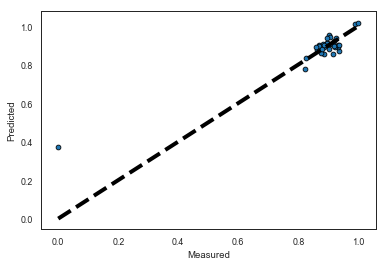

In [868]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Elasticity for Camera Accessory

In [869]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

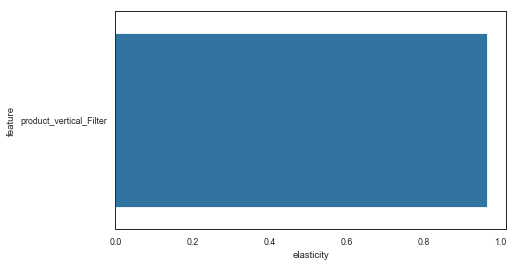

In [870]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Distributed Lag Model(Multiplicative) for Gaming Accessory

###### Splitting the Dataframe into Training and Testing Set

In [871]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(gam_dis_mul_df, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features

In [872]:
scaler = MinMaxScaler()

In [873]:
num_vars= gam_dis_mul_df.columns

In [874]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [875]:
y_train = df_train.pop('gmv')
X_train = df_train


In [876]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [877]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Discount%_lag1', 'deliverycdays_lag1', 'sla', 'product_procurement_sla', 'product_procurement_sla_lag1', 'product_procurement_sla_lag3', 'order_payment_type_Prepaid', 'is_mass_market', 'is_mass_market_lag3', 'product_mrp', 'product_vertical_GamingAdapter', 'product_vertical_GamingChargingStation_lag3', 'product_vertical_GamingMouse', 'product_vertical_TVOutCableAccessory', 'product_vertical_TVOutCableAccessory_lag1', 'SEM_lag3', 'NPS_SMA_3_lag2', 'NPS_SMA_5', 'NPS_SMA_5_lag1', 'Stock Index_SMA_3_lag3'], dtype='object')

In [878]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'Discount%', 'Discount%_lag2', 'Discount%_lag3', 'deliverybdays', 'deliverybdays_lag1', 'deliverybdays_lag2', 'deliverybdays_lag3',
       ...
       'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3', 'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2', 'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'], dtype='object', length=343)

In [879]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [880]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2468.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.68e-21
Time:                        21:27:00   Log-Likelihood:                 149.34
No. Observations:                  35   AIC:                            -256.7
Df Residuals:                      14   BIC:                            -224.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features      VIF
17                               NPS_SMA_3_lag2 19583.72
18                                    NPS_SMA_5 19516.83
20                       Stock Index_SMA_3_lag3  1976.87
19                               NPS_SMA_5_lag1  1945.30
0                                         const   558.98
8                                is_mass_market   176.73
13                 product_vertical_GamingMouse    99.03
14         product_vertical_TVOutCableAccessory    58.66
7                    order_payment_type_Prepaid    53.97
11               product_vertical_GamingAdapter    34.67
9                           is_mass_market_lag3    34.64
15    product_vertical_TVOutCableAccessory_lag1    10.84
6                  product_procurement_sla_lag3    10.28
5                  product_procurement_sla_lag1     8.66
4                       product_procurement_sla     8.62
10                                  product_mrp     8.61
3                                           sla     4.36
2                            deliverycdays_lag1     4.32
1                                Discount%_lag1     2.88
16                                     SEM_lag3     2.82
12  product_vertical_GamingChargingStation_lag3     2.46

In [881]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Stock Index_SMA_3_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2737.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.52e-23
Time:                        21:27:45   Log-Likelihood:                 149.04
No. Observations:                  35   AIC:                            -258.1
Df Residuals:                      15   BIC:                            -227.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features      VIF
17                               NPS_SMA_3_lag2 19583.45
18                                    NPS_SMA_5 19516.80
0                                         const   557.41
8                                is_mass_market   149.25
13                 product_vertical_GamingMouse    98.88
14         product_vertical_TVOutCableAccessory    58.31
7                    order_payment_type_Prepaid    42.77
11               product_vertical_GamingAdapter    34.67
9                           is_mass_market_lag3    32.15
19                               NPS_SMA_5_lag1    19.22
15    product_vertical_TVOutCableAccessory_lag1    10.32
6                  product_procurement_sla_lag3     9.17
10                                  product_mrp     8.60
4                       product_procurement_sla     8.51
5                  product_procurement_sla_lag1     8.44
3                                           sla     4.34
2                            deliverycdays_lag1     4.09
1                                Discount%_lag1     2.87
16                                     SEM_lag3     2.72
12  product_vertical_GamingChargingStation_lag3     2.23

In [882]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_5_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2932.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.13e-25
Time:                        21:28:25   Log-Likelihood:                 148.17
No. Observations:                  35   AIC:                            -258.3
Df Residuals:                      16   BIC:                            -228.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features      VIF
17                               NPS_SMA_3_lag2 19564.15
18                                    NPS_SMA_5 19455.56
0                                         const   476.58
8                                is_mass_market   146.21
13                 product_vertical_GamingMouse    98.02
14         product_vertical_TVOutCableAccessory    51.73
7                    order_payment_type_Prepaid    41.95
9                           is_mass_market_lag3    31.91
11               product_vertical_GamingAdapter    31.15
15    product_vertical_TVOutCableAccessory_lag1    10.27
6                  product_procurement_sla_lag3     8.66
10                                  product_mrp     8.32
5                  product_procurement_sla_lag1     7.98
4                       product_procurement_sla     6.78
3                                           sla     3.78
2                            deliverycdays_lag1     3.43
16                                     SEM_lag3     2.57
1                                Discount%_lag1     2.49
12  product_vertical_GamingChargingStation_lag3     2.23

In [883]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3082.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.76e-26
Time:                        21:34:51   Log-Likelihood:                 146.98
No. Observations:                  35   AIC:                            -258.0
Df Residuals:                      17   BIC:                            -230.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features     VIF
16                               NPS_SMA_3_lag2 5530.23
17                                    NPS_SMA_5 5508.61
0                                         const  444.38
8                                is_mass_market  139.95
12                 product_vertical_GamingMouse   64.45
13         product_vertical_TVOutCableAccessory   48.84
7                    order_payment_type_Prepaid   32.01
10               product_vertical_GamingAdapter   24.85
14    product_vertical_TVOutCableAccessory_lag1    6.86
4                       product_procurement_sla    6.77
9                                   product_mrp    6.42
5                  product_procurement_sla_lag1    6.26
6                  product_procurement_sla_lag3    4.34
2                            deliverycdays_lag1    3.40
3                                           sla    3.31
15                                     SEM_lag3    2.54
1                                Discount%_lag1    2.09
11  product_vertical_GamingChargingStation_lag3    2.08

In [884]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3390.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.56e-28
Time:                        21:35:20   Log-Likelihood:                 146.59
No. Observations:                  35   AIC:                            -259.2
Df Residuals:                      18   BIC:                            -232.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features    VIF
0                                         const 427.15
8                                is_mass_market 139.92
12                 product_vertical_GamingMouse  64.42
13         product_vertical_TVOutCableAccessory  43.32
7                    order_payment_type_Prepaid  30.01
10               product_vertical_GamingAdapter  24.80
14    product_vertical_TVOutCableAccessory_lag1   6.65
9                                   product_mrp   6.35
4                       product_procurement_sla   6.30
5                  product_procurement_sla_lag1   6.23
6                  product_procurement_sla_lag3   4.17
2                            deliverycdays_lag1   3.36
16                               NPS_SMA_3_lag2   3.28
3                                           sla   3.22
15                                     SEM_lag3   2.35
1                                Discount%_lag1   2.08
11  product_vertical_GamingChargingStation_lag3   1.91

In [885]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["order_payment_type_Prepaid"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3703.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.16e-29
Time:                        21:35:48   Log-Likelihood:                 146.06
No. Observations:                  35   AIC:                            -260.1
Df Residuals:                      19   BIC:                            -235.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features    VIF
0                                         const 388.70
7                                is_mass_market 127.70
11                 product_vertical_GamingMouse  54.86
12         product_vertical_TVOutCableAccessory  33.02
9                product_vertical_GamingAdapter  21.90
13    product_vertical_TVOutCableAccessory_lag1   6.53
4                       product_procurement_sla   6.30
5                  product_procurement_sla_lag1   6.18
8                                   product_mrp   5.38
6                  product_procurement_sla_lag3   3.80
15                               NPS_SMA_3_lag2   3.27
2                            deliverycdays_lag1   2.93
3                                           sla   2.46
14                                     SEM_lag3   2.33
1                                Discount%_lag1   1.83
10  product_vertical_GamingChargingStation_lag3   1.72

In [886]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMouse"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4116.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.02e-31
Time:                        21:36:30   Log-Likelihood:                 145.80
No. Observations:                  35   AIC:                            -261.6
Df Residuals:                      20   BIC:                            -238.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features    VIF
0                                         const 386.87
7                                is_mass_market  52.06
11         product_vertical_TVOutCableAccessory  24.38
9                product_vertical_GamingAdapter  18.98
12    product_vertical_TVOutCableAccessory_lag1   6.51
4                       product_procurement_sla   5.60
8                                   product_mrp   5.24
5                  product_procurement_sla_lag1   4.67
6                  product_procurement_sla_lag3   3.73
2                            deliverycdays_lag1   2.76
14                               NPS_SMA_3_lag2   2.70
13                                     SEM_lag3   2.27
3                                           sla   1.96
1                                Discount%_lag1   1.83
10  product_vertical_GamingChargingStation_lag3   1.52

In [887]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Discount%_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4354.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.78e-33
Time:                        21:37:06   Log-Likelihood:                 144.64
No. Observations:                  35   AIC:                            -261.3
Df Residuals:                      21   BIC:                            -239.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Features    VIF
0                                         const 359.98
6                                is_mass_market  51.48
10         product_vertical_TVOutCableAccessory  24.06
8                product_vertical_GamingAdapter  18.98
11    product_vertical_TVOutCableAccessory_lag1   5.80
3                       product_procurement_sla   5.59
7                                   product_mrp   5.18
4                  product_procurement_sla_lag1   4.39
5                  product_procurement_sla_lag3   3.34
1                            deliverycdays_lag1   2.75
13                               NPS_SMA_3_lag2   2.48
12                                     SEM_lag3   2.22
2                                           sla   1.95
9   product_vertical_GamingChargingStation_lag3   1.44

In [888]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingChargingStation_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4693.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.40e-34
Time:                        21:37:45   Log-Likelihood:                 143.73
No. Observations:                  35   AIC:                            -261.5
Df Residuals:                      22   BIC:                            -241.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Features    VIF
0                                       const 300.92
6                              is_mass_market  45.77
9        product_vertical_TVOutCableAccessory  21.99
8              product_vertical_GamingAdapter  18.93
10  product_vertical_TVOutCableAccessory_lag1   5.58
7                                 product_mrp   5.18
3                     product_procurement_sla   4.81
4                product_procurement_sla_lag1   4.34
5                product_procurement_sla_lag3   3.29
1                          deliverycdays_lag1   2.75
12                             NPS_SMA_3_lag2   2.46
11                                   SEM_lag3   2.19
2                                         sla   1.93

In [889]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5007.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.00e-36
Time:                        21:39:16   Log-Likelihood:                 142.57
No. Observations:                  35   AIC:                            -261.1
Df Residuals:                      23   BIC:                            -242.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Features    VIF
0                                       const 298.78
6                              is_mass_market  30.14
8        product_vertical_TVOutCableAccessory  21.93
9   product_vertical_TVOutCableAccessory_lag1   5.04
7                                 product_mrp   4.92
3                     product_procurement_sla   4.79
4                product_procurement_sla_lag1   4.14
5                product_procurement_sla_lag3   3.17
1                          deliverycdays_lag1   2.49
11                             NPS_SMA_3_lag2   2.46
10                                   SEM_lag3   2.19
2                                         sla   1.74

In [890]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["deliverycdays_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5061.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.34e-37
Time:                        21:40:37   Log-Likelihood:                 140.34
No. Observations:                  35   AIC:                            -258.7
Df Residuals:                      24   BIC:                            -241.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Features    VIF
0                                       const 192.58
5                              is_mass_market  29.79
7        product_vertical_TVOutCableAccessory  21.54
2                     product_procurement_sla   4.57
6                                 product_mrp   4.48
3                product_procurement_sla_lag1   3.65
8   product_vertical_TVOutCableAccessory_lag1   3.31
4                product_procurement_sla_lag3   2.97
10                             NPS_SMA_3_lag2   2.42
1                                         sla   1.73
9                                    SEM_lag3   1.67

In [891]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["SEM_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5520.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.18e-39
Time:                        21:41:14   Log-Likelihood:                 139.30
No. Observations:                  35   AIC:                            -258.6
Df Residuals:                      25   BIC:                            -243.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Features    VIF
0                                      const 183.13
5                             is_mass_market  26.32
7       product_vertical_TVOutCableAccessory  19.00
2                    product_procurement_sla   4.16
6                                product_mrp   3.58
3               product_procurement_sla_lag1   3.54
8  product_vertical_TVOutCableAccessory_lag1   3.20
4               product_procurement_sla_lag3   2.90
9                             NPS_SMA_3_lag2   2.40
1                                        sla   1.70

In [892]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5761.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.25e-40
Time:                        21:42:29   Log-Likelihood:                 137.31
No. Observations:                  35   AIC:                            -256.6
Df Residuals:                      26   BIC:                            -242.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Features    VIF
0                                      const 153.36
4                             is_mass_market  22.47
6       product_vertical_TVOutCableAccessory  17.40
1                    product_procurement_sla   4.07
5                                product_mrp   3.51
2               product_procurement_sla_lag1   3.33
7  product_vertical_TVOutCableAccessory_lag1   3.20
3               product_procurement_sla_lag3   2.90
8                             NPS_SMA_3_lag2   2.38

In [893]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.08e-18
Time:                        21:42:54   Log-Likelihood:                 67.199
No. Observations:                  35   AIC:                            -118.4
Df Residuals:                      27   BIC:                            -106.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Features    VIF
0                                      const 139.50
1                    product_procurement_sla   3.88
2               product_procurement_sla_lag1   3.29
6  product_vertical_TVOutCableAccessory_lag1   3.16
4                                product_mrp   2.94
5       product_vertical_TVOutCableAccessory   2.71
3               product_procurement_sla_lag3   2.43
7                             NPS_SMA_3_lag2   2.30

In [894]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_TVOutCableAccessory_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.53e-20
Time:                        21:43:28   Log-Likelihood:                 67.188
No. Observations:                  35   AIC:                            -120.4
Df Residuals:                      28   BIC:                            -109.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features    VIF
0                                 const 101.02
1               product_procurement_sla   3.88
4                           product_mrp   2.83
5  product_vertical_TVOutCableAccessory   2.48
3          product_procurement_sla_lag3   2.39
2          product_procurement_sla_lag1   2.34
6                        NPS_SMA_3_lag2   2.27

In [895]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_3_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.07e-21
Time:                        21:44:17   Log-Likelihood:                 67.168
No. Observations:                  35   AIC:                            -122.3
Df Residuals:                      29   BIC:                            -113.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 95.43
1               product_procurement_sla  3.88
4                           product_mrp  2.83
5  product_vertical_TVOutCableAccessory  2.48
2          product_procurement_sla_lag1  1.95
3          product_procurement_sla_lag3  1.11

In [896]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_procurement_sla_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     220.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.75e-22
Time:                        21:44:46   Log-Likelihood:                 66.159
No. Observations:                  35   AIC:                            -122.3
Df Residuals:                      30   BIC:                            -114.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 95.26
1               product_procurement_sla  3.28
3                           product_mrp  2.56
4  product_vertical_TVOutCableAccessory  2.14
2          product_procurement_sla_lag3  1.04

In [897]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     280.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.58e-22
Time:                        21:45:26   Log-Likelihood:                 64.763
No. Observations:                  35   AIC:                            -121.5
Df Residuals:                      31   BIC:                            -115.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features   VIF
0                                 const 32.68
2                           product_mrp  1.66
3  product_vertical_TVOutCableAccessory  1.66
1          product_procurement_sla_lag3  1.02

In [898]:
X_train_rfe.columns

Index(['product_procurement_sla_lag3', 'product_mrp', 'product_vertical_TVOutCableAccessory'], dtype='object')

In [899]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['product_vertical_MotionController', 'Digital_SMA_3_lag3', 'deliverybdays', 'Sponsorship', 'Cool Deg Days_lag3', 'Cool Deg Days_lag2', 'holiday_week_lag3', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'product_vertical_GamePad_lag3', 'Sponsorship_SMA_5_lag2', 'product_vertical_GamePad_lag1', 'Online marketing_EMA_8_lag1', 'special_sales_lag3', 'TV_SMA_3', 'product_vertical_GamePad', 'SEM_EMA_8_lag2', 'Snow on Grnd (cm)_lag3', 'NPS_SMA_5_lag2', 'NPS_lag2', 'product_vertical_GamingHeadset_lag1', 'Total Rain (mm)', 'deliverycdays_lag1', 'SEM_SMA_5', 'Affiliates_EMA_8', 'Other', 'Digital_lag1', 'Sponsorship_SMA_3_lag2', 'TV_Ad_Stock', 'Affiliates_SMA_5_lag3', 'Digital_EMA_8_lag3', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'Total Precip (mm)_lag1', 'Content Marketing_EMA_8', 'Digital_Ad_Stock_lag1', 'Radio_EMA_8', 'TV_SMA_5_lag1', 'Radio_EMA_8_lag2', 'special_sales_lag2', 'product_vertical_GameControlMount_lag3', 'TV_SMA_5', 'Total Snow (cm)_lag1', 'product_vertical_JoystickGamingW

In [900]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([-0.31378513,  0.56029319,  0.28647962,  0.98397016,  0.97218846,
       -3.56562712, -1.80714544,  0.90105125,  0.28705064, -4.66752785])

In [901]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [902]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.002173370019208809
r_square_value : 0.9465152562855872


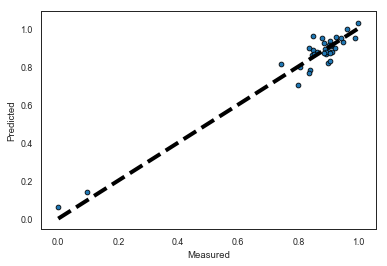

In [903]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

###### Elasticity

In [904]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

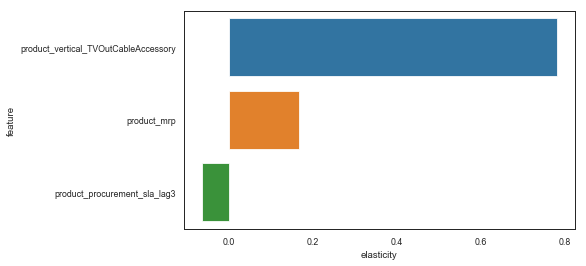

In [905]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Distributed Lag Model(Multiplicative) for Home Audio

###### Splitting the Dataframe into Training and Testing Set

In [906]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(home_dis_mul_df, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features

In [907]:
scaler = MinMaxScaler()

In [908]:
num_vars= home_dis_mul_df.columns

In [909]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [910]:
y_train = df_train.pop('gmv')
X_train = df_train

In [911]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [913]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Discount%', 'deliverycdays', 'deliverycdays_lag2', 'product_procurement_sla', 'is_mass_market', 'product_vertical_DockingStation_lag2', 'product_vertical_DockingStation_lag3', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker', 'product_vertical_VoiceRecorder_lag2', 'TV', 'Digital_lag1', 'Online marketing', 'Radio_lag2', 'Radio_SMA_3_lag1', 'NPS', 'NPS_SMA_3_lag2', 'NPS_SMA_5', 'Cool Deg Days'], dtype='object')

In [914]:
# neglecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'Discount%_lag1', 'Discount%_lag2', 'Discount%_lag3', 'deliverybdays', 'deliverybdays_lag1', 'deliverybdays_lag2', 'deliverybdays_lag3',
       ...
       'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3', 'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2', 'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'], dtype='object', length=315)

In [915]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [916]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4441.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.04e-20
Time:                        21:59:12   Log-Likelihood:                 159.59
No. Observations:                  33   AIC:                            -277.2
Df Residuals:                      12   BIC:                            -245.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
19                             NPS_SMA_5 37105.81
18                        NPS_SMA_3_lag2 36886.75
5                         is_mass_market  1653.87
0                                  const  1308.57
10     product_vertical_HomeAudioSpeaker   928.62
14                      Online marketing   378.07
8               product_vertical_FMRadio   339.45
20                         Cool Deg Days    51.20
12                                    TV    49.16
1                              Discount%    38.83
4                product_procurement_sla    36.72
11   product_vertical_VoiceRecorder_lag2    24.27
17                                   NPS    22.19
16                      Radio_SMA_3_lag1    12.49
7   product_vertical_DockingStation_lag3    11.99
15                            Radio_lag2    10.81
9            product_vertical_HiFiSystem     9.35
6   product_vertical_DockingStation_lag2     7.51
3                     deliverycdays_lag2     6.98
2                          deliverycdays     6.48
13                          Digital_lag1     5.85

In [917]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Discount%"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4649.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.20e-22
Time:                        21:59:47   Log-Likelihood:                 158.18
No. Observations:                  33   AIC:                            -276.4
Df Residuals:                      13   BIC:                            -246.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
17                        NPS_SMA_3_lag2 23447.31
18                             NPS_SMA_5 23056.83
4                         is_mass_market  1561.50
0                                  const  1290.08
9      product_vertical_HomeAudioSpeaker   817.76
13                      Online marketing   378.03
7               product_vertical_FMRadio   314.03
11                                    TV    43.96
19                         Cool Deg Days    30.13
10   product_vertical_VoiceRecorder_lag2    22.98
3                product_procurement_sla    21.12
16                                   NPS    19.91
15                      Radio_SMA_3_lag1     9.74
14                            Radio_lag2     9.66
8            product_vertical_HiFiSystem     9.33
6   product_vertical_DockingStation_lag3     8.87
5   product_vertical_DockingStation_lag2     7.46
1                          deliverycdays     6.08
2                     deliverycdays_lag2     5.62
12                          Digital_lag1     4.78

In [918]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["deliverycdays_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4799.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.88e-23
Time:                        22:00:17   Log-Likelihood:                 156.59
No. Observations:                  33   AIC:                            -275.2
Df Residuals:                      14   BIC:                            -246.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
16                        NPS_SMA_3_lag2 17005.32
17                             NPS_SMA_5 16805.59
3                         is_mass_market  1537.71
0                                  const  1285.52
8      product_vertical_HomeAudioSpeaker   715.51
6               product_vertical_FMRadio   313.61
12                      Online marketing   278.72
10                                    TV    42.37
18                         Cool Deg Days    20.78
9    product_vertical_VoiceRecorder_lag2    19.62
15                                   NPS    18.85
2                product_procurement_sla    18.02
13                            Radio_lag2     9.39
7            product_vertical_HiFiSystem     8.89
14                      Radio_SMA_3_lag1     8.76
5   product_vertical_DockingStation_lag3     8.69
4   product_vertical_DockingStation_lag2     7.42
11                          Digital_lag1     4.71
1                          deliverycdays     4.19

In [919]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_DockingStation_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3366.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.12e-24
Time:                        22:00:56   Log-Likelihood:                 148.66
No. Observations:                  33   AIC:                            -261.3
Df Residuals:                      15   BIC:                            -234.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
15                        NPS_SMA_3_lag2 15901.34
16                             NPS_SMA_5 15572.12
3                         is_mass_market  1446.68
0                                  const  1090.79
7      product_vertical_HomeAudioSpeaker   589.97
5               product_vertical_FMRadio   311.06
11                      Online marketing   258.82
9                                     TV    38.71
17                         Cool Deg Days    20.58
8    product_vertical_VoiceRecorder_lag2    18.82
14                                   NPS    18.72
2                product_procurement_sla    14.30
12                            Radio_lag2     8.93
4   product_vertical_DockingStation_lag3     8.54
13                      Radio_SMA_3_lag1     8.49
6            product_vertical_HiFiSystem     7.92
10                          Digital_lag1     4.25
1                          deliverycdays     3.76

In [920]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["is_mass_market"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3793.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.50e-25
Time:                        22:01:40   Log-Likelihood:                 148.56
No. Observations:                  33   AIC:                            -263.1
Df Residuals:                      16   BIC:                            -237.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
14                        NPS_SMA_3_lag2 15839.95
15                             NPS_SMA_5 15536.60
0                                  const  1076.96
10                      Online marketing   248.68
6      product_vertical_HomeAudioSpeaker   167.63
4               product_vertical_FMRadio    43.37
8                                     TV    38.58
16                         Cool Deg Days    20.58
7    product_vertical_VoiceRecorder_lag2    18.65
13                                   NPS    18.13
2                product_procurement_sla    14.28
11                            Radio_lag2     8.89
3   product_vertical_DockingStation_lag3     8.53
12                      Radio_SMA_3_lag1     8.35
5            product_vertical_HiFiSystem     7.10
9                           Digital_lag1     4.18
1                          deliverycdays     3.73

In [921]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3867.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.44e-27
Time:                        22:02:40   Log-Likelihood:                 146.82
No. Observations:                  33   AIC:                            -261.6
Df Residuals:                      17   BIC:                            -237.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
13                        NPS_SMA_3_lag2 13939.80
14                             NPS_SMA_5 13719.76
0                                  const  1037.39
9                       Online marketing   214.57
5      product_vertical_HomeAudioSpeaker    98.65
7                                     TV    38.52
4               product_vertical_FMRadio    32.69
12                                   NPS    17.92
6    product_vertical_VoiceRecorder_lag2    17.69
15                         Cool Deg Days    15.84
2                product_procurement_sla    10.69
3   product_vertical_DockingStation_lag3     8.20
11                      Radio_SMA_3_lag1     7.60
10                            Radio_lag2     6.74
8                           Digital_lag1     3.44
1                          deliverycdays     3.38

In [922]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4041.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.67e-28
Time:                        22:04:15   Log-Likelihood:                 145.46
No. Observations:                  33   AIC:                            -260.9
Df Residuals:                      18   BIC:                            -238.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
12                        NPS_SMA_3_lag2 13319.93
13                             NPS_SMA_5 13155.78
0                                  const   983.10
8                       Online marketing   136.90
4      product_vertical_HomeAudioSpeaker    70.05
6                                     TV    35.12
3               product_vertical_FMRadio    29.54
5    product_vertical_VoiceRecorder_lag2    16.81
14                         Cool Deg Days    15.49
11                                   NPS    13.62
2   product_vertical_DockingStation_lag3     8.08
10                      Radio_SMA_3_lag1     5.76
1                          deliverycdays     3.32
9                             Radio_lag2     2.86
7                           Digital_lag1     2.60

In [923]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4197.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.61e-30
Time:                        22:05:01   Log-Likelihood:                 143.97
No. Observations:                  33   AIC:                            -259.9
Df Residuals:                      19   BIC:                            -239.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Features      VIF
11                        NPS_SMA_3_lag2 12723.25
12                             NPS_SMA_5 12530.43
0                                  const   336.97
8                       Online marketing    85.53
4      product_vertical_HomeAudioSpeaker    67.89
6                                     TV    27.92
3               product_vertical_FMRadio    27.44
5    product_vertical_VoiceRecorder_lag2    16.09
13                         Cool Deg Days    14.98
2   product_vertical_DockingStation_lag3     6.89
10                      Radio_SMA_3_lag1     5.37
1                          deliverycdays     3.15
9                             Radio_lag2     2.80
7                           Digital_lag1     2.32

In [924]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_DockingStation_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.07e-31
Time:                        22:06:19   Log-Likelihood:                 140.89
No. Observations:                  33   AIC:                            -255.8
Df Residuals:                      20   BIC:                            -236.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features      VIF
10                       NPS_SMA_3_lag2 10622.20
11                            NPS_SMA_5 10331.99
0                                 const   313.27
7                      Online marketing    85.52
3     product_vertical_HomeAudioSpeaker    66.88
5                                    TV    27.51
2              product_vertical_FMRadio    27.43
4   product_vertical_VoiceRecorder_lag2    15.29
12                        Cool Deg Days    14.90
9                      Radio_SMA_3_lag1     5.18
8                            Radio_lag2     2.70
6                          Digital_lag1     2.18
1                         deliverycdays     2.11

In [925]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Digital_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4035.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.55e-32
Time:                        22:06:55   Log-Likelihood:                 138.92
No. Observations:                  33   AIC:                            -253.8
Df Residuals:                      21   BIC:                            -235.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features     VIF
9                        NPS_SMA_3_lag2 7838.08
10                            NPS_SMA_5 7727.38
0                                 const  279.52
6                      Online marketing   53.68
3     product_vertical_HomeAudioSpeaker   47.45
2              product_vertical_FMRadio   26.94
5                                    TV   26.13
4   product_vertical_VoiceRecorder_lag2   11.78
11                        Cool Deg Days    8.64
8                      Radio_SMA_3_lag1    3.30
7                            Radio_lag2    2.07
1                         deliverycdays    1.53

In [926]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["deliverycdays"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4212.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.07e-33
Time:                        22:07:54   Log-Likelihood:                 137.29
No. Observations:                  33   AIC:                            -252.6
Df Residuals:                      22   BIC:                            -236.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Features     VIF
8                        NPS_SMA_3_lag2 7393.29
9                             NPS_SMA_5 7320.62
0                                 const  237.89
5                      Online marketing   50.01
2     product_vertical_HomeAudioSpeaker   41.23
1              product_vertical_FMRadio   26.60
4                                    TV   24.15
3   product_vertical_VoiceRecorder_lag2   10.97
10                        Cool Deg Days    7.05
7                      Radio_SMA_3_lag1    3.07
6                            Radio_lag2    1.87

In [927]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_VoiceRecorder_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4529.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.57e-35
Time:                        22:09:51   Log-Likelihood:                 136.01
No. Observations:                  33   AIC:                            -252.0
Df Residuals:                      23   BIC:                            -237.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
7                     NPS_SMA_3_lag2 3008.01
8                          NPS_SMA_5 2972.14
0                              const  235.81
2  product_vertical_HomeAudioSpeaker   40.76
4                   Online marketing   40.60
1           product_vertical_FMRadio   24.88
3                                 TV   18.65
9                      Cool Deg Days    4.14
6                   Radio_SMA_3_lag1    1.81
5                         Radio_lag2    1.48

In [928]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4717.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.97e-36
Time:                        22:10:18   Log-Likelihood:                 134.04
No. Observations:                  33   AIC:                            -250.1
Df Residuals:                      24   BIC:                            -236.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
6                     NPS_SMA_3_lag2 3006.51
7                          NPS_SMA_5 2969.91
0                              const  233.51
2  product_vertical_HomeAudioSpeaker   38.46
3                   Online marketing   28.78
1           product_vertical_FMRadio   20.45
8                      Cool Deg Days    3.76
5                   Radio_SMA_3_lag1    1.54
4                         Radio_lag2    1.43

In [929]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Radio_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4731.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.14e-37
Time:                        22:10:52   Log-Likelihood:                 131.21
No. Observations:                  33   AIC:                            -246.4
Df Residuals:                      25   BIC:                            -234.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features     VIF
5                     NPS_SMA_3_lag2 2751.85
6                          NPS_SMA_5 2683.73
0                              const  158.12
2  product_vertical_HomeAudioSpeaker   38.42
3                   Online marketing   28.33
1           product_vertical_FMRadio   19.99
7                      Cool Deg Days    3.52
4                   Radio_SMA_3_lag1    1.48

In [930]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_3_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2776.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.35e-35
Time:                        22:11:23   Log-Likelihood:                 119.24
No. Observations:                  33   AIC:                            -224.5
Df Residuals:                      26   BIC:                            -214.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features    VIF
0                              const 158.10
2  product_vertical_HomeAudioSpeaker  34.80
3                   Online marketing  25.49
1           product_vertical_FMRadio  18.96
5                          NPS_SMA_5   8.84
6                      Cool Deg Days   3.07
4                   Radio_SMA_3_lag1   1.45

In [931]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["NPS_SMA_5"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3431.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.01e-37
Time:                        22:12:08   Log-Likelihood:                 119.10
No. Observations:                  33   AIC:                            -226.2
Df Residuals:                      27   BIC:                            -217.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 50.40
2  product_vertical_HomeAudioSpeaker 19.51
1           product_vertical_FMRadio 18.71
3                   Online marketing  4.89
5                      Cool Deg Days  2.65
4                   Radio_SMA_3_lag1  1.13

In [932]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4340.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.18e-38
Time:                        22:12:33   Log-Likelihood:                 118.70
No. Observations:                  33   AIC:                            -227.4
Df Residuals:                      28   BIC:                            -219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 45.49
1           product_vertical_FMRadio 18.64
2  product_vertical_HomeAudioSpeaker 18.44
4                      Cool Deg Days  1.15
3                   Radio_SMA_3_lag1  1.09

In [933]:
# drop feature  with higest p-value
X_train_rfe =X_train_rfe.drop(["product_vertical_FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1217.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.39e-30
Time:                        22:12:59   Log-Likelihood:                 92.495
No. Observations:                  33   AIC:                            -177.0
Df Residuals:                      29   BIC:                            -171.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Features   VIF
0                              const 45.17
3                      Cool Deg Days  1.12
1  product_vertical_HomeAudioSpeaker  1.08
2                   Radio_SMA_3_lag1  1.07

In [934]:
X_train_rfe.columns

Index(['product_vertical_HomeAudioSpeaker', 'Radio_SMA_3_lag1', 'Cool Deg Days'], dtype='object')

In [935]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Digital_SMA_3_lag3', 'deliverybdays', 'Sponsorship', 'Cool Deg Days_lag3', 'Cool Deg Days_lag2', 'holiday_week_lag3', 'Total Investment_EMA_8', 'TV_EMA_8', 'Sponsorship_SMA_5', 'product_vertical_HiFiSystem', 'Sponsorship_SMA_5_lag2', 'Online marketing_EMA_8_lag1', 'product_vertical_FMRadio_lag1', 'special_sales_lag3', 'TV_SMA_3', 'SEM_EMA_8_lag2', 'Snow on Grnd (cm)_lag3', 'NPS_SMA_5_lag2', 'NPS_lag2', 'Total Rain (mm)', 'deliverycdays_lag1', 'SEM_SMA_5', 'Affiliates_EMA_8', 'Other', 'pay_week_lag2', 'Digital_lag1', 'Sponsorship_SMA_3_lag2', 'TV_Ad_Stock', 'Affiliates_SMA_5_lag3', 'product_vertical_HiFiSystem_lag3', 'pay_week_lag1', 'pay_week', 'Digital_EMA_8_lag3', 'Sponsorship_SMA_3', 'Radio_SMA_5', 'product_vertical_VoiceRecorder_lag3', 'Total Precip (mm)_lag1', 'Content Marketing_EMA_8', 'Digital_Ad_Stock_lag1', 'Radio_EMA_8', 'TV_SMA_5_lag1', 'product_vertical_DockingStation_lag1', 'Radio_EMA_8_lag2', 'special_sales_lag2', 'TV_SMA_5', 'Total Snow (cm)_lag1', 'Content Marketing_E

In [936]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([-0.0290447 ,  0.3967194 ,  0.84510982,  0.8842192 ,  0.26177067,
        0.18385246,  0.19957498,  0.80090993,  0.41352501,  0.31256879])

In [937]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [938]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0033308778698486244
r_square_value : 0.8780345962217153


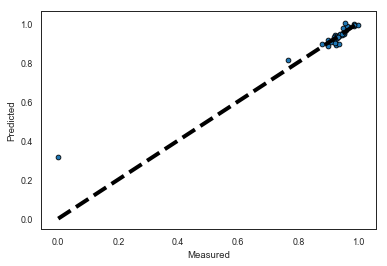

In [939]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Elasticity Analysis - Home Audio - Distributed Lag Model (Multiplicative)

In [940]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_rfe, y_train, coefficients_df)

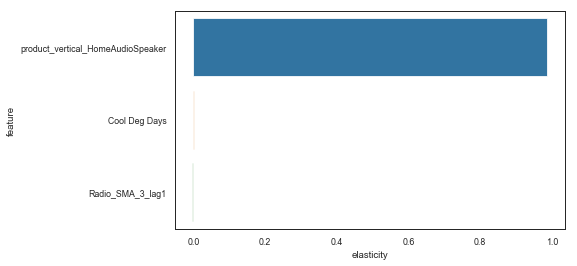

In [941]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## Recommendations and Results

##### Camera Accessory 
* Kyoc’s Model is selected as the best model based on the high Adjusted R-square = 0.977 and low MSE = 0.0011 values.
* ElecKart should focus more on the CameraBag, CameraBattery, CameraTripod and Flash through Online marketing. The company can promote these products or pitch in more products in these categories.

##### Gaming Accessory 
* Kyock Model is selected as the best model  based on high R-square = 0.980 and low MSE values= 0.0012 .
* The sale of GamingAccessoryKit through order payment type Prepaid on special sales day  through Affiliates has positive impact  on the GMV value 

##### Home Audio 
* Distributed Lag Model (Additive) is selected as the best  model based highest R-  square = 0.995 and low MSE values = 0.0002.
* The sale of HomeAudioSpeaker and FMRadio has positive impact on the GMV value. Hence, the company should promote these products or pitch in more  products in these categories.